In [1]:
from functions import *

In [2]:
import sys, importlib
importlib.reload(sys.modules['functions'])
from functions import *

**Analysing SN2010ev, in galaxy NGC 3244, which has redshift z=0.009213 ± 7.00e-6 (He)**

# Importing data

In [3]:
#import data
file_name="../SN2010ev.fits"
data = fits.open(file_name)
cube = data[1].data   # this is the cube, a (3681 x 341 x 604) matrix with fluxes at different 3681 wavelengths and 308 x 318 spatial pixels ("spaxels")
header = data[1].header # this has information on the data cube
ecube = data[2].data # this is the cube uncertainty (3681 x 341 x 604)
print(np.shape(cube))


print(cube[0])
print(cube[0][200][300])

x_len=len(cube[0][0])
y_len=len(cube[0])

(3681, 341, 604)
[[     nan      nan      nan ...      nan      nan      nan]
 [     nan      nan      nan ...      nan      nan      nan]
 [     nan      nan      nan ...      nan      nan      nan]
 ...
 [     nan      nan      nan ... 69.65055      nan      nan]
 [     nan      nan      nan ... 68.30897      nan      nan]
 [     nan      nan      nan ...      nan      nan      nan]]
91.866684


In [4]:
#  -- following is to the get the wavelength array
CRVAL = float(header["CRVAL3"])
NAXIS = int(header["NAXIS3"])
CDELT = float(header["CD3_3"])
CRPIX = float(header["CRPIX3"])
wave = np.array(CRVAL + CDELT * (np.arange(NAXIS) - CRPIX))

# Looking for stars

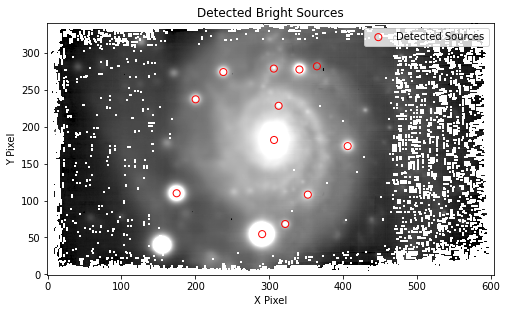

Source at: x=290.33, y=54.54
Source at: x=321.54, y=68.24
Source at: x=352.14, y=107.95
Source at: x=174.65, y=109.83
Source at: x=406.06, y=173.63
Source at: x=306.45, y=181.93
Source at: x=312.63, y=228.18
Source at: x=200.33, y=236.93
Source at: x=237.80, y=273.81
Source at: x=340.76, y=277.24
Source at: x=306.12, y=278.51
Source at: x=364.45, y=281.62


In [23]:
na_rest=5890

i=findWavelengths(wave, na_rest)[1]


image = stacked_cube#cube[i+3]

if image.ndim == 3:
    image = np.mean(image, axis=-1)

mean, median, std = sigma_clipped_stats(image, sigma=20.0)

# using DAOStarFinder to detect stars
daofind = DAOStarFinder(fwhm=14.0, threshold=3.0*std)
sources = daofind(image - median)

x_coords, y_coords = sources['xcentroid'], sources['ycentroid']

plt.figure(figsize=(8,6))
norm = simple_norm(image, 'sqrt')  # Better contrast
lo,up = np.nanpercentile(image,2),np.nanpercentile(image,98)
plt.imshow(image, cmap='gray', norm=norm, origin='lower',clim=(lo,up))
plt.scatter(x_coords, y_coords, s=50, edgecolor='red', facecolor='none', label="Detected Sources")
plt.legend()
plt.xlabel("X Pixel")
plt.ylabel("Y Pixel")
plt.title("Detected Bright Sources")
plt.show()

for x, y in zip(x_coords, y_coords):
    print(f"Source at: x={x:.2f}, y={y:.2f}")

finding ra,dec of center of image

In [24]:
wcs = WCS(data[1].header) 

center_x=int(x_len/2)
center_y=int(y_len/2)

ra, dec, _ = wcs.all_pix2world(center_x, center_y, 0, 0)

print(ra,dec)

156.37094651570212 -39.82809141441123


In [25]:
list(zip(x_coords, y_coords))
sources=list(zip(x_coords, y_coords))

sources = [[int(x) for x in row] for row in sources]
sources=np.array(sources)
sources=np.delete(sources, 1, axis=0)

#sources=sources[0:len(sources)-3]
print("The sources (x,y) are\n", sources)

The sources (x,y) are
 [[290  54]
 [352 107]
 [174 109]
 [406 173]
 [306 181]
 [312 228]
 [200 236]
 [237 273]
 [340 277]
 [306 278]
 [364 281]]


In [26]:
star_ra,star_dec,star_par,star_parer=match_gaia(sources,header,ra,dec)

[<SkyCoord (ICRS): (ra, dec) in deg
    [(156.3718138 , -39.83453593), (156.36732881, -39.83159106),
     (156.38020613, -39.83148069), (156.36342311, -39.82792389),
     (156.37065724, -39.82748028), (156.37022359, -39.82486913),
     (156.37832539, -39.82442511), (156.37564907, -39.82236948),
     (156.36819862, -39.82214671), (156.370658  , -39.82209139),
     (156.36646264, -39.8219243 )]>, <SpectralCoord 
   (target: <ICRS Coordinate: (ra, dec, distance) in (deg, deg, kpc)
                (156.380417, -39.8275, 1000.)
             (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
                (0., 0., 0.)>)
  [4.74969238e-07, 4.74969238e-07, 4.74969238e-07, 4.74969238e-07,
   4.74969238e-07, 4.74969238e-07, 4.74969238e-07, 4.74969238e-07,
   4.74969238e-07, 4.74969238e-07, 4.74969238e-07] m>]
INFO: Query finished. [astroquery.utils.tap.core]


In [27]:
star_ra

array([156.37118349, 156.36671578, 156.37955932, 156.3628213 ,
       156.37006634, 156.36957374, 156.37770921, 156.37499996,
       156.36755243, 156.37005896,          nan])

In [19]:
out=gaia_parameters(star_ra,star_dec)

Searching for star with RA = 156.37118348679695, Dec = -39.834671881098416
INFO: Query finished. [astroquery.utils.tap.core]
warning
<TableColumns names=('source_id','ra','dec','phot_g_mean_mag','parallax','parallax_error','teff_gspphot','logg_gspphot','mh_gspphot')>
Parallax: 0.7982890719554844 ± 0.013275785371661186
Effective temperature:  --
Surface gravity log(g):  --
Metalicity:  --
Mean magnitude:  13.764894
 
Searching for star with RA = 156.36671577925907, Dec = -39.8317028130207


/home/rita13santos/PhD/extinction-ifs/functions.py:1076: UserWarning: Warning: converting a masked element to nan.
  eff_t_array[i] = result[0]["teff_gspphot"]
/home/rita13santos/PhD/extinction-ifs/functions.py:1077: UserWarning: Warning: converting a masked element to nan.
  surface_g_array[i] = result[0]["logg_gspphot"]
/home/rita13santos/PhD/extinction-ifs/functions.py:1078: UserWarning: Warning: converting a masked element to nan.
  metallicity_array[i] = result[0]["mh_gspphot"]


INFO: Query finished. [astroquery.utils.tap.core]
warning
<TableColumns names=('source_id','ra','dec','phot_g_mean_mag','parallax','parallax_error','teff_gspphot','logg_gspphot','mh_gspphot')>
Parallax: 0.1780072452591849 ± 0.1396242380142212
Effective temperature:  4985.641
Surface gravity log(g):  4.7708
Metalicity:  -3.9862
Mean magnitude:  18.660872
 
Searching for star with RA = 156.37955932098166, Dec = -39.83160598408886
INFO: Query finished. [astroquery.utils.tap.core]
warning
<TableColumns names=('source_id','ra','dec','phot_g_mean_mag','parallax','parallax_error','teff_gspphot','logg_gspphot','mh_gspphot')>
Parallax: 0.9524545474811911 ± 0.03131597489118576
Effective temperature:  4950.3467
Surface gravity log(g):  4.4546
Metalicity:  -0.0817
Mean magnitude:  15.921439
 
Searching for star with RA = 156.36282130389935, Dec = -39.82805199668578
INFO: Query finished. [astroquery.utils.tap.core]
warning
<TableColumns names=('source_id','ra','dec','phot_g_mean_mag','parallax','pa

/home/rita13santos/PhD/extinction-ifs/functions.py:1074: UserWarning: Warning: converting a masked element to nan.
  parallax_array[i] = result[0]["parallax"]
/home/rita13santos/PhD/extinction-ifs/functions.py:1075: UserWarning: Warning: converting a masked element to nan.
  parallax_err_array[i] = result[0]["parallax_error"]


INFO: Query finished. [astroquery.utils.tap.core]
warning
<TableColumns names=('source_id','ra','dec','phot_g_mean_mag','parallax','parallax_error','teff_gspphot','logg_gspphot','mh_gspphot')>
Parallax: 0.29746218173052347 ± 0.23422804474830627
Effective temperature:  --
Surface gravity log(g):  --
Metalicity:  --
Mean magnitude:  19.3679
 
Searching for star with RA = 156.37770920671755, Dec = -39.8245494769334
INFO: Query finished. [astroquery.utils.tap.core]
warning
<TableColumns names=('source_id','ra','dec','phot_g_mean_mag','parallax','parallax_error','teff_gspphot','logg_gspphot','mh_gspphot')>
Parallax: 0.5047087492250271 ± 0.11040231585502625
Effective temperature:  4414.3374
Surface gravity log(g):  4.7173
Metalicity:  -1.0062
Mean magnitude:  18.284786
 
Searching for star with RA = 156.37499996047163, Dec = -39.822496063007854
INFO: Query finished. [astroquery.utils.tap.core]
warning
<TableColumns names=('source_id','ra','dec','phot_g_mean_mag','parallax','parallax_error','

In [20]:
from astropy.coordinates import Angle

ra_hms = Angle(ra, unit=u.deg).to_string(unit=u.hour, sep=':')
ra_hms;

Making a dataframe with data

In [21]:
stars_data = pd.DataFrame({
    'x': sources[:,0],               # original image x
    'y': sources[:,1],               # original image y
    'ra': star_ra,                   # Right Ascension
    'dec': star_dec,                 # Declination
    'parallax': out[0],              # Parallax
    'parallax_err': out[1],          # Parallax error
    'teff': out[2],                  # Effective temperature
    'logg':out[3],                   # Surface gravity
    'met': out[4],                   # Metallicity
    'mag': out[5]                    # Mean magnitude in g-band
})


In [22]:
stars_data = stars_data.dropna()
stars_data

x    y          ra        dec  parallax  parallax_err         teff  \
1  352  107  156.366716 -39.831703  0.178007      0.139624  4985.641113   
2  174  109  156.379559 -39.831606  0.952455      0.031316  4950.346680   
3  406  173  156.362821 -39.828052  0.339872      0.069792  5296.020508   
6  200  236  156.377709 -39.824549  0.504709      0.110402  4414.337402   
7  237  273  156.375000 -39.822496  0.204652      0.095322  5579.581055   
8  340  277  156.367552 -39.822292  0.202779      0.051899  5944.463867   

     logg     met        mag  
1  4.7708 -3.9862  18.660872  
2  4.4546 -0.0817  15.921439  
3  4.6256 -0.5887  17.504930  
6  4.7173 -1.0062  18.284786  
7  4.6448 -3.6479  18.041954  
8  4.4557 -0.6107  16.939793

# Na lines

In [23]:
na_rest

5890

5944.264569999999


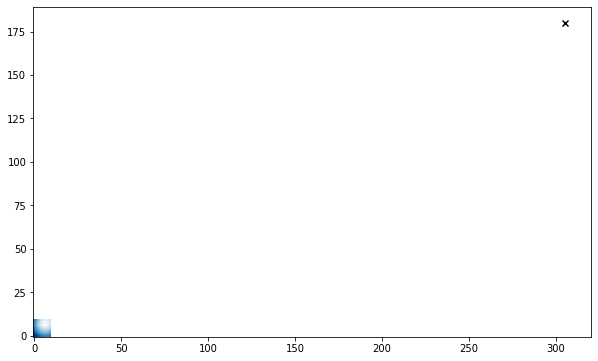

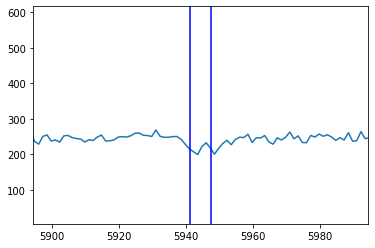

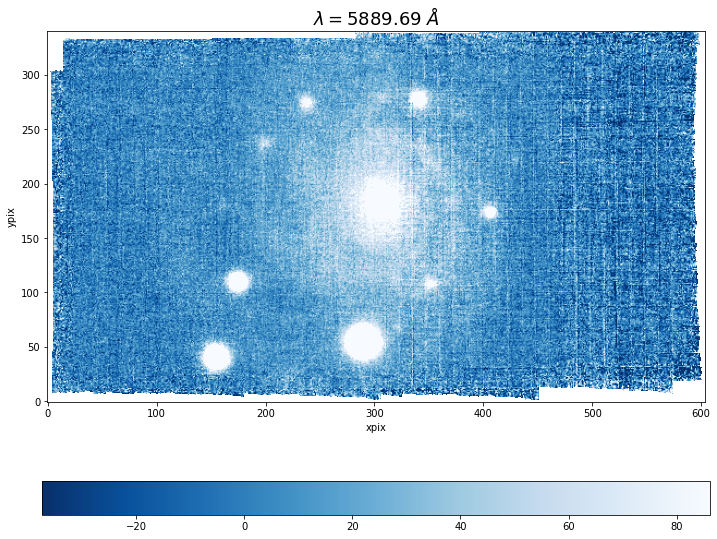

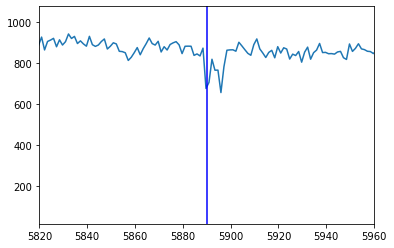

In [24]:
z=0.009213
na_obs=na_rest*(1+z)
print(na_obs)

wave_selection=[]

wavelen,index=findWavelengths(wave, na_rest)

y_pos=180#50#200
x_pos=305#290#300

x1=305-5#350
x2=305+5#470
y1=180-5#120
y2=180+5#200




image=stack_all(cube[:,y1:y2,x1:x2])#cube[index]
lo,up = np.nanpercentile(image,2),np.nanpercentile(image,98)
plt.figure(figsize=(10, 8))
plt.imshow(image,cmap='Blues_r',origin='lower',clim=(lo,up))
plt.scatter(x_pos,y_pos,marker='x',color='black')
plt.show()

####

plt.plot(wave, cube[:,y_pos,x_pos])
plt.xlim(na_obs-50,na_obs+50)
plt.axvline(x = 5893*(1+z), color = 'b', label = 'axvline - full height')

plt.axvline(x = 5887*(1+z), color = 'b', label = 'axvline - full height')
plt.show()

####
y_pos=40#200
x_pos=160#300
plot_image(cube[index],wavelen,index,'Blues_r')


plt.plot(wave, cube[:,y_pos,x_pos])
plt.xlim(5820,5960)#na_rest-50,na_rest+50)
plt.axvline(x = na_rest, color = 'b', label = 'axvline - full height')


# Picking region

In [28]:
y_pos=40#200
x_pos=160#300

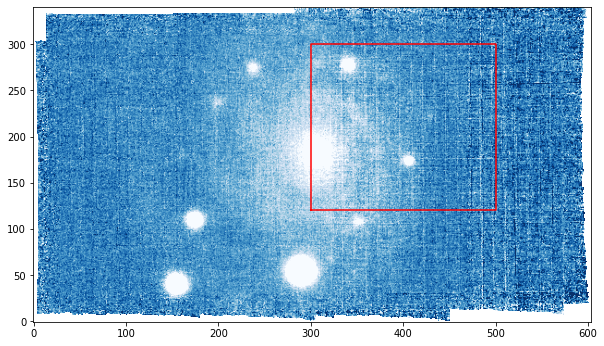

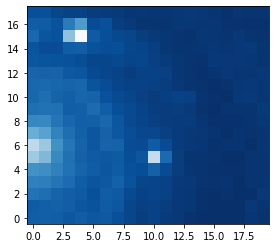

(18, 20)


In [29]:
x1=300
x2=500
y1=120
y2=300

"""x1=x_pos-30
x2=x_pos+100
y1=y_pos
y2=y_pos+130"""

region=cube[:,y1:y2,x1:x2]
region_err=ecube[:,y1:y2,x1:x2]
           
i=findWavelengths(wave, na_rest)[1]

N=10

lo,up = np.nanpercentile(cube[i],2),np.nanpercentile(cube[i],98)
plt.figure(figsize=(10, 8))
plt.imshow(cube[i],cmap='Blues_r',origin='lower',clim=(lo,up))


x_coords = [x1, x1, x2, x2, x1]
y_coords = [y1, y2, y2, y1, y1] 
plt.plot(x_coords, y_coords, 'r-', linewidth=1.5)  # Red outline

plt.show()

plt.imshow(binning(region[10], N),"Blues_r",origin='lower');

plt.show()

print(np.shape(binning(region[10], N)))

binned_region=[]
binned_region_err=[]

for w in range(0,len(wave)):
    binned_region.append(binning(region[w], N))
    binned_region_err.append(binning(region_err[w], N))
    
binned_region=np.array(binned_region)
binned_region_err=np.array(binned_region_err)

MUSE_err=np.sqrt(np.median(binned_region_err, axis=(1, 2)))

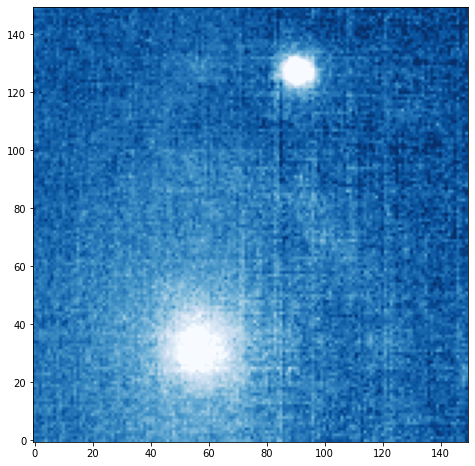

In [30]:
region=cube[:,150:300,250:400]

lo,up = np.nanpercentile(region[i],1),np.nanpercentile(region[i],99)
plt.figure(figsize=(10, 8))
plt.imshow(region[i],cmap='Blues_r',origin='lower',clim=(lo,up))

In [31]:
np.shape(binned_region)

(3681, 18, 20)

# EW

## EW - parametric

In [161]:
z=0.009213

na_obs=na_rest*(1+z)

In [162]:
na_obs

5944.264569999999

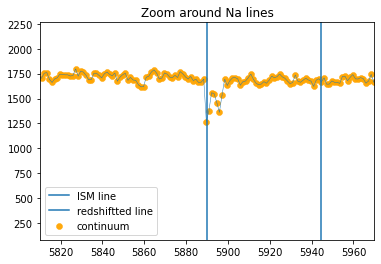

In [167]:
star_i=0
y_pos=sources[star_i][1]#40
x_pos=sources[star_i][0]#160

data=cube[:,y_pos,x_pos]

plt.plot(wave,data,linewidth=0.5,alpha=0.95)
plt.scatter(wave,data,s=0.5)

#plt.fill_between(wave,median_bulge - y_err, median_bulge + y_err, color='blue', alpha=0.3, label="Uncertainty")

x_min, x_max= plt.xlim(na_rest-80,na_rest+80)
plt.title("Zoom around Na lines")
x_chopped,y_chopped=chop_data(wave,data,x_min,x_max)

plt.axvline(x=na_rest,label="ISM line")
plt.axvline(x=na_obs,label="redshiftted line")

plt.scatter(x_chopped,y_chopped,linewidth=0.5,alpha=0.95,color="orange",label="continuum")
plt.legend()

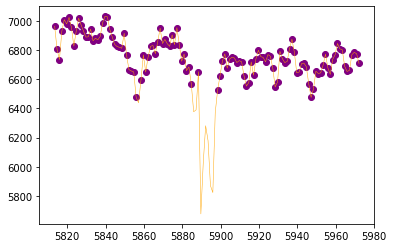

In [335]:
plt.plot(x_chopped,y_chopped,linewidth=0.5,alpha=0.95,color="orange",label="continuum")
#plt.ylim(300,1200)

x1,y1=filterout_peaks(x_chopped,y_chopped,mode="both")
plt.scatter(x1,y1,color="purple")

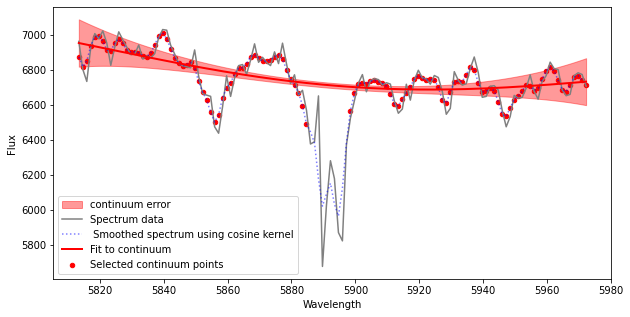

In [336]:
y_smooth=smooth_spectra(y_chopped,kernel_size=6)

continuum_fit, x_continuum, y_continuum, continuum_err =continuum(x_chopped,y_smooth,mode="both")

y_continuum_fit = continuum_fit(x_chopped)


cont_err=continuum_err(x_chopped)
plt.figure(figsize=(10, 5))
plt.fill_between(x_chopped,y_continuum_fit - cont_err, y_continuum_fit + cont_err, color='red', alpha=0.4, label="continuum error")
plt.plot(x_chopped, y_chopped, label="Spectrum data", color="gray")
plt.plot(x_chopped, y_smooth, label=" Smoothed spectrum using cosine kernel", color="blue", alpha=0.5,linestyle="dotted")
plt.plot(x_chopped, y_continuum_fit, label="Fit to continuum", color="red", linewidth=2)
plt.scatter(x_continuum, y_continuum, color="red", s=20, label="Selected continuum points")
plt.xlabel("Wavelength")
plt.ylabel("Flux")
plt.legend()
#plt.xlim(6400,6500)
plt.show()

Fitting two gaussians

In [221]:
initial_guess = [2,0.5,200,na_rest,1,200,2,1,4.5]
params, covariance = curve_fit(two_gaussian_poly, x_chopped, y_smooth, p0=initial_guess)#input errors!

    
fit = lambda x: two_gaussian_poly(x,*params)

/home/rita13santos/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


!!!! lenx 128


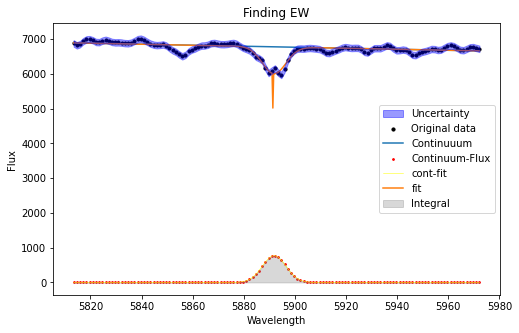

(1.3765630683054317, 0)

In [176]:
EW_parametric(x_chopped,y_smooth,MUSE_err,continuum_fit,continuum_err,method=1,plots=True,fit="Na", central_wavelength=na_rest)


In [138]:
na_rest

5890

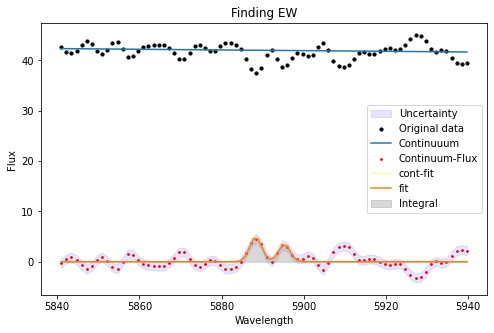

5840.9423828125 5939.6923828125
EW = 0.731  +/- 0.000  at (i,j)= 0 , 0


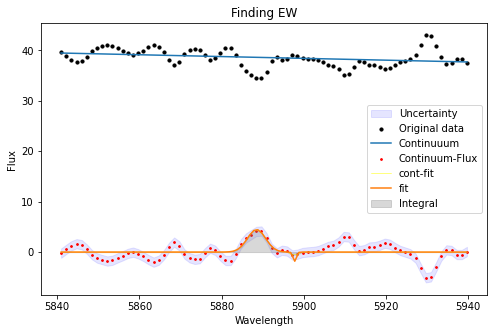

5840.9423828125 5939.6923828125
EW = 0.597  +/- 0.000  at (i,j)= 0 , 1


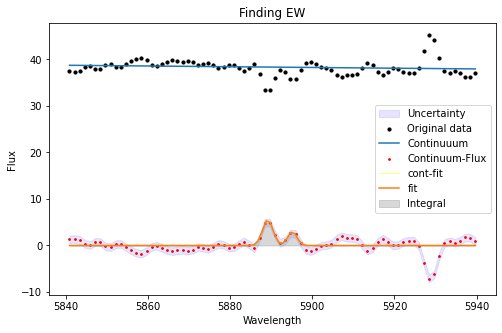

5840.9423828125 5939.6923828125
EW = 0.680  +/- 0.000  at (i,j)= 0 , 2


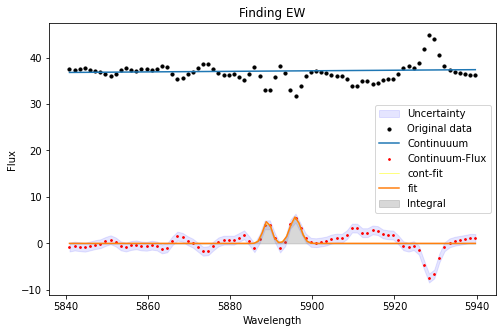

5840.9423828125 5939.6923828125
EW = 0.825  +/- 0.000  at (i,j)= 0 , 3


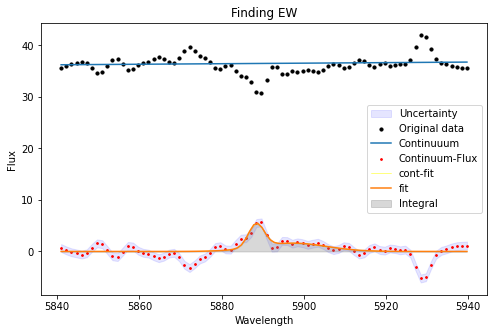

5840.9423828125 5939.6923828125
EW = 1.521  +/- 0.000  at (i,j)= 0 , 4


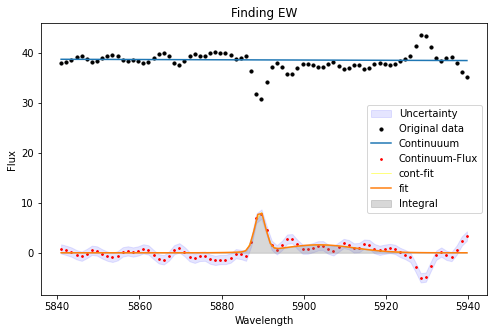

5840.9423828125 5939.6923828125
EW = 1.570  +/- 0.000  at (i,j)= 0 , 5


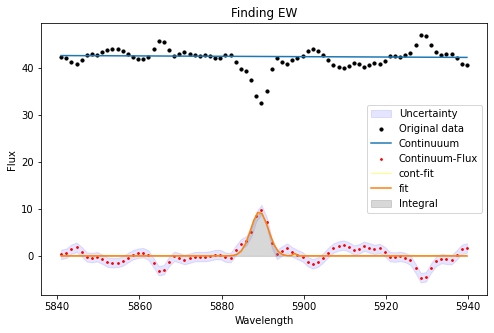

5840.9423828125 5939.6923828125
EW = 1.178  +/- 0.000  at (i,j)= 0 , 6



KeyboardInterrupt



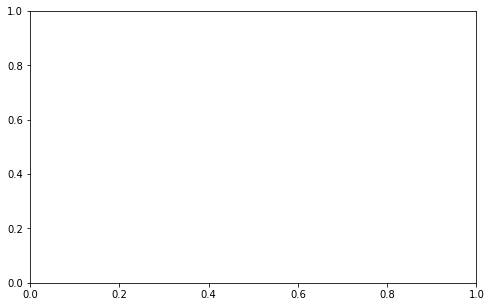

In [139]:
map_P=EW_map_parametric(binned_region,wave,MUSE_err,na_rest, method=0, fit="Na",mode="dips",kernel_size=6,plots=True)


In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

data = np.transpose(map_P[0])
lo, up = np.nanpercentile(data, 2), np.nanpercentile(data, 98)
cmap = plt.cm.Blues_r.copy()
cmap.set_bad(color='yellow')
im1 = ax[0].imshow(data, cmap=cmap, origin='lower', clim=(lo, up))
fig.colorbar(im1, ax=ax[0], orientation="horizontal")
ax[0].set_title("EW (parametric approach)")

#####

data= np.transpose(abs(map_P[1]/map_P[0]))
lo, up = np.nanpercentile(data, 2), np.nanpercentile(data, 98)
im2 = ax[1].imshow(data, cmap=cmap, origin='lower', clim=(lo, up))
fig.colorbar(im2, ax=ax[1], orientation="horizontal")
ax[1].set_title(r"$\sigma_{\mathrm{EW}}/\mathrm{EW}$ (parametric approach)")

#####

data = binned_region[i]
lo, up = np.nanpercentile(data, 2), np.nanpercentile(data, 98)
im3 = ax[2].imshow(data, cmap='Blues_r', origin='lower', clim=(lo, up))
fig.colorbar(im3, ax=ax[2], orientation="horizontal")
ax[2].set_title("Fluxes")

plt.tight_layout()
plt.show()

## Non parametric

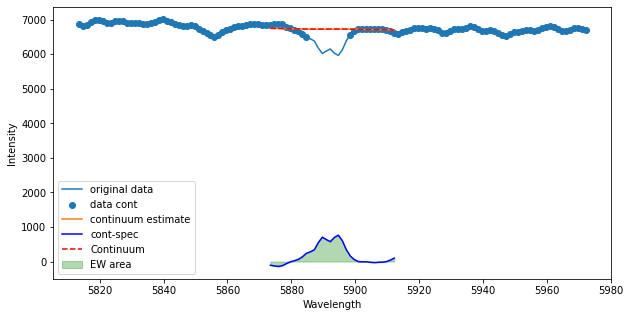

EW= 1.05  +/-  0.0858497769834649


In [337]:
EW_point_sources(cube, sources):

In [338]:
### velocity ###
rest_wave=wave/(1+z)

halpha=6563

b1=halpha-40
b2=halpha+40
x_chopped,y_chopped=chop_data(rest_wave,data,b1,b2)
                        

y_smooth=smooth_spectra(y_chopped,3)


x_cont,y_cont=filterout_peaks(x_chopped,y_smooth,"dips")
            
kernel = cosine_kernel(3)
cont = convolve1d(y_cont, kernel, mode='nearest')
interp=interp1d(x_cont, cont, kind='cubic')


v=velocity(x_chopped,y_chopped,interp,halpha)

print(f"Velocity from halpha = ",v)

Velocity from halpha =  140.52148764016061


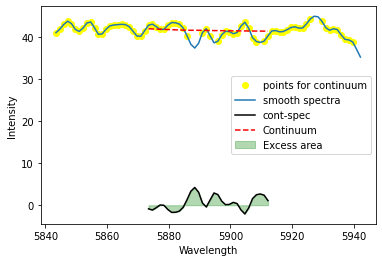

Integral of area over continuum divided by continuum: 0.565 +/- 0.090 at (i,j)= 0 ,  0


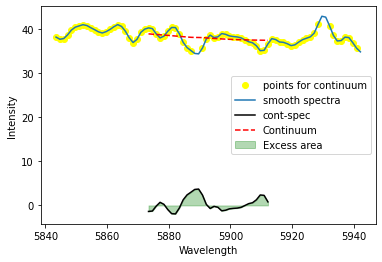

Integral of area over continuum divided by continuum: 0.383 +/- 0.072 at (i,j)= 0 ,  1


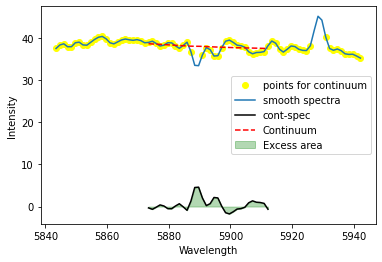

Integral of area over continuum divided by continuum: 0.499 +/- 0.072 at (i,j)= 0 ,  2


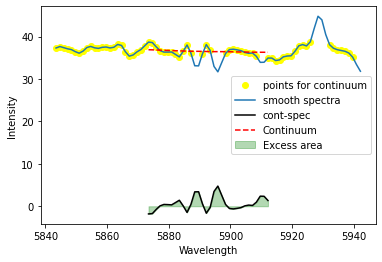

Integral of area over continuum divided by continuum: 0.724 +/- 0.060 at (i,j)= 0 ,  3


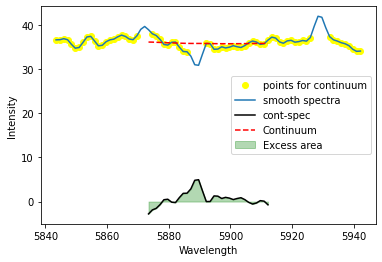

Integral of area over continuum divided by continuum: 0.746 +/- 0.055 at (i,j)= 0 ,  4


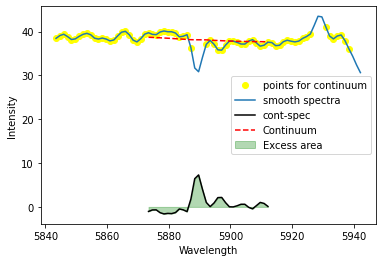

Integral of area over continuum divided by continuum: 0.615 +/- 0.084 at (i,j)= 0 ,  5


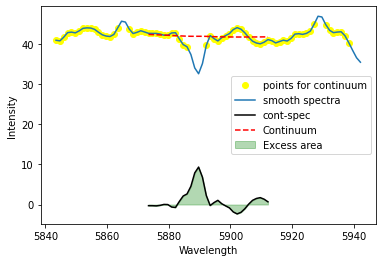

Integral of area over continuum divided by continuum: 0.991 +/- 0.072 at (i,j)= 0 ,  6


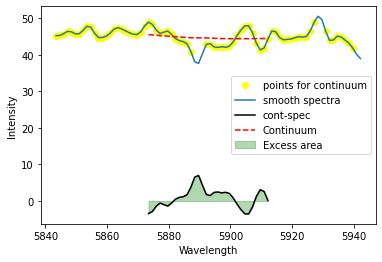

Integral of area over continuum divided by continuum: 0.776 +/- 0.114 at (i,j)= 0 ,  7


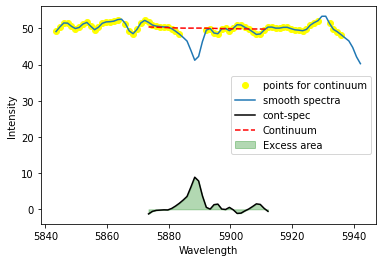

Integral of area over continuum divided by continuum: 0.961 +/- 0.049 at (i,j)= 0 ,  8


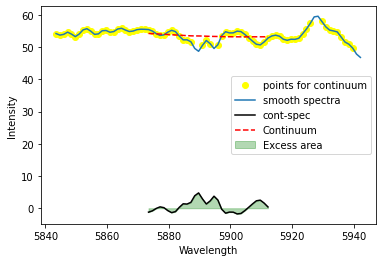

Integral of area over continuum divided by continuum: 0.520 +/- 0.078 at (i,j)= 0 ,  9


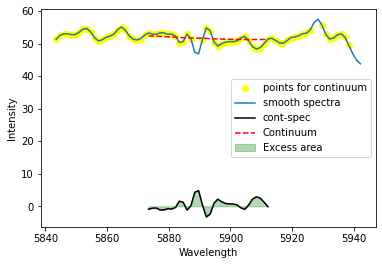

Integral of area over continuum divided by continuum: 0.367 +/- 0.081 at (i,j)= 0 ,  10


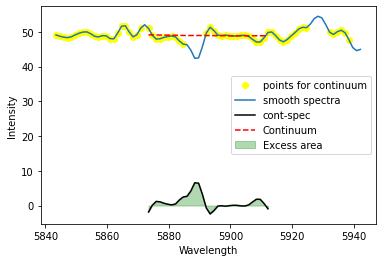

Integral of area over continuum divided by continuum: 0.780 +/- 0.039 at (i,j)= 0 ,  11


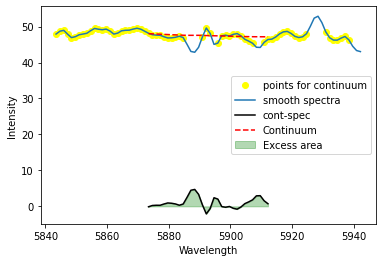

Integral of area over continuum divided by continuum: 0.838 +/- 0.047 at (i,j)= 0 ,  12


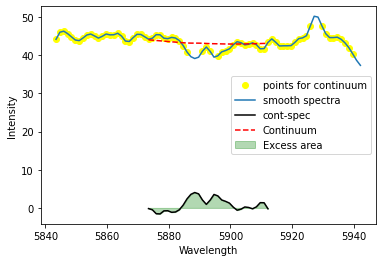

Integral of area over continuum divided by continuum: 0.748 +/- 0.099 at (i,j)= 0 ,  13


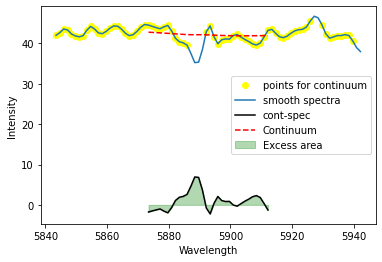

Integral of area over continuum divided by continuum: 0.932 +/- 0.094 at (i,j)= 0 ,  14


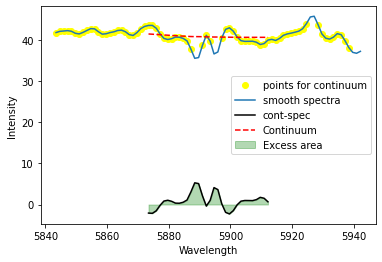

Integral of area over continuum divided by continuum: 0.829 +/- 0.054 at (i,j)= 0 ,  15


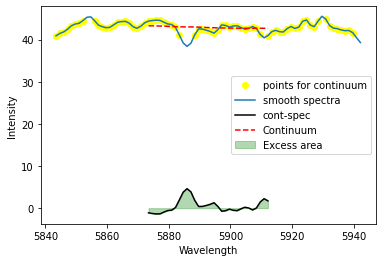

Integral of area over continuum divided by continuum: 0.457 +/- 0.057 at (i,j)= 1 ,  0


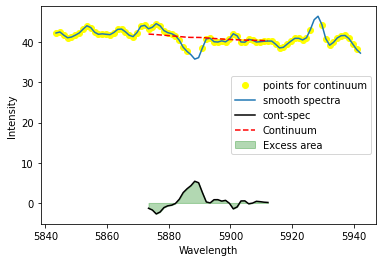

Integral of area over continuum divided by continuum: 0.508 +/- 0.059 at (i,j)= 1 ,  1


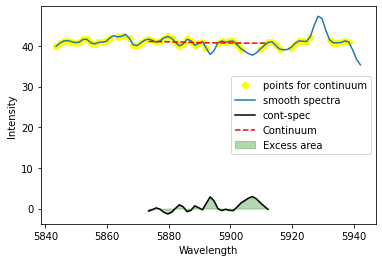

Integral of area over continuum divided by continuum: 0.485 +/- 0.047 at (i,j)= 1 ,  2


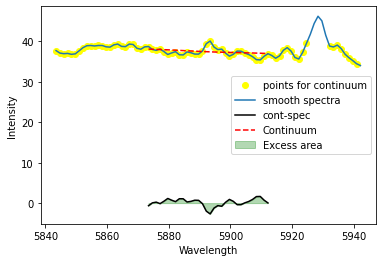

Integral of area over continuum divided by continuum: 0.189 +/- 0.034 at (i,j)= 1 ,  3


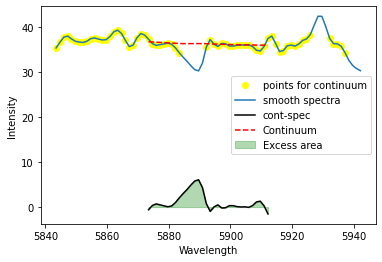

Integral of area over continuum divided by continuum: 1.253 +/- 0.033 at (i,j)= 1 ,  4


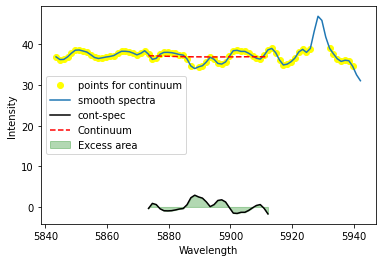

Integral of area over continuum divided by continuum: 0.210 +/- 0.062 at (i,j)= 1 ,  5


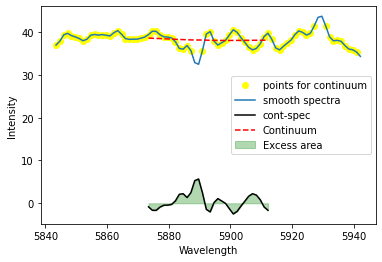

Integral of area over continuum divided by continuum: 0.452 +/- 0.107 at (i,j)= 1 ,  6


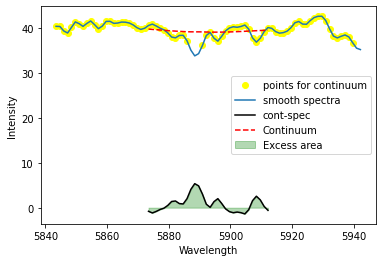

Integral of area over continuum divided by continuum: 0.837 +/- 0.093 at (i,j)= 1 ,  7


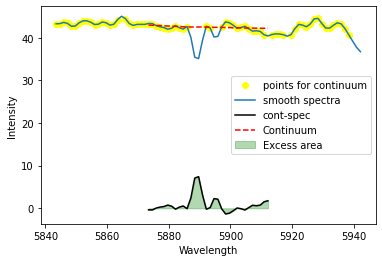

Integral of area over continuum divided by continuum: 0.808 +/- 0.040 at (i,j)= 1 ,  8


KeyboardInterrupt: 

In [93]:
map_NP=EW_map_non_parametric(binned_region,wave,na_rest,mode="both",kernel_size=60,plots=True)

In [78]:
i=findWavelengths(wave, na_rest)[1]

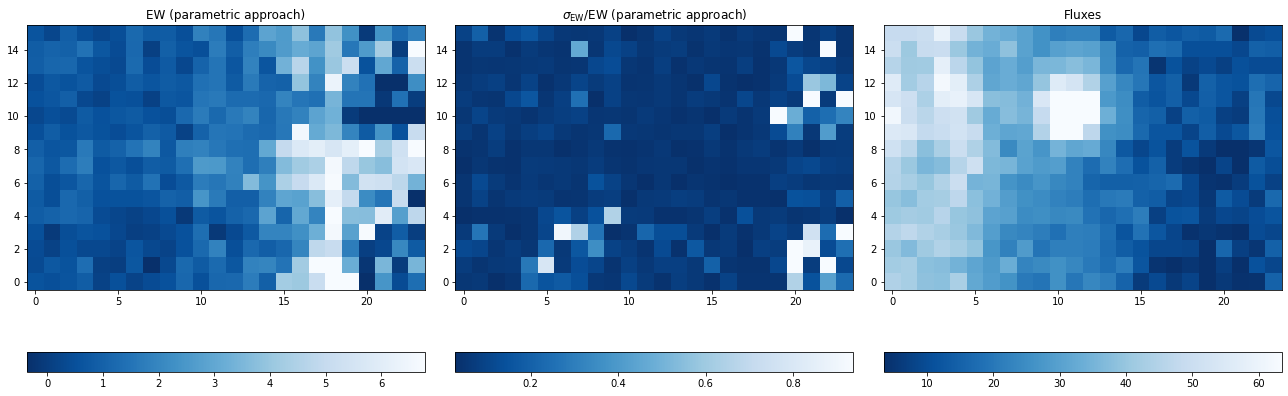

In [79]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

data = np.transpose(map_NP[0])
lo, up = np.nanpercentile(data, 2), np.nanpercentile(data, 98)
cmap = plt.cm.Blues_r.copy()
cmap.set_bad(color='yellow')
im1 = ax[0].imshow(data, cmap=cmap, origin='lower', clim=(lo, up))
fig.colorbar(im1, ax=ax[0], orientation="horizontal")
ax[0].set_title("EW (parametric approach)")

#####

data= np.transpose(abs(map_NP[1]/map_NP[0]))
lo, up = np.nanpercentile(data, 2), np.nanpercentile(data, 98)
im2 = ax[1].imshow(data, cmap=cmap, origin='lower', clim=(lo, up))
fig.colorbar(im2, ax=ax[1], orientation="horizontal")
ax[1].set_title(r"$\sigma_{\mathrm{EW}}/\mathrm{EW}$ (parametric approach)")

#####

data = binned_region[i]
lo, up = np.nanpercentile(data, 2), np.nanpercentile(data, 98)
im3 = ax[2].imshow(data, cmap='Blues_r', origin='lower', clim=(lo, up))
fig.colorbar(im3, ax=ax[2], orientation="horizontal")
ax[2].set_title("Fluxes")

plt.tight_layout()
plt.show()

# Computing Na for different point sources

Picking a list of positions to calculate Na EW instead of a map

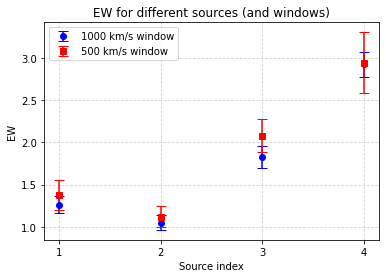

In [94]:


# Data for 1000 km/s window
ew_1000 = [1.26, 1.05, 1.83, 2.92]
err_1000 = [0.0999, 0.0858, 0.1298, 0.1517]

# Data for 500 km/s window
ew_500 = [1.38, 1.12, 2.08, 2.94]
err_500 = [0.1756, 0.1252, 0.1936, 0.3609]

x_pos = np.arange(len(ew_1000))

plt.errorbar(x_pos, ew_1000, yerr=err_1000, fmt='o', label="1000 km/s window", color='blue', capsize=5)
plt.errorbar(x_pos, ew_500, yerr=err_500, fmt='s', label="500 km/s window", color='red', capsize=5)

plt.xlabel("Source index")
plt.ylabel("EW")
plt.title("EW for different sources (and windows)")
plt.xticks(x_pos, ["1", "2", "3", "4"])  # Set x-ticks to match number of measurements
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


In [113]:
EWs,err=EW_point_sources(cube, sources, wave, na_rest)

EW= 1.28  +/-  0.12195453000660066
EW= 1.91  +/-  0.12668466602724626
EW= 2.87  +/-  0.17719872906283765
EW= -0.47  +/-  0.28549137330127394
EW= 1.48  +/-  0.19815736948623364
EW= 0.48  +/-  0.2862284226382247


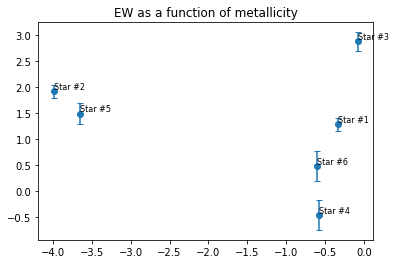

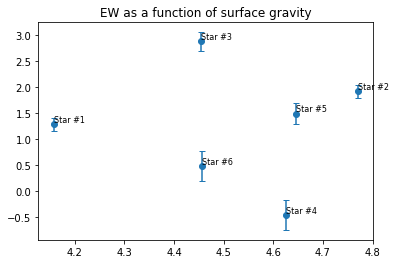

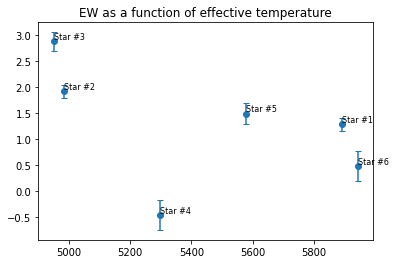

In [114]:
# out is (eff_t_array, surface_g_array, metallicity_array)

# Plot 1: EW vs Metallicity
plt.errorbar(out[-1], EWs, yerr=err, fmt='o', capsize=3)
plt.title("EW as a function of metallicity")
for i, (x, y) in enumerate(zip(out[-1], EWs), start=1):
    plt.text(x, y, f"Star #{i}", fontsize=8, ha='left', va='bottom')
plt.show()

# Plot 2: EW vs Surface Gravity
plt.errorbar(out[-2], EWs, yerr=err, fmt='o', capsize=3)
plt.title("EW as a function of surface gravity")
for i, (x, y) in enumerate(zip(out[-2], EWs), start=1):
    plt.text(x, y, f"Star #{i}", fontsize=8, ha='left', va='bottom')
plt.show()

# Plot 3: EW vs Effective Temperature
plt.errorbar(out[-3], EWs, yerr=err, fmt='o', capsize=3)
plt.title("EW as a function of effective temperature")
for i, (x, y) in enumerate(zip(out[-3], EWs), start=1):
    plt.text(x, y, f"Star #{i}", fontsize=8, ha='left', va='bottom')
plt.show()


In [115]:
print("metalicity ",out[-1])
print("\nsurface gravity log(g) ",out[-2])
print("\ntemperatures ",out[-3])

metalicity  [-0.33590001 -3.98620009 -0.0817     -0.5887     -3.6479001  -0.61070001]

surface gravity log(g)  [4.1573     4.77080011 4.45459986 4.62559986 4.64480019 4.45569992]

temperatures  [5891.31738281 4985.64111328 4950.34667969 5296.02050781 5579.58105469
 5944.46386719]


# plotting theoretical spectra

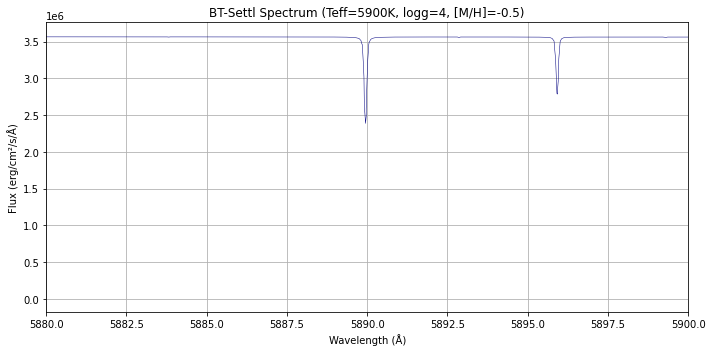

In [27]:
import numpy as np

# List of file paths
files = ["../DATA/teff5000_logg5_meta-4.txt",
    "../DATA/teff5900_logg4_meta-0.5.txt",
    "../DATA/teff5000_logg4.5_meta0.txt",
    "../DATA/teff5300_logg4.5_meta-0.5.txt",
    "../DATA/teff5600_logg4.5_meta-3.5.txt",
    "../DATA/teff5900_logg4.5_meta-0.5.txt"
]

spectra = []

for file_path in files:
    wavelength = []
    flux = []
    
    with open(file_path, "r") as file:
        for line in file:
            if line.strip().startswith("#") or line.strip() == "":
                continue
            parts = line.split()
            if len(parts) >= 2:
                wavelength.append(float(parts[0]))
                flux.append(float(parts[1]))
    
    wavelength = np.array(wavelength)
    flux = np.array(flux)
    
    spectra.append((wavelength, flux))

wavelength=spectra[0][0]
flux=spectra[0][1]
plt.figure(figsize=(10, 5))
plt.plot(wavelength, flux, color='navy',linewidth=0.5)
plt.title("BT-Settl Spectrum (Teff=5900K, logg=4, [M/H]=-0.5)")
plt.xlabel("Wavelength (Å)")
plt.ylabel("Flux (erg/cm²/s/Å)")
plt.grid(True)
#plt.xlim(min(wave),max(wave))
plt.xlim(na_rest-10,na_rest+10)
plt.tight_layout()
plt.show()

In [29]:
ew_theoretical=[]
err_ew_theoretical=[]
for (wavelength, flux) in spectra:
    val=EW_theoretical_spectra(wavelength, flux,na_rest)
    
    ew_theoretical.append(val[0][0])
    err_ew_theoretical.append(val[1][0])

EW= 0.06  +/-  0.00042596050390739435
EW= 0.66  +/-  0.002544189088064141
EW= 2.64  +/-  0.0385404361233365
EW= 1.32  +/-  0.0075571129372758415
EW= 0.08  +/-  0.0015555011549054753
EW= 0.72  +/-  0.0050415565509141546


In [149]:
print("The observed spectra EWs are:\n", EWs, "\nand the values from the theoretical spectra are \n",ew_theoretical)


The observed spectra EWs are:
 [1.2768084660521781, 1.9139914733013788, 2.873270285905287, -0.4694302462968602, 1.4836542843601261, 0.4820010169684891] 
and the values from the theoretical spectra are 
 [0.6563738648619779, 0.05938804063823471, 2.6408744690399644, 1.3180316264632566, 0.07596911767856192, 0.7220803181249915]


In [152]:
np.subtract(EWs,ew_theoretical)

array([ 0.6204346 ,  1.85460343,  0.23239582, -1.78746187,  1.40768517,
       -0.2400793 ])

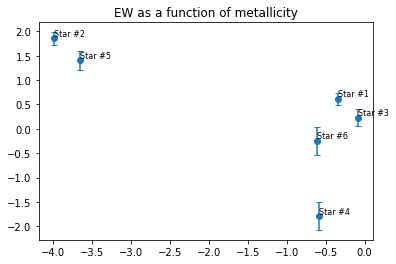

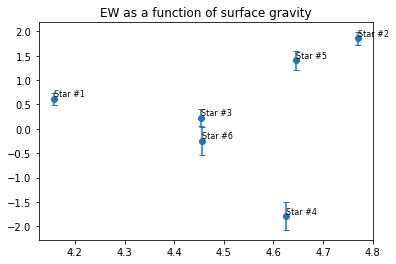

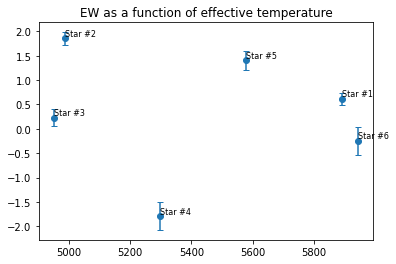

In [158]:
# out is (eff_t_array, surface_g_array, metallicity_array)

yy=np.subtract(EWs,ew_theoretical)

# Plot 1: EW vs Metallicity
plt.errorbar(out[-1], yy,yerr=err,fmt='o', capsize=3)
plt.title("EW as a function of metallicity")
for i, (x, y) in enumerate(zip(out[-1], yy), start=1):
    plt.text(x, y, f"Star #{i}", fontsize=8, ha='left', va='bottom')
plt.show()

# Plot 2: EW vs Surface Gravity
plt.errorbar(out[-2], yy, yerr=err, fmt='o', capsize=3)
plt.title("EW as a function of surface gravity")
for i, (x, y) in enumerate(zip(out[-2], yy), start=1):
    plt.text(x, y, f"Star #{i}", fontsize=8, ha='left', va='bottom')
plt.show()

# Plot 3: EW vs Effective Temperature
plt.errorbar(out[-3], yy, yerr=err, fmt='o', capsize=3)
plt.title("EW as a function of effective temperature")
for i, (x, y) in enumerate(zip(out[-3], yy), start=1):
    plt.text(x, y, f"Star #{i}", fontsize=8, ha='left', va='bottom')
plt.show()

# Fitting MUSE spectra to find Teff, metalicity and surface gravity

In [4]:
from species import SpeciesInit

# Initialize species
SpeciesInit()

species v0.8.4

 -> A new version (0.9.0) is available!
 -> It is recommended to update to the latest version
 -> See https://github.com/tomasstolker/species for details

Working folder: /home/rita13santos/PhD/extinction-ifs

Configuration file: /home/rita13santos/PhD/extinction-ifs/species_config.ini
Database file: /home/rita13santos/PhD/extinction-ifs/species_database.hdf5
Data folder: /home/rita13santos/PhD/extinction-ifs/data

Configuration settings:
   - Database: /home/rita13santos/PhD/extinction-ifs/species_database.hdf5
   - Data folder: /home/rita13santos/PhD/extinction-ifs/data
   - Magnitude of Vega: 0.03

Multiprocessing: mpi4py installed
Process number 1 out of 1...


In [5]:
import os
os.environ['DYLD_LIBRARY_PATH'] = '/Users/tomasstolker/applications/MultiNest/lib'

import urllib.request
from species import SpeciesInit
from species.data.database import Database
from species.fit.fit_model import FitModel
from species.read.read_model import ReadModel
from species.plot.plot_mcmc import plot_posterior
from species.plot.plot_spectrum import plot_spectrum
from species.util.box_util import update_objectbox
from species.util.fit_util import get_residuals, multi_photometry

In [6]:
from species.data.database import Database

database = Database()
database.add_model(model='drift-phoenix', teff_range=(1500., 2000.))



-------------------------
Add grid of model spectra
-------------------------

Database tag: drift-phoenix
Model name: DRIFT-PHOENIX



100%|███████████████████████████████████████| 113M/113M [00:00<00:00, 60.8GB/s]
SHA256 hash of downloaded file: b59b7711a4ed9dcf9284ef0c3f2b614598eec89bf53f548ceb361b806db70757
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.



Unpacking 140/496 model spectra from DRIFT-PHOENIX (229 MB)... [DONE]

Please cite Helling et al. (2008) when using DRIFT-PHOENIX in a publication
Reference URL: https://ui.adsabs.harvard.edu/abs/2008ApJ...675L.105H

Wavelength range (um) = 0.1 - 50
Sampling (lambda/d_lambda) = 4000
Teff range (K) = 1500.0 - 2000.0

Adding DRIFT-PHOENIX model spectra... data/drift-phoenix/drift-phoenix_teff_2000_logg_5.5_feh_0.3_spec.npy 

Grid points stored in the database:
   - Teff = [1500. 1600. 1700. 1800. 1900. 2000.]
   - log(g) = [3.  3.5 4.  4.5 5.  5.5]
   - [Fe/H] = [-0.6 -0.3 -0.   0.3]

Number of grid points per parameter:
   - teff: 6
   - logg: 6
   - feh: 4

Number of stored grid points: 144
Number of interpolated grid points: 0
Number of missing grid points: 0


In [61]:
star_i=0
y_pos=sources[star_i][1]#40
x_pos=sources[star_i][0]#160

data=cube[:,y_pos,x_pos]

"""valid_indices = ~(np.isnan(wave) | np.isnan(data))

# Filter out NaN values based on valid indices
x = wave[valid_indices]
y = data[valid_indices]

plt.plot(x,y)""";

In [85]:
na_rest

5890

In [88]:
x = wave
y = data
uncertainty = np.zeros(len(data))

# Stack x, y, and uncertainty together to form a (n_wavelengths, 3) array
spectrum_data = np.column_stack((x, y, uncertainty))

# Add the spectrum data to the database, making sure to provide the resolving power
database.add_object('my_object',
                    
                    app_mag=None,
                    flux_density=None,
                    spectrum={'GRAVITY': (spectrum_data, None, 50.0)},
                    deredden=None)




----------
Add object
----------

Object name: my_object
Units: None
Deredden: None

Spectra:
      - Database tag: GRAVITY
      - Data shape: (3681, 3)
      - Wavelength range (um): 4748.44 - 9348.44
      - Mean flux (W m-2 um-1): 1.44e+03
      - Mean error (W m-2 um-1): 0.00e+00
   - Instrument resolution:
      - GRAVITY: 50.0


In [83]:
fit = FitModel(object_name='my_object',
               model='bt-settl',
               bounds={'teff': (1500., 2000.),
                       'radius': (0.5, 2.),
                       'GPI_H': ((0.5, 1.5), None)},
               apply_weights=False,
               normal_prior={'mass': (9., 1.6)})




-----------------
Fit model spectra
-----------------



RuntimeError: Could not read the parallax of my_object. Please add the parallax with the add_object method of the Database class.

input resoluçao

resolucao e paralax é parametro livre? ou so input

In [27]:
spectrum_data = np.column_stack((wave, data))

# Create a PrimaryHDU object
hdu = fits.PrimaryHDU(spectrum_data)

# Add column info as header (optional but helpful)
hdu.header['TTYPE1'] = 'WAVELENGTH'
hdu.header['TTYPE2'] = 'FLUX'

# Write to file
hdu.writeto('../MUSEspectrum1.fits', overwrite=True)

# Using species to generate spectra

In [28]:
SpeciesInit()

species v0.8.4

 -> A new version (0.9.0) is available!
 -> It is recommended to update to the latest version
 -> See https://github.com/tomasstolker/species for details

Working folder: /home/rita13santos/PhD/extinction-ifs

Configuration file: /home/rita13santos/PhD/extinction-ifs/species_config.ini
Database file: /home/rita13santos/PhD/extinction-ifs/species_database.hdf5
Data folder: /home/rita13santos/PhD/extinction-ifs/data

Configuration settings:
   - Database: /home/rita13santos/PhD/extinction-ifs/species_database.hdf5
   - Data folder: /home/rita13santos/PhD/extinction-ifs/data
   - Magnitude of Vega: 0.03

Multiprocessing: mpi4py installed
Process number 1 out of 1...


In [29]:
database = Database()

In [30]:
_ = database.available_models()


-----------------------
Available model spectra
-----------------------

   - AMES-Cond:
      - Label = ames-cond
      - Model parameters: ['teff', 'logg']
      - Teff range (K): [100, 6600]
      - Wavelength range (um): [0.5, 40]
      - Sampling (lambda/d_lambda): 4000
      - File size: 150 MB

   - AMES-Dusty:
      - Label = ames-dusty
      - Model parameters: ['teff', 'logg']
      - Teff range (K): [500, 4000]
      - Wavelength range (um): [0.5, 40]
      - Sampling (lambda/d_lambda): 4000
      - File size: 58 MB

   - ATMO:
      - Label = atmo
      - Model parameters: ['teff', 'logg']
      - Teff range (K): [200, 3000]
      - Wavelength range (um): [0.4, 6000]
      - Sampling (lambda/d_lambda): 1000
      - File size: 45 MB
      - Reference: Phillips et al. (2020)
      - URL: https://ui.adsabs.harvard.edu/abs/2020A%26A...637A..38P

   - ATMO CEQ:
      - Label = atmo-ceq
      - Model parameters: ['teff', 'logg']
      - Teff range (K): [200, 3000]
      - Wavele

In [31]:
#stars_data

In [32]:
i=100
wave[i]/(wave[i+1]-wave[i])

3898.75390625

In [33]:
RES=20000
model_choice='phoenix-husser2013'#''bt-settl-cifist'

MUSE range is from 4700 to 9400 ang

which is equiv. to 0.47 to 0.94 um

In [34]:
import model_species
importlib.reload(model_species)

output = model_species.main(database, model_choice)
print(output)



-------------------------
Add grid of model spectra
-------------------------

Database tag: phoenix-husser2013
Model name: PHOENIX (Husser et al. 2013)

Unpacking 918/3920 model spectra from PHOENIX (Husser et al. 2013) (1.3 GB)... [DONE]

Model information: [alpha/Fe] = 0.0
Please cite Husser et al. (2013) when using PHOENIX (Husser et al. 2013) in a publication
Reference URL: https://ui.adsabs.harvard.edu/abs/2013A%26A...553A...6H

Wavelength range (um) = 0.5 - 5
Sampling (lambda/d_lambda) = 5000
Teff range (K) = 4400 - 6000

Adding PHOENIX (Husser et al. 2013) model spectra... data/phoenix-husser2013/phoenix-husser2013_teff_6000_logg_5.5_feh_1.0_spec.npy 

Grid points stored in the database:
   - Teff = [4400. 4500. 4600. 4700. 4800. 4900. 5000. 5100. 5200. 5300. 5400. 5500.
 5600. 5700. 5800. 5900. 6000.]
   - log(g) = [3.  3.5 4.  4.5 5.  5.5]
   - [Fe/H] = [-4.  -3.  -2.  -1.5 -1.  -0.5  0.   0.5  1. ]

Number of grid points per parameter:
   - teff: 17
   - logg: 6
   - feh: 9

In [35]:
model = ReadModel(model=model_choice, wavel_range=(0.47, 0.94))

In [36]:
model.get_bounds()
#stars_data

{'teff': (4400.0, 6000.0), 'logg': (3.0, 5.5), 'feh': (-4.0, 1.0)}

In [37]:
i=0

In [38]:
model_param = {'teff':stars_data.iloc[i]['teff'], 'logg':stars_data.iloc[i]['logg'], 'feh':stars_data.iloc[i]['met'], 'distance':1/stars_data.iloc[i]['parallax']}

In [39]:
model_box = model.get_model(model_param=model_param, spec_res=RES)

In [40]:
model_box.open_box()

Opening ModelBox...
model = phoenix-husser2013
type = None
wavelength = [0.46998894 0.47001221 0.47003548 ... 0.93991401 0.93996055 0.94000708]
flux = [31573921.2591066  31572629.18698421 31582222.86985505 ...
 21584678.96992834 21583024.67786606 21581413.33596934]
parameters = {'teff': 4985.64111328125, 'logg': 4.7708001136779785, 'feh': -3.9862000942230225, 'distance': 5.617748864906956}
quantity = flux
contribution = None
bol_flux = None
spec_res = 20000


In [41]:
model_param

{'teff': 4985.64111328125,
 'logg': 4.7708001136779785,
 'feh': -3.9862000942230225,
 'distance': 5.617748864906956}

In [42]:
model_ext = model.get_model(model_param=model_param, spec_res=RES)


-------------
Plot spectrum
-------------

Boxes:
   - ModelBox

Object type: planet
Quantity: flux density
Units: ('um', 'W m-2 um-1')
Filter profiles: ['MKO/NSFCam.J', 'MKO/NSFCam.H', 'MKO/NSFCam.K', 'MKO/NSFCam.Lp', 'MKO/NSFCam.Mp']

Figure size: (7.0, 3.0)
Legend parameters: None
Include model name: False


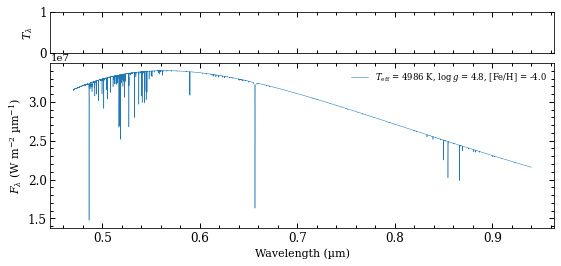

In [43]:
fig = plot_spectrum(boxes=[model_box],
                    filters=['MKO/NSFCam.J', 'MKO/NSFCam.H', 'MKO/NSFCam.K', 'MKO/NSFCam.Lp', 'MKO/NSFCam.Mp'],
                    legend={'loc': 'upper right', 'frameon': False, 'fontsize': 8.5},
                    figsize=(7., 3.),
                    output=None)

In [44]:
b1,b2=(5890-30)*0.0001,(5896+30)*0.0001


-------------
Plot spectrum
-------------

Boxes:
   - ModelBox
   - ModelBox

Object type: planet
Quantity: flux density
Units: ('um', 'W m-2 um-1')
Filter profiles: ['MKO/NSFCam.J', 'MKO/NSFCam.H', 'MKO/NSFCam.K', 'MKO/NSFCam.Lp', 'MKO/NSFCam.Mp']

Figure size: (7.0, 3.0)
Legend parameters: None
Include model name: False


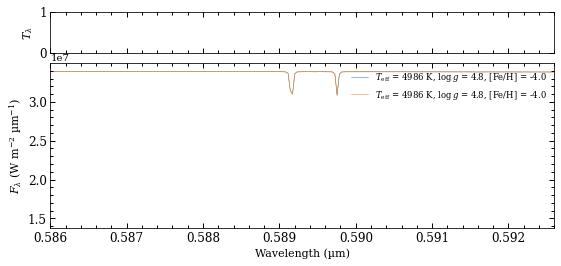

In [45]:
fig = plot_spectrum(boxes=[model_box, model_ext],
                    filters=['MKO/NSFCam.J', 'MKO/NSFCam.H', 'MKO/NSFCam.K', 'MKO/NSFCam.Lp', 'MKO/NSFCam.Mp'],
                    xlim=(b1,b2),#ylim=(1.75*10**(-14),1.9*10**(-14)),
                    legend={'loc': 'upper right', 'frameon': False, 'fontsize': 8.5},
                    figsize=(7., 3.),
                    output=None)

In [46]:
model_box.open_box()

Opening ModelBox...
model = phoenix-husser2013
type = None
wavelength = [0.46998894 0.47001221 0.47003548 ... 0.93991401 0.93996055 0.94000708]
flux = [31573921.2591066  31572629.18698421 31582222.86985505 ...
 21584678.96992834 21583024.67786606 21581413.33596934]
parameters = {'teff': 4985.64111328125, 'logg': 4.7708001136779785, 'feh': -3.9862000942230225, 'distance': 5.617748864906956}
quantity = flux
contribution = None
bol_flux = None
spec_res = 20000


In [47]:
model_box.wavelength

array([0.46998894, 0.47001221, 0.47003548, ..., 0.93991401, 0.93996055,
       0.94000708])

In [48]:
xx=model_box.wavelength
xx=xx*10000
yy=model_box.flux

print(xx)
print(yy)

[4699.88937008 4700.12206359 4700.35476861 ... 9399.14011394 9399.60546933
 9400.07084776]
[31573921.2591066  31572629.18698421 31582222.86985505 ...
 21584678.96992834 21583024.67786606 21581413.33596934]


(5870.0, 5910.0)

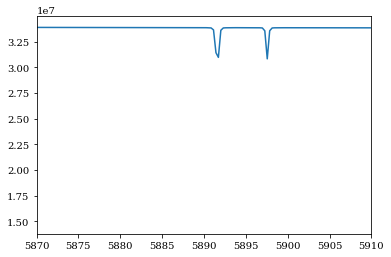

In [49]:
plt.plot(xx,yy)
plt.xlim(na_rest-20,na_rest+20)

In [50]:
spectra=[[xx,yy]]

In [51]:
ew_theoretical=[]
err_ew_theoretical=[]
for (wavelength, flux) in spectra:
    val=EW_theoretical_spectra(wavelength, flux,na_rest)
    
    ew_theoretical.append(val[0][0])
    err_ew_theoretical.append(val[1][0])

EW= 0.08  +/-  0.0004544946120074264


In [52]:
model_param

{'teff': 4985.64111328125,
 'logg': 4.7708001136779785,
 'feh': -3.9862000942230225,
 'distance': 5.617748864906956}

In [53]:
v=200
na_rest*(1-v/(3*10**5))

5886.073333333333

Opening ModelBox...
model = phoenix-husser2013
type = None
wavelength = [0.46998894 0.47001221 0.47003548 ... 0.93991401 0.93996055 0.94000708]
flux = [31573921.2591066  31572629.18698421 31582222.86985505 ...
 21584678.96992834 21583024.67786606 21581413.33596934]
parameters = {'teff': 4985.64111328125, 'logg': 4.7708001136779785, 'feh': -3.9862000942230225, 'distance': 5.617748864906956}
quantity = flux
contribution = None
bol_flux = None
spec_res = 20000
None

-------------
Plot spectrum
-------------

Boxes:
   - ModelBox
   - ModelBox

Object type: planet
Quantity: flux density
Units: ('um', 'W m-2 um-1')
Filter profiles: ['MKO/NSFCam.J', 'MKO/NSFCam.H', 'MKO/NSFCam.K', 'MKO/NSFCam.Lp', 'MKO/NSFCam.Mp']

Figure size: (7.0, 3.0)
Legend parameters: None
Include model name: False


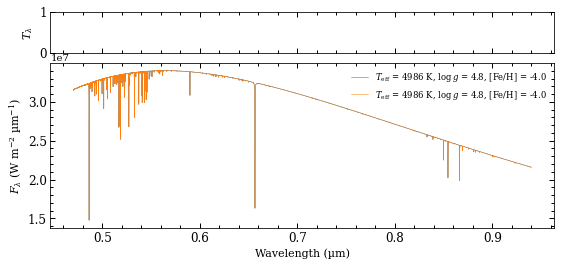

Opening ModelBox...
model = phoenix-husser2013
type = None
wavelength = [0.46998894 0.47001221 0.47003548 ... 0.93991401 0.93996055 0.94000708]
flux = [22923762.50606127 23062705.79613958 38583934.37901063 ...
 22612281.50571065 22504795.38459051 22137026.44946187]
parameters = {'teff': 4950.3466796875, 'logg': 4.454599857330322, 'feh': -0.08169999718666077, 'distance': 1.0499188676714757}
quantity = flux
contribution = None
bol_flux = None
spec_res = 20000
None

-------------
Plot spectrum
-------------

Boxes:
   - ModelBox
   - ModelBox

Object type: planet
Quantity: flux density
Units: ('um', 'W m-2 um-1')
Filter profiles: ['MKO/NSFCam.J', 'MKO/NSFCam.H', 'MKO/NSFCam.K', 'MKO/NSFCam.Lp', 'MKO/NSFCam.Mp']

Figure size: (7.0, 3.0)
Legend parameters: None
Include model name: False


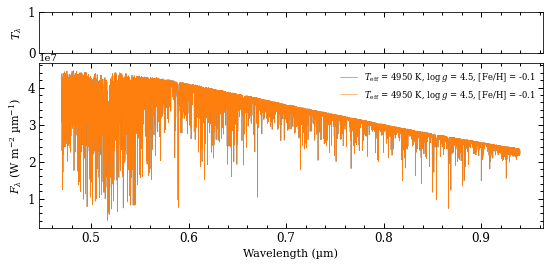

Opening ModelBox...
model = phoenix-husser2013
type = None
wavelength = [0.46998894 0.47001221 0.47003548 ... 0.93991401 0.93996055 0.94000708]
flux = [47225433.57297446 46819133.78235827 58694466.77550973 ...
 27968041.57288232 27984222.22944451 27844559.8063086 ]
parameters = {'teff': 5296.0205078125, 'logg': 4.6255998611450195, 'feh': -0.588699996471405, 'distance': 2.942284765848665}
quantity = flux
contribution = None
bol_flux = None
spec_res = 20000
None

-------------
Plot spectrum
-------------

Boxes:
   - ModelBox
   - ModelBox

Object type: planet
Quantity: flux density
Units: ('um', 'W m-2 um-1')
Filter profiles: ['MKO/NSFCam.J', 'MKO/NSFCam.H', 'MKO/NSFCam.K', 'MKO/NSFCam.Lp', 'MKO/NSFCam.Mp']

Figure size: (7.0, 3.0)
Legend parameters: None
Include model name: False


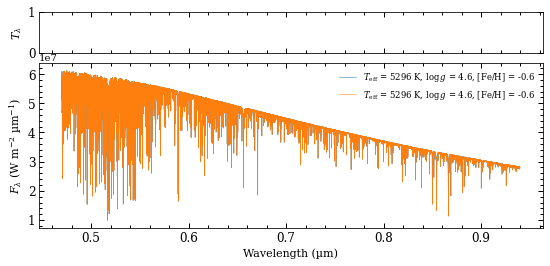

Opening ModelBox...
model = phoenix-husser2013
type = None
wavelength = [0.46998894 0.47001221 0.47003548 ... 0.93991401 0.93996055 0.94000708]
flux = [13370215.34325872 11288056.91250585 16856852.89201035 ...
 15059802.91134992 15075278.26860045 15050789.42461548]
parameters = {'teff': 4414.33740234375, 'logg': 4.717299938201904, 'feh': -1.0061999559402466, 'distance': 1.9813407267765526}
quantity = flux
contribution = None
bol_flux = None
spec_res = 20000
None

-------------
Plot spectrum
-------------

Boxes:
   - ModelBox
   - ModelBox

Object type: planet
Quantity: flux density
Units: ('um', 'W m-2 um-1')
Filter profiles: ['MKO/NSFCam.J', 'MKO/NSFCam.H', 'MKO/NSFCam.K', 'MKO/NSFCam.Lp', 'MKO/NSFCam.Mp']

Figure size: (7.0, 3.0)
Legend parameters: None
Include model name: False


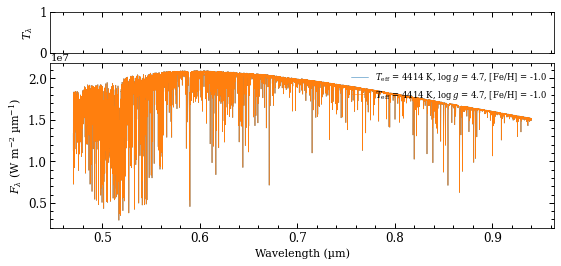

Opening ModelBox...
model = phoenix-husser2013
type = None
wavelength = [0.46998894 0.47001221 0.47003548 ... 0.93991401 0.93996055 0.94000708]
flux = [64327073.04937806 64331174.58254109 64352878.89332154 ...
 30451554.28034722 30448855.00524097 30446151.59621973]
parameters = {'teff': 5579.5810546875, 'logg': 4.644800186157227, 'feh': -3.647900104522705, 'distance': 4.886341799955745}
quantity = flux
contribution = None
bol_flux = None
spec_res = 20000
None

-------------
Plot spectrum
-------------

Boxes:
   - ModelBox
   - ModelBox

Object type: planet
Quantity: flux density
Units: ('um', 'W m-2 um-1')
Filter profiles: ['MKO/NSFCam.J', 'MKO/NSFCam.H', 'MKO/NSFCam.K', 'MKO/NSFCam.Lp', 'MKO/NSFCam.Mp']

Figure size: (7.0, 3.0)
Legend parameters: None
Include model name: False


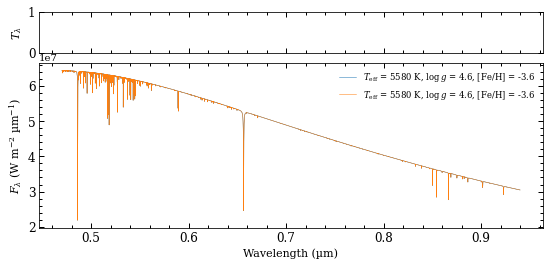

Opening ModelBox...
model = phoenix-husser2013
type = None
wavelength = [0.46998894 0.47001221 0.47003548 ... 0.93991401 0.93996055 0.94000708]
flux = [9.38305308e+07 9.79500442e+07 1.06626138e+08 ... 3.90986735e+07
 3.91968177e+07 3.91544350e+07]
parameters = {'teff': 5944.4638671875, 'logg': 4.455699920654297, 'feh': -0.6107000112533569, 'distance': 4.931472897812743}
quantity = flux
contribution = None
bol_flux = None
spec_res = 20000
None

-------------
Plot spectrum
-------------

Boxes:
   - ModelBox
   - ModelBox

Object type: planet
Quantity: flux density
Units: ('um', 'W m-2 um-1')
Filter profiles: ['MKO/NSFCam.J', 'MKO/NSFCam.H', 'MKO/NSFCam.K', 'MKO/NSFCam.Lp', 'MKO/NSFCam.Mp']

Figure size: (7.0, 3.0)
Legend parameters: None
Include model name: False


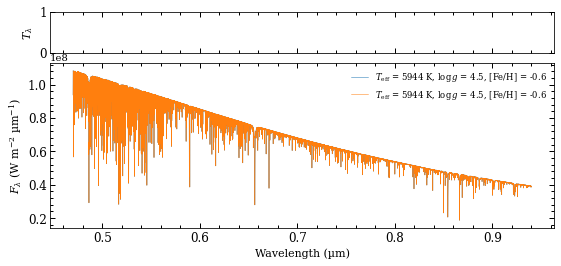

In [54]:
specs=generate_spectra(model,stars_data,figures=True)

In [55]:
stars_data

x    y          ra        dec  parallax  parallax_err         teff  \
1  352  107  156.366716 -39.831703  0.178007      0.139624  4985.641113   
2  174  109  156.379559 -39.831606  0.952455      0.031316  4950.346680   
3  406  173  156.362821 -39.828052  0.339872      0.069792  5296.020508   
6  200  236  156.377709 -39.824549  0.504709      0.110402  4414.337402   
7  237  273  156.375000 -39.822496  0.204652      0.095322  5579.581055   
8  340  277  156.367552 -39.822292  0.202779      0.051899  5944.463867   

     logg     met        mag  
1  4.7708 -3.9862  18.660872  
2  4.4546 -0.0817  15.921439  
3  4.6256 -0.5887  17.504930  
6  4.7173 -1.0062  18.284786  
7  4.6448 -3.6479  18.041954  
8  4.4557 -0.6107  16.939793

In [56]:
wavelength

array([4699.88937008, 4700.12206359, 4700.35476861, ..., 9399.14011394,
       9399.60546933, 9400.07084776])

In [57]:
na_rest

5890

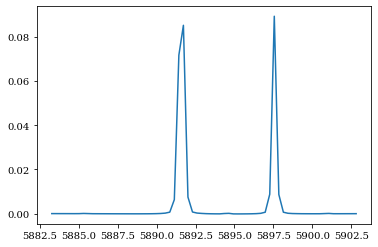

EW= 0.08  +/-  0.00038041001554278215


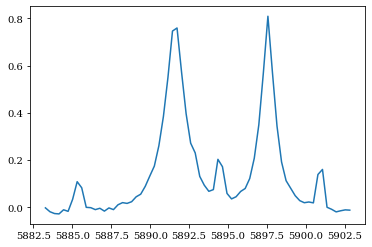

EW= 2.80  +/-  0.12085035179185742


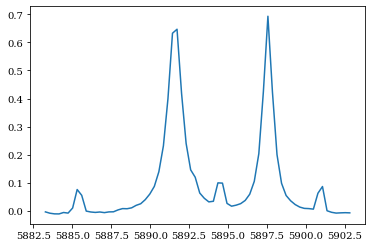

EW= 1.85  +/-  0.05631654188522047


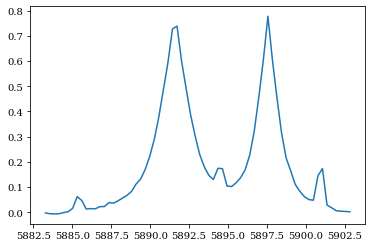

EW= 3.70  +/-  0.16846843668914713


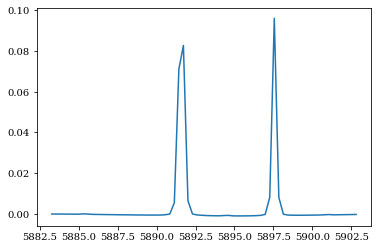

EW= 0.07  +/-  0.0014203595394948775


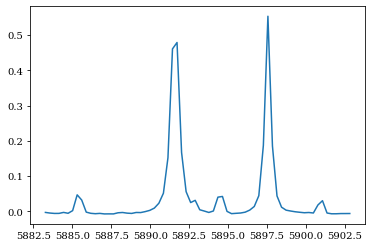

EW= 0.75  +/-  0.013641202369371216


In [58]:
ew_theoretical=[]
err_ew_theoretical=[]
for (wavelength, flux) in specs:
    val=EW_theoretical_spectra(wavelength*10000, flux,5893,plots=True)
    
    ew_theoretical.append(val[0][0])
    err_ew_theoretical.append(val[1][0])

In [59]:
stars_data['EW'] = ew_theoretical
stars_data['EW_err'] = err_ew_theoretical

In [60]:
stars_data

x    y          ra        dec  parallax  parallax_err         teff  \
1  352  107  156.366716 -39.831703  0.178007      0.139624  4985.641113   
2  174  109  156.379559 -39.831606  0.952455      0.031316  4950.346680   
3  406  173  156.362821 -39.828052  0.339872      0.069792  5296.020508   
6  200  236  156.377709 -39.824549  0.504709      0.110402  4414.337402   
7  237  273  156.375000 -39.822496  0.204652      0.095322  5579.581055   
8  340  277  156.367552 -39.822292  0.202779      0.051899  5944.463867   

     logg     met        mag        EW    EW_err  
1  4.7708 -3.9862  18.660872  0.081006  0.000380  
2  4.4546 -0.0817  15.921439  2.802039  0.120850  
3  4.6256 -0.5887  17.504930  1.845317  0.056317  
6  4.7173 -1.0062  18.284786  3.703291  0.168468  
7  4.6448 -3.6479  18.041954  0.072894  0.001420  
8  4.4557 -0.6107  16.939793  0.750240  0.013641

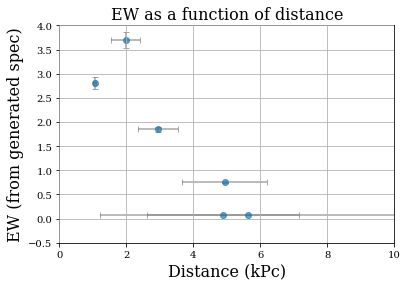

[0.00038041 0.12085035 0.05631654 0.16846844 0.00142036 0.0136412 ]


In [61]:
distance = 1 / stars_data['parallax'].values
ew = stars_data['EW'].values
distance_uncertainty = (stars_data['parallax_err'].values / stars_data['parallax'].values**2)

plt.errorbar(distance, ew, xerr=distance_uncertainty,yerr=stars_data['EW_err'].values, fmt='o', ecolor='gray', alpha=0.7, capsize=3)
plt.title("EW as a function of distance", fontsize=16)
plt.xlabel("Distance (kPc)", fontsize=16)
plt.ylabel("EW (from generated spec)", fontsize=16)
plt.grid(True)
plt.xlim(0,10)
plt.ylim(-0.5,4)
plt.show()

print(stars_data['EW_err'].values)

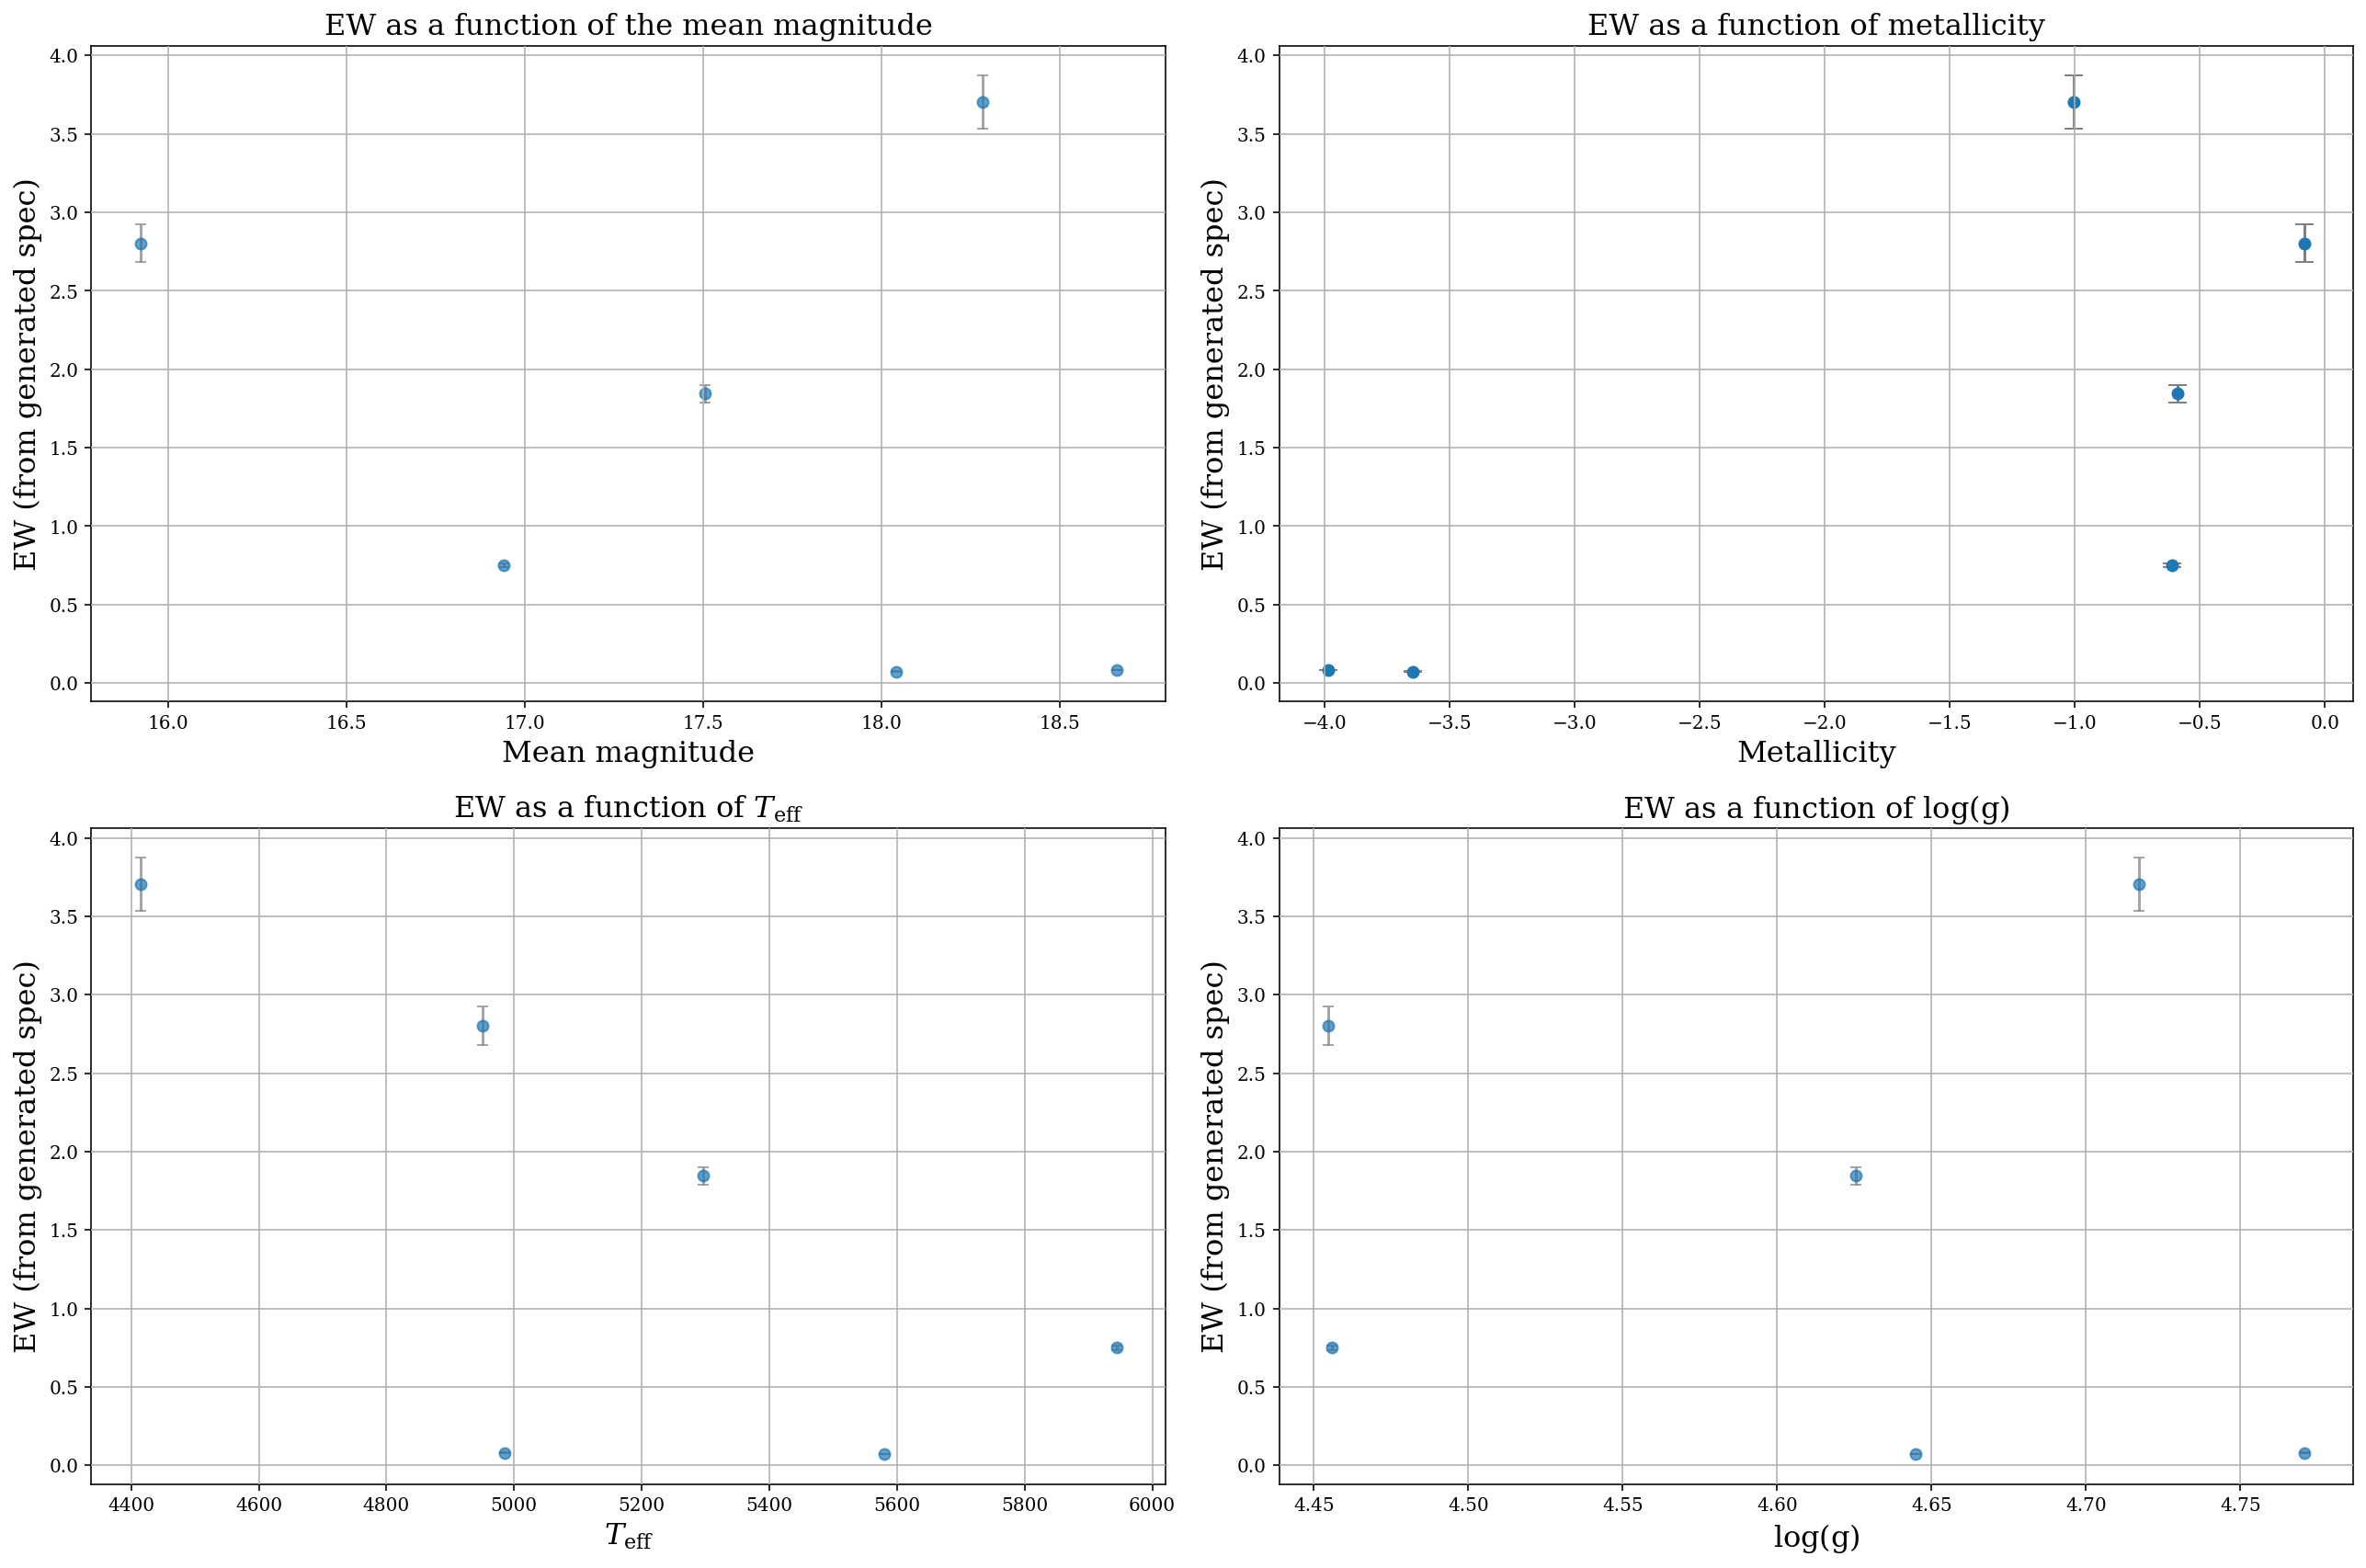

In [62]:
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots(2, 2, figsize=(18, 12))

ax[0][0].errorbar(stars_data['mag'].values, ew, yerr=stars_data['EW_err'].values, fmt='o', ecolor='gray', alpha=0.7, capsize=3)


ax[0][0].set_title("EW as a function of the mean magnitude", fontsize=16)
ax[0][0].set_xlabel("Mean magnitude", fontsize=16)
ax[0][0].set_ylabel("EW (from generated spec)", fontsize=16)
ax[0][0].grid(True)

#######

ax[0][1].errorbar(stars_data['met'].values, ew, yerr=stars_data['EW_err'].values, fmt='o', ecolor='gray', capsize=5)


ax[0][1].set_title("EW as a function of metallicity", fontsize=16)
ax[0][1].set_xlabel("Metallicity", fontsize=16)
ax[0][1].set_ylabel("EW (from generated spec)", fontsize=16)
ax[0][1].grid(True)

#######

ax[1][0].errorbar(stars_data['teff'].values, ew, yerr=stars_data['EW_err'].values, fmt='o', ecolor='gray', alpha=0.7, capsize=3)
ax[1][0].set_title("EW as a function of $T_{\mathrm{eff}}$", fontsize=16)
ax[1][0].set_xlabel("$T_{\mathrm{eff}}$", fontsize=16)
ax[1][0].set_ylabel("EW (from generated spec)", fontsize=16)
ax[1][0].grid(True)

#######

ax[1][1].errorbar(stars_data['logg'].values, ew, yerr=stars_data['EW_err'].values, fmt='o', ecolor='gray', alpha=0.7, capsize=3)


ax[1][1].set_title("EW as a function of $\log(\mathrm{g})$", fontsize=16)
ax[1][1].set_xlabel("$\log(\mathrm{g})$", fontsize=16)
ax[1][1].set_ylabel("EW (from generated spec)", fontsize=16)
ax[1][1].grid(True)

plt.tight_layout()
plt.show()

Plotting the observed EW - theoretical EW

In [63]:
positions=np.transpose((stars_data['x'].values,stars_data['y'].values))

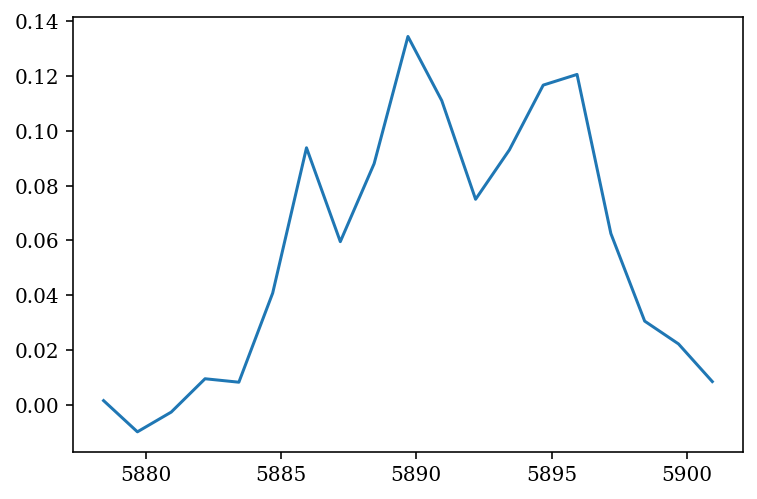

EW= 1.32  +/-  0.18695753760594


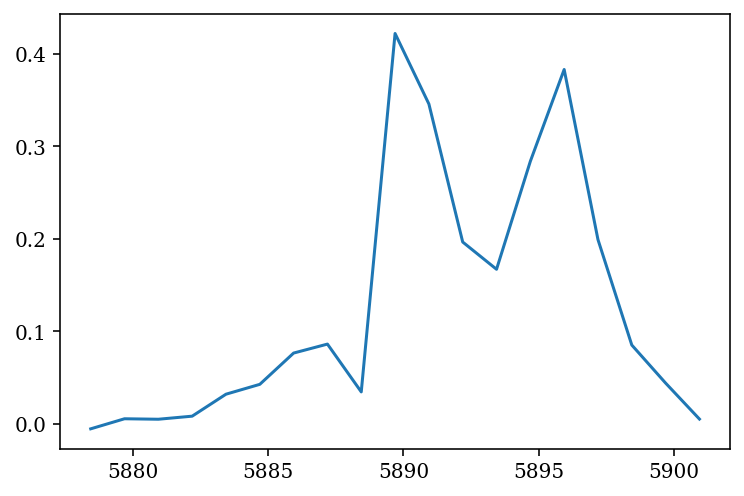

EW= 3.03  +/-  0.2716330857043557


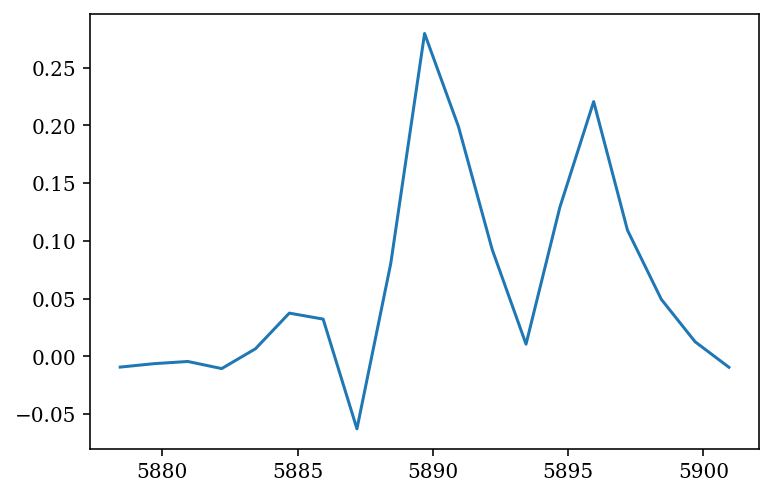

EW= 1.46  +/-  0.16364538511454252


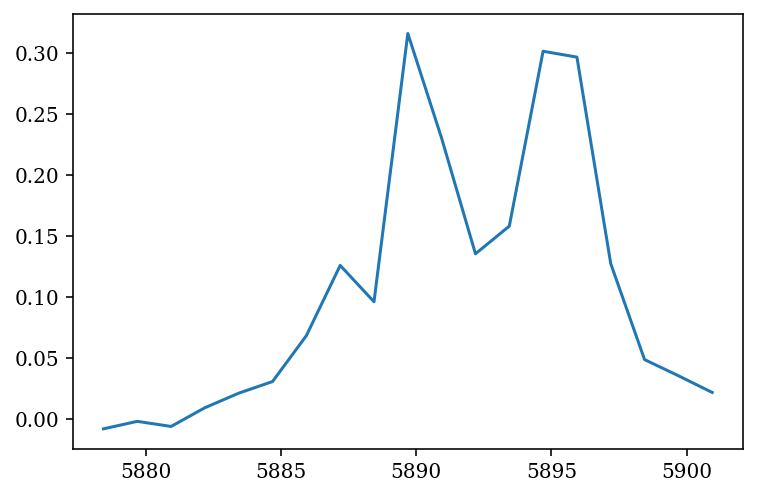

EW= 2.49  +/-  0.2252296920909188


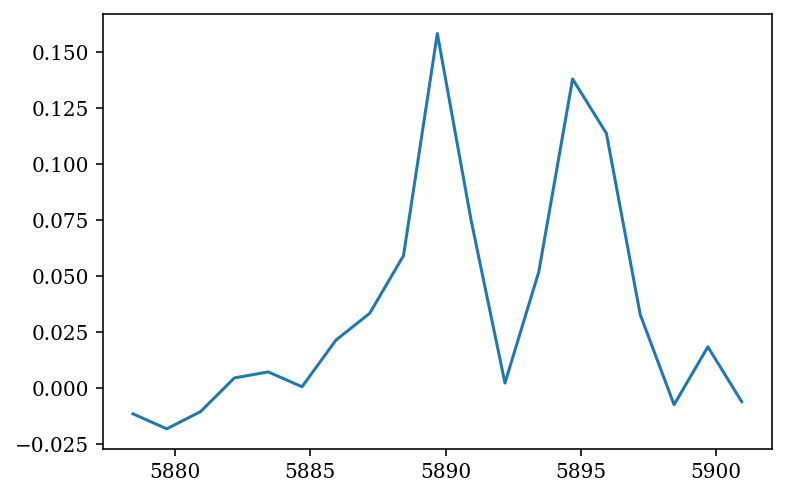

EW= 0.84  +/-  0.09834319037235667


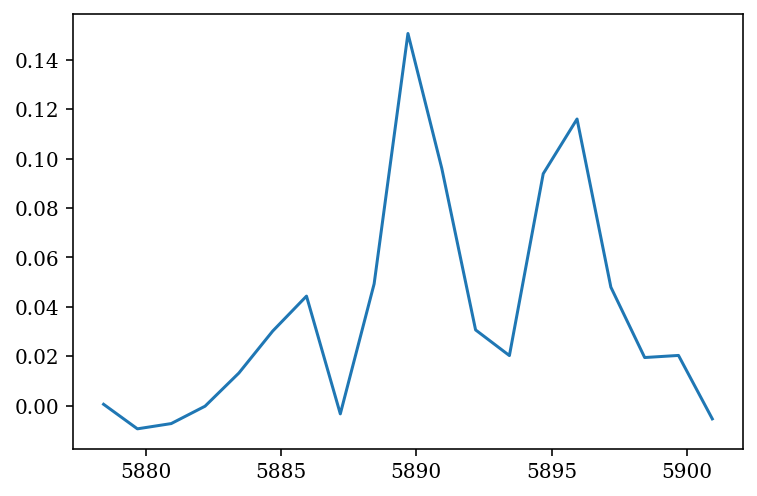

EW= 0.89  +/-  0.09471380995205377


In [64]:
EWs,err=EW_point_sources(cube, positions, wave, na_rest,radius=10,plots=True)

In [65]:
EWs

[1.3226193869438871,
 3.025099510581447,
 1.4578144784417613,
 2.49340646796799,
 0.8370796798340053,
 0.8875550733728835]

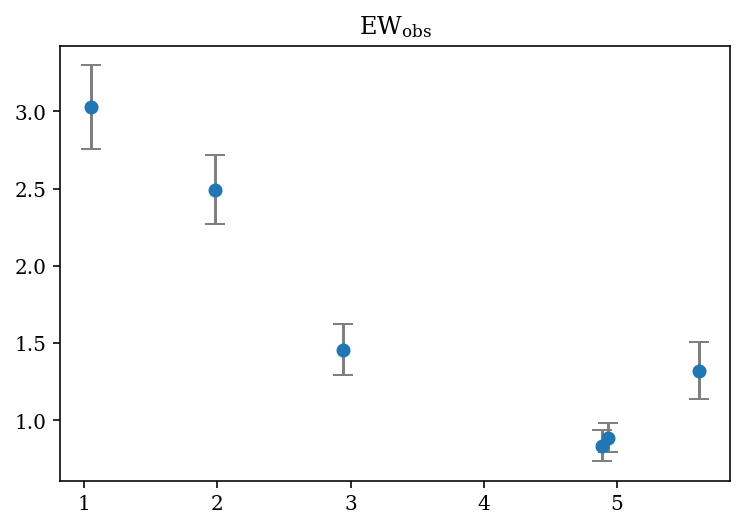

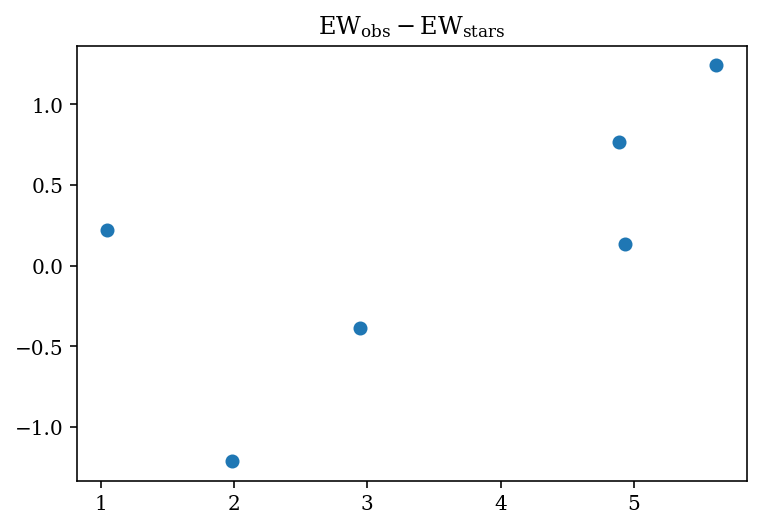

In [70]:
#plt.scatter(1/stars_data['parallax'].values,EWs)

plt.errorbar(1/stars_data['parallax'].values,EWs,yerr=err, fmt='o', ecolor='gray', capsize=5)

plt.title("$\mathrm{EW_{obs}}$")
plt.show()
plt.scatter(1/stars_data['parallax'].values,np.subtract(EWs,stars_data['EW'].values))
plt.title("$\mathrm{EW_{obs}}-\mathrm{EW_{stars}}$")
plt.show()

# Model dependencies on parameters Teff, met, logg

In [216]:
"""teff = np.array(range(4400,6000,50))
met = [-0.5] * len(teff)
logg = [4.6] * len(teff)
par = [0.3] * len(teff)"""

# teff between 4400-6000, -4<met<0, 4<logg<5, par
L=50
N=int((6000-4400)/50)
teff = np.tile(np.array(range(4400,6000,N)),5)
met = [-4] * L + [-3] * L + [-2] * L + [-1] * L + [0] * L
logg = [4.6] * L + [4.6] * L +[4.6] * L + [4.6] * L + [4.6] * L
par = [0.3] * L + [0.3] * L +[0.3] * L + [0.3] * L + [0.3] * L


stars_data = pd.DataFrame({
    'parallax': par,     # Parallax
    'teff': teff,        # Effective temperature
    'logg': logg,        # Surface gravity
    'met': met,          # Metallicity
})

In [217]:
specs=generate_spectra(model,stars_data,figures=False)
ew_theoretical=[]
err_ew_theoretical=[]
for (wavelength, flux) in specs:
    val=EW_theoretical_spectra(wavelength*10000, flux,5893,plots=False);
    
    ew_theoretical.append(val[0][0])
    err_ew_theoretical.append(val[1][0])

    
stars_data['EW'] = ew_theoretical
stars_data['EW_err'] = err_ew_theoretical

EW= 0.27  +/-  0.0015700530842876238
EW= 0.23  +/-  0.0012973806193623582
EW= 0.21  +/-  0.0009621902914568514
EW= 0.18  +/-  0.0006763037296743739
EW= 0.17  +/-  0.0006458390124187183
EW= 0.15  +/-  0.0006400370570691771
EW= 0.14  +/-  0.0005390698224172874
EW= 0.13  +/-  0.00046590333887206196
EW= 0.12  +/-  0.0003941450699258686
EW= 0.12  +/-  0.00033664899502059884
EW= 0.11  +/-  0.0002947387300154199
EW= 0.10  +/-  0.0002036795696758226
EW= 0.10  +/-  0.000157135114808288
EW= 0.10  +/-  0.00011019164832745814
EW= 0.09  +/-  0.00014817060652485523
EW= 0.09  +/-  0.00020514108150457768
EW= 0.09  +/-  0.0003018425335120435
EW= 0.08  +/-  0.00031143959667822397
EW= 0.08  +/-  0.0003602441084345119
EW= 0.08  +/-  0.00042059444405207413
EW= 0.08  +/-  0.00045997478927621013
EW= 0.07  +/-  0.0004972756237647632
EW= 0.07  +/-  0.0005437081898040342
EW= 0.06  +/-  0.000631829756645312
EW= 0.06  +/-  0.0006971741845622288
EW= 0.06  +/-  0.0007719008224833992
EW= 0.06  +/-  0.000849882108446

EW= 2.06  +/-  0.07737959826615085
EW= 1.99  +/-  0.07311696801989977
EW= 1.91  +/-  0.06904693988256624
EW= 1.85  +/-  0.06517098209996115
EW= 1.80  +/-  0.061313185014301025
EW= 1.72  +/-  0.057763862361993754
EW= 1.67  +/-  0.05445449174541395
EW= 1.61  +/-  0.05130587649445806
EW= 1.55  +/-  0.0482971989465557
EW= 1.51  +/-  0.04539541974904202
EW= 1.46  +/-  0.04266435692468496
EW= 1.41  +/-  0.040221915679600796
EW= 1.37  +/-  0.038414747137006905
EW= 1.33  +/-  0.03685012103602699
EW= 1.30  +/-  0.035261874547283564
EW= 1.26  +/-  0.033354730387026424
EW= 1.23  +/-  0.031037477220816664


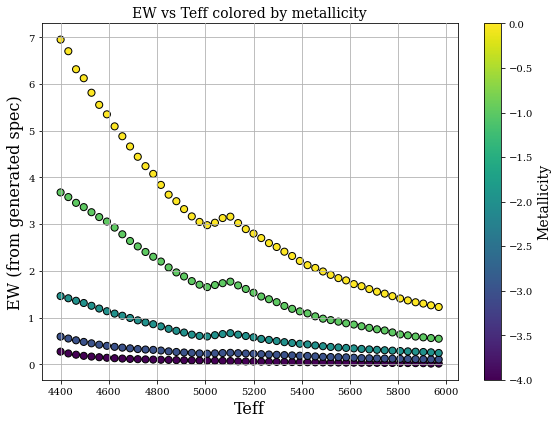

In [218]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    stars_data['teff'].values,
    stars_data['EW'].values,
    c=stars_data['met'].values,     # color by metallicity
    cmap='viridis',                 # choose a nice colormap
    s=50,                           # point size
    edgecolor='k'                   # optional: add edge for visibility
)

plt.xlabel("Teff", fontsize=16)
plt.ylabel("EW (from generated spec)", fontsize=16)
plt.title("EW vs Teff colored by metallicity", fontsize=14)


cbar = plt.colorbar(scatter)
cbar.set_label("Metallicity", fontsize=14)

plt.grid(True)
plt.tight_layout()
plt.show()


different plot

In [268]:
# teff between 4400-6000, -4<met<0, 4<logg<5, par
aux=np.arange(-3,1,0.5)
met = np.tile(aux,5)
teff = [5000] * len(aux) * 5
logg = [4.] * len(aux) + [4.3] * len(aux) + [4.6] * len(aux) + [4.9] * len(aux) + [5.1] * len(aux)
par = [0.3] * len(aux) * 5

stars_data = pd.DataFrame({
    'parallax': par,     # Parallax
    'teff': teff,        # Effective temperature
    'logg': logg,        # Surface gravity
    'met': met,          # Metallicity
})

EW= 0.20  +/-  0.0010846219811684028
EW= 0.34  +/-  0.002642799068427189
EW= 0.46  +/-  0.004165634484454919
EW= 0.77  +/-  0.009598203817133584
EW= 1.17  +/-  0.022406864169680435
EW= 1.61  +/-  0.04351687042834142
EW= 2.01  +/-  0.08102873415777775
EW= 2.40  +/-  0.1376302821813046
EW= 0.21  +/-  0.0010927887389414928
EW= 0.37  +/-  0.0032874896340491368
EW= 0.52  +/-  0.005293761791547372
EW= 0.88  +/-  0.013386406778880387
EW= 1.38  +/-  0.031150903145010168
EW= 1.91  +/-  0.05921854714857449
EW= 2.49  +/-  0.10312510442883077
EW= 2.82  +/-  0.16896038376932812
EW= 0.23  +/-  0.0011672835111269637
EW= 0.41  +/-  0.0038968824177304717
EW= 0.59  +/-  0.006527808705928005
EW= 1.02  +/-  0.018208528616139967
EW= 1.64  +/-  0.041301327078957624
EW= 2.26  +/-  0.07739222746382661
EW= 2.96  +/-  0.13011686841347547
EW= 3.54  +/-  0.2016491217111069
EW= 0.25  +/-  0.0013393029534877721
EW= 0.46  +/-  0.0049498029359501036
EW= 0.66  +/-  0.008283242030135071
EW= 1.17  +/-  0.023102501341172

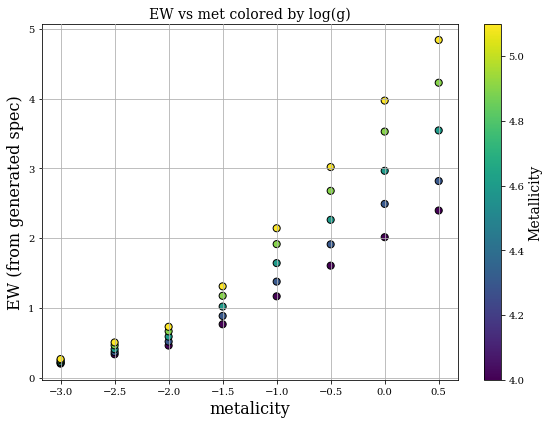

In [270]:
specs=generate_spectra(model,stars_data,figures=False)

ew_theoretical=[]
err_ew_theoretical=[]
for (wavelength, flux) in specs:
    val=EW_theoretical_spectra(wavelength*10000, flux,5893,plots=False);
    
    ew_theoretical.append(val[0][0])
    err_ew_theoretical.append(val[1][0])

    
stars_data['EW'] = ew_theoretical
stars_data['EW_err'] = err_ew_theoretical

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    stars_data['met'].values,
    stars_data['EW'].values,
    c=stars_data['logg'].values,    # color by logg
    cmap='viridis',                 # choose a nice colormap
    s=50,                           # point size
    edgecolor='k'                   # optional: add edge for visibility
)

plt.xlabel("metalicity", fontsize=16)
plt.ylabel("EW (from generated spec)", fontsize=16)
plt.title("EW vs met colored by log(g)", fontsize=14)


cbar = plt.colorbar(scatter)
cbar.set_label("Metallicity", fontsize=14)

plt.grid(True)
plt.tight_layout()
plt.show()

EW vs par colored by logg

In [264]:
# teff between 4400-6000, -4<met<0, 4<logg<5, par


aux=np.arange(4400,6000,50)
teff = np.tile(aux,5)
par = [0.3] * len(aux) * 5
logg = [4] * len(aux) + [4.3] * len(aux) + [4.6] * len(aux) + [4.9] * len(aux) + [5.1] * len(aux)
met = [-1] * len(aux) * 5

stars_data = pd.DataFrame({
    'parallax': par,     # Parallax
    'teff': teff,        # Effective temperature
    'logg': logg,        # Surface gravity
    'met': met,          # Metallicity
})

EW= 3.15  +/-  0.11832849408671334
EW= 2.86  +/-  0.10427130476664825
EW= 2.63  +/-  0.08888658533511395
EW= 2.38  +/-  0.076484200940141
EW= 2.19  +/-  0.06331824408164768
EW= 2.02  +/-  0.05541216828882825
EW= 1.87  +/-  0.04771831029874995
EW= 1.73  +/-  0.04148123345907333
EW= 1.59  +/-  0.03566793032418838
EW= 1.48  +/-  0.03131722458924183
EW= 1.37  +/-  0.027289313400617025
EW= 1.24  +/-  0.02455045791833302
EW= 1.17  +/-  0.022406864169680435
EW= 1.20  +/-  0.023307363089401636
EW= 1.23  +/-  0.025281352726645025
EW= 1.16  +/-  0.022492401163086567
EW= 1.08  +/-  0.020148097128153776
EW= 1.01  +/-  0.018308280411097572
EW= 0.95  +/-  0.01650990526247923
EW= 0.89  +/-  0.015105697664452264
EW= 0.83  +/-  0.013820850637138461
EW= 0.78  +/-  0.012733811723784854
EW= 0.73  +/-  0.011637714964282557
EW= 0.68  +/-  0.01058367051624663
EW= 0.65  +/-  0.00959533793378578
EW= 0.62  +/-  0.008571279275793141
EW= 0.58  +/-  0.007854264133581139
EW= 0.53  +/-  0.007405356414038782
EW= 0.48

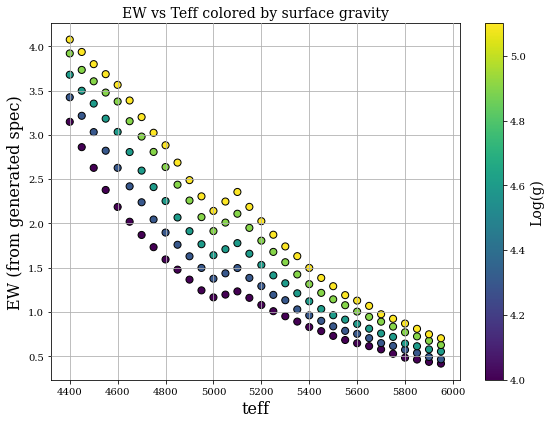

In [267]:
specs=generate_spectra(model,stars_data,figures=False)

ew_theoretical=[]
err_ew_theoretical=[]
for (wavelength, flux) in specs:
    val=EW_theoretical_spectra(wavelength*10000, flux,5893,plots=False);
    
    ew_theoretical.append(val[0][0])
    err_ew_theoretical.append(val[1][0])

    
stars_data['EW'] = ew_theoretical
stars_data['EW_err'] = err_ew_theoretical

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    stars_data['teff'].values,
    stars_data['EW'].values,
    c=stars_data['logg'].values,    # color by logg
    cmap='viridis',                 # choose a nice colormap
    s=50,                           # point size
    edgecolor='k'                   # optional: add edge for visibility
)

plt.xlabel("teff", fontsize=16)
plt.ylabel("EW (from generated spec)", fontsize=16)
plt.title("EW vs Teff colored by surface gravity", fontsize=14)


cbar = plt.colorbar(scatter)
cbar.set_label("Log(g)", fontsize=14)

plt.grid(True)
plt.tight_layout()
plt.show()

EW vs log colored by Teff

In [286]:
# teff between 4400-6000, -4<met<0, 4<logg<5, par


aux=np.arange(3,5,0.1)
par = [0.3] * len(aux) * 5
logg = np.tile(aux,5)
teff = [4500] * len(aux) + [4750] * len(aux) + [5000] * len(aux) + [5250] * len(aux) + [5500] * len(aux)
met = [-1] * len(aux) * 5

stars_data = pd.DataFrame({
    'parallax': par,     # Parallax
    'teff': teff,        # Effective temperature
    'logg': logg,        # Surface gravity
    'met': met,          # Metallicity
})

EW= 1.55  +/-  0.03168258943365881
EW= 1.62  +/-  0.037394520458290906
EW= 1.72  +/-  0.04177387078144425
EW= 1.80  +/-  0.04518405743508328
EW= 1.90  +/-  0.04793692920772172
EW= 2.00  +/-  0.05193405372280866
EW= 2.11  +/-  0.05938040366432746
EW= 2.23  +/-  0.06661098105883985
EW= 2.35  +/-  0.07502523954569928
EW= 2.50  +/-  0.08166967952316212
EW= 2.63  +/-  0.08888658533511395
EW= 2.77  +/-  0.09762001084983306
EW= 2.90  +/-  0.10363248073269275
EW= 3.03  +/-  0.11358693860514449
EW= 3.16  +/-  0.1204697378874987
EW= 3.28  +/-  0.12523528161162872
EW= 3.35  +/-  0.1306410803796188
EW= 3.42  +/-  0.13986054499504935
EW= 3.52  +/-  0.14961334242070573
EW= 3.60  +/-  0.1602850523943411
EW= 1.10  +/-  0.016885983823109338
EW= 1.15  +/-  0.018320107906747932
EW= 1.19  +/-  0.01992502965040382
EW= 1.24  +/-  0.02143368838298548
EW= 1.29  +/-  0.023461251689275965
EW= 1.35  +/-  0.025497572615760283
EW= 1.43  +/-  0.02967656213644354
EW= 1.50  +/-  0.033514942134831964
EW= 1.57  +/-  0.

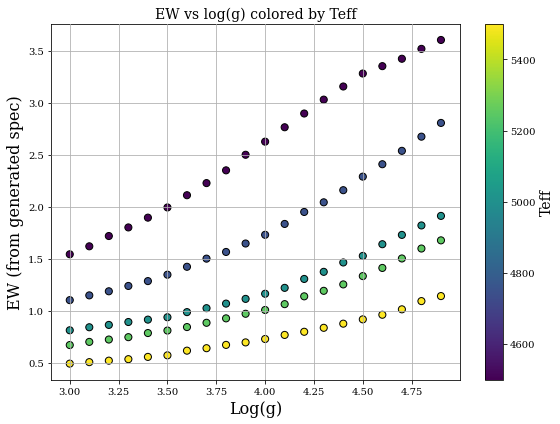

In [287]:
specs=generate_spectra(model,stars_data,figures=False)

ew_theoretical=[]
err_ew_theoretical=[]
for (wavelength, flux) in specs:
    val=EW_theoretical_spectra(wavelength*10000, flux,5893,plots=False);
    
    ew_theoretical.append(val[0][0])
    err_ew_theoretical.append(val[1][0])

    
stars_data['EW'] = ew_theoretical
stars_data['EW_err'] = err_ew_theoretical

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    stars_data['logg'].values,
    stars_data['EW'].values,
    c=stars_data['teff'].values,    # color by logg
    cmap='viridis',                 # choose a nice colormap
    s=50,                           # point size
    edgecolor='k'                   # optional: add edge for visibility
)

plt.xlabel("Log(g)", fontsize=16)
plt.ylabel("EW (from generated spec)", fontsize=16)
plt.title("EW vs log(g) colored by Teff", fontsize=14)


cbar = plt.colorbar(scatter)
cbar.set_label("Teff", fontsize=14)

plt.grid(True)
plt.tight_layout()
plt.show()

# DIBs

In [142]:
x1=350
x2=470

In [143]:
w=6293+2

In [144]:
map_NP=EW_map_non_parametric(binned_region,wave,w,mode="both",kernel_size=60,plots=False,velocity_window=500)

Integral of area over continuum divided by continuum: 2.091 +/- 0.057 at (i,j)= 0 ,  0
Integral of area over continuum divided by continuum: 1.531 +/- 0.054 at (i,j)= 0 ,  1
Integral of area over continuum divided by continuum: 1.383 +/- 0.053 at (i,j)= 0 ,  2
Integral of area over continuum divided by continuum: 1.015 +/- 0.045 at (i,j)= 0 ,  3
Integral of area over continuum divided by continuum: 0.774 +/- 0.054 at (i,j)= 0 ,  4
Integral of area over continuum divided by continuum: 0.262 +/- 0.052 at (i,j)= 0 ,  5
Integral of area over continuum divided by continuum: 0.252 +/- 0.051 at (i,j)= 0 ,  6
Integral of area over continuum divided by continuum: 0.714 +/- 0.055 at (i,j)= 0 ,  7
Integral of area over continuum divided by continuum: 0.841 +/- 0.059 at (i,j)= 0 ,  8
Integral of area over continuum divided by continuum: 0.978 +/- 0.058 at (i,j)= 0 ,  9
Integral of area over continuum divided by continuum: 1.288 +/- 0.053 at (i,j)= 0 ,  10
Integral of area over continuum divided by

Integral of area over continuum divided by continuum: 1.937 +/- 0.064 at (i,j)= 6 ,  9
Integral of area over continuum divided by continuum: 2.272 +/- 0.077 at (i,j)= 6 ,  10
Integral of area over continuum divided by continuum: 2.651 +/- 0.070 at (i,j)= 6 ,  11
Integral of area over continuum divided by continuum: 3.820 +/- 0.087 at (i,j)= 6 ,  12
Integral of area over continuum divided by continuum: 4.598 +/- 0.100 at (i,j)= 6 ,  13
Integral of area over continuum divided by continuum: 3.499 +/- 0.129 at (i,j)= 6 ,  14
Integral of area over continuum divided by continuum: 2.849 +/- 0.122 at (i,j)= 6 ,  15
Integral of area over continuum divided by continuum: 3.719 +/- 0.089 at (i,j)= 6 ,  16
Integral of area over continuum divided by continuum: 5.392 +/- 0.137 at (i,j)= 6 ,  17
Integral of area over continuum divided by continuum: 2.516 +/- 0.105 at (i,j)= 7 ,  0
Integral of area over continuum divided by continuum: 1.978 +/- 0.079 at (i,j)= 7 ,  1
Integral of area over continuum div

Integral of area over continuum divided by continuum: 8.100 +/- 0.215 at (i,j)= 11 ,  16
Integral of area over continuum divided by continuum: 8.214 +/- 0.274 at (i,j)= 11 ,  17
Integral of area over continuum divided by continuum: 9.525 +/- 0.193 at (i,j)= 12 ,  0
Integral of area over continuum divided by continuum: 6.454 +/- 0.182 at (i,j)= 12 ,  1
Integral of area over continuum divided by continuum: 7.607 +/- 0.141 at (i,j)= 12 ,  2
Integral of area over continuum divided by continuum: 8.721 +/- 0.165 at (i,j)= 12 ,  3
Integral of area over continuum divided by continuum: 7.296 +/- 0.086 at (i,j)= 12 ,  4
Integral of area over continuum divided by continuum: 4.531 +/- 0.088 at (i,j)= 12 ,  5
Integral of area over continuum divided by continuum: 6.221 +/- 0.127 at (i,j)= 12 ,  6
Integral of area over continuum divided by continuum: 5.695 +/- 0.147 at (i,j)= 12 ,  7
Integral of area over continuum divided by continuum: 4.405 +/- 0.123 at (i,j)= 12 ,  8
Integral of area over continuu

Integral of area over continuum divided by continuum: 2.475 +/- 0.234 at (i,j)= 18 ,  4
Integral of area over continuum divided by continuum: 1.025 +/- 0.156 at (i,j)= 18 ,  5
Integral of area over continuum divided by continuum: -0.521 +/- 0.135 at (i,j)= 18 ,  6
Integral of area over continuum divided by continuum: 0.556 +/- 0.144 at (i,j)= 18 ,  7
Integral of area over continuum divided by continuum: 1.297 +/- 0.092 at (i,j)= 18 ,  8
Integral of area over continuum divided by continuum: 0.025 +/- 0.127 at (i,j)= 18 ,  9
Integral of area over continuum divided by continuum: -0.367 +/- 0.077 at (i,j)= 18 ,  10
Integral of area over continuum divided by continuum: 0.766 +/- 0.114 at (i,j)= 18 ,  11
Integral of area over continuum divided by continuum: -0.839 +/- 0.222 at (i,j)= 18 ,  12
Integral of area over continuum divided by continuum: -0.083 +/- 0.199 at (i,j)= 18 ,  13
Integral of area over continuum divided by continuum: 1.599 +/- 0.104 at (i,j)= 18 ,  14
Integral of area over c

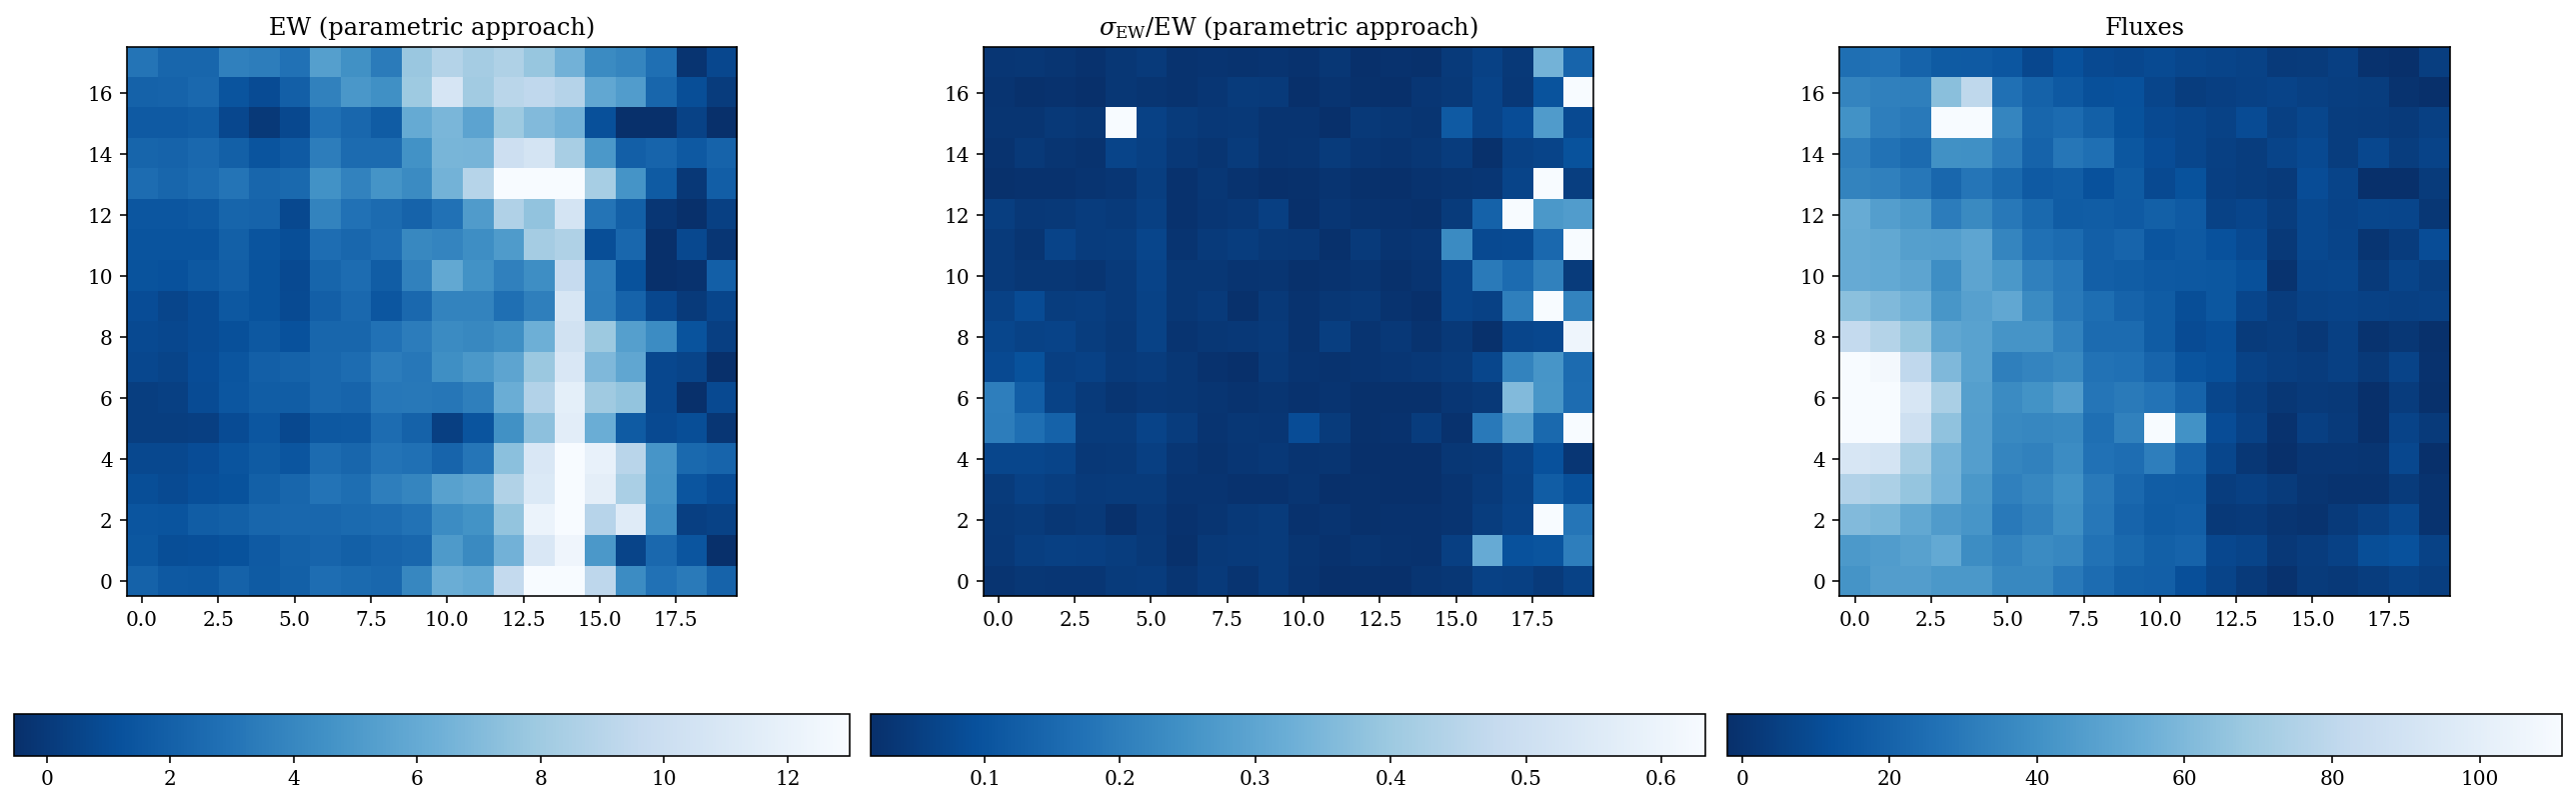

In [145]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

data = np.transpose(map_NP[0])
lo, up = np.nanpercentile(data, 2), np.nanpercentile(data, 98)
cmap = plt.cm.Blues_r.copy()
cmap.set_bad(color='yellow')
im1 = ax[0].imshow(data, cmap=cmap, origin='lower', clim=(lo, up))
fig.colorbar(im1, ax=ax[0], orientation="horizontal")
ax[0].set_title("EW (parametric approach)")

#####

data= np.transpose(abs(map_NP[1]/map_NP[0]))
lo, up = np.nanpercentile(data, 2), np.nanpercentile(data, 98)
im2 = ax[1].imshow(data, cmap=cmap, origin='lower', clim=(lo, up))
fig.colorbar(im2, ax=ax[1], orientation="horizontal")
ax[1].set_title(r"$\sigma_{\mathrm{EW}}/\mathrm{EW}$ (parametric approach)")

#####

data = binned_region[i]
lo, up = np.nanpercentile(data, 2), np.nanpercentile(data, 98)
im3 = ax[2].imshow(data, cmap='Blues_r', origin='lower', clim=(lo, up))
fig.colorbar(im3, ax=ax[2], orientation="horizontal")
ax[2].set_title("Fluxes")

plt.tight_layout()
plt.show()

In [147]:
map_NP=EW_map_non_parametric(region,wave,w,mode="both",kernel_size=60,plots=False,velocity_window=500)

Integral of area over continuum divided by continuum: 2.832 +/- 0.089 at (i,j)= 0 ,  0
Integral of area over continuum divided by continuum: 3.623 +/- 0.121 at (i,j)= 0 ,  1
Integral of area over continuum divided by continuum: 1.936 +/- 0.166 at (i,j)= 0 ,  2
Integral of area over continuum divided by continuum: 2.681 +/- 0.143 at (i,j)= 0 ,  3
Integral of area over continuum divided by continuum: 2.385 +/- 0.154 at (i,j)= 0 ,  4
Integral of area over continuum divided by continuum: 1.287 +/- 0.162 at (i,j)= 0 ,  5
Integral of area over continuum divided by continuum: 2.246 +/- 0.135 at (i,j)= 0 ,  6
Integral of area over continuum divided by continuum: 1.472 +/- 0.096 at (i,j)= 0 ,  7
Integral of area over continuum divided by continuum: 1.424 +/- 0.104 at (i,j)= 0 ,  8
Integral of area over continuum divided by continuum: 1.872 +/- 0.103 at (i,j)= 0 ,  9
Integral of area over continuum divided by continuum: 4.041 +/- 0.168 at (i,j)= 0 ,  10
Integral of area over continuum divided by

Integral of area over continuum divided by continuum: 1.881 +/- 0.108 at (i,j)= 0 ,  96
Integral of area over continuum divided by continuum: 1.190 +/- 0.090 at (i,j)= 0 ,  97
Integral of area over continuum divided by continuum: 1.469 +/- 0.107 at (i,j)= 0 ,  98
Integral of area over continuum divided by continuum: 1.148 +/- 0.060 at (i,j)= 0 ,  99
Integral of area over continuum divided by continuum: 1.627 +/- 0.118 at (i,j)= 0 ,  100
Integral of area over continuum divided by continuum: 1.922 +/- 0.090 at (i,j)= 0 ,  101
Integral of area over continuum divided by continuum: 1.145 +/- 0.108 at (i,j)= 0 ,  102
Integral of area over continuum divided by continuum: 1.456 +/- 0.082 at (i,j)= 0 ,  103
Integral of area over continuum divided by continuum: 1.391 +/- 0.138 at (i,j)= 0 ,  104
Integral of area over continuum divided by continuum: 0.758 +/- 0.067 at (i,j)= 0 ,  105
Integral of area over continuum divided by continuum: 0.828 +/- 0.098 at (i,j)= 0 ,  106
Integral of area over con

Integral of area over continuum divided by continuum: 0.726 +/- 0.103 at (i,j)= 1 ,  19
Integral of area over continuum divided by continuum: 0.844 +/- 0.090 at (i,j)= 1 ,  20
Integral of area over continuum divided by continuum: 1.520 +/- 0.060 at (i,j)= 1 ,  21
Integral of area over continuum divided by continuum: 1.845 +/- 0.072 at (i,j)= 1 ,  22
Integral of area over continuum divided by continuum: 0.565 +/- 0.100 at (i,j)= 1 ,  23
Integral of area over continuum divided by continuum: 1.598 +/- 0.078 at (i,j)= 1 ,  24
Integral of area over continuum divided by continuum: 2.618 +/- 0.067 at (i,j)= 1 ,  25
Integral of area over continuum divided by continuum: 1.841 +/- 0.119 at (i,j)= 1 ,  26
Integral of area over continuum divided by continuum: 1.601 +/- 0.099 at (i,j)= 1 ,  27
Integral of area over continuum divided by continuum: 0.917 +/- 0.065 at (i,j)= 1 ,  28
Integral of area over continuum divided by continuum: 1.082 +/- 0.055 at (i,j)= 1 ,  29
Integral of area over continuum 

Integral of area over continuum divided by continuum: 0.907 +/- 0.069 at (i,j)= 1 ,  124
Integral of area over continuum divided by continuum: 3.244 +/- 0.109 at (i,j)= 1 ,  125
Integral of area over continuum divided by continuum: 2.221 +/- 0.062 at (i,j)= 1 ,  126
Integral of area over continuum divided by continuum: 2.159 +/- 0.116 at (i,j)= 1 ,  127
Integral of area over continuum divided by continuum: 2.706 +/- 0.180 at (i,j)= 1 ,  128
Integral of area over continuum divided by continuum: 1.729 +/- 0.164 at (i,j)= 1 ,  129
Integral of area over continuum divided by continuum: 1.488 +/- 0.081 at (i,j)= 1 ,  130
Integral of area over continuum divided by continuum: 1.830 +/- 0.070 at (i,j)= 1 ,  131
Integral of area over continuum divided by continuum: 1.237 +/- 0.126 at (i,j)= 1 ,  132
Integral of area over continuum divided by continuum: 2.700 +/- 0.215 at (i,j)= 1 ,  133
Integral of area over continuum divided by continuum: 3.438 +/- 0.172 at (i,j)= 1 ,  134
Integral of area over

Integral of area over continuum divided by continuum: 0.381 +/- 0.043 at (i,j)= 2 ,  56
Integral of area over continuum divided by continuum: 0.223 +/- 0.044 at (i,j)= 2 ,  57
Integral of area over continuum divided by continuum: 0.342 +/- 0.041 at (i,j)= 2 ,  58
Integral of area over continuum divided by continuum: 0.259 +/- 0.044 at (i,j)= 2 ,  59
Integral of area over continuum divided by continuum: 0.259 +/- 0.037 at (i,j)= 2 ,  60
Integral of area over continuum divided by continuum: 0.099 +/- 0.053 at (i,j)= 2 ,  61
Integral of area over continuum divided by continuum: 0.167 +/- 0.056 at (i,j)= 2 ,  62
Integral of area over continuum divided by continuum: 0.440 +/- 0.068 at (i,j)= 2 ,  63
Integral of area over continuum divided by continuum: 0.233 +/- 0.034 at (i,j)= 2 ,  64
Integral of area over continuum divided by continuum: 0.157 +/- 0.048 at (i,j)= 2 ,  65
Integral of area over continuum divided by continuum: 0.678 +/- 0.070 at (i,j)= 2 ,  66
Integral of area over continuum 

Integral of area over continuum divided by continuum: 2.226 +/- 0.171 at (i,j)= 2 ,  150
Integral of area over continuum divided by continuum: 1.405 +/- 0.102 at (i,j)= 2 ,  151
Integral of area over continuum divided by continuum: 2.085 +/- 0.142 at (i,j)= 2 ,  152
Integral of area over continuum divided by continuum: 2.534 +/- 0.124 at (i,j)= 2 ,  153
Integral of area over continuum divided by continuum: 1.845 +/- 0.075 at (i,j)= 2 ,  154
Integral of area over continuum divided by continuum: -0.273 +/- 0.055 at (i,j)= 2 ,  155
Integral of area over continuum divided by continuum: 1.368 +/- 0.139 at (i,j)= 2 ,  156
Integral of area over continuum divided by continuum: 0.106 +/- 0.107 at (i,j)= 2 ,  157
Integral of area over continuum divided by continuum: 0.939 +/- 0.150 at (i,j)= 2 ,  158
Integral of area over continuum divided by continuum: 0.823 +/- 0.056 at (i,j)= 2 ,  159
Integral of area over continuum divided by continuum: 0.736 +/- 0.058 at (i,j)= 2 ,  160
Integral of area ove

Integral of area over continuum divided by continuum: 0.199 +/- 0.025 at (i,j)= 3 ,  73
Integral of area over continuum divided by continuum: 0.047 +/- 0.023 at (i,j)= 3 ,  74
Integral of area over continuum divided by continuum: 1.031 +/- 0.073 at (i,j)= 3 ,  75
Integral of area over continuum divided by continuum: 0.658 +/- 0.063 at (i,j)= 3 ,  76
Integral of area over continuum divided by continuum: 0.204 +/- 0.043 at (i,j)= 3 ,  77
Integral of area over continuum divided by continuum: 0.707 +/- 0.055 at (i,j)= 3 ,  78
Integral of area over continuum divided by continuum: 1.528 +/- 0.069 at (i,j)= 3 ,  79
Integral of area over continuum divided by continuum: 0.385 +/- 0.071 at (i,j)= 3 ,  80
Integral of area over continuum divided by continuum: 0.837 +/- 0.060 at (i,j)= 3 ,  81
Integral of area over continuum divided by continuum: 0.777 +/- 0.054 at (i,j)= 3 ,  82
Integral of area over continuum divided by continuum: 0.622 +/- 0.047 at (i,j)= 3 ,  83
Integral of area over continuum 

Integral of area over continuum divided by continuum: 1.071 +/- 0.110 at (i,j)= 4 ,  5
Integral of area over continuum divided by continuum: 0.230 +/- 0.048 at (i,j)= 4 ,  6
Integral of area over continuum divided by continuum: 0.395 +/- 0.103 at (i,j)= 4 ,  7
Integral of area over continuum divided by continuum: 2.094 +/- 0.130 at (i,j)= 4 ,  8
Integral of area over continuum divided by continuum: 0.976 +/- 0.070 at (i,j)= 4 ,  9
Integral of area over continuum divided by continuum: 2.679 +/- 0.126 at (i,j)= 4 ,  10
Integral of area over continuum divided by continuum: 0.476 +/- 0.079 at (i,j)= 4 ,  11
Integral of area over continuum divided by continuum: 0.694 +/- 0.092 at (i,j)= 4 ,  12
Integral of area over continuum divided by continuum: 1.803 +/- 0.137 at (i,j)= 4 ,  13
Integral of area over continuum divided by continuum: 1.375 +/- 0.083 at (i,j)= 4 ,  14
Integral of area over continuum divided by continuum: 0.765 +/- 0.085 at (i,j)= 4 ,  15
Integral of area over continuum divid

Integral of area over continuum divided by continuum: 0.969 +/- 0.039 at (i,j)= 4 ,  106
Integral of area over continuum divided by continuum: 0.696 +/- 0.048 at (i,j)= 4 ,  107
Integral of area over continuum divided by continuum: 0.623 +/- 0.122 at (i,j)= 4 ,  108
Integral of area over continuum divided by continuum: -0.131 +/- 0.056 at (i,j)= 4 ,  109
Integral of area over continuum divided by continuum: 0.008 +/- 0.086 at (i,j)= 4 ,  110
Integral of area over continuum divided by continuum: 0.881 +/- 0.112 at (i,j)= 4 ,  111
Integral of area over continuum divided by continuum: 1.795 +/- 0.061 at (i,j)= 4 ,  112
Integral of area over continuum divided by continuum: 1.310 +/- 0.178 at (i,j)= 4 ,  113
Integral of area over continuum divided by continuum: 0.899 +/- 0.071 at (i,j)= 4 ,  114
Integral of area over continuum divided by continuum: 0.835 +/- 0.128 at (i,j)= 4 ,  115
Integral of area over continuum divided by continuum: 1.631 +/- 0.102 at (i,j)= 4 ,  116
Integral of area ove

Integral of area over continuum divided by continuum: 0.899 +/- 0.083 at (i,j)= 5 ,  41
Integral of area over continuum divided by continuum: 1.207 +/- 0.077 at (i,j)= 5 ,  42
Integral of area over continuum divided by continuum: 0.175 +/- 0.042 at (i,j)= 5 ,  43
Integral of area over continuum divided by continuum: 0.814 +/- 0.051 at (i,j)= 5 ,  44
Integral of area over continuum divided by continuum: 0.533 +/- 0.049 at (i,j)= 5 ,  45
Integral of area over continuum divided by continuum: 0.110 +/- 0.039 at (i,j)= 5 ,  46
Integral of area over continuum divided by continuum: 0.328 +/- 0.047 at (i,j)= 5 ,  47
Integral of area over continuum divided by continuum: 0.288 +/- 0.056 at (i,j)= 5 ,  48
Integral of area over continuum divided by continuum: 0.224 +/- 0.033 at (i,j)= 5 ,  49
Integral of area over continuum divided by continuum: 0.543 +/- 0.042 at (i,j)= 5 ,  50
Integral of area over continuum divided by continuum: 0.548 +/- 0.049 at (i,j)= 5 ,  51
Integral of area over continuum 

Integral of area over continuum divided by continuum: 0.341 +/- 0.067 at (i,j)= 5 ,  146
Integral of area over continuum divided by continuum: 1.149 +/- 0.147 at (i,j)= 5 ,  147
Integral of area over continuum divided by continuum: 3.347 +/- 0.159 at (i,j)= 5 ,  148
Integral of area over continuum divided by continuum: 2.058 +/- 0.086 at (i,j)= 5 ,  149
Integral of area over continuum divided by continuum: 2.938 +/- 0.087 at (i,j)= 5 ,  150
Integral of area over continuum divided by continuum: 2.082 +/- 0.056 at (i,j)= 5 ,  151
Integral of area over continuum divided by continuum: 2.124 +/- 0.137 at (i,j)= 5 ,  152
Integral of area over continuum divided by continuum: 1.725 +/- 0.072 at (i,j)= 5 ,  153
Integral of area over continuum divided by continuum: 1.911 +/- 0.034 at (i,j)= 5 ,  154
Integral of area over continuum divided by continuum: 0.331 +/- 0.052 at (i,j)= 5 ,  155
Integral of area over continuum divided by continuum: 0.931 +/- 0.055 at (i,j)= 5 ,  156
Integral of area over

Integral of area over continuum divided by continuum: 0.962 +/- 0.090 at (i,j)= 6 ,  96
Integral of area over continuum divided by continuum: 0.363 +/- 0.060 at (i,j)= 6 ,  97
Integral of area over continuum divided by continuum: 1.493 +/- 0.070 at (i,j)= 6 ,  98
Integral of area over continuum divided by continuum: 1.351 +/- 0.130 at (i,j)= 6 ,  99
Integral of area over continuum divided by continuum: 1.449 +/- 0.084 at (i,j)= 6 ,  100
Integral of area over continuum divided by continuum: 1.127 +/- 0.044 at (i,j)= 6 ,  101
Integral of area over continuum divided by continuum: 1.432 +/- 0.060 at (i,j)= 6 ,  102
Integral of area over continuum divided by continuum: 0.999 +/- 0.090 at (i,j)= 6 ,  103
Integral of area over continuum divided by continuum: 2.657 +/- 0.202 at (i,j)= 6 ,  104
Integral of area over continuum divided by continuum: 0.179 +/- 0.047 at (i,j)= 6 ,  105
Integral of area over continuum divided by continuum: 1.063 +/- 0.067 at (i,j)= 6 ,  106
Integral of area over con

Integral of area over continuum divided by continuum: 0.403 +/- 0.028 at (i,j)= 7 ,  17
Integral of area over continuum divided by continuum: 0.748 +/- 0.104 at (i,j)= 7 ,  18
Integral of area over continuum divided by continuum: 0.627 +/- 0.095 at (i,j)= 7 ,  19
Integral of area over continuum divided by continuum: 1.520 +/- 0.115 at (i,j)= 7 ,  20
Integral of area over continuum divided by continuum: 0.747 +/- 0.052 at (i,j)= 7 ,  21
Integral of area over continuum divided by continuum: 1.515 +/- 0.114 at (i,j)= 7 ,  22
Integral of area over continuum divided by continuum: 1.794 +/- 0.093 at (i,j)= 7 ,  23
Integral of area over continuum divided by continuum: 1.433 +/- 0.067 at (i,j)= 7 ,  24
Integral of area over continuum divided by continuum: 1.502 +/- 0.046 at (i,j)= 7 ,  25
Integral of area over continuum divided by continuum: 2.218 +/- 0.072 at (i,j)= 7 ,  26
Integral of area over continuum divided by continuum: 1.519 +/- 0.056 at (i,j)= 7 ,  27
Integral of area over continuum 

Integral of area over continuum divided by continuum: 2.014 +/- 0.130 at (i,j)= 7 ,  125
Integral of area over continuum divided by continuum: 2.094 +/- 0.168 at (i,j)= 7 ,  126
Integral of area over continuum divided by continuum: 2.376 +/- 0.161 at (i,j)= 7 ,  127
Integral of area over continuum divided by continuum: 0.481 +/- 0.082 at (i,j)= 7 ,  128
Integral of area over continuum divided by continuum: 1.654 +/- 0.154 at (i,j)= 7 ,  129
Integral of area over continuum divided by continuum: 2.254 +/- 0.141 at (i,j)= 7 ,  130
Integral of area over continuum divided by continuum: 1.720 +/- 0.033 at (i,j)= 7 ,  131
Integral of area over continuum divided by continuum: 1.065 +/- 0.065 at (i,j)= 7 ,  132
Integral of area over continuum divided by continuum: 2.975 +/- 0.130 at (i,j)= 7 ,  133
Integral of area over continuum divided by continuum: 2.178 +/- 0.118 at (i,j)= 7 ,  134
Integral of area over continuum divided by continuum: -0.065 +/- 0.075 at (i,j)= 7 ,  135
Integral of area ove

Integral of area over continuum divided by continuum: 1.152 +/- 0.086 at (i,j)= 8 ,  52
Integral of area over continuum divided by continuum: 0.599 +/- 0.042 at (i,j)= 8 ,  53
Integral of area over continuum divided by continuum: 0.822 +/- 0.039 at (i,j)= 8 ,  54
Integral of area over continuum divided by continuum: 0.771 +/- 0.042 at (i,j)= 8 ,  55
Integral of area over continuum divided by continuum: 0.279 +/- 0.054 at (i,j)= 8 ,  56
Integral of area over continuum divided by continuum: 0.522 +/- 0.045 at (i,j)= 8 ,  57
Integral of area over continuum divided by continuum: 0.602 +/- 0.049 at (i,j)= 8 ,  58
Integral of area over continuum divided by continuum: 0.291 +/- 0.058 at (i,j)= 8 ,  59
Integral of area over continuum divided by continuum: 0.243 +/- 0.041 at (i,j)= 8 ,  60
Integral of area over continuum divided by continuum: 0.387 +/- 0.067 at (i,j)= 8 ,  61
Integral of area over continuum divided by continuum: 0.207 +/- 0.058 at (i,j)= 8 ,  62
Integral of area over continuum 

Integral of area over continuum divided by continuum: 3.722 +/- 0.136 at (i,j)= 8 ,  151
Integral of area over continuum divided by continuum: 4.278 +/- 0.169 at (i,j)= 8 ,  152
Integral of area over continuum divided by continuum: 2.918 +/- 0.180 at (i,j)= 8 ,  153
Integral of area over continuum divided by continuum: 3.922 +/- 0.223 at (i,j)= 8 ,  154
Integral of area over continuum divided by continuum: 1.418 +/- 0.100 at (i,j)= 8 ,  155
Integral of area over continuum divided by continuum: 3.391 +/- 0.111 at (i,j)= 8 ,  156
Integral of area over continuum divided by continuum: 3.614 +/- 0.148 at (i,j)= 8 ,  157
Integral of area over continuum divided by continuum: 2.543 +/- 0.147 at (i,j)= 8 ,  158
Integral of area over continuum divided by continuum: 2.598 +/- 0.187 at (i,j)= 8 ,  159
Integral of area over continuum divided by continuum: 2.170 +/- 0.086 at (i,j)= 8 ,  160
Integral of area over continuum divided by continuum: 2.944 +/- 0.113 at (i,j)= 8 ,  161
Integral of area over

Integral of area over continuum divided by continuum: 0.118 +/- 0.023 at (i,j)= 9 ,  67
Integral of area over continuum divided by continuum: 0.751 +/- 0.040 at (i,j)= 9 ,  68
Integral of area over continuum divided by continuum: 0.351 +/- 0.037 at (i,j)= 9 ,  69
Integral of area over continuum divided by continuum: 0.764 +/- 0.068 at (i,j)= 9 ,  70
Integral of area over continuum divided by continuum: 0.518 +/- 0.045 at (i,j)= 9 ,  71
Integral of area over continuum divided by continuum: 0.612 +/- 0.029 at (i,j)= 9 ,  72
Integral of area over continuum divided by continuum: 0.593 +/- 0.047 at (i,j)= 9 ,  73
Integral of area over continuum divided by continuum: 0.598 +/- 0.054 at (i,j)= 9 ,  74
Integral of area over continuum divided by continuum: 0.241 +/- 0.049 at (i,j)= 9 ,  75
Integral of area over continuum divided by continuum: 0.377 +/- 0.047 at (i,j)= 9 ,  76
Integral of area over continuum divided by continuum: 1.006 +/- 0.108 at (i,j)= 9 ,  77
Integral of area over continuum 

Integral of area over continuum divided by continuum: 3.622 +/- 0.196 at (i,j)= 9 ,  167
Integral of area over continuum divided by continuum: 0.003 +/- 0.123 at (i,j)= 9 ,  168
Integral of area over continuum divided by continuum: 4.476 +/- 0.217 at (i,j)= 9 ,  169
Integral of area over continuum divided by continuum: 2.796 +/- 0.198 at (i,j)= 9 ,  170
Integral of area over continuum divided by continuum: 1.479 +/- 0.225 at (i,j)= 9 ,  171
Integral of area over continuum divided by continuum: 1.496 +/- 0.129 at (i,j)= 9 ,  172
Integral of area over continuum divided by continuum: 4.119 +/- 0.350 at (i,j)= 9 ,  173
Integral of area over continuum divided by continuum: 3.832 +/- 0.221 at (i,j)= 9 ,  174
Integral of area over continuum divided by continuum: 5.823 +/- 0.247 at (i,j)= 9 ,  175
Integral of area over continuum divided by continuum: 4.986 +/- 0.304 at (i,j)= 9 ,  176
Integral of area over continuum divided by continuum: 3.138 +/- 0.191 at (i,j)= 9 ,  177
Integral of area over

Integral of area over continuum divided by continuum: 1.041 +/- 0.099 at (i,j)= 10 ,  108
Integral of area over continuum divided by continuum: 1.510 +/- 0.096 at (i,j)= 10 ,  109
Integral of area over continuum divided by continuum: 1.451 +/- 0.038 at (i,j)= 10 ,  110
Integral of area over continuum divided by continuum: 0.736 +/- 0.086 at (i,j)= 10 ,  111
Integral of area over continuum divided by continuum: 2.278 +/- 0.093 at (i,j)= 10 ,  112
Integral of area over continuum divided by continuum: 3.104 +/- 0.091 at (i,j)= 10 ,  113
Integral of area over continuum divided by continuum: 2.189 +/- 0.095 at (i,j)= 10 ,  114
Integral of area over continuum divided by continuum: 2.434 +/- 0.106 at (i,j)= 10 ,  115
Integral of area over continuum divided by continuum: 0.604 +/- 0.028 at (i,j)= 10 ,  116
Integral of area over continuum divided by continuum: 1.840 +/- 0.155 at (i,j)= 10 ,  117
Integral of area over continuum divided by continuum: 0.397 +/- 0.109 at (i,j)= 10 ,  118
Integral o

Integral of area over continuum divided by continuum: 1.240 +/- 0.055 at (i,j)= 11 ,  42
Integral of area over continuum divided by continuum: 0.424 +/- 0.050 at (i,j)= 11 ,  43
Integral of area over continuum divided by continuum: 0.266 +/- 0.046 at (i,j)= 11 ,  44
Integral of area over continuum divided by continuum: -0.048 +/- 0.032 at (i,j)= 11 ,  45
Integral of area over continuum divided by continuum: -0.028 +/- 0.030 at (i,j)= 11 ,  46
Integral of area over continuum divided by continuum: 0.080 +/- 0.052 at (i,j)= 11 ,  47
Integral of area over continuum divided by continuum: 0.526 +/- 0.029 at (i,j)= 11 ,  48
Integral of area over continuum divided by continuum: 0.435 +/- 0.042 at (i,j)= 11 ,  49
Integral of area over continuum divided by continuum: -0.006 +/- 0.037 at (i,j)= 11 ,  50
Integral of area over continuum divided by continuum: 0.878 +/- 0.062 at (i,j)= 11 ,  51
Integral of area over continuum divided by continuum: 0.357 +/- 0.042 at (i,j)= 11 ,  52
Integral of area o

Integral of area over continuum divided by continuum: 2.403 +/- 0.119 at (i,j)= 11 ,  161
Integral of area over continuum divided by continuum: 1.170 +/- 0.113 at (i,j)= 11 ,  162
Integral of area over continuum divided by continuum: 3.530 +/- 0.146 at (i,j)= 11 ,  163
Integral of area over continuum divided by continuum: 2.393 +/- 0.148 at (i,j)= 11 ,  164
Integral of area over continuum divided by continuum: 2.537 +/- 0.080 at (i,j)= 11 ,  165
Integral of area over continuum divided by continuum: 1.144 +/- 0.150 at (i,j)= 11 ,  166
Integral of area over continuum divided by continuum: 4.372 +/- 0.218 at (i,j)= 11 ,  167
Integral of area over continuum divided by continuum: 0.365 +/- 0.085 at (i,j)= 11 ,  168
Integral of area over continuum divided by continuum: 2.399 +/- 0.164 at (i,j)= 11 ,  169
Integral of area over continuum divided by continuum: 2.999 +/- 0.203 at (i,j)= 11 ,  170
Integral of area over continuum divided by continuum: 1.202 +/- 0.067 at (i,j)= 11 ,  171
Integral o

Integral of area over continuum divided by continuum: 0.834 +/- 0.047 at (i,j)= 12 ,  97
Integral of area over continuum divided by continuum: 1.530 +/- 0.055 at (i,j)= 12 ,  98
Integral of area over continuum divided by continuum: 0.220 +/- 0.068 at (i,j)= 12 ,  99
Integral of area over continuum divided by continuum: 0.833 +/- 0.064 at (i,j)= 12 ,  100
Integral of area over continuum divided by continuum: 1.589 +/- 0.127 at (i,j)= 12 ,  101
Integral of area over continuum divided by continuum: 0.338 +/- 0.053 at (i,j)= 12 ,  102
Integral of area over continuum divided by continuum: 0.230 +/- 0.081 at (i,j)= 12 ,  103
Integral of area over continuum divided by continuum: -0.044 +/- 0.107 at (i,j)= 12 ,  104
Integral of area over continuum divided by continuum: 0.498 +/- 0.070 at (i,j)= 12 ,  105
Integral of area over continuum divided by continuum: 0.189 +/- 0.035 at (i,j)= 12 ,  106
Integral of area over continuum divided by continuum: 0.964 +/- 0.029 at (i,j)= 12 ,  107
Integral of 

Integral of area over continuum divided by continuum: 0.685 +/- 0.050 at (i,j)= 13 ,  47
Integral of area over continuum divided by continuum: 0.672 +/- 0.045 at (i,j)= 13 ,  48
Integral of area over continuum divided by continuum: 0.234 +/- 0.040 at (i,j)= 13 ,  49
Integral of area over continuum divided by continuum: -0.049 +/- 0.039 at (i,j)= 13 ,  50
Integral of area over continuum divided by continuum: -0.174 +/- 0.019 at (i,j)= 13 ,  51
Integral of area over continuum divided by continuum: 0.139 +/- 0.038 at (i,j)= 13 ,  52
Integral of area over continuum divided by continuum: 0.794 +/- 0.049 at (i,j)= 13 ,  53
Integral of area over continuum divided by continuum: 0.542 +/- 0.039 at (i,j)= 13 ,  54
Integral of area over continuum divided by continuum: 0.233 +/- 0.036 at (i,j)= 13 ,  55
Integral of area over continuum divided by continuum: 0.027 +/- 0.045 at (i,j)= 13 ,  56
Integral of area over continuum divided by continuum: 0.334 +/- 0.049 at (i,j)= 13 ,  57
Integral of area ov

Integral of area over continuum divided by continuum: -0.010 +/- 0.074 at (i,j)= 13 ,  159
Integral of area over continuum divided by continuum: 2.750 +/- 0.099 at (i,j)= 13 ,  160
Integral of area over continuum divided by continuum: 2.017 +/- 0.190 at (i,j)= 13 ,  161
Integral of area over continuum divided by continuum: 2.187 +/- 0.024 at (i,j)= 13 ,  162
Integral of area over continuum divided by continuum: 3.094 +/- 0.143 at (i,j)= 13 ,  163
Integral of area over continuum divided by continuum: 1.159 +/- 0.065 at (i,j)= 13 ,  164
Integral of area over continuum divided by continuum: 1.442 +/- 0.134 at (i,j)= 13 ,  165
Integral of area over continuum divided by continuum: 1.521 +/- 0.165 at (i,j)= 13 ,  166
Integral of area over continuum divided by continuum: 2.907 +/- 0.209 at (i,j)= 13 ,  167
Integral of area over continuum divided by continuum: -0.556 +/- 0.153 at (i,j)= 13 ,  168
Integral of area over continuum divided by continuum: 1.350 +/- 0.130 at (i,j)= 13 ,  169
Integral

Integral of area over continuum divided by continuum: 1.599 +/- 0.116 at (i,j)= 14 ,  100
Integral of area over continuum divided by continuum: 1.257 +/- 0.111 at (i,j)= 14 ,  101
Integral of area over continuum divided by continuum: 1.676 +/- 0.074 at (i,j)= 14 ,  102
Integral of area over continuum divided by continuum: 0.769 +/- 0.105 at (i,j)= 14 ,  103
Integral of area over continuum divided by continuum: 1.251 +/- 0.096 at (i,j)= 14 ,  104
Integral of area over continuum divided by continuum: 0.259 +/- 0.042 at (i,j)= 14 ,  105
Integral of area over continuum divided by continuum: 0.244 +/- 0.041 at (i,j)= 14 ,  106
Integral of area over continuum divided by continuum: 0.326 +/- 0.021 at (i,j)= 14 ,  107
Integral of area over continuum divided by continuum: 0.214 +/- 0.050 at (i,j)= 14 ,  108
Integral of area over continuum divided by continuum: 0.720 +/- 0.050 at (i,j)= 14 ,  109
Integral of area over continuum divided by continuum: 0.783 +/- 0.043 at (i,j)= 14 ,  110
Integral o

Integral of area over continuum divided by continuum: 0.510 +/- 0.054 at (i,j)= 15 ,  33
Integral of area over continuum divided by continuum: 0.529 +/- 0.070 at (i,j)= 15 ,  34
Integral of area over continuum divided by continuum: 0.894 +/- 0.043 at (i,j)= 15 ,  35
Integral of area over continuum divided by continuum: 0.281 +/- 0.046 at (i,j)= 15 ,  36
Integral of area over continuum divided by continuum: -0.078 +/- 0.086 at (i,j)= 15 ,  37
Integral of area over continuum divided by continuum: 0.198 +/- 0.069 at (i,j)= 15 ,  38
Integral of area over continuum divided by continuum: 0.280 +/- 0.048 at (i,j)= 15 ,  39
Integral of area over continuum divided by continuum: 0.632 +/- 0.043 at (i,j)= 15 ,  40
Integral of area over continuum divided by continuum: 1.749 +/- 0.076 at (i,j)= 15 ,  41
Integral of area over continuum divided by continuum: 2.150 +/- 0.117 at (i,j)= 15 ,  42
Integral of area over continuum divided by continuum: 0.405 +/- 0.025 at (i,j)= 15 ,  43
Integral of area ove

Integral of area over continuum divided by continuum: 0.136 +/- 0.089 at (i,j)= 15 ,  158
Integral of area over continuum divided by continuum: -0.318 +/- 0.068 at (i,j)= 15 ,  159
Integral of area over continuum divided by continuum: 1.871 +/- 0.114 at (i,j)= 15 ,  160
Integral of area over continuum divided by continuum: 0.381 +/- 0.168 at (i,j)= 15 ,  161
Integral of area over continuum divided by continuum: -0.004 +/- 0.161 at (i,j)= 15 ,  162
Integral of area over continuum divided by continuum: 3.923 +/- 0.236 at (i,j)= 15 ,  163
Integral of area over continuum divided by continuum: 2.592 +/- 0.064 at (i,j)= 15 ,  164
Integral of area over continuum divided by continuum: 2.986 +/- 0.130 at (i,j)= 15 ,  165
Integral of area over continuum divided by continuum: 2.350 +/- 0.118 at (i,j)= 15 ,  166
Integral of area over continuum divided by continuum: 2.916 +/- 0.168 at (i,j)= 15 ,  167
Integral of area over continuum divided by continuum: 0.528 +/- 0.088 at (i,j)= 15 ,  168
Integral

Integral of area over continuum divided by continuum: 0.999 +/- 0.086 at (i,j)= 16 ,  91
Integral of area over continuum divided by continuum: 1.342 +/- 0.119 at (i,j)= 16 ,  92
Integral of area over continuum divided by continuum: -0.204 +/- 0.035 at (i,j)= 16 ,  93
Integral of area over continuum divided by continuum: 1.371 +/- 0.126 at (i,j)= 16 ,  94
Integral of area over continuum divided by continuum: 0.928 +/- 0.087 at (i,j)= 16 ,  95
Integral of area over continuum divided by continuum: 1.034 +/- 0.114 at (i,j)= 16 ,  96
Integral of area over continuum divided by continuum: 1.202 +/- 0.121 at (i,j)= 16 ,  97
Integral of area over continuum divided by continuum: 0.810 +/- 0.043 at (i,j)= 16 ,  98
Integral of area over continuum divided by continuum: 1.911 +/- 0.098 at (i,j)= 16 ,  99
Integral of area over continuum divided by continuum: 2.200 +/- 0.116 at (i,j)= 16 ,  100
Integral of area over continuum divided by continuum: 2.821 +/- 0.211 at (i,j)= 16 ,  101
Integral of area o

Integral of area over continuum divided by continuum: 1.066 +/- 0.121 at (i,j)= 17 ,  17
Integral of area over continuum divided by continuum: 0.929 +/- 0.095 at (i,j)= 17 ,  18
Integral of area over continuum divided by continuum: 0.578 +/- 0.079 at (i,j)= 17 ,  19
Integral of area over continuum divided by continuum: 1.526 +/- 0.040 at (i,j)= 17 ,  20
Integral of area over continuum divided by continuum: 0.591 +/- 0.056 at (i,j)= 17 ,  21
Integral of area over continuum divided by continuum: 0.130 +/- 0.047 at (i,j)= 17 ,  22
Integral of area over continuum divided by continuum: 1.649 +/- 0.111 at (i,j)= 17 ,  23
Integral of area over continuum divided by continuum: 1.876 +/- 0.085 at (i,j)= 17 ,  24
Integral of area over continuum divided by continuum: 2.049 +/- 0.106 at (i,j)= 17 ,  25
Integral of area over continuum divided by continuum: 2.329 +/- 0.148 at (i,j)= 17 ,  26
Integral of area over continuum divided by continuum: 1.957 +/- 0.087 at (i,j)= 17 ,  27
Integral of area over

Integral of area over continuum divided by continuum: 1.923 +/- 0.144 at (i,j)= 17 ,  119
Integral of area over continuum divided by continuum: 1.468 +/- 0.091 at (i,j)= 17 ,  120
Integral of area over continuum divided by continuum: 1.132 +/- 0.090 at (i,j)= 17 ,  121
Integral of area over continuum divided by continuum: 0.608 +/- 0.045 at (i,j)= 17 ,  122
Integral of area over continuum divided by continuum: 0.155 +/- 0.023 at (i,j)= 17 ,  123
Integral of area over continuum divided by continuum: 2.996 +/- 0.171 at (i,j)= 17 ,  124
Integral of area over continuum divided by continuum: 2.229 +/- 0.124 at (i,j)= 17 ,  125
Integral of area over continuum divided by continuum: 1.471 +/- 0.130 at (i,j)= 17 ,  126
Integral of area over continuum divided by continuum: 4.202 +/- 0.166 at (i,j)= 17 ,  127
Integral of area over continuum divided by continuum: 0.717 +/- 0.054 at (i,j)= 17 ,  128
Integral of area over continuum divided by continuum: -0.512 +/- 0.065 at (i,j)= 17 ,  129
Integral 

Integral of area over continuum divided by continuum: 0.648 +/- 0.030 at (i,j)= 18 ,  34
Integral of area over continuum divided by continuum: 1.651 +/- 0.120 at (i,j)= 18 ,  35
Integral of area over continuum divided by continuum: 1.399 +/- 0.080 at (i,j)= 18 ,  36
Integral of area over continuum divided by continuum: -0.130 +/- 0.054 at (i,j)= 18 ,  37
Integral of area over continuum divided by continuum: 0.901 +/- 0.055 at (i,j)= 18 ,  38
Integral of area over continuum divided by continuum: 1.088 +/- 0.076 at (i,j)= 18 ,  39
Integral of area over continuum divided by continuum: 1.534 +/- 0.068 at (i,j)= 18 ,  40
Integral of area over continuum divided by continuum: 2.242 +/- 0.132 at (i,j)= 18 ,  41
Integral of area over continuum divided by continuum: 2.160 +/- 0.052 at (i,j)= 18 ,  42
Integral of area over continuum divided by continuum: 1.212 +/- 0.062 at (i,j)= 18 ,  43
Integral of area over continuum divided by continuum: 1.102 +/- 0.046 at (i,j)= 18 ,  44
Integral of area ove

Integral of area over continuum divided by continuum: 6.724 +/- 0.139 at (i,j)= 18 ,  138
Integral of area over continuum divided by continuum: 6.531 +/- 0.267 at (i,j)= 18 ,  139
Integral of area over continuum divided by continuum: 4.492 +/- 0.189 at (i,j)= 18 ,  140
Integral of area over continuum divided by continuum: 4.366 +/- 0.138 at (i,j)= 18 ,  141
Integral of area over continuum divided by continuum: 6.731 +/- 0.335 at (i,j)= 18 ,  142
Integral of area over continuum divided by continuum: 4.399 +/- 0.338 at (i,j)= 18 ,  143
Integral of area over continuum divided by continuum: 3.461 +/- 0.184 at (i,j)= 18 ,  144
Integral of area over continuum divided by continuum: 1.065 +/- 0.149 at (i,j)= 18 ,  145
Integral of area over continuum divided by continuum: 4.248 +/- 0.228 at (i,j)= 18 ,  146
Integral of area over continuum divided by continuum: 5.497 +/- 0.351 at (i,j)= 18 ,  147
Integral of area over continuum divided by continuum: 4.022 +/- 0.241 at (i,j)= 18 ,  148
Integral o

Integral of area over continuum divided by continuum: 0.762 +/- 0.070 at (i,j)= 19 ,  78
Integral of area over continuum divided by continuum: 1.575 +/- 0.087 at (i,j)= 19 ,  79
Integral of area over continuum divided by continuum: 0.380 +/- 0.071 at (i,j)= 19 ,  80
Integral of area over continuum divided by continuum: 1.096 +/- 0.091 at (i,j)= 19 ,  81
Integral of area over continuum divided by continuum: 1.729 +/- 0.096 at (i,j)= 19 ,  82
Integral of area over continuum divided by continuum: 0.467 +/- 0.077 at (i,j)= 19 ,  83
Integral of area over continuum divided by continuum: 1.674 +/- 0.138 at (i,j)= 19 ,  84
Integral of area over continuum divided by continuum: 0.377 +/- 0.081 at (i,j)= 19 ,  85
Integral of area over continuum divided by continuum: 1.485 +/- 0.095 at (i,j)= 19 ,  86
Integral of area over continuum divided by continuum: 1.454 +/- 0.104 at (i,j)= 19 ,  87
Integral of area over continuum divided by continuum: 1.421 +/- 0.084 at (i,j)= 19 ,  88
Integral of area over

Integral of area over continuum divided by continuum: 0.228 +/- 0.071 at (i,j)= 20 ,  1
Integral of area over continuum divided by continuum: 2.070 +/- 0.080 at (i,j)= 20 ,  2
Integral of area over continuum divided by continuum: 1.631 +/- 0.159 at (i,j)= 20 ,  3
Integral of area over continuum divided by continuum: 1.617 +/- 0.119 at (i,j)= 20 ,  4
Integral of area over continuum divided by continuum: 1.061 +/- 0.068 at (i,j)= 20 ,  5
Integral of area over continuum divided by continuum: 0.438 +/- 0.083 at (i,j)= 20 ,  6
Integral of area over continuum divided by continuum: 0.035 +/- 0.050 at (i,j)= 20 ,  7
Integral of area over continuum divided by continuum: -0.301 +/- 0.033 at (i,j)= 20 ,  8
Integral of area over continuum divided by continuum: 0.790 +/- 0.058 at (i,j)= 20 ,  9
Integral of area over continuum divided by continuum: 1.112 +/- 0.137 at (i,j)= 20 ,  10
Integral of area over continuum divided by continuum: 2.061 +/- 0.109 at (i,j)= 20 ,  11
Integral of area over continu

Integral of area over continuum divided by continuum: 0.394 +/- 0.154 at (i,j)= 20 ,  96
Integral of area over continuum divided by continuum: -0.428 +/- 0.067 at (i,j)= 20 ,  97
Integral of area over continuum divided by continuum: 0.926 +/- 0.058 at (i,j)= 20 ,  98
Integral of area over continuum divided by continuum: 0.595 +/- 0.046 at (i,j)= 20 ,  99
Integral of area over continuum divided by continuum: 0.145 +/- 0.042 at (i,j)= 20 ,  100
Integral of area over continuum divided by continuum: 1.270 +/- 0.077 at (i,j)= 20 ,  101
Integral of area over continuum divided by continuum: 1.056 +/- 0.194 at (i,j)= 20 ,  102
Integral of area over continuum divided by continuum: 2.099 +/- 0.091 at (i,j)= 20 ,  103
Integral of area over continuum divided by continuum: 2.727 +/- 0.137 at (i,j)= 20 ,  104
Integral of area over continuum divided by continuum: 0.013 +/- 0.033 at (i,j)= 20 ,  105
Integral of area over continuum divided by continuum: 2.368 +/- 0.228 at (i,j)= 20 ,  106
Integral of a

Integral of area over continuum divided by continuum: -0.500 +/- 0.032 at (i,j)= 21 ,  9
Integral of area over continuum divided by continuum: 3.086 +/- 0.160 at (i,j)= 21 ,  10
Integral of area over continuum divided by continuum: -0.721 +/- 0.068 at (i,j)= 21 ,  11
Integral of area over continuum divided by continuum: 0.474 +/- 0.044 at (i,j)= 21 ,  12
Integral of area over continuum divided by continuum: 0.918 +/- 0.056 at (i,j)= 21 ,  13
Integral of area over continuum divided by continuum: -0.339 +/- 0.087 at (i,j)= 21 ,  14
Integral of area over continuum divided by continuum: 0.976 +/- 0.040 at (i,j)= 21 ,  15
Integral of area over continuum divided by continuum: 0.043 +/- 0.059 at (i,j)= 21 ,  16
Integral of area over continuum divided by continuum: 0.021 +/- 0.145 at (i,j)= 21 ,  17
Integral of area over continuum divided by continuum: 0.483 +/- 0.050 at (i,j)= 21 ,  18
Integral of area over continuum divided by continuum: 0.001 +/- 0.062 at (i,j)= 21 ,  19
Integral of area ov

Integral of area over continuum divided by continuum: 1.380 +/- 0.049 at (i,j)= 21 ,  103
Integral of area over continuum divided by continuum: 3.303 +/- 0.130 at (i,j)= 21 ,  104
Integral of area over continuum divided by continuum: -0.808 +/- 0.056 at (i,j)= 21 ,  105
Integral of area over continuum divided by continuum: 0.585 +/- 0.080 at (i,j)= 21 ,  106
Integral of area over continuum divided by continuum: 2.243 +/- 0.190 at (i,j)= 21 ,  107
Integral of area over continuum divided by continuum: 0.082 +/- 0.057 at (i,j)= 21 ,  108
Integral of area over continuum divided by continuum: 0.188 +/- 0.071 at (i,j)= 21 ,  109
Integral of area over continuum divided by continuum: 0.044 +/- 0.065 at (i,j)= 21 ,  110
Integral of area over continuum divided by continuum: 0.264 +/- 0.071 at (i,j)= 21 ,  111
Integral of area over continuum divided by continuum: 1.264 +/- 0.117 at (i,j)= 21 ,  112
Integral of area over continuum divided by continuum: 1.473 +/- 0.093 at (i,j)= 21 ,  113
Integral 

Integral of area over continuum divided by continuum: 1.527 +/- 0.109 at (i,j)= 22 ,  26
Integral of area over continuum divided by continuum: 1.991 +/- 0.158 at (i,j)= 22 ,  27
Integral of area over continuum divided by continuum: 1.541 +/- 0.091 at (i,j)= 22 ,  28
Integral of area over continuum divided by continuum: 2.332 +/- 0.111 at (i,j)= 22 ,  29
Integral of area over continuum divided by continuum: 0.060 +/- 0.074 at (i,j)= 22 ,  30
Integral of area over continuum divided by continuum: 0.647 +/- 0.045 at (i,j)= 22 ,  31
Integral of area over continuum divided by continuum: 1.094 +/- 0.043 at (i,j)= 22 ,  32
Integral of area over continuum divided by continuum: -0.180 +/- 0.025 at (i,j)= 22 ,  33
Integral of area over continuum divided by continuum: 0.276 +/- 0.067 at (i,j)= 22 ,  34
Integral of area over continuum divided by continuum: 0.271 +/- 0.038 at (i,j)= 22 ,  35
Integral of area over continuum divided by continuum: 0.610 +/- 0.047 at (i,j)= 22 ,  36
Integral of area ove

Integral of area over continuum divided by continuum: 5.280 +/- 0.228 at (i,j)= 22 ,  138
Integral of area over continuum divided by continuum: 1.177 +/- 0.129 at (i,j)= 22 ,  139
Integral of area over continuum divided by continuum: 5.785 +/- 0.342 at (i,j)= 22 ,  140
Integral of area over continuum divided by continuum: 5.759 +/- 0.218 at (i,j)= 22 ,  141
Integral of area over continuum divided by continuum: 1.871 +/- 0.183 at (i,j)= 22 ,  142
Integral of area over continuum divided by continuum: 2.655 +/- 0.108 at (i,j)= 22 ,  143
Integral of area over continuum divided by continuum: 1.555 +/- 0.096 at (i,j)= 22 ,  144
Integral of area over continuum divided by continuum: 1.443 +/- 0.132 at (i,j)= 22 ,  145
Integral of area over continuum divided by continuum: 0.293 +/- 0.153 at (i,j)= 22 ,  146
Integral of area over continuum divided by continuum: 0.102 +/- 0.069 at (i,j)= 22 ,  147
Integral of area over continuum divided by continuum: 3.674 +/- 0.077 at (i,j)= 22 ,  148
Integral o

Integral of area over continuum divided by continuum: 2.045 +/- 0.063 at (i,j)= 23 ,  63
Integral of area over continuum divided by continuum: 1.935 +/- 0.144 at (i,j)= 23 ,  64
Integral of area over continuum divided by continuum: 1.879 +/- 0.079 at (i,j)= 23 ,  65
Integral of area over continuum divided by continuum: 0.939 +/- 0.072 at (i,j)= 23 ,  66
Integral of area over continuum divided by continuum: 0.025 +/- 0.059 at (i,j)= 23 ,  67
Integral of area over continuum divided by continuum: 1.117 +/- 0.045 at (i,j)= 23 ,  68
Integral of area over continuum divided by continuum: 1.480 +/- 0.044 at (i,j)= 23 ,  69
Integral of area over continuum divided by continuum: 1.877 +/- 0.064 at (i,j)= 23 ,  70
Integral of area over continuum divided by continuum: 0.473 +/- 0.031 at (i,j)= 23 ,  71
Integral of area over continuum divided by continuum: 0.642 +/- 0.111 at (i,j)= 23 ,  72
Integral of area over continuum divided by continuum: 1.280 +/- 0.120 at (i,j)= 23 ,  73
Integral of area over

Integral of area over continuum divided by continuum: 2.898 +/- 0.211 at (i,j)= 23 ,  157
Integral of area over continuum divided by continuum: 1.941 +/- 0.209 at (i,j)= 23 ,  158
Integral of area over continuum divided by continuum: 0.882 +/- 0.147 at (i,j)= 23 ,  159
Integral of area over continuum divided by continuum: 2.034 +/- 0.083 at (i,j)= 23 ,  160
Integral of area over continuum divided by continuum: 1.156 +/- 0.106 at (i,j)= 23 ,  161
Integral of area over continuum divided by continuum: 0.387 +/- 0.128 at (i,j)= 23 ,  162
Integral of area over continuum divided by continuum: 2.458 +/- 0.202 at (i,j)= 23 ,  163
Integral of area over continuum divided by continuum: 1.162 +/- 0.124 at (i,j)= 23 ,  164
Integral of area over continuum divided by continuum: 3.265 +/- 0.223 at (i,j)= 23 ,  165
Integral of area over continuum divided by continuum: 1.016 +/- 0.288 at (i,j)= 23 ,  166
Integral of area over continuum divided by continuum: 2.782 +/- 0.137 at (i,j)= 23 ,  167
Integral o

Integral of area over continuum divided by continuum: 2.110 +/- 0.076 at (i,j)= 24 ,  95
Integral of area over continuum divided by continuum: 2.305 +/- 0.122 at (i,j)= 24 ,  96
Integral of area over continuum divided by continuum: 1.075 +/- 0.110 at (i,j)= 24 ,  97
Integral of area over continuum divided by continuum: 1.769 +/- 0.113 at (i,j)= 24 ,  98
Integral of area over continuum divided by continuum: 0.557 +/- 0.051 at (i,j)= 24 ,  99
Integral of area over continuum divided by continuum: 1.589 +/- 0.082 at (i,j)= 24 ,  100
Integral of area over continuum divided by continuum: 2.633 +/- 0.131 at (i,j)= 24 ,  101
Integral of area over continuum divided by continuum: 2.353 +/- 0.170 at (i,j)= 24 ,  102
Integral of area over continuum divided by continuum: 1.999 +/- 0.097 at (i,j)= 24 ,  103
Integral of area over continuum divided by continuum: 3.917 +/- 0.190 at (i,j)= 24 ,  104
Integral of area over continuum divided by continuum: 0.767 +/- 0.071 at (i,j)= 24 ,  105
Integral of are

Integral of area over continuum divided by continuum: -0.483 +/- 0.061 at (i,j)= 25 ,  21
Integral of area over continuum divided by continuum: 2.509 +/- 0.057 at (i,j)= 25 ,  22
Integral of area over continuum divided by continuum: 1.387 +/- 0.050 at (i,j)= 25 ,  23
Integral of area over continuum divided by continuum: 1.480 +/- 0.088 at (i,j)= 25 ,  24
Integral of area over continuum divided by continuum: 2.323 +/- 0.195 at (i,j)= 25 ,  25
Integral of area over continuum divided by continuum: 2.741 +/- 0.097 at (i,j)= 25 ,  26
Integral of area over continuum divided by continuum: 3.043 +/- 0.103 at (i,j)= 25 ,  27
Integral of area over continuum divided by continuum: 4.750 +/- 0.222 at (i,j)= 25 ,  28
Integral of area over continuum divided by continuum: 3.428 +/- 0.204 at (i,j)= 25 ,  29
Integral of area over continuum divided by continuum: 0.224 +/- 0.110 at (i,j)= 25 ,  30
Integral of area over continuum divided by continuum: 3.567 +/- 0.083 at (i,j)= 25 ,  31
Integral of area ove

Integral of area over continuum divided by continuum: 5.276 +/- 0.191 at (i,j)= 25 ,  130
Integral of area over continuum divided by continuum: 2.807 +/- 0.378 at (i,j)= 25 ,  131
Integral of area over continuum divided by continuum: 3.624 +/- 0.267 at (i,j)= 25 ,  132
Integral of area over continuum divided by continuum: 2.065 +/- 0.070 at (i,j)= 25 ,  133
Integral of area over continuum divided by continuum: 0.507 +/- 0.158 at (i,j)= 25 ,  134
Integral of area over continuum divided by continuum: 2.597 +/- 0.158 at (i,j)= 25 ,  135
Integral of area over continuum divided by continuum: 4.492 +/- 0.293 at (i,j)= 25 ,  136
Integral of area over continuum divided by continuum: 2.323 +/- 0.332 at (i,j)= 25 ,  137
Integral of area over continuum divided by continuum: 5.189 +/- 0.428 at (i,j)= 25 ,  138
Integral of area over continuum divided by continuum: 4.579 +/- 0.154 at (i,j)= 25 ,  139
Integral of area over continuum divided by continuum: 3.866 +/- 0.202 at (i,j)= 25 ,  140
Integral o

Integral of area over continuum divided by continuum: 2.289 +/- 0.058 at (i,j)= 26 ,  52
Integral of area over continuum divided by continuum: 1.478 +/- 0.064 at (i,j)= 26 ,  53
Integral of area over continuum divided by continuum: 0.862 +/- 0.048 at (i,j)= 26 ,  54
Integral of area over continuum divided by continuum: -0.114 +/- 0.056 at (i,j)= 26 ,  55
Integral of area over continuum divided by continuum: 1.021 +/- 0.118 at (i,j)= 26 ,  56
Integral of area over continuum divided by continuum: 0.476 +/- 0.052 at (i,j)= 26 ,  57
Integral of area over continuum divided by continuum: 0.530 +/- 0.067 at (i,j)= 26 ,  58
Integral of area over continuum divided by continuum: 1.257 +/- 0.056 at (i,j)= 26 ,  59
Integral of area over continuum divided by continuum: 1.622 +/- 0.101 at (i,j)= 26 ,  60
Integral of area over continuum divided by continuum: 0.634 +/- 0.067 at (i,j)= 26 ,  61
Integral of area over continuum divided by continuum: 1.477 +/- 0.127 at (i,j)= 26 ,  62
Integral of area ove

Integral of area over continuum divided by continuum: 0.564 +/- 0.064 at (i,j)= 26 ,  155
Integral of area over continuum divided by continuum: 3.460 +/- 0.273 at (i,j)= 26 ,  156
Integral of area over continuum divided by continuum: 0.844 +/- 0.066 at (i,j)= 26 ,  157
Integral of area over continuum divided by continuum: -0.141 +/- 0.089 at (i,j)= 26 ,  158
Integral of area over continuum divided by continuum: -0.280 +/- 0.065 at (i,j)= 26 ,  159
Integral of area over continuum divided by continuum: 1.523 +/- 0.090 at (i,j)= 26 ,  160
Integral of area over continuum divided by continuum: 0.873 +/- 0.081 at (i,j)= 26 ,  161
Integral of area over continuum divided by continuum: -0.267 +/- 0.069 at (i,j)= 26 ,  162
Integral of area over continuum divided by continuum: 4.273 +/- 0.233 at (i,j)= 26 ,  163
Integral of area over continuum divided by continuum: 4.274 +/- 0.279 at (i,j)= 26 ,  164
Integral of area over continuum divided by continuum: 1.103 +/- 0.163 at (i,j)= 26 ,  165
Integra

Integral of area over continuum divided by continuum: -0.272 +/- 0.028 at (i,j)= 27 ,  76
Integral of area over continuum divided by continuum: 1.427 +/- 0.131 at (i,j)= 27 ,  77
Integral of area over continuum divided by continuum: 1.190 +/- 0.054 at (i,j)= 27 ,  78
Integral of area over continuum divided by continuum: 2.322 +/- 0.106 at (i,j)= 27 ,  79
Integral of area over continuum divided by continuum: 0.875 +/- 0.062 at (i,j)= 27 ,  80
Integral of area over continuum divided by continuum: 2.356 +/- 0.109 at (i,j)= 27 ,  81
Integral of area over continuum divided by continuum: -0.103 +/- 0.068 at (i,j)= 27 ,  82
Integral of area over continuum divided by continuum: 0.580 +/- 0.079 at (i,j)= 27 ,  83
Integral of area over continuum divided by continuum: 1.884 +/- 0.089 at (i,j)= 27 ,  84
Integral of area over continuum divided by continuum: -0.791 +/- 0.038 at (i,j)= 27 ,  85
Integral of area over continuum divided by continuum: 0.711 +/- 0.047 at (i,j)= 27 ,  86
Integral of area o

Integral of area over continuum divided by continuum: 5.460 +/- 0.271 at (i,j)= 27 ,  170
Integral of area over continuum divided by continuum: -0.141 +/- 0.092 at (i,j)= 27 ,  171
Integral of area over continuum divided by continuum: 3.009 +/- 0.330 at (i,j)= 27 ,  172
Integral of area over continuum divided by continuum: 4.950 +/- 0.344 at (i,j)= 27 ,  173
Integral of area over continuum divided by continuum: 0.896 +/- 0.200 at (i,j)= 27 ,  174
Integral of area over continuum divided by continuum: 7.204 +/- 0.381 at (i,j)= 27 ,  175
Integral of area over continuum divided by continuum: 2.305 +/- 0.194 at (i,j)= 27 ,  176
Integral of area over continuum divided by continuum: 1.744 +/- 0.433 at (i,j)= 27 ,  177
Integral of area over continuum divided by continuum: 5.883 +/- 0.267 at (i,j)= 27 ,  178
Integral of area over continuum divided by continuum: 4.864 +/- 0.263 at (i,j)= 27 ,  179
Integral of area over continuum divided by continuum: 3.310 +/- 0.100 at (i,j)= 28 ,  0
Integral of

Integral of area over continuum divided by continuum: 0.627 +/- 0.070 at (i,j)= 28 ,  100
Integral of area over continuum divided by continuum: 1.584 +/- 0.252 at (i,j)= 28 ,  101
Integral of area over continuum divided by continuum: 1.891 +/- 0.171 at (i,j)= 28 ,  102
Integral of area over continuum divided by continuum: 2.305 +/- 0.153 at (i,j)= 28 ,  103
Integral of area over continuum divided by continuum: 4.233 +/- 0.231 at (i,j)= 28 ,  104
Integral of area over continuum divided by continuum: 0.969 +/- 0.069 at (i,j)= 28 ,  105
Integral of area over continuum divided by continuum: -0.303 +/- 0.097 at (i,j)= 28 ,  106
Integral of area over continuum divided by continuum: 0.166 +/- 0.049 at (i,j)= 28 ,  107
Integral of area over continuum divided by continuum: -0.430 +/- 0.163 at (i,j)= 28 ,  108
Integral of area over continuum divided by continuum: 0.247 +/- 0.057 at (i,j)= 28 ,  109
Integral of area over continuum divided by continuum: -1.921 +/- 0.203 at (i,j)= 28 ,  110
Integra

Integral of area over continuum divided by continuum: 0.144 +/- 0.084 at (i,j)= 29 ,  30
Integral of area over continuum divided by continuum: 1.415 +/- 0.059 at (i,j)= 29 ,  31
Integral of area over continuum divided by continuum: 2.673 +/- 0.175 at (i,j)= 29 ,  32
Integral of area over continuum divided by continuum: 1.970 +/- 0.104 at (i,j)= 29 ,  33
Integral of area over continuum divided by continuum: 0.262 +/- 0.041 at (i,j)= 29 ,  34
Integral of area over continuum divided by continuum: 1.068 +/- 0.090 at (i,j)= 29 ,  35
Integral of area over continuum divided by continuum: 0.700 +/- 0.036 at (i,j)= 29 ,  36
Integral of area over continuum divided by continuum: 0.416 +/- 0.047 at (i,j)= 29 ,  37
Integral of area over continuum divided by continuum: 2.924 +/- 0.201 at (i,j)= 29 ,  38
Integral of area over continuum divided by continuum: 1.865 +/- 0.175 at (i,j)= 29 ,  39
Integral of area over continuum divided by continuum: 0.188 +/- 0.073 at (i,j)= 29 ,  40
Integral of area over

Integral of area over continuum divided by continuum: 5.428 +/- 0.139 at (i,j)= 29 ,  138
Integral of area over continuum divided by continuum: 2.199 +/- 0.149 at (i,j)= 29 ,  139
Integral of area over continuum divided by continuum: 3.294 +/- 0.183 at (i,j)= 29 ,  140
Integral of area over continuum divided by continuum: 4.672 +/- 0.184 at (i,j)= 29 ,  141
Integral of area over continuum divided by continuum: 2.667 +/- 0.296 at (i,j)= 29 ,  142
Integral of area over continuum divided by continuum: 4.269 +/- 0.267 at (i,j)= 29 ,  143
Integral of area over continuum divided by continuum: 3.059 +/- 0.339 at (i,j)= 29 ,  144
Integral of area over continuum divided by continuum: 1.854 +/- 0.121 at (i,j)= 29 ,  145
Integral of area over continuum divided by continuum: -0.547 +/- 0.154 at (i,j)= 29 ,  146
Integral of area over continuum divided by continuum: 2.510 +/- 0.164 at (i,j)= 29 ,  147
Integral of area over continuum divided by continuum: 0.056 +/- 0.126 at (i,j)= 29 ,  148
Integral 

Integral of area over continuum divided by continuum: 1.487 +/- 0.060 at (i,j)= 30 ,  52
Integral of area over continuum divided by continuum: 1.836 +/- 0.101 at (i,j)= 30 ,  53
Integral of area over continuum divided by continuum: 0.845 +/- 0.051 at (i,j)= 30 ,  54
Integral of area over continuum divided by continuum: 0.675 +/- 0.070 at (i,j)= 30 ,  55
Integral of area over continuum divided by continuum: 1.777 +/- 0.186 at (i,j)= 30 ,  56
Integral of area over continuum divided by continuum: 0.090 +/- 0.059 at (i,j)= 30 ,  57
Integral of area over continuum divided by continuum: 0.715 +/- 0.060 at (i,j)= 30 ,  58
Integral of area over continuum divided by continuum: 0.563 +/- 0.056 at (i,j)= 30 ,  59
Integral of area over continuum divided by continuum: 0.349 +/- 0.091 at (i,j)= 30 ,  60
Integral of area over continuum divided by continuum: 0.362 +/- 0.060 at (i,j)= 30 ,  61
Integral of area over continuum divided by continuum: 3.035 +/- 0.136 at (i,j)= 30 ,  62
Integral of area over

Integral of area over continuum divided by continuum: 3.443 +/- 0.170 at (i,j)= 30 ,  152
Integral of area over continuum divided by continuum: 1.704 +/- 0.153 at (i,j)= 30 ,  153
Integral of area over continuum divided by continuum: 3.150 +/- 0.098 at (i,j)= 30 ,  154
Integral of area over continuum divided by continuum: 1.070 +/- 0.086 at (i,j)= 30 ,  155
Integral of area over continuum divided by continuum: 2.388 +/- 0.232 at (i,j)= 30 ,  156
Integral of area over continuum divided by continuum: 2.282 +/- 0.180 at (i,j)= 30 ,  157
Integral of area over continuum divided by continuum: 0.325 +/- 0.113 at (i,j)= 30 ,  158
Integral of area over continuum divided by continuum: 0.328 +/- 0.171 at (i,j)= 30 ,  159
Integral of area over continuum divided by continuum: 1.966 +/- 0.209 at (i,j)= 30 ,  160
Integral of area over continuum divided by continuum: 2.711 +/- 0.171 at (i,j)= 30 ,  161
Integral of area over continuum divided by continuum: 2.408 +/- 0.143 at (i,j)= 30 ,  162
Integral o

Integral of area over continuum divided by continuum: 0.285 +/- 0.060 at (i,j)= 31 ,  83
Integral of area over continuum divided by continuum: 0.895 +/- 0.190 at (i,j)= 31 ,  84
Integral of area over continuum divided by continuum: 0.468 +/- 0.074 at (i,j)= 31 ,  85
Integral of area over continuum divided by continuum: 0.220 +/- 0.081 at (i,j)= 31 ,  86
Integral of area over continuum divided by continuum: -0.067 +/- 0.098 at (i,j)= 31 ,  87
Integral of area over continuum divided by continuum: 1.604 +/- 0.080 at (i,j)= 31 ,  88
Integral of area over continuum divided by continuum: 1.712 +/- 0.192 at (i,j)= 31 ,  89
Integral of area over continuum divided by continuum: 0.979 +/- 0.102 at (i,j)= 31 ,  90
Integral of area over continuum divided by continuum: 2.592 +/- 0.157 at (i,j)= 31 ,  91
Integral of area over continuum divided by continuum: -0.564 +/- 0.078 at (i,j)= 31 ,  92
Integral of area over continuum divided by continuum: 1.155 +/- 0.131 at (i,j)= 31 ,  93
Integral of area ov

Integral of area over continuum divided by continuum: 5.272 +/- 0.202 at (i,j)= 31 ,  177
Integral of area over continuum divided by continuum: 5.116 +/- 0.442 at (i,j)= 31 ,  178
Integral of area over continuum divided by continuum: 8.506 +/- 0.594 at (i,j)= 31 ,  179
Integral of area over continuum divided by continuum: 2.972 +/- 0.269 at (i,j)= 32 ,  0
Integral of area over continuum divided by continuum: -0.508 +/- 0.152 at (i,j)= 32 ,  1
Integral of area over continuum divided by continuum: 0.663 +/- 0.129 at (i,j)= 32 ,  2
Integral of area over continuum divided by continuum: 1.965 +/- 0.133 at (i,j)= 32 ,  3
Integral of area over continuum divided by continuum: 2.282 +/- 0.138 at (i,j)= 32 ,  4
Integral of area over continuum divided by continuum: 2.996 +/- 0.163 at (i,j)= 32 ,  5
Integral of area over continuum divided by continuum: 2.465 +/- 0.074 at (i,j)= 32 ,  6
Integral of area over continuum divided by continuum: 0.292 +/- 0.077 at (i,j)= 32 ,  7
Integral of area over con

Integral of area over continuum divided by continuum: 2.664 +/- 0.085 at (i,j)= 32 ,  96
Integral of area over continuum divided by continuum: 1.493 +/- 0.080 at (i,j)= 32 ,  97
Integral of area over continuum divided by continuum: 2.169 +/- 0.093 at (i,j)= 32 ,  98
Integral of area over continuum divided by continuum: 0.160 +/- 0.044 at (i,j)= 32 ,  99
Integral of area over continuum divided by continuum: 1.916 +/- 0.183 at (i,j)= 32 ,  100
Integral of area over continuum divided by continuum: 1.997 +/- 0.069 at (i,j)= 32 ,  101
Integral of area over continuum divided by continuum: 1.336 +/- 0.165 at (i,j)= 32 ,  102
Integral of area over continuum divided by continuum: 0.413 +/- 0.094 at (i,j)= 32 ,  103
Integral of area over continuum divided by continuum: 2.740 +/- 0.133 at (i,j)= 32 ,  104
Integral of area over continuum divided by continuum: -0.458 +/- 0.053 at (i,j)= 32 ,  105
Integral of area over continuum divided by continuum: 1.074 +/- 0.102 at (i,j)= 32 ,  106
Integral of a

Integral of area over continuum divided by continuum: 0.939 +/- 0.098 at (i,j)= 33 ,  8
Integral of area over continuum divided by continuum: 1.126 +/- 0.108 at (i,j)= 33 ,  9
Integral of area over continuum divided by continuum: -0.010 +/- 0.086 at (i,j)= 33 ,  10
Integral of area over continuum divided by continuum: 0.363 +/- 0.077 at (i,j)= 33 ,  11
Integral of area over continuum divided by continuum: 2.073 +/- 0.199 at (i,j)= 33 ,  12
Integral of area over continuum divided by continuum: 1.279 +/- 0.125 at (i,j)= 33 ,  13
Integral of area over continuum divided by continuum: 1.413 +/- 0.132 at (i,j)= 33 ,  14
Integral of area over continuum divided by continuum: 0.564 +/- 0.049 at (i,j)= 33 ,  15
Integral of area over continuum divided by continuum: 0.044 +/- 0.079 at (i,j)= 33 ,  16
Integral of area over continuum divided by continuum: 0.851 +/- 0.121 at (i,j)= 33 ,  17
Integral of area over continuum divided by continuum: 0.159 +/- 0.080 at (i,j)= 33 ,  18
Integral of area over 

Integral of area over continuum divided by continuum: 2.217 +/- 0.158 at (i,j)= 33 ,  121
Integral of area over continuum divided by continuum: 1.604 +/- 0.093 at (i,j)= 33 ,  122
Integral of area over continuum divided by continuum: 1.979 +/- 0.141 at (i,j)= 33 ,  123
Integral of area over continuum divided by continuum: -0.131 +/- 0.108 at (i,j)= 33 ,  124
Integral of area over continuum divided by continuum: 0.673 +/- 0.119 at (i,j)= 33 ,  125
Integral of area over continuum divided by continuum: 0.877 +/- 0.077 at (i,j)= 33 ,  126
Integral of area over continuum divided by continuum: 0.942 +/- 0.088 at (i,j)= 33 ,  127
Integral of area over continuum divided by continuum: 1.395 +/- 0.207 at (i,j)= 33 ,  128
Integral of area over continuum divided by continuum: 3.985 +/- 0.174 at (i,j)= 33 ,  129
Integral of area over continuum divided by continuum: -0.049 +/- 0.098 at (i,j)= 33 ,  130
Integral of area over continuum divided by continuum: 1.642 +/- 0.123 at (i,j)= 33 ,  131
Integral

Integral of area over continuum divided by continuum: 0.041 +/- 0.067 at (i,j)= 34 ,  48
Integral of area over continuum divided by continuum: -0.879 +/- 0.085 at (i,j)= 34 ,  49
Integral of area over continuum divided by continuum: -0.548 +/- 0.083 at (i,j)= 34 ,  50
Integral of area over continuum divided by continuum: -0.025 +/- 0.056 at (i,j)= 34 ,  51
Integral of area over continuum divided by continuum: 0.179 +/- 0.076 at (i,j)= 34 ,  52
Integral of area over continuum divided by continuum: 0.327 +/- 0.035 at (i,j)= 34 ,  53
Integral of area over continuum divided by continuum: 0.270 +/- 0.071 at (i,j)= 34 ,  54
Integral of area over continuum divided by continuum: -1.199 +/- 0.052 at (i,j)= 34 ,  55
Integral of area over continuum divided by continuum: -0.188 +/- 0.047 at (i,j)= 34 ,  56
Integral of area over continuum divided by continuum: 1.290 +/- 0.087 at (i,j)= 34 ,  57
Integral of area over continuum divided by continuum: 0.081 +/- 0.035 at (i,j)= 34 ,  58
Integral of area

Integral of area over continuum divided by continuum: 1.760 +/- 0.078 at (i,j)= 34 ,  156
Integral of area over continuum divided by continuum: 1.366 +/- 0.124 at (i,j)= 34 ,  157
Integral of area over continuum divided by continuum: 2.172 +/- 0.048 at (i,j)= 34 ,  158
Integral of area over continuum divided by continuum: 1.084 +/- 0.055 at (i,j)= 34 ,  159
Integral of area over continuum divided by continuum: 0.618 +/- 0.082 at (i,j)= 34 ,  160
Integral of area over continuum divided by continuum: 1.737 +/- 0.111 at (i,j)= 34 ,  161
Integral of area over continuum divided by continuum: 0.460 +/- 0.044 at (i,j)= 34 ,  162
Integral of area over continuum divided by continuum: 1.895 +/- 0.120 at (i,j)= 34 ,  163
Integral of area over continuum divided by continuum: 3.663 +/- 0.068 at (i,j)= 34 ,  164
Integral of area over continuum divided by continuum: 0.718 +/- 0.045 at (i,j)= 34 ,  165
Integral of area over continuum divided by continuum: -0.679 +/- 0.099 at (i,j)= 34 ,  166
Integral 

Integral of area over continuum divided by continuum: -0.151 +/- 0.015 at (i,j)= 35 ,  159
Integral of area over continuum divided by continuum: -0.080 +/- 0.017 at (i,j)= 35 ,  160
Integral of area over continuum divided by continuum: 0.416 +/- 0.033 at (i,j)= 35 ,  161
Integral of area over continuum divided by continuum: -0.614 +/- 0.066 at (i,j)= 35 ,  162
Integral of area over continuum divided by continuum: 0.022 +/- 0.095 at (i,j)= 35 ,  163
Integral of area over continuum divided by continuum: 2.859 +/- 0.094 at (i,j)= 35 ,  164
Integral of area over continuum divided by continuum: 0.675 +/- 0.091 at (i,j)= 35 ,  165
Integral of area over continuum divided by continuum: -1.227 +/- 0.137 at (i,j)= 35 ,  166
Integral of area over continuum divided by continuum: 1.914 +/- 0.120 at (i,j)= 35 ,  167
Integral of area over continuum divided by continuum: -1.158 +/- 0.255 at (i,j)= 35 ,  168
Integral of area over continuum divided by continuum: 0.531 +/- 0.114 at (i,j)= 35 ,  169
Integ

Integral of area over continuum divided by continuum: 1.555 +/- 0.215 at (i,j)= 36 ,  81
Integral of area over continuum divided by continuum: 1.269 +/- 0.094 at (i,j)= 36 ,  82
Integral of area over continuum divided by continuum: 1.463 +/- 0.203 at (i,j)= 36 ,  83
Integral of area over continuum divided by continuum: 2.220 +/- 0.075 at (i,j)= 36 ,  84
Integral of area over continuum divided by continuum: 2.348 +/- 0.203 at (i,j)= 36 ,  85
Integral of area over continuum divided by continuum: 1.828 +/- 0.196 at (i,j)= 36 ,  86
Integral of area over continuum divided by continuum: 0.234 +/- 0.033 at (i,j)= 36 ,  87
Integral of area over continuum divided by continuum: 1.887 +/- 0.146 at (i,j)= 36 ,  88
Integral of area over continuum divided by continuum: 2.494 +/- 0.181 at (i,j)= 36 ,  89
Integral of area over continuum divided by continuum: 1.776 +/- 0.086 at (i,j)= 36 ,  90
Integral of area over continuum divided by continuum: 2.335 +/- 0.139 at (i,j)= 36 ,  91
Integral of area over

Integral of area over continuum divided by continuum: 6.738 +/- 0.285 at (i,j)= 36 ,  179
Integral of area over continuum divided by continuum: 2.156 +/- 0.115 at (i,j)= 37 ,  0
Integral of area over continuum divided by continuum: 3.309 +/- 0.130 at (i,j)= 37 ,  1
Integral of area over continuum divided by continuum: 2.503 +/- 0.139 at (i,j)= 37 ,  2
Integral of area over continuum divided by continuum: 0.631 +/- 0.052 at (i,j)= 37 ,  3
Integral of area over continuum divided by continuum: 2.640 +/- 0.131 at (i,j)= 37 ,  4
Integral of area over continuum divided by continuum: 0.785 +/- 0.122 at (i,j)= 37 ,  5
Integral of area over continuum divided by continuum: 1.961 +/- 0.162 at (i,j)= 37 ,  6
Integral of area over continuum divided by continuum: 0.877 +/- 0.030 at (i,j)= 37 ,  7
Integral of area over continuum divided by continuum: 0.280 +/- 0.079 at (i,j)= 37 ,  8
Integral of area over continuum divided by continuum: 1.281 +/- 0.134 at (i,j)= 37 ,  9
Integral of area over continuu

Integral of area over continuum divided by continuum: 3.256 +/- 0.199 at (i,j)= 37 ,  104
Integral of area over continuum divided by continuum: 2.914 +/- 0.103 at (i,j)= 37 ,  105
Integral of area over continuum divided by continuum: 1.780 +/- 0.163 at (i,j)= 37 ,  106
Integral of area over continuum divided by continuum: 0.899 +/- 0.077 at (i,j)= 37 ,  107
Integral of area over continuum divided by continuum: 2.796 +/- 0.132 at (i,j)= 37 ,  108
Integral of area over continuum divided by continuum: 2.913 +/- 0.204 at (i,j)= 37 ,  109
Integral of area over continuum divided by continuum: 1.165 +/- 0.087 at (i,j)= 37 ,  110
Integral of area over continuum divided by continuum: 0.901 +/- 0.057 at (i,j)= 37 ,  111
Integral of area over continuum divided by continuum: 1.194 +/- 0.069 at (i,j)= 37 ,  112
Integral of area over continuum divided by continuum: 4.656 +/- 0.149 at (i,j)= 37 ,  113
Integral of area over continuum divided by continuum: 2.345 +/- 0.127 at (i,j)= 37 ,  114
Integral o

Integral of area over continuum divided by continuum: 3.389 +/- 0.198 at (i,j)= 38 ,  25
Integral of area over continuum divided by continuum: 1.365 +/- 0.140 at (i,j)= 38 ,  26
Integral of area over continuum divided by continuum: 1.077 +/- 0.068 at (i,j)= 38 ,  27
Integral of area over continuum divided by continuum: 0.234 +/- 0.034 at (i,j)= 38 ,  28
Integral of area over continuum divided by continuum: 4.746 +/- 0.209 at (i,j)= 38 ,  29
Integral of area over continuum divided by continuum: 1.618 +/- 0.137 at (i,j)= 38 ,  30
Integral of area over continuum divided by continuum: 3.117 +/- 0.196 at (i,j)= 38 ,  31
Integral of area over continuum divided by continuum: 1.577 +/- 0.180 at (i,j)= 38 ,  32
Integral of area over continuum divided by continuum: 1.107 +/- 0.169 at (i,j)= 38 ,  33
Integral of area over continuum divided by continuum: 3.084 +/- 0.087 at (i,j)= 38 ,  34
Integral of area over continuum divided by continuum: 2.381 +/- 0.049 at (i,j)= 38 ,  35
Integral of area over

Integral of area over continuum divided by continuum: 0.342 +/- 0.144 at (i,j)= 38 ,  120
Integral of area over continuum divided by continuum: 2.232 +/- 0.176 at (i,j)= 38 ,  121
Integral of area over continuum divided by continuum: 3.757 +/- 0.349 at (i,j)= 38 ,  122
Integral of area over continuum divided by continuum: 3.959 +/- 0.176 at (i,j)= 38 ,  123
Integral of area over continuum divided by continuum: 1.617 +/- 0.083 at (i,j)= 38 ,  124
Integral of area over continuum divided by continuum: 1.789 +/- 0.148 at (i,j)= 38 ,  125
Integral of area over continuum divided by continuum: 3.852 +/- 0.146 at (i,j)= 38 ,  126
Integral of area over continuum divided by continuum: 2.393 +/- 0.056 at (i,j)= 38 ,  127
Integral of area over continuum divided by continuum: 2.842 +/- 0.193 at (i,j)= 38 ,  128
Integral of area over continuum divided by continuum: 4.374 +/- 0.225 at (i,j)= 38 ,  129
Integral of area over continuum divided by continuum: 3.924 +/- 0.250 at (i,j)= 38 ,  130
Integral o

Integral of area over continuum divided by continuum: 2.552 +/- 0.141 at (i,j)= 39 ,  35
Integral of area over continuum divided by continuum: 1.405 +/- 0.137 at (i,j)= 39 ,  36
Integral of area over continuum divided by continuum: 0.667 +/- 0.082 at (i,j)= 39 ,  37
Integral of area over continuum divided by continuum: 1.630 +/- 0.115 at (i,j)= 39 ,  38
Integral of area over continuum divided by continuum: 0.138 +/- 0.106 at (i,j)= 39 ,  39
Integral of area over continuum divided by continuum: 1.252 +/- 0.120 at (i,j)= 39 ,  40
Integral of area over continuum divided by continuum: 1.874 +/- 0.184 at (i,j)= 39 ,  41
Integral of area over continuum divided by continuum: 3.567 +/- 0.177 at (i,j)= 39 ,  42
Integral of area over continuum divided by continuum: 1.269 +/- 0.160 at (i,j)= 39 ,  43
Integral of area over continuum divided by continuum: 0.567 +/- 0.055 at (i,j)= 39 ,  44
Integral of area over continuum divided by continuum: -0.679 +/- 0.067 at (i,j)= 39 ,  45
Integral of area ove

Integral of area over continuum divided by continuum: 0.293 +/- 0.153 at (i,j)= 39 ,  132
Integral of area over continuum divided by continuum: 1.273 +/- 0.145 at (i,j)= 39 ,  133
Integral of area over continuum divided by continuum: 3.093 +/- 0.148 at (i,j)= 39 ,  134
Integral of area over continuum divided by continuum: 4.015 +/- 0.273 at (i,j)= 39 ,  135
Integral of area over continuum divided by continuum: 3.224 +/- 0.324 at (i,j)= 39 ,  136
Integral of area over continuum divided by continuum: 1.014 +/- 0.121 at (i,j)= 39 ,  137
Integral of area over continuum divided by continuum: 6.158 +/- 0.201 at (i,j)= 39 ,  138
Integral of area over continuum divided by continuum: 2.892 +/- 0.173 at (i,j)= 39 ,  139
Integral of area over continuum divided by continuum: 2.044 +/- 0.099 at (i,j)= 39 ,  140
Integral of area over continuum divided by continuum: 1.434 +/- 0.090 at (i,j)= 39 ,  141
Integral of area over continuum divided by continuum: 1.916 +/- 0.050 at (i,j)= 39 ,  142
Integral o

Integral of area over continuum divided by continuum: 0.568 +/- 0.089 at (i,j)= 40 ,  46
Integral of area over continuum divided by continuum: 1.173 +/- 0.110 at (i,j)= 40 ,  47
Integral of area over continuum divided by continuum: 0.505 +/- 0.052 at (i,j)= 40 ,  48
Integral of area over continuum divided by continuum: -0.073 +/- 0.101 at (i,j)= 40 ,  49
Integral of area over continuum divided by continuum: 0.791 +/- 0.077 at (i,j)= 40 ,  50
Integral of area over continuum divided by continuum: 1.620 +/- 0.121 at (i,j)= 40 ,  51
Integral of area over continuum divided by continuum: 2.160 +/- 0.096 at (i,j)= 40 ,  52
Integral of area over continuum divided by continuum: 1.585 +/- 0.218 at (i,j)= 40 ,  53
Integral of area over continuum divided by continuum: 1.089 +/- 0.186 at (i,j)= 40 ,  54
Integral of area over continuum divided by continuum: -0.547 +/- 0.102 at (i,j)= 40 ,  55
Integral of area over continuum divided by continuum: 1.056 +/- 0.125 at (i,j)= 40 ,  56
Integral of area ov

Integral of area over continuum divided by continuum: 0.004 +/- 0.044 at (i,j)= 40 ,  150
Integral of area over continuum divided by continuum: 0.283 +/- 0.025 at (i,j)= 40 ,  151
Integral of area over continuum divided by continuum: -0.311 +/- 0.018 at (i,j)= 40 ,  152
Integral of area over continuum divided by continuum: 0.164 +/- 0.050 at (i,j)= 40 ,  153
Integral of area over continuum divided by continuum: 0.416 +/- 0.059 at (i,j)= 40 ,  154
Integral of area over continuum divided by continuum: 0.163 +/- 0.022 at (i,j)= 40 ,  155
Integral of area over continuum divided by continuum: -0.761 +/- 0.062 at (i,j)= 40 ,  156
Integral of area over continuum divided by continuum: -0.348 +/- 0.029 at (i,j)= 40 ,  157
Integral of area over continuum divided by continuum: -0.047 +/- 0.005 at (i,j)= 40 ,  158
Integral of area over continuum divided by continuum: 0.054 +/- 0.015 at (i,j)= 40 ,  159
Integral of area over continuum divided by continuum: 0.405 +/- 0.018 at (i,j)= 40 ,  160
Integr

Integral of area over continuum divided by continuum: 2.644 +/- 0.150 at (i,j)= 41 ,  73
Integral of area over continuum divided by continuum: 0.880 +/- 0.086 at (i,j)= 41 ,  74
Integral of area over continuum divided by continuum: 2.793 +/- 0.192 at (i,j)= 41 ,  75
Integral of area over continuum divided by continuum: 1.720 +/- 0.156 at (i,j)= 41 ,  76
Integral of area over continuum divided by continuum: 2.769 +/- 0.191 at (i,j)= 41 ,  77
Integral of area over continuum divided by continuum: 0.458 +/- 0.099 at (i,j)= 41 ,  78
Integral of area over continuum divided by continuum: 3.395 +/- 0.107 at (i,j)= 41 ,  79
Integral of area over continuum divided by continuum: 3.729 +/- 0.181 at (i,j)= 41 ,  80
Integral of area over continuum divided by continuum: 2.106 +/- 0.117 at (i,j)= 41 ,  81
Integral of area over continuum divided by continuum: 1.171 +/- 0.068 at (i,j)= 41 ,  82
Integral of area over continuum divided by continuum: 1.076 +/- 0.062 at (i,j)= 41 ,  83
Integral of area over

Integral of area over continuum divided by continuum: 3.735 +/- 0.579 at (i,j)= 41 ,  176
Integral of area over continuum divided by continuum: 5.492 +/- 0.220 at (i,j)= 41 ,  177
Integral of area over continuum divided by continuum: 4.423 +/- 0.197 at (i,j)= 41 ,  178
Integral of area over continuum divided by continuum: 6.726 +/- 0.457 at (i,j)= 41 ,  179
Integral of area over continuum divided by continuum: 1.066 +/- 0.090 at (i,j)= 42 ,  0
Integral of area over continuum divided by continuum: 1.072 +/- 0.123 at (i,j)= 42 ,  1
Integral of area over continuum divided by continuum: -0.266 +/- 0.085 at (i,j)= 42 ,  2
Integral of area over continuum divided by continuum: 1.313 +/- 0.085 at (i,j)= 42 ,  3
Integral of area over continuum divided by continuum: 0.274 +/- 0.124 at (i,j)= 42 ,  4
Integral of area over continuum divided by continuum: 1.629 +/- 0.059 at (i,j)= 42 ,  5
Integral of area over continuum divided by continuum: 1.496 +/- 0.147 at (i,j)= 42 ,  6
Integral of area over c

Integral of area over continuum divided by continuum: -0.114 +/- 0.053 at (i,j)= 42 ,  116
Integral of area over continuum divided by continuum: 1.361 +/- 0.110 at (i,j)= 42 ,  117
Integral of area over continuum divided by continuum: -0.209 +/- 0.069 at (i,j)= 42 ,  118
Integral of area over continuum divided by continuum: 0.865 +/- 0.087 at (i,j)= 42 ,  119
Integral of area over continuum divided by continuum: 0.851 +/- 0.159 at (i,j)= 42 ,  120
Integral of area over continuum divided by continuum: 0.046 +/- 0.071 at (i,j)= 42 ,  121
Integral of area over continuum divided by continuum: 1.109 +/- 0.053 at (i,j)= 42 ,  122
Integral of area over continuum divided by continuum: 1.015 +/- 0.064 at (i,j)= 42 ,  123
Integral of area over continuum divided by continuum: -0.521 +/- 0.249 at (i,j)= 42 ,  124
Integral of area over continuum divided by continuum: 1.187 +/- 0.099 at (i,j)= 42 ,  125
Integral of area over continuum divided by continuum: -1.958 +/- 0.229 at (i,j)= 42 ,  126
Integr

Integral of area over continuum divided by continuum: 2.107 +/- 0.141 at (i,j)= 43 ,  30
Integral of area over continuum divided by continuum: 2.039 +/- 0.116 at (i,j)= 43 ,  31
Integral of area over continuum divided by continuum: 1.935 +/- 0.160 at (i,j)= 43 ,  32
Integral of area over continuum divided by continuum: 2.217 +/- 0.162 at (i,j)= 43 ,  33
Integral of area over continuum divided by continuum: 1.342 +/- 0.135 at (i,j)= 43 ,  34
Integral of area over continuum divided by continuum: 3.633 +/- 0.313 at (i,j)= 43 ,  35
Integral of area over continuum divided by continuum: 1.425 +/- 0.178 at (i,j)= 43 ,  36
Integral of area over continuum divided by continuum: 2.118 +/- 0.165 at (i,j)= 43 ,  37
Integral of area over continuum divided by continuum: 2.905 +/- 0.132 at (i,j)= 43 ,  38
Integral of area over continuum divided by continuum: 2.555 +/- 0.112 at (i,j)= 43 ,  39
Integral of area over continuum divided by continuum: 2.660 +/- 0.185 at (i,j)= 43 ,  40
Integral of area over

Integral of area over continuum divided by continuum: -0.322 +/- 0.115 at (i,j)= 43 ,  124
Integral of area over continuum divided by continuum: 1.072 +/- 0.094 at (i,j)= 43 ,  125
Integral of area over continuum divided by continuum: 0.103 +/- 0.104 at (i,j)= 43 ,  126
Integral of area over continuum divided by continuum: -0.070 +/- 0.075 at (i,j)= 43 ,  127
Integral of area over continuum divided by continuum: 3.590 +/- 0.177 at (i,j)= 43 ,  128
Integral of area over continuum divided by continuum: 1.096 +/- 0.078 at (i,j)= 43 ,  129
Integral of area over continuum divided by continuum: -0.114 +/- 0.180 at (i,j)= 43 ,  130
Integral of area over continuum divided by continuum: 4.625 +/- 0.239 at (i,j)= 43 ,  131
Integral of area over continuum divided by continuum: -0.383 +/- 0.068 at (i,j)= 43 ,  132
Integral of area over continuum divided by continuum: 2.892 +/- 0.150 at (i,j)= 43 ,  133
Integral of area over continuum divided by continuum: 1.947 +/- 0.092 at (i,j)= 43 ,  134
Integr

Integral of area over continuum divided by continuum: -0.076 +/- 0.070 at (i,j)= 44 ,  37
Integral of area over continuum divided by continuum: 2.489 +/- 0.172 at (i,j)= 44 ,  38
Integral of area over continuum divided by continuum: 0.468 +/- 0.062 at (i,j)= 44 ,  39
Integral of area over continuum divided by continuum: 2.228 +/- 0.203 at (i,j)= 44 ,  40
Integral of area over continuum divided by continuum: 2.931 +/- 0.070 at (i,j)= 44 ,  41
Integral of area over continuum divided by continuum: 2.225 +/- 0.163 at (i,j)= 44 ,  42
Integral of area over continuum divided by continuum: 1.724 +/- 0.125 at (i,j)= 44 ,  43
Integral of area over continuum divided by continuum: 1.568 +/- 0.089 at (i,j)= 44 ,  44
Integral of area over continuum divided by continuum: 1.894 +/- 0.061 at (i,j)= 44 ,  45
Integral of area over continuum divided by continuum: 1.973 +/- 0.063 at (i,j)= 44 ,  46
Integral of area over continuum divided by continuum: 2.532 +/- 0.073 at (i,j)= 44 ,  47
Integral of area ove

Integral of area over continuum divided by continuum: 1.521 +/- 0.116 at (i,j)= 44 ,  130
Integral of area over continuum divided by continuum: 4.429 +/- 0.245 at (i,j)= 44 ,  131
Integral of area over continuum divided by continuum: 2.933 +/- 0.189 at (i,j)= 44 ,  132
Integral of area over continuum divided by continuum: 6.521 +/- 0.179 at (i,j)= 44 ,  133
Integral of area over continuum divided by continuum: 5.765 +/- 0.239 at (i,j)= 44 ,  134
Integral of area over continuum divided by continuum: 3.775 +/- 0.242 at (i,j)= 44 ,  135
Integral of area over continuum divided by continuum: 3.432 +/- 0.232 at (i,j)= 44 ,  136
Integral of area over continuum divided by continuum: 1.038 +/- 0.129 at (i,j)= 44 ,  137
Integral of area over continuum divided by continuum: 4.844 +/- 0.144 at (i,j)= 44 ,  138
Integral of area over continuum divided by continuum: 3.076 +/- 0.176 at (i,j)= 44 ,  139
Integral of area over continuum divided by continuum: 7.421 +/- 0.194 at (i,j)= 44 ,  140
Integral o

Integral of area over continuum divided by continuum: 2.953 +/- 0.139 at (i,j)= 45 ,  59
Integral of area over continuum divided by continuum: 4.709 +/- 0.228 at (i,j)= 45 ,  60
Integral of area over continuum divided by continuum: 0.909 +/- 0.048 at (i,j)= 45 ,  61
Integral of area over continuum divided by continuum: 3.053 +/- 0.174 at (i,j)= 45 ,  62
Integral of area over continuum divided by continuum: 3.986 +/- 0.217 at (i,j)= 45 ,  63
Integral of area over continuum divided by continuum: 2.684 +/- 0.132 at (i,j)= 45 ,  64
Integral of area over continuum divided by continuum: 1.104 +/- 0.085 at (i,j)= 45 ,  65
Integral of area over continuum divided by continuum: 1.335 +/- 0.088 at (i,j)= 45 ,  66
Integral of area over continuum divided by continuum: 0.564 +/- 0.058 at (i,j)= 45 ,  67
Integral of area over continuum divided by continuum: 2.012 +/- 0.110 at (i,j)= 45 ,  68
Integral of area over continuum divided by continuum: 1.220 +/- 0.136 at (i,j)= 45 ,  69
Integral of area over

Integral of area over continuum divided by continuum: 0.454 +/- 0.051 at (i,j)= 45 ,  152
Integral of area over continuum divided by continuum: -0.249 +/- 0.077 at (i,j)= 45 ,  153
Integral of area over continuum divided by continuum: 1.318 +/- 0.072 at (i,j)= 45 ,  154
Integral of area over continuum divided by continuum: 0.302 +/- 0.051 at (i,j)= 45 ,  155
Integral of area over continuum divided by continuum: -0.045 +/- 0.014 at (i,j)= 45 ,  156
Integral of area over continuum divided by continuum: -0.007 +/- 0.012 at (i,j)= 45 ,  157
Integral of area over continuum divided by continuum: 0.215 +/- 0.051 at (i,j)= 45 ,  158
Integral of area over continuum divided by continuum: 0.390 +/- 0.040 at (i,j)= 45 ,  159
Integral of area over continuum divided by continuum: 0.913 +/- 0.073 at (i,j)= 45 ,  160
Integral of area over continuum divided by continuum: 0.112 +/- 0.044 at (i,j)= 45 ,  161
Integral of area over continuum divided by continuum: -0.364 +/- 0.033 at (i,j)= 45 ,  162
Integr

Integral of area over continuum divided by continuum: 2.323 +/- 0.273 at (i,j)= 46 ,  75
Integral of area over continuum divided by continuum: 4.969 +/- 0.257 at (i,j)= 46 ,  76
Integral of area over continuum divided by continuum: 1.933 +/- 0.165 at (i,j)= 46 ,  77
Integral of area over continuum divided by continuum: 2.754 +/- 0.225 at (i,j)= 46 ,  78
Integral of area over continuum divided by continuum: 3.505 +/- 0.250 at (i,j)= 46 ,  79
Integral of area over continuum divided by continuum: 3.792 +/- 0.181 at (i,j)= 46 ,  80
Integral of area over continuum divided by continuum: 2.213 +/- 0.059 at (i,j)= 46 ,  81
Integral of area over continuum divided by continuum: 3.677 +/- 0.137 at (i,j)= 46 ,  82
Integral of area over continuum divided by continuum: 2.372 +/- 0.142 at (i,j)= 46 ,  83
Integral of area over continuum divided by continuum: 5.046 +/- 0.125 at (i,j)= 46 ,  84
Integral of area over continuum divided by continuum: 2.612 +/- 0.144 at (i,j)= 46 ,  85
Integral of area over

Integral of area over continuum divided by continuum: 2.034 +/- 0.173 at (i,j)= 46 ,  169
Integral of area over continuum divided by continuum: 4.700 +/- 0.447 at (i,j)= 46 ,  170
Integral of area over continuum divided by continuum: 6.284 +/- 0.336 at (i,j)= 46 ,  171
Integral of area over continuum divided by continuum: 6.902 +/- 0.325 at (i,j)= 46 ,  172
Integral of area over continuum divided by continuum: 11.223 +/- 0.359 at (i,j)= 46 ,  173
Integral of area over continuum divided by continuum: 1.758 +/- 0.296 at (i,j)= 46 ,  174
Integral of area over continuum divided by continuum: 8.850 +/- 0.314 at (i,j)= 46 ,  175
Integral of area over continuum divided by continuum: 10.637 +/- 0.338 at (i,j)= 46 ,  176
Integral of area over continuum divided by continuum: 6.671 +/- 0.693 at (i,j)= 46 ,  177
Integral of area over continuum divided by continuum: 9.762 +/- 0.566 at (i,j)= 46 ,  178
Integral of area over continuum divided by continuum: 10.876 +/- 0.588 at (i,j)= 46 ,  179
Integra

Integral of area over continuum divided by continuum: 3.408 +/- 0.151 at (i,j)= 47 ,  97
Integral of area over continuum divided by continuum: 1.915 +/- 0.135 at (i,j)= 47 ,  98
Integral of area over continuum divided by continuum: 0.747 +/- 0.062 at (i,j)= 47 ,  99
Integral of area over continuum divided by continuum: 1.754 +/- 0.099 at (i,j)= 47 ,  100
Integral of area over continuum divided by continuum: 2.293 +/- 0.135 at (i,j)= 47 ,  101
Integral of area over continuum divided by continuum: 0.939 +/- 0.096 at (i,j)= 47 ,  102
Integral of area over continuum divided by continuum: 1.697 +/- 0.084 at (i,j)= 47 ,  103
Integral of area over continuum divided by continuum: 3.136 +/- 0.140 at (i,j)= 47 ,  104
Integral of area over continuum divided by continuum: 2.770 +/- 0.085 at (i,j)= 47 ,  105
Integral of area over continuum divided by continuum: 1.727 +/- 0.068 at (i,j)= 47 ,  106
Integral of area over continuum divided by continuum: 1.475 +/- 0.103 at (i,j)= 47 ,  107
Integral of a

Integral of area over continuum divided by continuum: 6.154 +/- 0.233 at (i,j)= 48 ,  10
Integral of area over continuum divided by continuum: 0.645 +/- 0.121 at (i,j)= 48 ,  11
Integral of area over continuum divided by continuum: -0.299 +/- 0.050 at (i,j)= 48 ,  12
Integral of area over continuum divided by continuum: 1.334 +/- 0.136 at (i,j)= 48 ,  13
Integral of area over continuum divided by continuum: 1.298 +/- 0.065 at (i,j)= 48 ,  14
Integral of area over continuum divided by continuum: 2.045 +/- 0.036 at (i,j)= 48 ,  15
Integral of area over continuum divided by continuum: 3.226 +/- 0.149 at (i,j)= 48 ,  16
Integral of area over continuum divided by continuum: 3.711 +/- 0.140 at (i,j)= 48 ,  17
Integral of area over continuum divided by continuum: 3.644 +/- 0.186 at (i,j)= 48 ,  18
Integral of area over continuum divided by continuum: 2.812 +/- 0.147 at (i,j)= 48 ,  19
Integral of area over continuum divided by continuum: 1.529 +/- 0.052 at (i,j)= 48 ,  20
Integral of area ove

Integral of area over continuum divided by continuum: 1.453 +/- 0.088 at (i,j)= 48 ,  107
Integral of area over continuum divided by continuum: 1.588 +/- 0.047 at (i,j)= 48 ,  108
Integral of area over continuum divided by continuum: 0.435 +/- 0.078 at (i,j)= 48 ,  109
Integral of area over continuum divided by continuum: 1.460 +/- 0.103 at (i,j)= 48 ,  110
Integral of area over continuum divided by continuum: 0.879 +/- 0.081 at (i,j)= 48 ,  111
Integral of area over continuum divided by continuum: -0.431 +/- 0.132 at (i,j)= 48 ,  112
Integral of area over continuum divided by continuum: 3.003 +/- 0.186 at (i,j)= 48 ,  113
Integral of area over continuum divided by continuum: 0.326 +/- 0.110 at (i,j)= 48 ,  114
Integral of area over continuum divided by continuum: 1.340 +/- 0.122 at (i,j)= 48 ,  115
Integral of area over continuum divided by continuum: 0.246 +/- 0.081 at (i,j)= 48 ,  116
Integral of area over continuum divided by continuum: 3.344 +/- 0.252 at (i,j)= 48 ,  117
Integral 

Integral of area over continuum divided by continuum: 0.302 +/- 0.083 at (i,j)= 49 ,  30
Integral of area over continuum divided by continuum: 0.816 +/- 0.139 at (i,j)= 49 ,  31
Integral of area over continuum divided by continuum: 2.831 +/- 0.255 at (i,j)= 49 ,  32
Integral of area over continuum divided by continuum: 2.710 +/- 0.097 at (i,j)= 49 ,  33
Integral of area over continuum divided by continuum: 3.333 +/- 0.190 at (i,j)= 49 ,  34
Integral of area over continuum divided by continuum: 4.041 +/- 0.308 at (i,j)= 49 ,  35
Integral of area over continuum divided by continuum: 3.814 +/- 0.199 at (i,j)= 49 ,  36
Integral of area over continuum divided by continuum: 2.202 +/- 0.159 at (i,j)= 49 ,  37
Integral of area over continuum divided by continuum: 2.033 +/- 0.171 at (i,j)= 49 ,  38
Integral of area over continuum divided by continuum: 2.856 +/- 0.209 at (i,j)= 49 ,  39
Integral of area over continuum divided by continuum: 2.735 +/- 0.165 at (i,j)= 49 ,  40
Integral of area over

Integral of area over continuum divided by continuum: 0.413 +/- 0.152 at (i,j)= 49 ,  135
Integral of area over continuum divided by continuum: 1.076 +/- 0.097 at (i,j)= 49 ,  136
Integral of area over continuum divided by continuum: 1.636 +/- 0.166 at (i,j)= 49 ,  137
Integral of area over continuum divided by continuum: 3.293 +/- 0.175 at (i,j)= 49 ,  138
Integral of area over continuum divided by continuum: 1.634 +/- 0.238 at (i,j)= 49 ,  139
Integral of area over continuum divided by continuum: -0.572 +/- 0.089 at (i,j)= 49 ,  140
Integral of area over continuum divided by continuum: 2.975 +/- 0.241 at (i,j)= 49 ,  141
Integral of area over continuum divided by continuum: 5.129 +/- 0.165 at (i,j)= 49 ,  142
Integral of area over continuum divided by continuum: 1.412 +/- 0.074 at (i,j)= 49 ,  143
Integral of area over continuum divided by continuum: 0.680 +/- 0.156 at (i,j)= 49 ,  144
Integral of area over continuum divided by continuum: 3.312 +/- 0.259 at (i,j)= 49 ,  145
Integral 

Integral of area over continuum divided by continuum: 0.116 +/- 0.047 at (i,j)= 50 ,  61
Integral of area over continuum divided by continuum: 1.805 +/- 0.070 at (i,j)= 50 ,  62
Integral of area over continuum divided by continuum: 2.107 +/- 0.184 at (i,j)= 50 ,  63
Integral of area over continuum divided by continuum: 1.105 +/- 0.152 at (i,j)= 50 ,  64
Integral of area over continuum divided by continuum: 0.541 +/- 0.071 at (i,j)= 50 ,  65
Integral of area over continuum divided by continuum: 1.326 +/- 0.063 at (i,j)= 50 ,  66
Integral of area over continuum divided by continuum: 1.891 +/- 0.113 at (i,j)= 50 ,  67
Integral of area over continuum divided by continuum: 0.222 +/- 0.135 at (i,j)= 50 ,  68
Integral of area over continuum divided by continuum: -0.055 +/- 0.135 at (i,j)= 50 ,  69
Integral of area over continuum divided by continuum: 0.777 +/- 0.119 at (i,j)= 50 ,  70
Integral of area over continuum divided by continuum: 2.178 +/- 0.155 at (i,j)= 50 ,  71
Integral of area ove

Integral of area over continuum divided by continuum: -1.410 +/- 0.184 at (i,j)= 50 ,  164
Integral of area over continuum divided by continuum: -0.793 +/- 0.086 at (i,j)= 50 ,  165
Integral of area over continuum divided by continuum: -2.126 +/- 0.147 at (i,j)= 50 ,  166
Integral of area over continuum divided by continuum: 4.677 +/- 0.533 at (i,j)= 50 ,  167
Integral of area over continuum divided by continuum: 4.109 +/- 0.260 at (i,j)= 50 ,  168
Integral of area over continuum divided by continuum: 6.654 +/- 0.267 at (i,j)= 50 ,  169
Integral of area over continuum divided by continuum: 4.856 +/- 0.221 at (i,j)= 50 ,  170
Integral of area over continuum divided by continuum: 2.971 +/- 0.332 at (i,j)= 50 ,  171
Integral of area over continuum divided by continuum: 1.362 +/- 0.230 at (i,j)= 50 ,  172
Integral of area over continuum divided by continuum: 2.860 +/- 0.316 at (i,j)= 50 ,  173
Integral of area over continuum divided by continuum: 1.715 +/- 0.177 at (i,j)= 50 ,  174
Integra

Integral of area over continuum divided by continuum: 0.332 +/- 0.117 at (i,j)= 51 ,  87
Integral of area over continuum divided by continuum: 1.335 +/- 0.118 at (i,j)= 51 ,  88
Integral of area over continuum divided by continuum: 2.681 +/- 0.170 at (i,j)= 51 ,  89
Integral of area over continuum divided by continuum: 2.220 +/- 0.168 at (i,j)= 51 ,  90
Integral of area over continuum divided by continuum: 1.857 +/- 0.080 at (i,j)= 51 ,  91
Integral of area over continuum divided by continuum: 0.255 +/- 0.092 at (i,j)= 51 ,  92
Integral of area over continuum divided by continuum: 0.781 +/- 0.047 at (i,j)= 51 ,  93
Integral of area over continuum divided by continuum: 2.768 +/- 0.095 at (i,j)= 51 ,  94
Integral of area over continuum divided by continuum: 2.460 +/- 0.121 at (i,j)= 51 ,  95
Integral of area over continuum divided by continuum: 1.344 +/- 0.111 at (i,j)= 51 ,  96
Integral of area over continuum divided by continuum: 0.951 +/- 0.109 at (i,j)= 51 ,  97
Integral of area over

Integral of area over continuum divided by continuum: 0.084 +/- 0.072 at (i,j)= 52 ,  22
Integral of area over continuum divided by continuum: 0.624 +/- 0.083 at (i,j)= 52 ,  23
Integral of area over continuum divided by continuum: 0.438 +/- 0.119 at (i,j)= 52 ,  24
Integral of area over continuum divided by continuum: 3.058 +/- 0.147 at (i,j)= 52 ,  25
Integral of area over continuum divided by continuum: 3.656 +/- 0.195 at (i,j)= 52 ,  26
Integral of area over continuum divided by continuum: -0.081 +/- 0.074 at (i,j)= 52 ,  27
Integral of area over continuum divided by continuum: 0.095 +/- 0.096 at (i,j)= 52 ,  28
Integral of area over continuum divided by continuum: 3.328 +/- 0.210 at (i,j)= 52 ,  29
Integral of area over continuum divided by continuum: 4.274 +/- 0.221 at (i,j)= 52 ,  30
Integral of area over continuum divided by continuum: 4.685 +/- 0.163 at (i,j)= 52 ,  31
Integral of area over continuum divided by continuum: 1.089 +/- 0.172 at (i,j)= 52 ,  32
Integral of area ove

Integral of area over continuum divided by continuum: 1.684 +/- 0.180 at (i,j)= 52 ,  124
Integral of area over continuum divided by continuum: 4.157 +/- 0.206 at (i,j)= 52 ,  125
Integral of area over continuum divided by continuum: 4.915 +/- 0.274 at (i,j)= 52 ,  126
Integral of area over continuum divided by continuum: 2.203 +/- 0.168 at (i,j)= 52 ,  127
Integral of area over continuum divided by continuum: 0.956 +/- 0.201 at (i,j)= 52 ,  128
Integral of area over continuum divided by continuum: 2.999 +/- 0.240 at (i,j)= 52 ,  129
Integral of area over continuum divided by continuum: 1.014 +/- 0.141 at (i,j)= 52 ,  130
Integral of area over continuum divided by continuum: 2.426 +/- 0.211 at (i,j)= 52 ,  131
Integral of area over continuum divided by continuum: 2.160 +/- 0.101 at (i,j)= 52 ,  132
Integral of area over continuum divided by continuum: 1.636 +/- 0.110 at (i,j)= 52 ,  133
Integral of area over continuum divided by continuum: 3.907 +/- 0.319 at (i,j)= 52 ,  134
Integral o

Integral of area over continuum divided by continuum: -0.331 +/- 0.057 at (i,j)= 53 ,  51
Integral of area over continuum divided by continuum: 0.166 +/- 0.075 at (i,j)= 53 ,  52
Integral of area over continuum divided by continuum: 2.014 +/- 0.049 at (i,j)= 53 ,  53
Integral of area over continuum divided by continuum: 0.531 +/- 0.084 at (i,j)= 53 ,  54
Integral of area over continuum divided by continuum: 0.456 +/- 0.067 at (i,j)= 53 ,  55
Integral of area over continuum divided by continuum: -0.606 +/- 0.116 at (i,j)= 53 ,  56
Integral of area over continuum divided by continuum: 1.580 +/- 0.111 at (i,j)= 53 ,  57
Integral of area over continuum divided by continuum: 0.369 +/- 0.087 at (i,j)= 53 ,  58
Integral of area over continuum divided by continuum: -0.782 +/- 0.103 at (i,j)= 53 ,  59
Integral of area over continuum divided by continuum: 0.710 +/- 0.072 at (i,j)= 53 ,  60
Integral of area over continuum divided by continuum: 0.187 +/- 0.086 at (i,j)= 53 ,  61
Integral of area o

Integral of area over continuum divided by continuum: 7.752 +/- 0.389 at (i,j)= 53 ,  172
Integral of area over continuum divided by continuum: 10.864 +/- 0.537 at (i,j)= 53 ,  173
Integral of area over continuum divided by continuum: -0.825 +/- 0.214 at (i,j)= 53 ,  174
Integral of area over continuum divided by continuum: -1.702 +/- 0.142 at (i,j)= 53 ,  175
Integral of area over continuum divided by continuum: 2.581 +/- 0.181 at (i,j)= 53 ,  176
Integral of area over continuum divided by continuum: 1.274 +/- 0.143 at (i,j)= 53 ,  177
Integral of area over continuum divided by continuum: -0.074 +/- 0.116 at (i,j)= 53 ,  178
Integral of area over continuum divided by continuum: 5.842 +/- 0.598 at (i,j)= 53 ,  179
Integral of area over continuum divided by continuum: 1.423 +/- 0.120 at (i,j)= 54 ,  0
Integral of area over continuum divided by continuum: 0.216 +/- 0.114 at (i,j)= 54 ,  1
Integral of area over continuum divided by continuum: 2.179 +/- 0.276 at (i,j)= 54 ,  2
Integral of 

Integral of area over continuum divided by continuum: 1.631 +/- 0.094 at (i,j)= 54 ,  97
Integral of area over continuum divided by continuum: 1.717 +/- 0.102 at (i,j)= 54 ,  98
Integral of area over continuum divided by continuum: 1.199 +/- 0.125 at (i,j)= 54 ,  99
Integral of area over continuum divided by continuum: 1.161 +/- 0.058 at (i,j)= 54 ,  100
Integral of area over continuum divided by continuum: 1.144 +/- 0.113 at (i,j)= 54 ,  101
Integral of area over continuum divided by continuum: 1.720 +/- 0.159 at (i,j)= 54 ,  102
Integral of area over continuum divided by continuum: 0.597 +/- 0.039 at (i,j)= 54 ,  103
Integral of area over continuum divided by continuum: 2.382 +/- 0.187 at (i,j)= 54 ,  104
Integral of area over continuum divided by continuum: 2.594 +/- 0.104 at (i,j)= 54 ,  105
Integral of area over continuum divided by continuum: 0.393 +/- 0.074 at (i,j)= 54 ,  106
Integral of area over continuum divided by continuum: -0.068 +/- 0.086 at (i,j)= 54 ,  107
Integral of 

Integral of area over continuum divided by continuum: 1.975 +/- 0.101 at (i,j)= 55 ,  8
Integral of area over continuum divided by continuum: 0.077 +/- 0.092 at (i,j)= 55 ,  9
Integral of area over continuum divided by continuum: 4.285 +/- 0.313 at (i,j)= 55 ,  10
Integral of area over continuum divided by continuum: 0.666 +/- 0.062 at (i,j)= 55 ,  11
Integral of area over continuum divided by continuum: 1.699 +/- 0.105 at (i,j)= 55 ,  12
Integral of area over continuum divided by continuum: -0.768 +/- 0.106 at (i,j)= 55 ,  13
Integral of area over continuum divided by continuum: 0.189 +/- 0.057 at (i,j)= 55 ,  14
Integral of area over continuum divided by continuum: 2.920 +/- 0.183 at (i,j)= 55 ,  15
Integral of area over continuum divided by continuum: 1.571 +/- 0.139 at (i,j)= 55 ,  16
Integral of area over continuum divided by continuum: 2.446 +/- 0.085 at (i,j)= 55 ,  17
Integral of area over continuum divided by continuum: 0.397 +/- 0.049 at (i,j)= 55 ,  18
Integral of area over 

Integral of area over continuum divided by continuum: -0.397 +/- 0.177 at (i,j)= 55 ,  118
Integral of area over continuum divided by continuum: 1.129 +/- 0.081 at (i,j)= 55 ,  119
Integral of area over continuum divided by continuum: -0.042 +/- 0.170 at (i,j)= 55 ,  120
Integral of area over continuum divided by continuum: 3.441 +/- 0.265 at (i,j)= 55 ,  121
Integral of area over continuum divided by continuum: 0.698 +/- 0.058 at (i,j)= 55 ,  122
Integral of area over continuum divided by continuum: 1.920 +/- 0.125 at (i,j)= 55 ,  123
Integral of area over continuum divided by continuum: 0.895 +/- 0.149 at (i,j)= 55 ,  124
Integral of area over continuum divided by continuum: 0.117 +/- 0.095 at (i,j)= 55 ,  125
Integral of area over continuum divided by continuum: 2.009 +/- 0.194 at (i,j)= 55 ,  126
Integral of area over continuum divided by continuum: -0.034 +/- 0.072 at (i,j)= 55 ,  127
Integral of area over continuum divided by continuum: 1.223 +/- 0.096 at (i,j)= 55 ,  128
Integra

Integral of area over continuum divided by continuum: 2.291 +/- 0.131 at (i,j)= 56 ,  31
Integral of area over continuum divided by continuum: -0.858 +/- 0.095 at (i,j)= 56 ,  32
Integral of area over continuum divided by continuum: 1.402 +/- 0.085 at (i,j)= 56 ,  33
Integral of area over continuum divided by continuum: 2.119 +/- 0.200 at (i,j)= 56 ,  34
Integral of area over continuum divided by continuum: 4.103 +/- 0.179 at (i,j)= 56 ,  35
Integral of area over continuum divided by continuum: 0.009 +/- 0.134 at (i,j)= 56 ,  36
Integral of area over continuum divided by continuum: 1.559 +/- 0.065 at (i,j)= 56 ,  37
Integral of area over continuum divided by continuum: 5.783 +/- 0.202 at (i,j)= 56 ,  38
Integral of area over continuum divided by continuum: 2.983 +/- 0.146 at (i,j)= 56 ,  39
Integral of area over continuum divided by continuum: 0.675 +/- 0.048 at (i,j)= 56 ,  40
Integral of area over continuum divided by continuum: 0.848 +/- 0.214 at (i,j)= 56 ,  41
Integral of area ove

Integral of area over continuum divided by continuum: 0.797 +/- 0.229 at (i,j)= 56 ,  134
Integral of area over continuum divided by continuum: 3.963 +/- 0.134 at (i,j)= 56 ,  135
Integral of area over continuum divided by continuum: 4.369 +/- 0.173 at (i,j)= 56 ,  136
Integral of area over continuum divided by continuum: 0.795 +/- 0.105 at (i,j)= 56 ,  137
Integral of area over continuum divided by continuum: 5.236 +/- 0.375 at (i,j)= 56 ,  138
Integral of area over continuum divided by continuum: 2.181 +/- 0.218 at (i,j)= 56 ,  139
Integral of area over continuum divided by continuum: 2.876 +/- 0.241 at (i,j)= 56 ,  140
Integral of area over continuum divided by continuum: 1.858 +/- 0.170 at (i,j)= 56 ,  141
Integral of area over continuum divided by continuum: 2.937 +/- 0.280 at (i,j)= 56 ,  142
Integral of area over continuum divided by continuum: 2.401 +/- 0.333 at (i,j)= 56 ,  143
Integral of area over continuum divided by continuum: 2.868 +/- 0.224 at (i,j)= 56 ,  144
Integral o

Integral of area over continuum divided by continuum: 4.281 +/- 0.317 at (i,j)= 57 ,  73
Integral of area over continuum divided by continuum: 2.840 +/- 0.249 at (i,j)= 57 ,  74
Integral of area over continuum divided by continuum: 1.471 +/- 0.268 at (i,j)= 57 ,  75
Integral of area over continuum divided by continuum: 2.348 +/- 0.269 at (i,j)= 57 ,  76
Integral of area over continuum divided by continuum: 3.101 +/- 0.239 at (i,j)= 57 ,  77
Integral of area over continuum divided by continuum: 1.708 +/- 0.121 at (i,j)= 57 ,  78
Integral of area over continuum divided by continuum: 1.968 +/- 0.141 at (i,j)= 57 ,  79
Integral of area over continuum divided by continuum: 0.326 +/- 0.145 at (i,j)= 57 ,  80
Integral of area over continuum divided by continuum: 1.705 +/- 0.158 at (i,j)= 57 ,  81
Integral of area over continuum divided by continuum: 0.991 +/- 0.157 at (i,j)= 57 ,  82
Integral of area over continuum divided by continuum: 0.240 +/- 0.094 at (i,j)= 57 ,  83
Integral of area over

Integral of area over continuum divided by continuum: 7.457 +/- 0.508 at (i,j)= 57 ,  167
Integral of area over continuum divided by continuum: -1.060 +/- 0.484 at (i,j)= 57 ,  168
Integral of area over continuum divided by continuum: 8.134 +/- 0.398 at (i,j)= 57 ,  169
Integral of area over continuum divided by continuum: 2.077 +/- 0.217 at (i,j)= 57 ,  170
Integral of area over continuum divided by continuum: 3.608 +/- 0.497 at (i,j)= 57 ,  171
Integral of area over continuum divided by continuum: 0.183 +/- 0.310 at (i,j)= 57 ,  172
Integral of area over continuum divided by continuum: 3.561 +/- 0.311 at (i,j)= 57 ,  173
Integral of area over continuum divided by continuum: 5.807 +/- 0.311 at (i,j)= 57 ,  174
Integral of area over continuum divided by continuum: 5.557 +/- 0.277 at (i,j)= 57 ,  175
Integral of area over continuum divided by continuum: 4.151 +/- 0.505 at (i,j)= 57 ,  176
Integral of area over continuum divided by continuum: 4.251 +/- 0.392 at (i,j)= 57 ,  177
Integral 

Integral of area over continuum divided by continuum: 0.227 +/- 0.059 at (i,j)= 58 ,  83
Integral of area over continuum divided by continuum: 1.228 +/- 0.083 at (i,j)= 58 ,  84
Integral of area over continuum divided by continuum: 1.205 +/- 0.166 at (i,j)= 58 ,  85
Integral of area over continuum divided by continuum: 0.642 +/- 0.080 at (i,j)= 58 ,  86
Integral of area over continuum divided by continuum: 2.293 +/- 0.083 at (i,j)= 58 ,  87
Integral of area over continuum divided by continuum: 1.645 +/- 0.089 at (i,j)= 58 ,  88
Integral of area over continuum divided by continuum: 1.976 +/- 0.134 at (i,j)= 58 ,  89
Integral of area over continuum divided by continuum: 0.601 +/- 0.066 at (i,j)= 58 ,  90
Integral of area over continuum divided by continuum: 0.077 +/- 0.086 at (i,j)= 58 ,  91
Integral of area over continuum divided by continuum: 0.153 +/- 0.016 at (i,j)= 58 ,  92
Integral of area over continuum divided by continuum: -0.025 +/- 0.101 at (i,j)= 58 ,  93
Integral of area ove

Integral of area over continuum divided by continuum: -3.530 +/- 0.417 at (i,j)= 58 ,  178
Integral of area over continuum divided by continuum: 5.194 +/- 0.369 at (i,j)= 58 ,  179
Integral of area over continuum divided by continuum: 2.649 +/- 0.121 at (i,j)= 59 ,  0
Integral of area over continuum divided by continuum: 1.871 +/- 0.136 at (i,j)= 59 ,  1
Integral of area over continuum divided by continuum: -0.183 +/- 0.085 at (i,j)= 59 ,  2
Integral of area over continuum divided by continuum: 1.270 +/- 0.132 at (i,j)= 59 ,  3
Integral of area over continuum divided by continuum: 1.072 +/- 0.217 at (i,j)= 59 ,  4
Integral of area over continuum divided by continuum: 1.586 +/- 0.041 at (i,j)= 59 ,  5
Integral of area over continuum divided by continuum: 0.466 +/- 0.138 at (i,j)= 59 ,  6
Integral of area over continuum divided by continuum: -0.632 +/- 0.075 at (i,j)= 59 ,  7
Integral of area over continuum divided by continuum: 2.214 +/- 0.130 at (i,j)= 59 ,  8
Integral of area over con

Integral of area over continuum divided by continuum: 0.927 +/- 0.168 at (i,j)= 59 ,  96
Integral of area over continuum divided by continuum: 1.317 +/- 0.164 at (i,j)= 59 ,  97
Integral of area over continuum divided by continuum: 0.438 +/- 0.083 at (i,j)= 59 ,  98
Integral of area over continuum divided by continuum: -0.069 +/- 0.085 at (i,j)= 59 ,  99
Integral of area over continuum divided by continuum: 0.814 +/- 0.070 at (i,j)= 59 ,  100
Integral of area over continuum divided by continuum: 1.970 +/- 0.221 at (i,j)= 59 ,  101
Integral of area over continuum divided by continuum: 0.860 +/- 0.100 at (i,j)= 59 ,  102
Integral of area over continuum divided by continuum: -1.018 +/- 0.135 at (i,j)= 59 ,  103
Integral of area over continuum divided by continuum: 4.652 +/- 0.142 at (i,j)= 59 ,  104
Integral of area over continuum divided by continuum: 1.557 +/- 0.110 at (i,j)= 59 ,  105
Integral of area over continuum divided by continuum: 1.901 +/- 0.072 at (i,j)= 59 ,  106
Integral of 

Integral of area over continuum divided by continuum: 0.352 +/- 0.032 at (i,j)= 60 ,  11
Integral of area over continuum divided by continuum: 0.519 +/- 0.069 at (i,j)= 60 ,  12
Integral of area over continuum divided by continuum: 0.538 +/- 0.087 at (i,j)= 60 ,  13
Integral of area over continuum divided by continuum: 1.387 +/- 0.155 at (i,j)= 60 ,  14
Integral of area over continuum divided by continuum: 0.775 +/- 0.171 at (i,j)= 60 ,  15
Integral of area over continuum divided by continuum: 1.908 +/- 0.090 at (i,j)= 60 ,  16
Integral of area over continuum divided by continuum: 1.208 +/- 0.128 at (i,j)= 60 ,  17
Integral of area over continuum divided by continuum: 0.959 +/- 0.053 at (i,j)= 60 ,  18
Integral of area over continuum divided by continuum: 2.554 +/- 0.132 at (i,j)= 60 ,  19
Integral of area over continuum divided by continuum: 1.341 +/- 0.102 at (i,j)= 60 ,  20
Integral of area over continuum divided by continuum: -0.159 +/- 0.084 at (i,j)= 60 ,  21
Integral of area ove

Integral of area over continuum divided by continuum: 4.825 +/- 0.228 at (i,j)= 60 ,  105
Integral of area over continuum divided by continuum: 2.208 +/- 0.277 at (i,j)= 60 ,  106
Integral of area over continuum divided by continuum: 4.986 +/- 0.254 at (i,j)= 60 ,  107
Integral of area over continuum divided by continuum: 7.597 +/- 0.469 at (i,j)= 60 ,  108
Integral of area over continuum divided by continuum: 0.660 +/- 0.058 at (i,j)= 60 ,  109
Integral of area over continuum divided by continuum: 3.763 +/- 0.152 at (i,j)= 60 ,  110
Integral of area over continuum divided by continuum: 4.601 +/- 0.180 at (i,j)= 60 ,  111
Integral of area over continuum divided by continuum: 2.386 +/- 0.121 at (i,j)= 60 ,  112
Integral of area over continuum divided by continuum: 1.875 +/- 0.200 at (i,j)= 60 ,  113
Integral of area over continuum divided by continuum: 3.255 +/- 0.182 at (i,j)= 60 ,  114
Integral of area over continuum divided by continuum: 4.231 +/- 0.382 at (i,j)= 60 ,  115
Integral o

Integral of area over continuum divided by continuum: 3.121 +/- 0.070 at (i,j)= 61 ,  41
Integral of area over continuum divided by continuum: 5.618 +/- 0.205 at (i,j)= 61 ,  42
Integral of area over continuum divided by continuum: 2.019 +/- 0.150 at (i,j)= 61 ,  43
Integral of area over continuum divided by continuum: 0.304 +/- 0.053 at (i,j)= 61 ,  44
Integral of area over continuum divided by continuum: 3.960 +/- 0.198 at (i,j)= 61 ,  45
Integral of area over continuum divided by continuum: 2.698 +/- 0.127 at (i,j)= 61 ,  46
Integral of area over continuum divided by continuum: 3.522 +/- 0.181 at (i,j)= 61 ,  47
Integral of area over continuum divided by continuum: 2.758 +/- 0.300 at (i,j)= 61 ,  48
Integral of area over continuum divided by continuum: 0.290 +/- 0.070 at (i,j)= 61 ,  49
Integral of area over continuum divided by continuum: 0.751 +/- 0.149 at (i,j)= 61 ,  50
Integral of area over continuum divided by continuum: 2.808 +/- 0.097 at (i,j)= 61 ,  51
Integral of area over

Integral of area over continuum divided by continuum: 5.075 +/- 0.192 at (i,j)= 61 ,  141
Integral of area over continuum divided by continuum: 5.492 +/- 0.425 at (i,j)= 61 ,  142
Integral of area over continuum divided by continuum: 3.121 +/- 0.352 at (i,j)= 61 ,  143
Integral of area over continuum divided by continuum: 3.734 +/- 0.244 at (i,j)= 61 ,  144
Integral of area over continuum divided by continuum: 4.605 +/- 0.173 at (i,j)= 61 ,  145
Integral of area over continuum divided by continuum: 2.828 +/- 0.285 at (i,j)= 61 ,  146
Integral of area over continuum divided by continuum: 5.766 +/- 0.296 at (i,j)= 61 ,  147
Integral of area over continuum divided by continuum: 2.539 +/- 0.325 at (i,j)= 61 ,  148
Integral of area over continuum divided by continuum: -0.616 +/- 0.123 at (i,j)= 61 ,  149
Integral of area over continuum divided by continuum: 0.193 +/- 0.142 at (i,j)= 61 ,  150
Integral of area over continuum divided by continuum: 5.221 +/- 0.386 at (i,j)= 61 ,  151
Integral 

Integral of area over continuum divided by continuum: 1.257 +/- 0.125 at (i,j)= 62 ,  58
Integral of area over continuum divided by continuum: 2.168 +/- 0.185 at (i,j)= 62 ,  59
Integral of area over continuum divided by continuum: 1.647 +/- 0.077 at (i,j)= 62 ,  60
Integral of area over continuum divided by continuum: 0.330 +/- 0.137 at (i,j)= 62 ,  61
Integral of area over continuum divided by continuum: 4.035 +/- 0.143 at (i,j)= 62 ,  62
Integral of area over continuum divided by continuum: 3.452 +/- 0.161 at (i,j)= 62 ,  63
Integral of area over continuum divided by continuum: 1.950 +/- 0.127 at (i,j)= 62 ,  64
Integral of area over continuum divided by continuum: 1.395 +/- 0.078 at (i,j)= 62 ,  65
Integral of area over continuum divided by continuum: 2.915 +/- 0.153 at (i,j)= 62 ,  66
Integral of area over continuum divided by continuum: 5.682 +/- 0.293 at (i,j)= 62 ,  67
Integral of area over continuum divided by continuum: 2.804 +/- 0.216 at (i,j)= 62 ,  68
Integral of area over

Integral of area over continuum divided by continuum: 0.948 +/- 0.186 at (i,j)= 62 ,  162
Integral of area over continuum divided by continuum: 1.569 +/- 0.188 at (i,j)= 62 ,  163
Integral of area over continuum divided by continuum: 1.303 +/- 0.195 at (i,j)= 62 ,  164
Integral of area over continuum divided by continuum: -0.690 +/- 0.107 at (i,j)= 62 ,  165
Integral of area over continuum divided by continuum: 5.443 +/- 0.350 at (i,j)= 62 ,  166
Integral of area over continuum divided by continuum: 8.626 +/- 0.358 at (i,j)= 62 ,  167
Integral of area over continuum divided by continuum: 1.569 +/- 0.225 at (i,j)= 62 ,  168
Integral of area over continuum divided by continuum: 4.564 +/- 0.191 at (i,j)= 62 ,  169
Integral of area over continuum divided by continuum: 1.453 +/- 0.458 at (i,j)= 62 ,  170
Integral of area over continuum divided by continuum: 5.118 +/- 0.521 at (i,j)= 62 ,  171
Integral of area over continuum divided by continuum: 3.000 +/- 0.269 at (i,j)= 62 ,  172
Integral 

Integral of area over continuum divided by continuum: 2.418 +/- 0.183 at (i,j)= 63 ,  78
Integral of area over continuum divided by continuum: 2.276 +/- 0.188 at (i,j)= 63 ,  79
Integral of area over continuum divided by continuum: 3.457 +/- 0.207 at (i,j)= 63 ,  80
Integral of area over continuum divided by continuum: 1.170 +/- 0.076 at (i,j)= 63 ,  81
Integral of area over continuum divided by continuum: 1.536 +/- 0.155 at (i,j)= 63 ,  82
Integral of area over continuum divided by continuum: 2.336 +/- 0.086 at (i,j)= 63 ,  83
Integral of area over continuum divided by continuum: 1.217 +/- 0.135 at (i,j)= 63 ,  84
Integral of area over continuum divided by continuum: 2.722 +/- 0.145 at (i,j)= 63 ,  85
Integral of area over continuum divided by continuum: 2.685 +/- 0.124 at (i,j)= 63 ,  86
Integral of area over continuum divided by continuum: 0.763 +/- 0.165 at (i,j)= 63 ,  87
Integral of area over continuum divided by continuum: 1.784 +/- 0.076 at (i,j)= 63 ,  88
Integral of area over

Integral of area over continuum divided by continuum: 5.932 +/- 0.299 at (i,j)= 63 ,  171
Integral of area over continuum divided by continuum: 0.097 +/- 0.198 at (i,j)= 63 ,  172
Integral of area over continuum divided by continuum: 8.064 +/- 0.228 at (i,j)= 63 ,  173
Integral of area over continuum divided by continuum: 2.341 +/- 0.312 at (i,j)= 63 ,  174
Integral of area over continuum divided by continuum: -2.086 +/- 0.426 at (i,j)= 63 ,  175
Integral of area over continuum divided by continuum: 14.660 +/- 0.618 at (i,j)= 63 ,  176
Integral of area over continuum divided by continuum: 5.503 +/- 0.338 at (i,j)= 63 ,  177
Integral of area over continuum divided by continuum: -0.290 +/- 0.221 at (i,j)= 63 ,  178
Integral of area over continuum divided by continuum: 1.059 +/- 0.183 at (i,j)= 63 ,  179
Integral of area over continuum divided by continuum: 3.546 +/- 0.149 at (i,j)= 64 ,  0
Integral of area over continuum divided by continuum: 1.769 +/- 0.116 at (i,j)= 64 ,  1
Integral of

Integral of area over continuum divided by continuum: 2.531 +/- 0.145 at (i,j)= 64 ,  104
Integral of area over continuum divided by continuum: 2.813 +/- 0.228 at (i,j)= 64 ,  105
Integral of area over continuum divided by continuum: 0.215 +/- 0.104 at (i,j)= 64 ,  106
Integral of area over continuum divided by continuum: 3.113 +/- 0.184 at (i,j)= 64 ,  107
Integral of area over continuum divided by continuum: 3.702 +/- 0.175 at (i,j)= 64 ,  108
Integral of area over continuum divided by continuum: 1.710 +/- 0.147 at (i,j)= 64 ,  109
Integral of area over continuum divided by continuum: 1.616 +/- 0.117 at (i,j)= 64 ,  110
Integral of area over continuum divided by continuum: 0.077 +/- 0.058 at (i,j)= 64 ,  111
Integral of area over continuum divided by continuum: -0.681 +/- 0.138 at (i,j)= 64 ,  112
Integral of area over continuum divided by continuum: 3.296 +/- 0.121 at (i,j)= 64 ,  113
Integral of area over continuum divided by continuum: -0.695 +/- 0.146 at (i,j)= 64 ,  114
Integral

Integral of area over continuum divided by continuum: 1.512 +/- 0.119 at (i,j)= 65 ,  38
Integral of area over continuum divided by continuum: 2.891 +/- 0.202 at (i,j)= 65 ,  39
Integral of area over continuum divided by continuum: 2.095 +/- 0.157 at (i,j)= 65 ,  40
Integral of area over continuum divided by continuum: 3.442 +/- 0.196 at (i,j)= 65 ,  41
Integral of area over continuum divided by continuum: 5.388 +/- 0.230 at (i,j)= 65 ,  42
Integral of area over continuum divided by continuum: 1.879 +/- 0.123 at (i,j)= 65 ,  43
Integral of area over continuum divided by continuum: 0.766 +/- 0.098 at (i,j)= 65 ,  44
Integral of area over continuum divided by continuum: 1.628 +/- 0.047 at (i,j)= 65 ,  45
Integral of area over continuum divided by continuum: 1.087 +/- 0.069 at (i,j)= 65 ,  46
Integral of area over continuum divided by continuum: 3.312 +/- 0.146 at (i,j)= 65 ,  47
Integral of area over continuum divided by continuum: 2.960 +/- 0.205 at (i,j)= 65 ,  48
Integral of area over

Integral of area over continuum divided by continuum: 5.082 +/- 0.332 at (i,j)= 65 ,  148
Integral of area over continuum divided by continuum: 4.594 +/- 0.160 at (i,j)= 65 ,  149
Integral of area over continuum divided by continuum: 3.599 +/- 0.170 at (i,j)= 65 ,  150
Integral of area over continuum divided by continuum: 6.130 +/- 0.441 at (i,j)= 65 ,  151
Integral of area over continuum divided by continuum: 6.026 +/- 0.257 at (i,j)= 65 ,  152
Integral of area over continuum divided by continuum: 2.464 +/- 0.142 at (i,j)= 65 ,  153
Integral of area over continuum divided by continuum: 5.325 +/- 0.282 at (i,j)= 65 ,  154
Integral of area over continuum divided by continuum: 0.139 +/- 0.186 at (i,j)= 65 ,  155
Integral of area over continuum divided by continuum: 0.430 +/- 0.177 at (i,j)= 65 ,  156
Integral of area over continuum divided by continuum: 4.171 +/- 0.157 at (i,j)= 65 ,  157
Integral of area over continuum divided by continuum: 5.284 +/- 0.172 at (i,j)= 65 ,  158
Integral o

Integral of area over continuum divided by continuum: 0.586 +/- 0.155 at (i,j)= 66 ,  68
Integral of area over continuum divided by continuum: 1.224 +/- 0.097 at (i,j)= 66 ,  69
Integral of area over continuum divided by continuum: 2.301 +/- 0.079 at (i,j)= 66 ,  70
Integral of area over continuum divided by continuum: 2.867 +/- 0.182 at (i,j)= 66 ,  71
Integral of area over continuum divided by continuum: 4.165 +/- 0.146 at (i,j)= 66 ,  72
Integral of area over continuum divided by continuum: 4.831 +/- 0.202 at (i,j)= 66 ,  73
Integral of area over continuum divided by continuum: 2.096 +/- 0.172 at (i,j)= 66 ,  74
Integral of area over continuum divided by continuum: 2.365 +/- 0.097 at (i,j)= 66 ,  75
Integral of area over continuum divided by continuum: 2.309 +/- 0.143 at (i,j)= 66 ,  76
Integral of area over continuum divided by continuum: 1.245 +/- 0.091 at (i,j)= 66 ,  77
Integral of area over continuum divided by continuum: -0.080 +/- 0.104 at (i,j)= 66 ,  78
Integral of area ove

Integral of area over continuum divided by continuum: 4.696 +/- 0.493 at (i,j)= 66 ,  168
Integral of area over continuum divided by continuum: 5.279 +/- 0.454 at (i,j)= 66 ,  169
Integral of area over continuum divided by continuum: 2.109 +/- 0.342 at (i,j)= 66 ,  170
Integral of area over continuum divided by continuum: 5.783 +/- 0.920 at (i,j)= 66 ,  171
Integral of area over continuum divided by continuum: -1.265 +/- 0.501 at (i,j)= 66 ,  172
Integral of area over continuum divided by continuum: 17.564 +/- 0.985 at (i,j)= 66 ,  173
Integral of area over continuum divided by continuum: 2.836 +/- 0.151 at (i,j)= 66 ,  174
Integral of area over continuum divided by continuum: 4.511 +/- 0.372 at (i,j)= 66 ,  175
Integral of area over continuum divided by continuum: 10.126 +/- 0.669 at (i,j)= 66 ,  176
Integral of area over continuum divided by continuum: 13.452 +/- 0.705 at (i,j)= 66 ,  177
Integral of area over continuum divided by continuum: 7.622 +/- 0.307 at (i,j)= 66 ,  178
Integr

Integral of area over continuum divided by continuum: 3.722 +/- 0.115 at (i,j)= 67 ,  104
Integral of area over continuum divided by continuum: 5.408 +/- 0.214 at (i,j)= 67 ,  105
Integral of area over continuum divided by continuum: -0.303 +/- 0.164 at (i,j)= 67 ,  106
Integral of area over continuum divided by continuum: 4.736 +/- 0.238 at (i,j)= 67 ,  107
Integral of area over continuum divided by continuum: 4.303 +/- 0.173 at (i,j)= 67 ,  108
Integral of area over continuum divided by continuum: 2.906 +/- 0.312 at (i,j)= 67 ,  109
Integral of area over continuum divided by continuum: 3.806 +/- 0.319 at (i,j)= 67 ,  110
Integral of area over continuum divided by continuum: 1.262 +/- 0.152 at (i,j)= 67 ,  111
Integral of area over continuum divided by continuum: 1.846 +/- 0.198 at (i,j)= 67 ,  112
Integral of area over continuum divided by continuum: 1.115 +/- 0.226 at (i,j)= 67 ,  113
Integral of area over continuum divided by continuum: 2.847 +/- 0.240 at (i,j)= 67 ,  114
Integral 

Integral of area over continuum divided by continuum: 0.944 +/- 0.183 at (i,j)= 68 ,  20
Integral of area over continuum divided by continuum: 3.239 +/- 0.118 at (i,j)= 68 ,  21
Integral of area over continuum divided by continuum: 2.958 +/- 0.162 at (i,j)= 68 ,  22
Integral of area over continuum divided by continuum: 1.476 +/- 0.076 at (i,j)= 68 ,  23
Integral of area over continuum divided by continuum: 0.703 +/- 0.129 at (i,j)= 68 ,  24
Integral of area over continuum divided by continuum: 3.374 +/- 0.248 at (i,j)= 68 ,  25
Integral of area over continuum divided by continuum: 1.013 +/- 0.046 at (i,j)= 68 ,  26
Integral of area over continuum divided by continuum: 1.828 +/- 0.126 at (i,j)= 68 ,  27
Integral of area over continuum divided by continuum: 0.595 +/- 0.079 at (i,j)= 68 ,  28
Integral of area over continuum divided by continuum: 1.688 +/- 0.165 at (i,j)= 68 ,  29
Integral of area over continuum divided by continuum: 1.866 +/- 0.132 at (i,j)= 68 ,  30
Integral of area over

Integral of area over continuum divided by continuum: 3.792 +/- 0.326 at (i,j)= 68 ,  147
Integral of area over continuum divided by continuum: 5.430 +/- 0.324 at (i,j)= 68 ,  148
Integral of area over continuum divided by continuum: 2.030 +/- 0.175 at (i,j)= 68 ,  149
Integral of area over continuum divided by continuum: -1.365 +/- 0.229 at (i,j)= 68 ,  150
Integral of area over continuum divided by continuum: 2.397 +/- 0.130 at (i,j)= 68 ,  151
Integral of area over continuum divided by continuum: -1.200 +/- 0.243 at (i,j)= 68 ,  152
Integral of area over continuum divided by continuum: 4.647 +/- 0.313 at (i,j)= 68 ,  153
Integral of area over continuum divided by continuum: 2.449 +/- 0.171 at (i,j)= 68 ,  154
Integral of area over continuum divided by continuum: 7.985 +/- 0.444 at (i,j)= 68 ,  155
Integral of area over continuum divided by continuum: 1.616 +/- 0.144 at (i,j)= 68 ,  156
Integral of area over continuum divided by continuum: 1.515 +/- 0.221 at (i,j)= 68 ,  157
Integral

Integral of area over continuum divided by continuum: 3.658 +/- 0.147 at (i,j)= 69 ,  63
Integral of area over continuum divided by continuum: 1.625 +/- 0.124 at (i,j)= 69 ,  64
Integral of area over continuum divided by continuum: 1.033 +/- 0.069 at (i,j)= 69 ,  65
Integral of area over continuum divided by continuum: 1.976 +/- 0.131 at (i,j)= 69 ,  66
Integral of area over continuum divided by continuum: 2.232 +/- 0.161 at (i,j)= 69 ,  67
Integral of area over continuum divided by continuum: 0.477 +/- 0.116 at (i,j)= 69 ,  68
Integral of area over continuum divided by continuum: 1.690 +/- 0.145 at (i,j)= 69 ,  69
Integral of area over continuum divided by continuum: 1.399 +/- 0.097 at (i,j)= 69 ,  70
Integral of area over continuum divided by continuum: 0.369 +/- 0.051 at (i,j)= 69 ,  71
Integral of area over continuum divided by continuum: 1.894 +/- 0.198 at (i,j)= 69 ,  72
Integral of area over continuum divided by continuum: 2.619 +/- 0.201 at (i,j)= 69 ,  73
Integral of area over

Integral of area over continuum divided by continuum: 3.187 +/- 0.425 at (i,j)= 69 ,  162
Integral of area over continuum divided by continuum: 5.776 +/- 0.212 at (i,j)= 69 ,  163
Integral of area over continuum divided by continuum: 4.582 +/- 0.124 at (i,j)= 69 ,  164
Integral of area over continuum divided by continuum: 2.398 +/- 0.172 at (i,j)= 69 ,  165
Integral of area over continuum divided by continuum: 6.549 +/- 0.484 at (i,j)= 69 ,  166
Integral of area over continuum divided by continuum: 8.478 +/- 0.552 at (i,j)= 69 ,  167
Integral of area over continuum divided by continuum: 4.279 +/- 0.251 at (i,j)= 69 ,  168
Integral of area over continuum divided by continuum: 9.378 +/- 0.377 at (i,j)= 69 ,  169
Integral of area over continuum divided by continuum: 12.843 +/- 0.597 at (i,j)= 69 ,  170
Integral of area over continuum divided by continuum: 8.082 +/- 0.168 at (i,j)= 69 ,  171
Integral of area over continuum divided by continuum: 2.799 +/- 0.474 at (i,j)= 69 ,  172
Integral 

Integral of area over continuum divided by continuum: 0.621 +/- 0.112 at (i,j)= 70 ,  86
Integral of area over continuum divided by continuum: 0.922 +/- 0.066 at (i,j)= 70 ,  87
Integral of area over continuum divided by continuum: 2.951 +/- 0.114 at (i,j)= 70 ,  88
Integral of area over continuum divided by continuum: 1.362 +/- 0.057 at (i,j)= 70 ,  89
Integral of area over continuum divided by continuum: 1.780 +/- 0.090 at (i,j)= 70 ,  90
Integral of area over continuum divided by continuum: -0.493 +/- 0.064 at (i,j)= 70 ,  91
Integral of area over continuum divided by continuum: -0.038 +/- 0.082 at (i,j)= 70 ,  92
Integral of area over continuum divided by continuum: 2.250 +/- 0.107 at (i,j)= 70 ,  93
Integral of area over continuum divided by continuum: 0.563 +/- 0.192 at (i,j)= 70 ,  94
Integral of area over continuum divided by continuum: 0.401 +/- 0.168 at (i,j)= 70 ,  95
Integral of area over continuum divided by continuum: 0.313 +/- 0.124 at (i,j)= 70 ,  96
Integral of area ov

Integral of area over continuum divided by continuum: -3.163 +/- 0.227 at (i,j)= 70 ,  179
Integral of area over continuum divided by continuum: 1.734 +/- 0.137 at (i,j)= 71 ,  0
Integral of area over continuum divided by continuum: 0.913 +/- 0.212 at (i,j)= 71 ,  1
Integral of area over continuum divided by continuum: 1.850 +/- 0.107 at (i,j)= 71 ,  2
Integral of area over continuum divided by continuum: 0.175 +/- 0.115 at (i,j)= 71 ,  3
Integral of area over continuum divided by continuum: 1.987 +/- 0.122 at (i,j)= 71 ,  4
Integral of area over continuum divided by continuum: 0.700 +/- 0.115 at (i,j)= 71 ,  5
Integral of area over continuum divided by continuum: 3.375 +/- 0.150 at (i,j)= 71 ,  6
Integral of area over continuum divided by continuum: 1.624 +/- 0.083 at (i,j)= 71 ,  7
Integral of area over continuum divided by continuum: 1.040 +/- 0.120 at (i,j)= 71 ,  8
Integral of area over continuum divided by continuum: 1.798 +/- 0.173 at (i,j)= 71 ,  9
Integral of area over continu

Integral of area over continuum divided by continuum: 4.318 +/- 0.261 at (i,j)= 71 ,  104
Integral of area over continuum divided by continuum: 5.860 +/- 0.306 at (i,j)= 71 ,  105
Integral of area over continuum divided by continuum: 5.001 +/- 0.267 at (i,j)= 71 ,  106
Integral of area over continuum divided by continuum: 2.368 +/- 0.111 at (i,j)= 71 ,  107
Integral of area over continuum divided by continuum: 2.790 +/- 0.195 at (i,j)= 71 ,  108
Integral of area over continuum divided by continuum: 4.553 +/- 0.316 at (i,j)= 71 ,  109
Integral of area over continuum divided by continuum: 4.999 +/- 0.196 at (i,j)= 71 ,  110
Integral of area over continuum divided by continuum: 3.769 +/- 0.274 at (i,j)= 71 ,  111
Integral of area over continuum divided by continuum: 1.238 +/- 0.214 at (i,j)= 71 ,  112
Integral of area over continuum divided by continuum: 1.484 +/- 0.060 at (i,j)= 71 ,  113
Integral of area over continuum divided by continuum: 3.478 +/- 0.123 at (i,j)= 71 ,  114
Integral o

Integral of area over continuum divided by continuum: 0.381 +/- 0.093 at (i,j)= 72 ,  33
Integral of area over continuum divided by continuum: 1.179 +/- 0.075 at (i,j)= 72 ,  34
Integral of area over continuum divided by continuum: 0.766 +/- 0.142 at (i,j)= 72 ,  35
Integral of area over continuum divided by continuum: 1.786 +/- 0.231 at (i,j)= 72 ,  36
Integral of area over continuum divided by continuum: 1.376 +/- 0.069 at (i,j)= 72 ,  37
Integral of area over continuum divided by continuum: 0.878 +/- 0.151 at (i,j)= 72 ,  38
Integral of area over continuum divided by continuum: 1.645 +/- 0.056 at (i,j)= 72 ,  39
Integral of area over continuum divided by continuum: 0.771 +/- 0.127 at (i,j)= 72 ,  40
Integral of area over continuum divided by continuum: 0.106 +/- 0.132 at (i,j)= 72 ,  41
Integral of area over continuum divided by continuum: 4.088 +/- 0.147 at (i,j)= 72 ,  42
Integral of area over continuum divided by continuum: -0.821 +/- 0.075 at (i,j)= 72 ,  43
Integral of area ove

Integral of area over continuum divided by continuum: -1.402 +/- 0.232 at (i,j)= 72 ,  141
Integral of area over continuum divided by continuum: 1.180 +/- 0.171 at (i,j)= 72 ,  142
Integral of area over continuum divided by continuum: -0.113 +/- 0.190 at (i,j)= 72 ,  143
Integral of area over continuum divided by continuum: 4.361 +/- 0.207 at (i,j)= 72 ,  144
Integral of area over continuum divided by continuum: 0.412 +/- 0.129 at (i,j)= 72 ,  145
Integral of area over continuum divided by continuum: 0.980 +/- 0.126 at (i,j)= 72 ,  146
Integral of area over continuum divided by continuum: 2.944 +/- 0.134 at (i,j)= 72 ,  147
Integral of area over continuum divided by continuum: -1.075 +/- 0.167 at (i,j)= 72 ,  148
Integral of area over continuum divided by continuum: 2.402 +/- 0.186 at (i,j)= 72 ,  149
Integral of area over continuum divided by continuum: 1.460 +/- 0.139 at (i,j)= 72 ,  150
Integral of area over continuum divided by continuum: 3.023 +/- 0.163 at (i,j)= 72 ,  151
Integra

Integral of area over continuum divided by continuum: 2.699 +/- 0.215 at (i,j)= 73 ,  62
Integral of area over continuum divided by continuum: 2.112 +/- 0.111 at (i,j)= 73 ,  63
Integral of area over continuum divided by continuum: 2.041 +/- 0.090 at (i,j)= 73 ,  64
Integral of area over continuum divided by continuum: -0.037 +/- 0.136 at (i,j)= 73 ,  65
Integral of area over continuum divided by continuum: 2.470 +/- 0.178 at (i,j)= 73 ,  66
Integral of area over continuum divided by continuum: 0.404 +/- 0.144 at (i,j)= 73 ,  67
Integral of area over continuum divided by continuum: 0.845 +/- 0.084 at (i,j)= 73 ,  68
Integral of area over continuum divided by continuum: 2.943 +/- 0.208 at (i,j)= 73 ,  69
Integral of area over continuum divided by continuum: 0.589 +/- 0.053 at (i,j)= 73 ,  70
Integral of area over continuum divided by continuum: -0.026 +/- 0.061 at (i,j)= 73 ,  71
Integral of area over continuum divided by continuum: 2.991 +/- 0.211 at (i,j)= 73 ,  72
Integral of area ov

Integral of area over continuum divided by continuum: 9.171 +/- 0.372 at (i,j)= 73 ,  166
Integral of area over continuum divided by continuum: 11.545 +/- 0.697 at (i,j)= 73 ,  167
Integral of area over continuum divided by continuum: 10.261 +/- 0.657 at (i,j)= 73 ,  168
Integral of area over continuum divided by continuum: 5.915 +/- 0.753 at (i,j)= 73 ,  169
Integral of area over continuum divided by continuum: 7.976 +/- 0.507 at (i,j)= 73 ,  170
Integral of area over continuum divided by continuum: 9.516 +/- 0.293 at (i,j)= 73 ,  171
Integral of area over continuum divided by continuum: 7.669 +/- 0.383 at (i,j)= 73 ,  172
Integral of area over continuum divided by continuum: 10.374 +/- 0.470 at (i,j)= 73 ,  173
Integral of area over continuum divided by continuum: 6.417 +/- 0.358 at (i,j)= 73 ,  174
Integral of area over continuum divided by continuum: 3.831 +/- 0.620 at (i,j)= 73 ,  175
Integral of area over continuum divided by continuum: 9.361 +/- 0.687 at (i,j)= 73 ,  176
Integra

Integral of area over continuum divided by continuum: 3.558 +/- 0.147 at (i,j)= 74 ,  103
Integral of area over continuum divided by continuum: 1.052 +/- 0.197 at (i,j)= 74 ,  104
Integral of area over continuum divided by continuum: 2.234 +/- 0.252 at (i,j)= 74 ,  105
Integral of area over continuum divided by continuum: 1.333 +/- 0.149 at (i,j)= 74 ,  106
Integral of area over continuum divided by continuum: 3.496 +/- 0.260 at (i,j)= 74 ,  107
Integral of area over continuum divided by continuum: 4.705 +/- 0.158 at (i,j)= 74 ,  108
Integral of area over continuum divided by continuum: 3.873 +/- 0.183 at (i,j)= 74 ,  109
Integral of area over continuum divided by continuum: 4.190 +/- 0.443 at (i,j)= 74 ,  110
Integral of area over continuum divided by continuum: 0.811 +/- 0.190 at (i,j)= 74 ,  111
Integral of area over continuum divided by continuum: 0.982 +/- 0.169 at (i,j)= 74 ,  112
Integral of area over continuum divided by continuum: 5.958 +/- 0.521 at (i,j)= 74 ,  113
Integral o

Integral of area over continuum divided by continuum: 4.909 +/- 0.220 at (i,j)= 75 ,  33
Integral of area over continuum divided by continuum: 3.337 +/- 0.163 at (i,j)= 75 ,  34
Integral of area over continuum divided by continuum: 5.042 +/- 0.211 at (i,j)= 75 ,  35
Integral of area over continuum divided by continuum: 2.605 +/- 0.183 at (i,j)= 75 ,  36
Integral of area over continuum divided by continuum: 2.475 +/- 0.132 at (i,j)= 75 ,  37
Integral of area over continuum divided by continuum: 1.691 +/- 0.063 at (i,j)= 75 ,  38
Integral of area over continuum divided by continuum: 1.949 +/- 0.132 at (i,j)= 75 ,  39
Integral of area over continuum divided by continuum: 2.848 +/- 0.200 at (i,j)= 75 ,  40
Integral of area over continuum divided by continuum: 3.052 +/- 0.208 at (i,j)= 75 ,  41
Integral of area over continuum divided by continuum: 4.552 +/- 0.099 at (i,j)= 75 ,  42
Integral of area over continuum divided by continuum: 1.131 +/- 0.063 at (i,j)= 75 ,  43
Integral of area over

Integral of area over continuum divided by continuum: 4.229 +/- 0.256 at (i,j)= 75 ,  136
Integral of area over continuum divided by continuum: 2.110 +/- 0.152 at (i,j)= 75 ,  137
Integral of area over continuum divided by continuum: 5.535 +/- 0.258 at (i,j)= 75 ,  138
Integral of area over continuum divided by continuum: 2.972 +/- 0.188 at (i,j)= 75 ,  139
Integral of area over continuum divided by continuum: -1.082 +/- 0.220 at (i,j)= 75 ,  140
Integral of area over continuum divided by continuum: 2.158 +/- 0.113 at (i,j)= 75 ,  141
Integral of area over continuum divided by continuum: 3.965 +/- 0.145 at (i,j)= 75 ,  142
Integral of area over continuum divided by continuum: 1.175 +/- 0.085 at (i,j)= 75 ,  143
Integral of area over continuum divided by continuum: 0.803 +/- 0.090 at (i,j)= 75 ,  144
Integral of area over continuum divided by continuum: 0.084 +/- 0.081 at (i,j)= 75 ,  145
Integral of area over continuum divided by continuum: -1.238 +/- 0.133 at (i,j)= 75 ,  146
Integral

Integral of area over continuum divided by continuum: 4.227 +/- 0.132 at (i,j)= 76 ,  55
Integral of area over continuum divided by continuum: 2.568 +/- 0.175 at (i,j)= 76 ,  56
Integral of area over continuum divided by continuum: 3.205 +/- 0.126 at (i,j)= 76 ,  57
Integral of area over continuum divided by continuum: 1.383 +/- 0.119 at (i,j)= 76 ,  58
Integral of area over continuum divided by continuum: 1.676 +/- 0.198 at (i,j)= 76 ,  59
Integral of area over continuum divided by continuum: 2.233 +/- 0.104 at (i,j)= 76 ,  60
Integral of area over continuum divided by continuum: 0.160 +/- 0.119 at (i,j)= 76 ,  61
Integral of area over continuum divided by continuum: 3.873 +/- 0.196 at (i,j)= 76 ,  62
Integral of area over continuum divided by continuum: 2.920 +/- 0.102 at (i,j)= 76 ,  63
Integral of area over continuum divided by continuum: 1.480 +/- 0.219 at (i,j)= 76 ,  64
Integral of area over continuum divided by continuum: 0.034 +/- 0.073 at (i,j)= 76 ,  65
Integral of area over

Integral of area over continuum divided by continuum: 1.460 +/- 0.222 at (i,j)= 76 ,  164
Integral of area over continuum divided by continuum: 0.695 +/- 0.132 at (i,j)= 76 ,  165
Integral of area over continuum divided by continuum: 1.661 +/- 0.145 at (i,j)= 76 ,  166
Integral of area over continuum divided by continuum: 10.667 +/- 0.535 at (i,j)= 76 ,  167
Integral of area over continuum divided by continuum: 8.554 +/- 0.542 at (i,j)= 76 ,  168
Integral of area over continuum divided by continuum: 5.693 +/- 0.259 at (i,j)= 76 ,  169
Integral of area over continuum divided by continuum: 5.722 +/- 0.228 at (i,j)= 76 ,  170
Integral of area over continuum divided by continuum: -0.317 +/- 0.288 at (i,j)= 76 ,  171
Integral of area over continuum divided by continuum: -2.621 +/- 0.254 at (i,j)= 76 ,  172
Integral of area over continuum divided by continuum: 9.651 +/- 0.792 at (i,j)= 76 ,  173
Integral of area over continuum divided by continuum: 4.209 +/- 0.317 at (i,j)= 76 ,  174
Integra

Integral of area over continuum divided by continuum: 0.975 +/- 0.210 at (i,j)= 77 ,  88
Integral of area over continuum divided by continuum: 1.843 +/- 0.119 at (i,j)= 77 ,  89
Integral of area over continuum divided by continuum: 1.141 +/- 0.160 at (i,j)= 77 ,  90
Integral of area over continuum divided by continuum: 1.400 +/- 0.114 at (i,j)= 77 ,  91
Integral of area over continuum divided by continuum: 2.903 +/- 0.267 at (i,j)= 77 ,  92
Integral of area over continuum divided by continuum: 2.154 +/- 0.113 at (i,j)= 77 ,  93
Integral of area over continuum divided by continuum: 2.925 +/- 0.274 at (i,j)= 77 ,  94
Integral of area over continuum divided by continuum: 3.729 +/- 0.123 at (i,j)= 77 ,  95
Integral of area over continuum divided by continuum: 1.242 +/- 0.152 at (i,j)= 77 ,  96
Integral of area over continuum divided by continuum: -0.345 +/- 0.117 at (i,j)= 77 ,  97
Integral of area over continuum divided by continuum: 3.019 +/- 0.328 at (i,j)= 77 ,  98
Integral of area ove

Integral of area over continuum divided by continuum: 0.528 +/- 0.089 at (i,j)= 78 ,  19
Integral of area over continuum divided by continuum: 3.791 +/- 0.198 at (i,j)= 78 ,  20
Integral of area over continuum divided by continuum: 2.143 +/- 0.125 at (i,j)= 78 ,  21
Integral of area over continuum divided by continuum: 3.197 +/- 0.123 at (i,j)= 78 ,  22
Integral of area over continuum divided by continuum: 2.420 +/- 0.099 at (i,j)= 78 ,  23
Integral of area over continuum divided by continuum: 3.349 +/- 0.061 at (i,j)= 78 ,  24
Integral of area over continuum divided by continuum: 4.221 +/- 0.146 at (i,j)= 78 ,  25
Integral of area over continuum divided by continuum: 2.349 +/- 0.228 at (i,j)= 78 ,  26
Integral of area over continuum divided by continuum: 0.599 +/- 0.077 at (i,j)= 78 ,  27
Integral of area over continuum divided by continuum: 1.487 +/- 0.193 at (i,j)= 78 ,  28
Integral of area over continuum divided by continuum: 2.740 +/- 0.184 at (i,j)= 78 ,  29
Integral of area over

Integral of area over continuum divided by continuum: -2.066 +/- 0.189 at (i,j)= 78 ,  111
Integral of area over continuum divided by continuum: 0.392 +/- 0.135 at (i,j)= 78 ,  112
Integral of area over continuum divided by continuum: 0.483 +/- 0.136 at (i,j)= 78 ,  113
Integral of area over continuum divided by continuum: 0.846 +/- 0.127 at (i,j)= 78 ,  114
Integral of area over continuum divided by continuum: 2.041 +/- 0.226 at (i,j)= 78 ,  115
Integral of area over continuum divided by continuum: 0.092 +/- 0.117 at (i,j)= 78 ,  116
Integral of area over continuum divided by continuum: 3.001 +/- 0.265 at (i,j)= 78 ,  117
Integral of area over continuum divided by continuum: 0.635 +/- 0.172 at (i,j)= 78 ,  118
Integral of area over continuum divided by continuum: 3.155 +/- 0.166 at (i,j)= 78 ,  119
Integral of area over continuum divided by continuum: 3.733 +/- 0.200 at (i,j)= 78 ,  120
Integral of area over continuum divided by continuum: 3.295 +/- 0.358 at (i,j)= 78 ,  121
Integral 

Integral of area over continuum divided by continuum: 2.274 +/- 0.066 at (i,j)= 79 ,  38
Integral of area over continuum divided by continuum: 2.608 +/- 0.144 at (i,j)= 79 ,  39
Integral of area over continuum divided by continuum: 1.676 +/- 0.094 at (i,j)= 79 ,  40
Integral of area over continuum divided by continuum: 2.971 +/- 0.165 at (i,j)= 79 ,  41
Integral of area over continuum divided by continuum: 5.070 +/- 0.208 at (i,j)= 79 ,  42
Integral of area over continuum divided by continuum: 3.760 +/- 0.167 at (i,j)= 79 ,  43
Integral of area over continuum divided by continuum: 1.132 +/- 0.086 at (i,j)= 79 ,  44
Integral of area over continuum divided by continuum: 1.638 +/- 0.146 at (i,j)= 79 ,  45
Integral of area over continuum divided by continuum: 3.451 +/- 0.132 at (i,j)= 79 ,  46
Integral of area over continuum divided by continuum: 4.208 +/- 0.202 at (i,j)= 79 ,  47
Integral of area over continuum divided by continuum: 1.690 +/- 0.096 at (i,j)= 79 ,  48
Integral of area over

Integral of area over continuum divided by continuum: 2.900 +/- 0.210 at (i,j)= 79 ,  162
Integral of area over continuum divided by continuum: 10.800 +/- 0.817 at (i,j)= 79 ,  163
Integral of area over continuum divided by continuum: 2.286 +/- 0.296 at (i,j)= 79 ,  164
Integral of area over continuum divided by continuum: 5.721 +/- 0.640 at (i,j)= 79 ,  165
Integral of area over continuum divided by continuum: 2.028 +/- 0.234 at (i,j)= 79 ,  166
Integral of area over continuum divided by continuum: 7.828 +/- 0.512 at (i,j)= 79 ,  167
Integral of area over continuum divided by continuum: 2.703 +/- 0.299 at (i,j)= 79 ,  168
Integral of area over continuum divided by continuum: 2.835 +/- 0.442 at (i,j)= 79 ,  169
Integral of area over continuum divided by continuum: 4.381 +/- 0.676 at (i,j)= 79 ,  170
Integral of area over continuum divided by continuum: 4.854 +/- 0.414 at (i,j)= 79 ,  171
Integral of area over continuum divided by continuum: 9.369 +/- 0.415 at (i,j)= 79 ,  172
Integral 

Integral of area over continuum divided by continuum: 3.819 +/- 0.173 at (i,j)= 80 ,  110
Integral of area over continuum divided by continuum: 2.903 +/- 0.182 at (i,j)= 80 ,  111
Integral of area over continuum divided by continuum: 0.748 +/- 0.248 at (i,j)= 80 ,  112
Integral of area over continuum divided by continuum: 7.776 +/- 0.208 at (i,j)= 80 ,  113
Integral of area over continuum divided by continuum: 3.774 +/- 0.307 at (i,j)= 80 ,  114
Integral of area over continuum divided by continuum: 3.592 +/- 0.309 at (i,j)= 80 ,  115
Integral of area over continuum divided by continuum: 2.709 +/- 0.209 at (i,j)= 80 ,  116
Integral of area over continuum divided by continuum: 3.606 +/- 0.267 at (i,j)= 80 ,  117
Integral of area over continuum divided by continuum: 3.914 +/- 0.078 at (i,j)= 80 ,  118
Integral of area over continuum divided by continuum: 4.257 +/- 0.375 at (i,j)= 80 ,  119
Integral of area over continuum divided by continuum: 1.543 +/- 0.154 at (i,j)= 80 ,  120
Integral o

Integral of area over continuum divided by continuum: 0.625 +/- 0.095 at (i,j)= 81 ,  40
Integral of area over continuum divided by continuum: 3.076 +/- 0.219 at (i,j)= 81 ,  41
Integral of area over continuum divided by continuum: 5.329 +/- 0.243 at (i,j)= 81 ,  42
Integral of area over continuum divided by continuum: 2.615 +/- 0.154 at (i,j)= 81 ,  43
Integral of area over continuum divided by continuum: 0.305 +/- 0.078 at (i,j)= 81 ,  44
Integral of area over continuum divided by continuum: 0.420 +/- 0.044 at (i,j)= 81 ,  45
Integral of area over continuum divided by continuum: 2.566 +/- 0.082 at (i,j)= 81 ,  46
Integral of area over continuum divided by continuum: 3.553 +/- 0.327 at (i,j)= 81 ,  47
Integral of area over continuum divided by continuum: 1.447 +/- 0.147 at (i,j)= 81 ,  48
Integral of area over continuum divided by continuum: 2.886 +/- 0.102 at (i,j)= 81 ,  49
Integral of area over continuum divided by continuum: 2.434 +/- 0.110 at (i,j)= 81 ,  50
Integral of area over

Integral of area over continuum divided by continuum: 3.631 +/- 0.358 at (i,j)= 81 ,  137
Integral of area over continuum divided by continuum: 6.824 +/- 0.346 at (i,j)= 81 ,  138
Integral of area over continuum divided by continuum: 6.562 +/- 0.545 at (i,j)= 81 ,  139
Integral of area over continuum divided by continuum: 2.818 +/- 0.183 at (i,j)= 81 ,  140
Integral of area over continuum divided by continuum: 3.169 +/- 0.335 at (i,j)= 81 ,  141
Integral of area over continuum divided by continuum: 4.859 +/- 0.239 at (i,j)= 81 ,  142
Integral of area over continuum divided by continuum: 4.848 +/- 0.326 at (i,j)= 81 ,  143
Integral of area over continuum divided by continuum: 0.976 +/- 0.085 at (i,j)= 81 ,  144
Integral of area over continuum divided by continuum: 1.213 +/- 0.225 at (i,j)= 81 ,  145
Integral of area over continuum divided by continuum: 3.223 +/- 0.185 at (i,j)= 81 ,  146
Integral of area over continuum divided by continuum: 5.070 +/- 0.355 at (i,j)= 81 ,  147
Integral o

Integral of area over continuum divided by continuum: 3.675 +/- 0.261 at (i,j)= 82 ,  65
Integral of area over continuum divided by continuum: 3.891 +/- 0.120 at (i,j)= 82 ,  66
Integral of area over continuum divided by continuum: 5.219 +/- 0.170 at (i,j)= 82 ,  67
Integral of area over continuum divided by continuum: 2.320 +/- 0.137 at (i,j)= 82 ,  68
Integral of area over continuum divided by continuum: 6.220 +/- 0.188 at (i,j)= 82 ,  69
Integral of area over continuum divided by continuum: 2.312 +/- 0.236 at (i,j)= 82 ,  70
Integral of area over continuum divided by continuum: 0.264 +/- 0.047 at (i,j)= 82 ,  71
Integral of area over continuum divided by continuum: 3.580 +/- 0.285 at (i,j)= 82 ,  72
Integral of area over continuum divided by continuum: 2.685 +/- 0.233 at (i,j)= 82 ,  73
Integral of area over continuum divided by continuum: 5.179 +/- 0.165 at (i,j)= 82 ,  74
Integral of area over continuum divided by continuum: 3.404 +/- 0.185 at (i,j)= 82 ,  75
Integral of area over

Integral of area over continuum divided by continuum: 7.155 +/- 0.373 at (i,j)= 82 ,  160
Integral of area over continuum divided by continuum: -0.548 +/- 0.337 at (i,j)= 82 ,  161
Integral of area over continuum divided by continuum: -0.774 +/- 0.233 at (i,j)= 82 ,  162
Integral of area over continuum divided by continuum: -2.250 +/- 0.353 at (i,j)= 82 ,  163
Integral of area over continuum divided by continuum: 2.501 +/- 0.199 at (i,j)= 82 ,  164
Integral of area over continuum divided by continuum: 8.662 +/- 0.510 at (i,j)= 82 ,  165
Integral of area over continuum divided by continuum: 1.267 +/- 0.137 at (i,j)= 82 ,  166
Integral of area over continuum divided by continuum: 7.449 +/- 0.339 at (i,j)= 82 ,  167
Integral of area over continuum divided by continuum: 11.060 +/- 0.349 at (i,j)= 82 ,  168
Integral of area over continuum divided by continuum: 8.123 +/- 0.484 at (i,j)= 82 ,  169
Integral of area over continuum divided by continuum: 1.586 +/- 0.239 at (i,j)= 82 ,  170
Integr

Integral of area over continuum divided by continuum: 5.754 +/- 0.275 at (i,j)= 83 ,  77
Integral of area over continuum divided by continuum: 7.621 +/- 0.206 at (i,j)= 83 ,  78
Integral of area over continuum divided by continuum: 7.723 +/- 0.364 at (i,j)= 83 ,  79
Integral of area over continuum divided by continuum: 5.616 +/- 0.192 at (i,j)= 83 ,  80
Integral of area over continuum divided by continuum: 5.537 +/- 0.213 at (i,j)= 83 ,  81
Integral of area over continuum divided by continuum: 6.439 +/- 0.434 at (i,j)= 83 ,  82
Integral of area over continuum divided by continuum: 7.985 +/- 0.325 at (i,j)= 83 ,  83
Integral of area over continuum divided by continuum: 8.537 +/- 0.416 at (i,j)= 83 ,  84
Integral of area over continuum divided by continuum: 7.462 +/- 0.267 at (i,j)= 83 ,  85
Integral of area over continuum divided by continuum: 7.012 +/- 0.271 at (i,j)= 83 ,  86
Integral of area over continuum divided by continuum: 2.617 +/- 0.169 at (i,j)= 83 ,  87
Integral of area over

Integral of area over continuum divided by continuum: -1.660 +/- 0.558 at (i,j)= 83 ,  179
Integral of area over continuum divided by continuum: 7.396 +/- 0.464 at (i,j)= 84 ,  0
Integral of area over continuum divided by continuum: 6.501 +/- 0.406 at (i,j)= 84 ,  1
Integral of area over continuum divided by continuum: 9.298 +/- 0.416 at (i,j)= 84 ,  2
Integral of area over continuum divided by continuum: 5.932 +/- 0.285 at (i,j)= 84 ,  3
Integral of area over continuum divided by continuum: 4.426 +/- 0.181 at (i,j)= 84 ,  4
Integral of area over continuum divided by continuum: 4.042 +/- 0.144 at (i,j)= 84 ,  5
Integral of area over continuum divided by continuum: 7.188 +/- 0.545 at (i,j)= 84 ,  6
Integral of area over continuum divided by continuum: 7.973 +/- 0.239 at (i,j)= 84 ,  7
Integral of area over continuum divided by continuum: 5.598 +/- 0.412 at (i,j)= 84 ,  8
Integral of area over continuum divided by continuum: 7.763 +/- 0.355 at (i,j)= 84 ,  9
Integral of area over continu

Integral of area over continuum divided by continuum: -2.744 +/- 0.140 at (i,j)= 84 ,  100
Integral of area over continuum divided by continuum: -0.424 +/- 0.156 at (i,j)= 84 ,  101
Integral of area over continuum divided by continuum: -2.009 +/- 0.286 at (i,j)= 84 ,  102
Integral of area over continuum divided by continuum: -3.422 +/- 0.203 at (i,j)= 84 ,  103
Integral of area over continuum divided by continuum: -3.264 +/- 0.288 at (i,j)= 84 ,  104
Integral of area over continuum divided by continuum: 0.744 +/- 0.279 at (i,j)= 84 ,  105
Integral of area over continuum divided by continuum: -3.274 +/- 0.319 at (i,j)= 84 ,  106
Integral of area over continuum divided by continuum: 1.824 +/- 0.238 at (i,j)= 84 ,  107
Integral of area over continuum divided by continuum: 3.099 +/- 0.084 at (i,j)= 84 ,  108
Integral of area over continuum divided by continuum: 2.695 +/- 0.149 at (i,j)= 84 ,  109
Integral of area over continuum divided by continuum: 3.054 +/- 0.203 at (i,j)= 84 ,  110
Inte

Integral of area over continuum divided by continuum: 2.070 +/- 0.122 at (i,j)= 85 ,  28
Integral of area over continuum divided by continuum: 2.950 +/- 0.076 at (i,j)= 85 ,  29
Integral of area over continuum divided by continuum: 0.669 +/- 0.084 at (i,j)= 85 ,  30
Integral of area over continuum divided by continuum: 0.753 +/- 0.049 at (i,j)= 85 ,  31
Integral of area over continuum divided by continuum: 1.148 +/- 0.129 at (i,j)= 85 ,  32
Integral of area over continuum divided by continuum: 0.056 +/- 0.112 at (i,j)= 85 ,  33
Integral of area over continuum divided by continuum: 3.660 +/- 0.215 at (i,j)= 85 ,  34
Integral of area over continuum divided by continuum: 0.291 +/- 0.123 at (i,j)= 85 ,  35
Integral of area over continuum divided by continuum: 4.486 +/- 0.235 at (i,j)= 85 ,  36
Integral of area over continuum divided by continuum: 4.941 +/- 0.290 at (i,j)= 85 ,  37
Integral of area over continuum divided by continuum: 1.990 +/- 0.147 at (i,j)= 85 ,  38
Integral of area over

Integral of area over continuum divided by continuum: 0.351 +/- 0.113 at (i,j)= 85 ,  143
Integral of area over continuum divided by continuum: 0.081 +/- 0.046 at (i,j)= 85 ,  144
Integral of area over continuum divided by continuum: 0.405 +/- 0.125 at (i,j)= 85 ,  145
Integral of area over continuum divided by continuum: 2.802 +/- 0.168 at (i,j)= 85 ,  146
Integral of area over continuum divided by continuum: 1.839 +/- 0.223 at (i,j)= 85 ,  147
Integral of area over continuum divided by continuum: 3.693 +/- 0.326 at (i,j)= 85 ,  148
Integral of area over continuum divided by continuum: -2.622 +/- 0.267 at (i,j)= 85 ,  149
Integral of area over continuum divided by continuum: 1.478 +/- 0.162 at (i,j)= 85 ,  150
Integral of area over continuum divided by continuum: -2.550 +/- 0.217 at (i,j)= 85 ,  151
Integral of area over continuum divided by continuum: -1.442 +/- 0.227 at (i,j)= 85 ,  152
Integral of area over continuum divided by continuum: -5.533 +/- 0.337 at (i,j)= 85 ,  153
Integr

Integral of area over continuum divided by continuum: 0.002 +/- 0.053 at (i,j)= 86 ,  70
Integral of area over continuum divided by continuum: 2.203 +/- 0.175 at (i,j)= 86 ,  71
Integral of area over continuum divided by continuum: 1.610 +/- 0.143 at (i,j)= 86 ,  72
Integral of area over continuum divided by continuum: 1.125 +/- 0.162 at (i,j)= 86 ,  73
Integral of area over continuum divided by continuum: 4.593 +/- 0.209 at (i,j)= 86 ,  74
Integral of area over continuum divided by continuum: 0.466 +/- 0.120 at (i,j)= 86 ,  75
Integral of area over continuum divided by continuum: -0.078 +/- 0.149 at (i,j)= 86 ,  76
Integral of area over continuum divided by continuum: 3.135 +/- 0.147 at (i,j)= 86 ,  77
Integral of area over continuum divided by continuum: 0.424 +/- 0.189 at (i,j)= 86 ,  78
Integral of area over continuum divided by continuum: 1.515 +/- 0.110 at (i,j)= 86 ,  79
Integral of area over continuum divided by continuum: 0.482 +/- 0.079 at (i,j)= 86 ,  80
Integral of area ove

Integral of area over continuum divided by continuum: 6.432 +/- 0.596 at (i,j)= 86 ,  170
Integral of area over continuum divided by continuum: 8.216 +/- 0.609 at (i,j)= 86 ,  171
Integral of area over continuum divided by continuum: 1.296 +/- 0.398 at (i,j)= 86 ,  172
Integral of area over continuum divided by continuum: 18.081 +/- 0.576 at (i,j)= 86 ,  173
Integral of area over continuum divided by continuum: 7.883 +/- 0.375 at (i,j)= 86 ,  174
Integral of area over continuum divided by continuum: 8.107 +/- 0.573 at (i,j)= 86 ,  175
Integral of area over continuum divided by continuum: 2.534 +/- 0.303 at (i,j)= 86 ,  176
Integral of area over continuum divided by continuum: 1.311 +/- 0.583 at (i,j)= 86 ,  177
Integral of area over continuum divided by continuum: -2.894 +/- 0.438 at (i,j)= 86 ,  178
Integral of area over continuum divided by continuum: -2.778 +/- 0.377 at (i,j)= 86 ,  179
Integral of area over continuum divided by continuum: -0.758 +/- 0.223 at (i,j)= 87 ,  0
Integral

Integral of area over continuum divided by continuum: -0.691 +/- 0.121 at (i,j)= 87 ,  106
Integral of area over continuum divided by continuum: 4.650 +/- 0.254 at (i,j)= 87 ,  107
Integral of area over continuum divided by continuum: 5.205 +/- 0.354 at (i,j)= 87 ,  108
Integral of area over continuum divided by continuum: -0.505 +/- 0.158 at (i,j)= 87 ,  109
Integral of area over continuum divided by continuum: 2.073 +/- 0.186 at (i,j)= 87 ,  110
Integral of area over continuum divided by continuum: -0.810 +/- 0.180 at (i,j)= 87 ,  111
Integral of area over continuum divided by continuum: 4.914 +/- 0.459 at (i,j)= 87 ,  112
Integral of area over continuum divided by continuum: 2.198 +/- 0.181 at (i,j)= 87 ,  113
Integral of area over continuum divided by continuum: 0.963 +/- 0.326 at (i,j)= 87 ,  114
Integral of area over continuum divided by continuum: 2.288 +/- 0.192 at (i,j)= 87 ,  115
Integral of area over continuum divided by continuum: -0.410 +/- 0.095 at (i,j)= 87 ,  116
Integr

Integral of area over continuum divided by continuum: 1.910 +/- 0.127 at (i,j)= 88 ,  51
Integral of area over continuum divided by continuum: 2.867 +/- 0.219 at (i,j)= 88 ,  52
Integral of area over continuum divided by continuum: 0.818 +/- 0.065 at (i,j)= 88 ,  53
Integral of area over continuum divided by continuum: 0.668 +/- 0.108 at (i,j)= 88 ,  54
Integral of area over continuum divided by continuum: 2.725 +/- 0.195 at (i,j)= 88 ,  55
Integral of area over continuum divided by continuum: 5.885 +/- 0.194 at (i,j)= 88 ,  56
Integral of area over continuum divided by continuum: 5.198 +/- 0.322 at (i,j)= 88 ,  57
Integral of area over continuum divided by continuum: 3.473 +/- 0.226 at (i,j)= 88 ,  58
Integral of area over continuum divided by continuum: -1.048 +/- 0.145 at (i,j)= 88 ,  59
Integral of area over continuum divided by continuum: 2.825 +/- 0.163 at (i,j)= 88 ,  60
Integral of area over continuum divided by continuum: 2.274 +/- 0.280 at (i,j)= 88 ,  61
Integral of area ove

Integral of area over continuum divided by continuum: 0.076 +/- 0.186 at (i,j)= 88 ,  170
Integral of area over continuum divided by continuum: 8.660 +/- 0.573 at (i,j)= 88 ,  171
Integral of area over continuum divided by continuum: 3.313 +/- 0.387 at (i,j)= 88 ,  172
Integral of area over continuum divided by continuum: -1.175 +/- 0.316 at (i,j)= 88 ,  173
Integral of area over continuum divided by continuum: 14.060 +/- 0.349 at (i,j)= 88 ,  174
Integral of area over continuum divided by continuum: -3.302 +/- 0.518 at (i,j)= 88 ,  175
Integral of area over continuum divided by continuum: 9.010 +/- 0.523 at (i,j)= 88 ,  176
Integral of area over continuum divided by continuum: 5.105 +/- 0.448 at (i,j)= 88 ,  177
Integral of area over continuum divided by continuum: -6.337 +/- 0.276 at (i,j)= 88 ,  178
Integral of area over continuum divided by continuum: -0.072 +/- 0.462 at (i,j)= 88 ,  179
Integral of area over continuum divided by continuum: 0.143 +/- 0.076 at (i,j)= 89 ,  0
Integra

Integral of area over continuum divided by continuum: 3.215 +/- 0.250 at (i,j)= 89 ,  95
Integral of area over continuum divided by continuum: 4.021 +/- 0.298 at (i,j)= 89 ,  96
Integral of area over continuum divided by continuum: 3.351 +/- 0.093 at (i,j)= 89 ,  97
Integral of area over continuum divided by continuum: 1.746 +/- 0.217 at (i,j)= 89 ,  98
Integral of area over continuum divided by continuum: 1.309 +/- 0.145 at (i,j)= 89 ,  99
Integral of area over continuum divided by continuum: 1.494 +/- 0.132 at (i,j)= 89 ,  100
Integral of area over continuum divided by continuum: 3.140 +/- 0.159 at (i,j)= 89 ,  101
Integral of area over continuum divided by continuum: -0.594 +/- 0.285 at (i,j)= 89 ,  102
Integral of area over continuum divided by continuum: -3.028 +/- 0.260 at (i,j)= 89 ,  103
Integral of area over continuum divided by continuum: 0.321 +/- 0.084 at (i,j)= 89 ,  104
Integral of area over continuum divided by continuum: 2.939 +/- 0.245 at (i,j)= 89 ,  105
Integral of a

Integral of area over continuum divided by continuum: 6.158 +/- 0.321 at (i,j)= 90 ,  20
Integral of area over continuum divided by continuum: 1.954 +/- 0.455 at (i,j)= 90 ,  21
Integral of area over continuum divided by continuum: 3.667 +/- 0.148 at (i,j)= 90 ,  22
Integral of area over continuum divided by continuum: 1.066 +/- 0.151 at (i,j)= 90 ,  23
Integral of area over continuum divided by continuum: 2.667 +/- 0.153 at (i,j)= 90 ,  24
Integral of area over continuum divided by continuum: 2.740 +/- 0.290 at (i,j)= 90 ,  25
Integral of area over continuum divided by continuum: 3.028 +/- 0.362 at (i,j)= 90 ,  26
Integral of area over continuum divided by continuum: 4.155 +/- 0.164 at (i,j)= 90 ,  27
Integral of area over continuum divided by continuum: 6.373 +/- 0.356 at (i,j)= 90 ,  28
Integral of area over continuum divided by continuum: 1.029 +/- 0.208 at (i,j)= 90 ,  29
Integral of area over continuum divided by continuum: 6.669 +/- 0.257 at (i,j)= 90 ,  30
Integral of area over

Integral of area over continuum divided by continuum: 1.583 +/- 0.275 at (i,j)= 90 ,  129
Integral of area over continuum divided by continuum: 3.481 +/- 0.354 at (i,j)= 90 ,  130
Integral of area over continuum divided by continuum: 3.441 +/- 0.242 at (i,j)= 90 ,  131
Integral of area over continuum divided by continuum: 6.488 +/- 0.306 at (i,j)= 90 ,  132
Integral of area over continuum divided by continuum: -1.544 +/- 0.120 at (i,j)= 90 ,  133
Integral of area over continuum divided by continuum: 1.127 +/- 0.179 at (i,j)= 90 ,  134
Integral of area over continuum divided by continuum: 3.538 +/- 0.398 at (i,j)= 90 ,  135
Integral of area over continuum divided by continuum: 3.128 +/- 0.226 at (i,j)= 90 ,  136
Integral of area over continuum divided by continuum: 0.709 +/- 0.174 at (i,j)= 90 ,  137
Integral of area over continuum divided by continuum: 2.804 +/- 0.217 at (i,j)= 90 ,  138
Integral of area over continuum divided by continuum: -0.177 +/- 0.160 at (i,j)= 90 ,  139
Integral

Integral of area over continuum divided by continuum: 2.012 +/- 0.119 at (i,j)= 91 ,  65
Integral of area over continuum divided by continuum: 1.606 +/- 0.070 at (i,j)= 91 ,  66
Integral of area over continuum divided by continuum: 0.216 +/- 0.086 at (i,j)= 91 ,  67
Integral of area over continuum divided by continuum: 4.139 +/- 0.209 at (i,j)= 91 ,  68
Integral of area over continuum divided by continuum: 5.875 +/- 0.433 at (i,j)= 91 ,  69
Integral of area over continuum divided by continuum: 5.167 +/- 0.166 at (i,j)= 91 ,  70
Integral of area over continuum divided by continuum: 2.603 +/- 0.254 at (i,j)= 91 ,  71
Integral of area over continuum divided by continuum: 4.729 +/- 0.408 at (i,j)= 91 ,  72
Integral of area over continuum divided by continuum: 7.443 +/- 0.140 at (i,j)= 91 ,  73
Integral of area over continuum divided by continuum: 0.564 +/- 0.119 at (i,j)= 91 ,  74
Integral of area over continuum divided by continuum: 1.613 +/- 0.154 at (i,j)= 91 ,  75
Integral of area over

Integral of area over continuum divided by continuum: -0.009 +/- 0.102 at (i,j)= 92 ,  14
Integral of area over continuum divided by continuum: 1.907 +/- 0.116 at (i,j)= 92 ,  15
Integral of area over continuum divided by continuum: 2.390 +/- 0.188 at (i,j)= 92 ,  16
Integral of area over continuum divided by continuum: 2.553 +/- 0.182 at (i,j)= 92 ,  17
Integral of area over continuum divided by continuum: 0.468 +/- 0.111 at (i,j)= 92 ,  18
Integral of area over continuum divided by continuum: 2.462 +/- 0.391 at (i,j)= 92 ,  19
Integral of area over continuum divided by continuum: 1.490 +/- 0.070 at (i,j)= 92 ,  20
Integral of area over continuum divided by continuum: 0.945 +/- 0.236 at (i,j)= 92 ,  21
Integral of area over continuum divided by continuum: -1.062 +/- 0.167 at (i,j)= 92 ,  22
Integral of area over continuum divided by continuum: 2.043 +/- 0.150 at (i,j)= 92 ,  23
Integral of area over continuum divided by continuum: 6.303 +/- 0.305 at (i,j)= 92 ,  24
Integral of area ov

Integral of area over continuum divided by continuum: 3.438 +/- 0.281 at (i,j)= 92 ,  126
Integral of area over continuum divided by continuum: 1.005 +/- 0.219 at (i,j)= 92 ,  127
Integral of area over continuum divided by continuum: -2.211 +/- 0.208 at (i,j)= 92 ,  128
Integral of area over continuum divided by continuum: 5.701 +/- 0.210 at (i,j)= 92 ,  129
Integral of area over continuum divided by continuum: 2.339 +/- 0.161 at (i,j)= 92 ,  130
Integral of area over continuum divided by continuum: 1.009 +/- 0.128 at (i,j)= 92 ,  131
Integral of area over continuum divided by continuum: 3.193 +/- 0.217 at (i,j)= 92 ,  132
Integral of area over continuum divided by continuum: -1.025 +/- 0.181 at (i,j)= 92 ,  133
Integral of area over continuum divided by continuum: -0.388 +/- 0.177 at (i,j)= 92 ,  134
Integral of area over continuum divided by continuum: -0.748 +/- 0.210 at (i,j)= 92 ,  135
Integral of area over continuum divided by continuum: 1.572 +/- 0.201 at (i,j)= 92 ,  136
Integr

Integral of area over continuum divided by continuum: 6.574 +/- 0.451 at (i,j)= 93 ,  81
Integral of area over continuum divided by continuum: 0.952 +/- 0.343 at (i,j)= 93 ,  82
Integral of area over continuum divided by continuum: 6.858 +/- 0.392 at (i,j)= 93 ,  83
Integral of area over continuum divided by continuum: 3.203 +/- 0.338 at (i,j)= 93 ,  84
Integral of area over continuum divided by continuum: 2.354 +/- 0.227 at (i,j)= 93 ,  85
Integral of area over continuum divided by continuum: 0.228 +/- 0.093 at (i,j)= 93 ,  86
Integral of area over continuum divided by continuum: 0.593 +/- 0.260 at (i,j)= 93 ,  87
Integral of area over continuum divided by continuum: 0.706 +/- 0.146 at (i,j)= 93 ,  88
Integral of area over continuum divided by continuum: 6.239 +/- 0.259 at (i,j)= 93 ,  89
Integral of area over continuum divided by continuum: 5.113 +/- 0.247 at (i,j)= 93 ,  90
Integral of area over continuum divided by continuum: 1.883 +/- 0.156 at (i,j)= 93 ,  91
Integral of area over

Integral of area over continuum divided by continuum: 2.490 +/- 0.181 at (i,j)= 94 ,  34
Integral of area over continuum divided by continuum: 4.661 +/- 0.304 at (i,j)= 94 ,  35
Integral of area over continuum divided by continuum: 0.575 +/- 0.082 at (i,j)= 94 ,  36
Integral of area over continuum divided by continuum: 7.322 +/- 0.303 at (i,j)= 94 ,  37
Integral of area over continuum divided by continuum: 8.359 +/- 0.306 at (i,j)= 94 ,  38
Integral of area over continuum divided by continuum: 6.400 +/- 0.151 at (i,j)= 94 ,  39
Integral of area over continuum divided by continuum: 5.222 +/- 0.501 at (i,j)= 94 ,  40
Integral of area over continuum divided by continuum: 1.256 +/- 0.161 at (i,j)= 94 ,  41
Integral of area over continuum divided by continuum: 2.521 +/- 0.094 at (i,j)= 94 ,  42
Integral of area over continuum divided by continuum: 3.983 +/- 0.231 at (i,j)= 94 ,  43
Integral of area over continuum divided by continuum: 3.274 +/- 0.242 at (i,j)= 94 ,  44
Integral of area over

Integral of area over continuum divided by continuum: -3.105 +/- 0.425 at (i,j)= 94 ,  159
Integral of area over continuum divided by continuum: 9.770 +/- 0.278 at (i,j)= 94 ,  160
Integral of area over continuum divided by continuum: 3.458 +/- 0.570 at (i,j)= 94 ,  161
Integral of area over continuum divided by continuum: -0.102 +/- 0.210 at (i,j)= 94 ,  162
Integral of area over continuum divided by continuum: 13.119 +/- 0.951 at (i,j)= 94 ,  163
Integral of area over continuum divided by continuum: 22.741 +/- 0.772 at (i,j)= 94 ,  164
Integral of area over continuum divided by continuum: 16.672 +/- 0.811 at (i,j)= 94 ,  165
Integral of area over continuum divided by continuum: 21.943 +/- 0.675 at (i,j)= 94 ,  166
Integral of area over continuum divided by continuum: 22.465 +/- 0.933 at (i,j)= 94 ,  167
Integral of area over continuum divided by continuum: 18.182 +/- 0.811 at (i,j)= 94 ,  168
Integral of area over continuum divided by continuum: 9.889 +/- 0.620 at (i,j)= 94 ,  169
In

Integral of area over continuum divided by continuum: 6.271 +/- 0.535 at (i,j)= 95 ,  115
Integral of area over continuum divided by continuum: 0.013 +/- 0.196 at (i,j)= 95 ,  116
Integral of area over continuum divided by continuum: 8.140 +/- 0.400 at (i,j)= 95 ,  117
Integral of area over continuum divided by continuum: 4.475 +/- 0.150 at (i,j)= 95 ,  118
Integral of area over continuum divided by continuum: -0.326 +/- 0.077 at (i,j)= 95 ,  119
Integral of area over continuum divided by continuum: 0.839 +/- 0.336 at (i,j)= 95 ,  120
Integral of area over continuum divided by continuum: -3.042 +/- 0.251 at (i,j)= 95 ,  121
Integral of area over continuum divided by continuum: -4.523 +/- 0.247 at (i,j)= 95 ,  122
Integral of area over continuum divided by continuum: -1.381 +/- 0.231 at (i,j)= 95 ,  123
Integral of area over continuum divided by continuum: -4.115 +/- 0.358 at (i,j)= 95 ,  124
Integral of area over continuum divided by continuum: 0.568 +/- 0.172 at (i,j)= 95 ,  125
Integ

Integral of area over continuum divided by continuum: 6.543 +/- 0.335 at (i,j)= 96 ,  76
Integral of area over continuum divided by continuum: 9.300 +/- 0.529 at (i,j)= 96 ,  77
Integral of area over continuum divided by continuum: 6.887 +/- 0.425 at (i,j)= 96 ,  78
Integral of area over continuum divided by continuum: 4.319 +/- 0.238 at (i,j)= 96 ,  79
Integral of area over continuum divided by continuum: 6.790 +/- 0.234 at (i,j)= 96 ,  80
Integral of area over continuum divided by continuum: 5.516 +/- 0.294 at (i,j)= 96 ,  81
Integral of area over continuum divided by continuum: 5.554 +/- 0.247 at (i,j)= 96 ,  82
Integral of area over continuum divided by continuum: 4.249 +/- 0.228 at (i,j)= 96 ,  83
Integral of area over continuum divided by continuum: -0.300 +/- 0.092 at (i,j)= 96 ,  84
Integral of area over continuum divided by continuum: 5.588 +/- 0.189 at (i,j)= 96 ,  85
Integral of area over continuum divided by continuum: 3.112 +/- 0.119 at (i,j)= 96 ,  86
Integral of area ove

Integral of area over continuum divided by continuum: 3.733 +/- 0.272 at (i,j)= 97 ,  96
Integral of area over continuum divided by continuum: 0.974 +/- 0.156 at (i,j)= 97 ,  97
Integral of area over continuum divided by continuum: 6.234 +/- 0.191 at (i,j)= 97 ,  98
Integral of area over continuum divided by continuum: -1.173 +/- 0.171 at (i,j)= 97 ,  99
Integral of area over continuum divided by continuum: -3.867 +/- 0.213 at (i,j)= 97 ,  100
Integral of area over continuum divided by continuum: 2.837 +/- 0.277 at (i,j)= 97 ,  101
Integral of area over continuum divided by continuum: -0.229 +/- 0.181 at (i,j)= 97 ,  102
Integral of area over continuum divided by continuum: 2.092 +/- 0.208 at (i,j)= 97 ,  103
Integral of area over continuum divided by continuum: 1.485 +/- 0.163 at (i,j)= 97 ,  104
Integral of area over continuum divided by continuum: 13.344 +/- 0.590 at (i,j)= 97 ,  105
Integral of area over continuum divided by continuum: 4.006 +/- 0.284 at (i,j)= 97 ,  106
Integral o

Integral of area over continuum divided by continuum: 3.084 +/- 0.214 at (i,j)= 98 ,  34
Integral of area over continuum divided by continuum: 5.613 +/- 0.245 at (i,j)= 98 ,  35
Integral of area over continuum divided by continuum: 8.703 +/- 0.270 at (i,j)= 98 ,  36
Integral of area over continuum divided by continuum: 5.328 +/- 0.196 at (i,j)= 98 ,  37
Integral of area over continuum divided by continuum: 12.761 +/- 0.311 at (i,j)= 98 ,  38
Integral of area over continuum divided by continuum: 7.308 +/- 0.294 at (i,j)= 98 ,  39
Integral of area over continuum divided by continuum: 3.776 +/- 0.488 at (i,j)= 98 ,  40
Integral of area over continuum divided by continuum: 9.251 +/- 0.282 at (i,j)= 98 ,  41
Integral of area over continuum divided by continuum: 11.500 +/- 0.477 at (i,j)= 98 ,  42
Integral of area over continuum divided by continuum: 6.679 +/- 0.304 at (i,j)= 98 ,  43
Integral of area over continuum divided by continuum: 2.207 +/- 0.270 at (i,j)= 98 ,  44
Integral of area ov

Integral of area over continuum divided by continuum: 3.352 +/- 0.552 at (i,j)= 98 ,  157
Integral of area over continuum divided by continuum: 1.171 +/- 0.446 at (i,j)= 98 ,  158
Integral of area over continuum divided by continuum: 1.085 +/- 0.453 at (i,j)= 98 ,  159
Integral of area over continuum divided by continuum: -0.190 +/- 0.384 at (i,j)= 98 ,  160
Integral of area over continuum divided by continuum: -2.674 +/- 0.286 at (i,j)= 98 ,  161
Integral of area over continuum divided by continuum: -0.021 +/- 0.444 at (i,j)= 98 ,  162
Integral of area over continuum divided by continuum: 8.832 +/- 0.607 at (i,j)= 98 ,  163
Integral of area over continuum divided by continuum: 22.929 +/- 0.958 at (i,j)= 98 ,  164
Integral of area over continuum divided by continuum: 17.879 +/- 1.742 at (i,j)= 98 ,  165
Integral of area over continuum divided by continuum: 11.593 +/- 0.728 at (i,j)= 98 ,  166
Integral of area over continuum divided by continuum: 8.943 +/- 0.631 at (i,j)= 98 ,  167
Inte

Integral of area over continuum divided by continuum: 2.896 +/- 0.308 at (i,j)= 99 ,  112
Integral of area over continuum divided by continuum: 12.362 +/- 0.305 at (i,j)= 99 ,  113
Integral of area over continuum divided by continuum: 10.383 +/- 0.638 at (i,j)= 99 ,  114
Integral of area over continuum divided by continuum: 8.083 +/- 0.702 at (i,j)= 99 ,  115
Integral of area over continuum divided by continuum: 5.196 +/- 0.323 at (i,j)= 99 ,  116
Integral of area over continuum divided by continuum: 6.258 +/- 0.379 at (i,j)= 99 ,  117
Integral of area over continuum divided by continuum: 1.901 +/- 0.145 at (i,j)= 99 ,  118
Integral of area over continuum divided by continuum: 1.683 +/- 0.544 at (i,j)= 99 ,  119
Integral of area over continuum divided by continuum: 7.688 +/- 0.484 at (i,j)= 99 ,  120
Integral of area over continuum divided by continuum: 4.513 +/- 0.323 at (i,j)= 99 ,  121
Integral of area over continuum divided by continuum: 4.535 +/- 0.207 at (i,j)= 99 ,  122
Integral

Integral of area over continuum divided by continuum: 0.839 +/- 0.121 at (i,j)= 100 ,  48
Integral of area over continuum divided by continuum: -1.143 +/- 0.086 at (i,j)= 100 ,  49
Integral of area over continuum divided by continuum: 0.587 +/- 0.115 at (i,j)= 100 ,  50
Integral of area over continuum divided by continuum: 1.582 +/- 0.045 at (i,j)= 100 ,  51
Integral of area over continuum divided by continuum: 3.086 +/- 0.163 at (i,j)= 100 ,  52
Integral of area over continuum divided by continuum: 2.045 +/- 0.123 at (i,j)= 100 ,  53
Integral of area over continuum divided by continuum: 1.132 +/- 0.058 at (i,j)= 100 ,  54
Integral of area over continuum divided by continuum: 0.516 +/- 0.030 at (i,j)= 100 ,  55
Integral of area over continuum divided by continuum: -0.562 +/- 0.067 at (i,j)= 100 ,  56
Integral of area over continuum divided by continuum: 1.897 +/- 0.159 at (i,j)= 100 ,  57
Integral of area over continuum divided by continuum: 1.319 +/- 0.116 at (i,j)= 100 ,  58
Integral

Integral of area over continuum divided by continuum: 5.771 +/- 0.256 at (i,j)= 100 ,  169
Integral of area over continuum divided by continuum: 12.580 +/- 0.625 at (i,j)= 100 ,  170
Integral of area over continuum divided by continuum: 9.865 +/- 0.817 at (i,j)= 100 ,  171
Integral of area over continuum divided by continuum: 7.115 +/- 0.355 at (i,j)= 100 ,  172
Integral of area over continuum divided by continuum: 10.686 +/- 0.564 at (i,j)= 100 ,  173
Integral of area over continuum divided by continuum: -0.038 +/- 0.168 at (i,j)= 100 ,  174
Integral of area over continuum divided by continuum: 3.936 +/- 0.766 at (i,j)= 100 ,  175
Integral of area over continuum divided by continuum: 14.253 +/- 0.819 at (i,j)= 100 ,  176
Integral of area over continuum divided by continuum: 17.012 +/- 1.367 at (i,j)= 100 ,  177
Integral of area over continuum divided by continuum: 14.883 +/- 0.521 at (i,j)= 100 ,  178
Integral of area over continuum divided by continuum: 0.922 +/- 0.230 at (i,j)= 100 

Integral of area over continuum divided by continuum: -0.275 +/- 0.235 at (i,j)= 101 ,  109
Integral of area over continuum divided by continuum: 0.905 +/- 0.285 at (i,j)= 101 ,  110
Integral of area over continuum divided by continuum: 5.376 +/- 0.607 at (i,j)= 101 ,  111
Integral of area over continuum divided by continuum: -0.769 +/- 0.180 at (i,j)= 101 ,  112
Integral of area over continuum divided by continuum: 9.565 +/- 0.667 at (i,j)= 101 ,  113
Integral of area over continuum divided by continuum: 7.301 +/- 0.440 at (i,j)= 101 ,  114
Integral of area over continuum divided by continuum: 6.574 +/- 0.486 at (i,j)= 101 ,  115
Integral of area over continuum divided by continuum: 6.460 +/- 0.719 at (i,j)= 101 ,  116
Integral of area over continuum divided by continuum: 9.448 +/- 0.304 at (i,j)= 101 ,  117
Integral of area over continuum divided by continuum: 3.657 +/- 0.298 at (i,j)= 101 ,  118
Integral of area over continuum divided by continuum: 7.741 +/- 0.470 at (i,j)= 101 ,  1

Integral of area over continuum divided by continuum: 2.166 +/- 0.110 at (i,j)= 102 ,  44
Integral of area over continuum divided by continuum: 0.897 +/- 0.093 at (i,j)= 102 ,  45
Integral of area over continuum divided by continuum: 0.388 +/- 0.084 at (i,j)= 102 ,  46
Integral of area over continuum divided by continuum: 1.253 +/- 0.084 at (i,j)= 102 ,  47
Integral of area over continuum divided by continuum: 0.510 +/- 0.042 at (i,j)= 102 ,  48
Integral of area over continuum divided by continuum: 0.140 +/- 0.033 at (i,j)= 102 ,  49
Integral of area over continuum divided by continuum: 0.416 +/- 0.039 at (i,j)= 102 ,  50
Integral of area over continuum divided by continuum: 0.727 +/- 0.051 at (i,j)= 102 ,  51
Integral of area over continuum divided by continuum: 0.959 +/- 0.067 at (i,j)= 102 ,  52
Integral of area over continuum divided by continuum: 0.705 +/- 0.058 at (i,j)= 102 ,  53
Integral of area over continuum divided by continuum: 0.397 +/- 0.033 at (i,j)= 102 ,  54
Integral o

Integral of area over continuum divided by continuum: 2.475 +/- 0.589 at (i,j)= 102 ,  169
Integral of area over continuum divided by continuum: 2.809 +/- 0.574 at (i,j)= 102 ,  170
Integral of area over continuum divided by continuum: 5.975 +/- 0.615 at (i,j)= 102 ,  171
Integral of area over continuum divided by continuum: -0.774 +/- 0.437 at (i,j)= 102 ,  172
Integral of area over continuum divided by continuum: 13.671 +/- 1.099 at (i,j)= 102 ,  173
Integral of area over continuum divided by continuum: 12.235 +/- 0.605 at (i,j)= 102 ,  174
Integral of area over continuum divided by continuum: -2.449 +/- 0.339 at (i,j)= 102 ,  175
Integral of area over continuum divided by continuum: 23.349 +/- 1.232 at (i,j)= 102 ,  176
Integral of area over continuum divided by continuum: 11.512 +/- 0.595 at (i,j)= 102 ,  177
Integral of area over continuum divided by continuum: 3.818 +/- 0.561 at (i,j)= 102 ,  178
Integral of area over continuum divided by continuum: 3.266 +/- 0.318 at (i,j)= 102 

Integral of area over continuum divided by continuum: 1.122 +/- 0.234 at (i,j)= 103 ,  81
Integral of area over continuum divided by continuum: 1.959 +/- 0.228 at (i,j)= 103 ,  82
Integral of area over continuum divided by continuum: 8.299 +/- 0.263 at (i,j)= 103 ,  83
Integral of area over continuum divided by continuum: 2.173 +/- 0.151 at (i,j)= 103 ,  84
Integral of area over continuum divided by continuum: -0.934 +/- 0.107 at (i,j)= 103 ,  85
Integral of area over continuum divided by continuum: 2.817 +/- 0.143 at (i,j)= 103 ,  86
Integral of area over continuum divided by continuum: 0.591 +/- 0.119 at (i,j)= 103 ,  87
Integral of area over continuum divided by continuum: 6.679 +/- 0.215 at (i,j)= 103 ,  88
Integral of area over continuum divided by continuum: 5.350 +/- 0.339 at (i,j)= 103 ,  89
Integral of area over continuum divided by continuum: 4.666 +/- 0.193 at (i,j)= 103 ,  90
Integral of area over continuum divided by continuum: 7.951 +/- 0.502 at (i,j)= 103 ,  91
Integral 

Integral of area over continuum divided by continuum: 1.528 +/- 0.132 at (i,j)= 104 ,  20
Integral of area over continuum divided by continuum: -0.148 +/- 0.106 at (i,j)= 104 ,  21
Integral of area over continuum divided by continuum: 2.262 +/- 0.254 at (i,j)= 104 ,  22
Integral of area over continuum divided by continuum: 1.531 +/- 0.157 at (i,j)= 104 ,  23
Integral of area over continuum divided by continuum: 3.474 +/- 0.217 at (i,j)= 104 ,  24
Integral of area over continuum divided by continuum: 10.480 +/- 0.377 at (i,j)= 104 ,  25
Integral of area over continuum divided by continuum: 4.796 +/- 0.158 at (i,j)= 104 ,  26
Integral of area over continuum divided by continuum: 1.893 +/- 0.168 at (i,j)= 104 ,  27
Integral of area over continuum divided by continuum: 2.783 +/- 0.223 at (i,j)= 104 ,  28
Integral of area over continuum divided by continuum: 2.160 +/- 0.121 at (i,j)= 104 ,  29
Integral of area over continuum divided by continuum: 3.509 +/- 0.180 at (i,j)= 104 ,  30
Integral

Integral of area over continuum divided by continuum: -0.014 +/- 0.807 at (i,j)= 104 ,  155
Integral of area over continuum divided by continuum: 1.597 +/- 0.347 at (i,j)= 104 ,  156
Integral of area over continuum divided by continuum: 1.205 +/- 0.389 at (i,j)= 104 ,  157
Integral of area over continuum divided by continuum: -2.631 +/- 0.241 at (i,j)= 104 ,  158
Integral of area over continuum divided by continuum: -0.098 +/- 0.370 at (i,j)= 104 ,  159
Integral of area over continuum divided by continuum: -1.329 +/- 0.251 at (i,j)= 104 ,  160
Integral of area over continuum divided by continuum: -3.611 +/- 0.311 at (i,j)= 104 ,  161
Integral of area over continuum divided by continuum: 0.233 +/- 0.407 at (i,j)= 104 ,  162
Integral of area over continuum divided by continuum: 16.878 +/- 0.764 at (i,j)= 104 ,  163
Integral of area over continuum divided by continuum: 10.925 +/- 1.161 at (i,j)= 104 ,  164
Integral of area over continuum divided by continuum: 12.630 +/- 1.139 at (i,j)= 10

Integral of area over continuum divided by continuum: 4.835 +/- 0.322 at (i,j)= 105 ,  99
Integral of area over continuum divided by continuum: 7.390 +/- 0.273 at (i,j)= 105 ,  100
Integral of area over continuum divided by continuum: 11.432 +/- 0.619 at (i,j)= 105 ,  101
Integral of area over continuum divided by continuum: 6.262 +/- 0.451 at (i,j)= 105 ,  102
Integral of area over continuum divided by continuum: 7.418 +/- 0.523 at (i,j)= 105 ,  103
Integral of area over continuum divided by continuum: 8.607 +/- 0.357 at (i,j)= 105 ,  104
Integral of area over continuum divided by continuum: 8.814 +/- 0.221 at (i,j)= 105 ,  105
Integral of area over continuum divided by continuum: 1.729 +/- 0.210 at (i,j)= 105 ,  106
Integral of area over continuum divided by continuum: 0.828 +/- 0.187 at (i,j)= 105 ,  107
Integral of area over continuum divided by continuum: 6.629 +/- 0.475 at (i,j)= 105 ,  108
Integral of area over continuum divided by continuum: -1.580 +/- 0.125 at (i,j)= 105 ,  10

Integral of area over continuum divided by continuum: 3.501 +/- 0.273 at (i,j)= 106 ,  9
Integral of area over continuum divided by continuum: 5.653 +/- 0.392 at (i,j)= 106 ,  10
Integral of area over continuum divided by continuum: 0.611 +/- 0.204 at (i,j)= 106 ,  11
Integral of area over continuum divided by continuum: 0.693 +/- 0.116 at (i,j)= 106 ,  12
Integral of area over continuum divided by continuum: 10.492 +/- 0.364 at (i,j)= 106 ,  13
Integral of area over continuum divided by continuum: 2.639 +/- 0.456 at (i,j)= 106 ,  14
Integral of area over continuum divided by continuum: 7.645 +/- 0.437 at (i,j)= 106 ,  15
Integral of area over continuum divided by continuum: 3.052 +/- 0.217 at (i,j)= 106 ,  16
Integral of area over continuum divided by continuum: 4.628 +/- 0.184 at (i,j)= 106 ,  17
Integral of area over continuum divided by continuum: 3.295 +/- 0.372 at (i,j)= 106 ,  18
Integral of area over continuum divided by continuum: 2.050 +/- 0.149 at (i,j)= 106 ,  19
Integral o

Integral of area over continuum divided by continuum: 10.226 +/- 0.916 at (i,j)= 106 ,  134
Integral of area over continuum divided by continuum: 2.397 +/- 0.221 at (i,j)= 106 ,  135
Integral of area over continuum divided by continuum: 4.572 +/- 0.457 at (i,j)= 106 ,  136
Integral of area over continuum divided by continuum: 3.319 +/- 0.234 at (i,j)= 106 ,  137
Integral of area over continuum divided by continuum: 15.494 +/- 0.716 at (i,j)= 106 ,  138
Integral of area over continuum divided by continuum: 18.303 +/- 0.591 at (i,j)= 106 ,  139
Integral of area over continuum divided by continuum: 14.380 +/- 0.599 at (i,j)= 106 ,  140
Integral of area over continuum divided by continuum: 16.028 +/- 0.424 at (i,j)= 106 ,  141
Integral of area over continuum divided by continuum: 8.071 +/- 0.547 at (i,j)= 106 ,  142
Integral of area over continuum divided by continuum: 11.870 +/- 0.475 at (i,j)= 106 ,  143
Integral of area over continuum divided by continuum: 15.061 +/- 0.861 at (i,j)= 106

Integral of area over continuum divided by continuum: 7.378 +/- 0.494 at (i,j)= 107 ,  87
Integral of area over continuum divided by continuum: 14.161 +/- 0.331 at (i,j)= 107 ,  88
Integral of area over continuum divided by continuum: 10.727 +/- 0.497 at (i,j)= 107 ,  89
Integral of area over continuum divided by continuum: 9.345 +/- 0.309 at (i,j)= 107 ,  90
Integral of area over continuum divided by continuum: 8.930 +/- 0.585 at (i,j)= 107 ,  91
Integral of area over continuum divided by continuum: 2.007 +/- 0.259 at (i,j)= 107 ,  92
Integral of area over continuum divided by continuum: 0.973 +/- 0.208 at (i,j)= 107 ,  93
Integral of area over continuum divided by continuum: -0.811 +/- 0.254 at (i,j)= 107 ,  94
Integral of area over continuum divided by continuum: 7.529 +/- 0.464 at (i,j)= 107 ,  95
Integral of area over continuum divided by continuum: 5.919 +/- 0.371 at (i,j)= 107 ,  96
Integral of area over continuum divided by continuum: -1.606 +/- 0.326 at (i,j)= 107 ,  97
Integr

Integral of area over continuum divided by continuum: 3.013 +/- 0.354 at (i,j)= 108 ,  35
Integral of area over continuum divided by continuum: -2.110 +/- 0.207 at (i,j)= 108 ,  36
Integral of area over continuum divided by continuum: 4.221 +/- 0.302 at (i,j)= 108 ,  37
Integral of area over continuum divided by continuum: 5.880 +/- 0.444 at (i,j)= 108 ,  38
Integral of area over continuum divided by continuum: 4.126 +/- 0.321 at (i,j)= 108 ,  39
Integral of area over continuum divided by continuum: 5.954 +/- 0.341 at (i,j)= 108 ,  40
Integral of area over continuum divided by continuum: 1.789 +/- 0.184 at (i,j)= 108 ,  41
Integral of area over continuum divided by continuum: 4.843 +/- 0.157 at (i,j)= 108 ,  42
Integral of area over continuum divided by continuum: 4.802 +/- 0.229 at (i,j)= 108 ,  43
Integral of area over continuum divided by continuum: 2.793 +/- 0.069 at (i,j)= 108 ,  44
Integral of area over continuum divided by continuum: 1.893 +/- 0.106 at (i,j)= 108 ,  45
Integral 

Integral of area over continuum divided by continuum: 3.234 +/- 0.256 at (i,j)= 108 ,  152
Integral of area over continuum divided by continuum: 17.947 +/- 0.567 at (i,j)= 108 ,  153
Integral of area over continuum divided by continuum: 5.190 +/- 0.543 at (i,j)= 108 ,  154
Integral of area over continuum divided by continuum: 5.839 +/- 0.381 at (i,j)= 108 ,  155
Integral of area over continuum divided by continuum: 5.409 +/- 0.593 at (i,j)= 108 ,  156
Integral of area over continuum divided by continuum: 3.699 +/- 0.415 at (i,j)= 108 ,  157
Integral of area over continuum divided by continuum: 8.229 +/- 0.656 at (i,j)= 108 ,  158
Integral of area over continuum divided by continuum: 8.044 +/- 0.686 at (i,j)= 108 ,  159
Integral of area over continuum divided by continuum: 4.551 +/- 0.594 at (i,j)= 108 ,  160
Integral of area over continuum divided by continuum: 2.812 +/- 0.317 at (i,j)= 108 ,  161
Integral of area over continuum divided by continuum: -1.886 +/- 0.370 at (i,j)= 108 ,  1

Integral of area over continuum divided by continuum: 2.002 +/- 0.242 at (i,j)= 109 ,  107
Integral of area over continuum divided by continuum: 1.103 +/- 0.188 at (i,j)= 109 ,  108
Integral of area over continuum divided by continuum: 0.072 +/- 0.283 at (i,j)= 109 ,  109
Integral of area over continuum divided by continuum: 1.134 +/- 0.219 at (i,j)= 109 ,  110
Integral of area over continuum divided by continuum: -5.309 +/- 0.265 at (i,j)= 109 ,  111
Integral of area over continuum divided by continuum: -4.821 +/- 0.305 at (i,j)= 109 ,  112
Integral of area over continuum divided by continuum: 1.930 +/- 0.201 at (i,j)= 109 ,  113
Integral of area over continuum divided by continuum: -0.302 +/- 0.334 at (i,j)= 109 ,  114
Integral of area over continuum divided by continuum: 0.582 +/- 0.201 at (i,j)= 109 ,  115
Integral of area over continuum divided by continuum: -0.409 +/- 0.139 at (i,j)= 109 ,  116
Integral of area over continuum divided by continuum: -5.628 +/- 0.268 at (i,j)= 109 ,

Integral of area over continuum divided by continuum: -1.160 +/- 0.187 at (i,j)= 110 ,  21
Integral of area over continuum divided by continuum: 0.540 +/- 0.116 at (i,j)= 110 ,  22
Integral of area over continuum divided by continuum: -1.146 +/- 0.299 at (i,j)= 110 ,  23
Integral of area over continuum divided by continuum: -0.195 +/- 0.084 at (i,j)= 110 ,  24
Integral of area over continuum divided by continuum: 4.944 +/- 0.191 at (i,j)= 110 ,  25
Integral of area over continuum divided by continuum: 2.463 +/- 0.133 at (i,j)= 110 ,  26
Integral of area over continuum divided by continuum: -1.934 +/- 0.202 at (i,j)= 110 ,  27
Integral of area over continuum divided by continuum: -0.214 +/- 0.106 at (i,j)= 110 ,  28
Integral of area over continuum divided by continuum: 3.829 +/- 0.291 at (i,j)= 110 ,  29
Integral of area over continuum divided by continuum: 5.992 +/- 0.420 at (i,j)= 110 ,  30
Integral of area over continuum divided by continuum: 2.606 +/- 0.359 at (i,j)= 110 ,  31
Integ

Integral of area over continuum divided by continuum: 3.201 +/- 0.362 at (i,j)= 110 ,  125
Integral of area over continuum divided by continuum: 12.227 +/- 0.346 at (i,j)= 110 ,  126
Integral of area over continuum divided by continuum: 5.280 +/- 0.408 at (i,j)= 110 ,  127
Integral of area over continuum divided by continuum: 11.846 +/- 0.639 at (i,j)= 110 ,  128
Integral of area over continuum divided by continuum: 5.795 +/- 0.268 at (i,j)= 110 ,  129
Integral of area over continuum divided by continuum: 9.757 +/- 0.806 at (i,j)= 110 ,  130
Integral of area over continuum divided by continuum: 7.639 +/- 0.590 at (i,j)= 110 ,  131
Integral of area over continuum divided by continuum: 5.113 +/- 0.380 at (i,j)= 110 ,  132
Integral of area over continuum divided by continuum: 6.988 +/- 0.982 at (i,j)= 110 ,  133
Integral of area over continuum divided by continuum: 5.048 +/- 0.477 at (i,j)= 110 ,  134
Integral of area over continuum divided by continuum: 8.510 +/- 0.544 at (i,j)= 110 ,  1

Integral of area over continuum divided by continuum: 8.597 +/- 0.634 at (i,j)= 111 ,  89
Integral of area over continuum divided by continuum: 8.683 +/- 0.349 at (i,j)= 111 ,  90
Integral of area over continuum divided by continuum: 5.906 +/- 0.374 at (i,j)= 111 ,  91
Integral of area over continuum divided by continuum: 6.653 +/- 0.565 at (i,j)= 111 ,  92
Integral of area over continuum divided by continuum: 0.272 +/- 0.314 at (i,j)= 111 ,  93
Integral of area over continuum divided by continuum: 4.147 +/- 0.229 at (i,j)= 111 ,  94
Integral of area over continuum divided by continuum: 4.862 +/- 0.221 at (i,j)= 111 ,  95
Integral of area over continuum divided by continuum: 10.335 +/- 0.471 at (i,j)= 111 ,  96
Integral of area over continuum divided by continuum: 2.820 +/- 0.236 at (i,j)= 111 ,  97
Integral of area over continuum divided by continuum: 3.231 +/- 0.196 at (i,j)= 111 ,  98
Integral of area over continuum divided by continuum: 4.504 +/- 0.321 at (i,j)= 111 ,  99
Integral 

Integral of area over continuum divided by continuum: 3.130 +/- 0.237 at (i,j)= 112 ,  27
Integral of area over continuum divided by continuum: 7.424 +/- 0.369 at (i,j)= 112 ,  28
Integral of area over continuum divided by continuum: 5.281 +/- 0.156 at (i,j)= 112 ,  29
Integral of area over continuum divided by continuum: 13.523 +/- 0.561 at (i,j)= 112 ,  30
Integral of area over continuum divided by continuum: 4.014 +/- 0.366 at (i,j)= 112 ,  31
Integral of area over continuum divided by continuum: 7.038 +/- 0.279 at (i,j)= 112 ,  32
Integral of area over continuum divided by continuum: 6.479 +/- 0.371 at (i,j)= 112 ,  33
Integral of area over continuum divided by continuum: 2.203 +/- 0.366 at (i,j)= 112 ,  34
Integral of area over continuum divided by continuum: 6.006 +/- 0.239 at (i,j)= 112 ,  35
Integral of area over continuum divided by continuum: 5.062 +/- 0.393 at (i,j)= 112 ,  36
Integral of area over continuum divided by continuum: 2.508 +/- 0.513 at (i,j)= 112 ,  37
Integral 

Integral of area over continuum divided by continuum: 2.310 +/- 0.853 at (i,j)= 112 ,  158
Integral of area over continuum divided by continuum: 2.162 +/- 0.331 at (i,j)= 112 ,  159
Integral of area over continuum divided by continuum: -0.628 +/- 0.393 at (i,j)= 112 ,  160
Integral of area over continuum divided by continuum: -2.686 +/- 0.330 at (i,j)= 112 ,  161
Integral of area over continuum divided by continuum: -0.194 +/- 0.295 at (i,j)= 112 ,  162
Integral of area over continuum divided by continuum: 14.346 +/- 0.718 at (i,j)= 112 ,  163
Integral of area over continuum divided by continuum: 20.868 +/- 1.237 at (i,j)= 112 ,  164
Integral of area over continuum divided by continuum: 11.358 +/- 0.814 at (i,j)= 112 ,  165
Integral of area over continuum divided by continuum: 9.119 +/- 0.540 at (i,j)= 112 ,  166
Integral of area over continuum divided by continuum: 2.906 +/- 0.129 at (i,j)= 112 ,  167
Integral of area over continuum divided by continuum: 0.448 +/- 0.436 at (i,j)= 112 

Integral of area over continuum divided by continuum: 2.874 +/- 0.283 at (i,j)= 113 ,  103
Integral of area over continuum divided by continuum: 10.566 +/- 0.333 at (i,j)= 113 ,  104
Integral of area over continuum divided by continuum: 6.979 +/- 0.512 at (i,j)= 113 ,  105
Integral of area over continuum divided by continuum: -3.164 +/- 0.166 at (i,j)= 113 ,  106
Integral of area over continuum divided by continuum: 5.052 +/- 0.457 at (i,j)= 113 ,  107
Integral of area over continuum divided by continuum: 2.599 +/- 0.205 at (i,j)= 113 ,  108
Integral of area over continuum divided by continuum: 0.030 +/- 0.460 at (i,j)= 113 ,  109
Integral of area over continuum divided by continuum: 2.288 +/- 0.261 at (i,j)= 113 ,  110
Integral of area over continuum divided by continuum: 2.378 +/- 0.265 at (i,j)= 113 ,  111
Integral of area over continuum divided by continuum: 0.252 +/- 0.168 at (i,j)= 113 ,  112
Integral of area over continuum divided by continuum: 5.065 +/- 0.486 at (i,j)= 113 ,  1

Integral of area over continuum divided by continuum: 1.862 +/- 0.120 at (i,j)= 114 ,  54
Integral of area over continuum divided by continuum: 0.931 +/- 0.086 at (i,j)= 114 ,  55
Integral of area over continuum divided by continuum: 2.520 +/- 0.174 at (i,j)= 114 ,  56
Integral of area over continuum divided by continuum: 4.216 +/- 0.153 at (i,j)= 114 ,  57
Integral of area over continuum divided by continuum: 2.482 +/- 0.098 at (i,j)= 114 ,  58
Integral of area over continuum divided by continuum: 0.388 +/- 0.074 at (i,j)= 114 ,  59
Integral of area over continuum divided by continuum: 3.724 +/- 0.258 at (i,j)= 114 ,  60
Integral of area over continuum divided by continuum: 1.093 +/- 0.102 at (i,j)= 114 ,  61
Integral of area over continuum divided by continuum: 2.807 +/- 0.111 at (i,j)= 114 ,  62
Integral of area over continuum divided by continuum: 8.064 +/- 0.176 at (i,j)= 114 ,  63
Integral of area over continuum divided by continuum: 3.447 +/- 0.275 at (i,j)= 114 ,  64
Integral o

Integral of area over continuum divided by continuum: 3.993 +/- 0.525 at (i,j)= 115 ,  8
Integral of area over continuum divided by continuum: 5.472 +/- 0.116 at (i,j)= 115 ,  9
Integral of area over continuum divided by continuum: 2.564 +/- 0.367 at (i,j)= 115 ,  10
Integral of area over continuum divided by continuum: 5.279 +/- 0.373 at (i,j)= 115 ,  11
Integral of area over continuum divided by continuum: -0.693 +/- 0.085 at (i,j)= 115 ,  12
Integral of area over continuum divided by continuum: 5.005 +/- 0.260 at (i,j)= 115 ,  13
Integral of area over continuum divided by continuum: 3.888 +/- 0.118 at (i,j)= 115 ,  14
Integral of area over continuum divided by continuum: 4.981 +/- 0.249 at (i,j)= 115 ,  15
Integral of area over continuum divided by continuum: 4.129 +/- 0.193 at (i,j)= 115 ,  16
Integral of area over continuum divided by continuum: 4.709 +/- 0.398 at (i,j)= 115 ,  17
Integral of area over continuum divided by continuum: 5.652 +/- 0.317 at (i,j)= 115 ,  18
Integral of

Integral of area over continuum divided by continuum: 6.573 +/- 0.819 at (i,j)= 115 ,  145
Integral of area over continuum divided by continuum: 1.540 +/- 0.596 at (i,j)= 115 ,  146
Integral of area over continuum divided by continuum: -0.238 +/- 0.308 at (i,j)= 115 ,  147
Integral of area over continuum divided by continuum: 5.323 +/- 0.623 at (i,j)= 115 ,  148
Integral of area over continuum divided by continuum: 5.931 +/- 0.436 at (i,j)= 115 ,  149
Integral of area over continuum divided by continuum: -1.664 +/- 0.432 at (i,j)= 115 ,  150
Integral of area over continuum divided by continuum: 17.317 +/- 0.918 at (i,j)= 115 ,  151
Integral of area over continuum divided by continuum: 14.769 +/- 0.797 at (i,j)= 115 ,  152
Integral of area over continuum divided by continuum: 13.583 +/- 0.773 at (i,j)= 115 ,  153
Integral of area over continuum divided by continuum: 0.983 +/- 0.645 at (i,j)= 115 ,  154
Integral of area over continuum divided by continuum: 4.660 +/- 0.670 at (i,j)= 115 ,

Integral of area over continuum divided by continuum: 2.509 +/- 0.293 at (i,j)= 116 ,  82
Integral of area over continuum divided by continuum: 8.780 +/- 0.544 at (i,j)= 116 ,  83
Integral of area over continuum divided by continuum: -1.161 +/- 0.194 at (i,j)= 116 ,  84
Integral of area over continuum divided by continuum: -1.359 +/- 0.288 at (i,j)= 116 ,  85
Integral of area over continuum divided by continuum: 0.714 +/- 0.210 at (i,j)= 116 ,  86
Integral of area over continuum divided by continuum: 2.253 +/- 0.295 at (i,j)= 116 ,  87
Integral of area over continuum divided by continuum: 7.957 +/- 0.570 at (i,j)= 116 ,  88
Integral of area over continuum divided by continuum: 0.052 +/- 0.428 at (i,j)= 116 ,  89
Integral of area over continuum divided by continuum: 2.580 +/- 0.161 at (i,j)= 116 ,  90
Integral of area over continuum divided by continuum: 3.864 +/- 0.189 at (i,j)= 116 ,  91
Integral of area over continuum divided by continuum: 6.077 +/- 0.130 at (i,j)= 116 ,  92
Integral

Integral of area over continuum divided by continuum: 3.883 +/- 0.426 at (i,j)= 117 ,  36
Integral of area over continuum divided by continuum: -1.610 +/- 0.257 at (i,j)= 117 ,  37
Integral of area over continuum divided by continuum: 5.327 +/- 0.266 at (i,j)= 117 ,  38
Integral of area over continuum divided by continuum: 5.470 +/- 0.672 at (i,j)= 117 ,  39
Integral of area over continuum divided by continuum: 8.410 +/- 0.507 at (i,j)= 117 ,  40
Integral of area over continuum divided by continuum: 6.654 +/- 0.484 at (i,j)= 117 ,  41
Integral of area over continuum divided by continuum: 1.859 +/- 0.362 at (i,j)= 117 ,  42
Integral of area over continuum divided by continuum: 11.682 +/- 0.523 at (i,j)= 117 ,  43
Integral of area over continuum divided by continuum: 4.774 +/- 0.209 at (i,j)= 117 ,  44
Integral of area over continuum divided by continuum: 0.180 +/- 0.123 at (i,j)= 117 ,  45
Integral of area over continuum divided by continuum: 1.689 +/- 0.080 at (i,j)= 117 ,  46
Integral

Integral of area over continuum divided by continuum: 8.228 +/- 1.063 at (i,j)= 117 ,  163
Integral of area over continuum divided by continuum: 11.262 +/- 0.609 at (i,j)= 117 ,  164
Integral of area over continuum divided by continuum: 14.678 +/- 0.980 at (i,j)= 117 ,  165
Integral of area over continuum divided by continuum: 11.961 +/- 0.897 at (i,j)= 117 ,  166
Integral of area over continuum divided by continuum: 13.665 +/- 1.257 at (i,j)= 117 ,  167
Integral of area over continuum divided by continuum: 36.032 +/- 0.743 at (i,j)= 117 ,  168
Integral of area over continuum divided by continuum: -1.750 +/- 0.377 at (i,j)= 117 ,  169
Integral of area over continuum divided by continuum: 2.808 +/- 0.259 at (i,j)= 117 ,  170
Integral of area over continuum divided by continuum: 11.642 +/- 0.792 at (i,j)= 117 ,  171
Integral of area over continuum divided by continuum: 5.770 +/- 0.248 at (i,j)= 117 ,  172
Integral of area over continuum divided by continuum: 11.284 +/- 0.705 at (i,j)= 11

Integral of area over continuum divided by continuum: -2.064 +/- 0.173 at (i,j)= 118 ,  108
Integral of area over continuum divided by continuum: -1.098 +/- 0.170 at (i,j)= 118 ,  109
Integral of area over continuum divided by continuum: 5.302 +/- 0.302 at (i,j)= 118 ,  110
Integral of area over continuum divided by continuum: 2.184 +/- 0.189 at (i,j)= 118 ,  111
Integral of area over continuum divided by continuum: -3.316 +/- 0.294 at (i,j)= 118 ,  112
Integral of area over continuum divided by continuum: 5.493 +/- 0.396 at (i,j)= 118 ,  113
Integral of area over continuum divided by continuum: 7.821 +/- 0.508 at (i,j)= 118 ,  114
Integral of area over continuum divided by continuum: 5.452 +/- 0.454 at (i,j)= 118 ,  115
Integral of area over continuum divided by continuum: 6.629 +/- 0.592 at (i,j)= 118 ,  116
Integral of area over continuum divided by continuum: 0.375 +/- 0.376 at (i,j)= 118 ,  117
Integral of area over continuum divided by continuum: 6.564 +/- 0.295 at (i,j)= 118 ,  

Integral of area over continuum divided by continuum: 5.266 +/- 0.179 at (i,j)= 119 ,  58
Integral of area over continuum divided by continuum: 1.892 +/- 0.207 at (i,j)= 119 ,  59
Integral of area over continuum divided by continuum: 9.376 +/- 0.223 at (i,j)= 119 ,  60
Integral of area over continuum divided by continuum: 3.879 +/- 0.400 at (i,j)= 119 ,  61
Integral of area over continuum divided by continuum: 3.503 +/- 0.277 at (i,j)= 119 ,  62
Integral of area over continuum divided by continuum: 11.295 +/- 0.477 at (i,j)= 119 ,  63
Integral of area over continuum divided by continuum: 7.207 +/- 0.208 at (i,j)= 119 ,  64
Integral of area over continuum divided by continuum: 6.603 +/- 0.288 at (i,j)= 119 ,  65
Integral of area over continuum divided by continuum: 3.550 +/- 0.263 at (i,j)= 119 ,  66
Integral of area over continuum divided by continuum: 2.733 +/- 0.370 at (i,j)= 119 ,  67
Integral of area over continuum divided by continuum: 3.095 +/- 0.205 at (i,j)= 119 ,  68
Integral 

Integral of area over continuum divided by continuum: 6.272 +/- 0.776 at (i,j)= 119 ,  165
Integral of area over continuum divided by continuum: 10.099 +/- 0.807 at (i,j)= 119 ,  166
Integral of area over continuum divided by continuum: 11.094 +/- 0.465 at (i,j)= 119 ,  167
Integral of area over continuum divided by continuum: 14.797 +/- 0.597 at (i,j)= 119 ,  168
Integral of area over continuum divided by continuum: 5.503 +/- 0.585 at (i,j)= 119 ,  169
Integral of area over continuum divided by continuum: 10.608 +/- 0.465 at (i,j)= 119 ,  170
Integral of area over continuum divided by continuum: 17.835 +/- 1.413 at (i,j)= 119 ,  171
Integral of area over continuum divided by continuum: 1.841 +/- 0.378 at (i,j)= 119 ,  172
Integral of area over continuum divided by continuum: 6.621 +/- 0.578 at (i,j)= 119 ,  173
Integral of area over continuum divided by continuum: 5.204 +/- 0.593 at (i,j)= 119 ,  174
Integral of area over continuum divided by continuum: 3.217 +/- 0.164 at (i,j)= 119 ,

Integral of area over continuum divided by continuum: 5.512 +/- 0.203 at (i,j)= 120 ,  83
Integral of area over continuum divided by continuum: -1.090 +/- 0.110 at (i,j)= 120 ,  84
Integral of area over continuum divided by continuum: -0.103 +/- 0.447 at (i,j)= 120 ,  85
Integral of area over continuum divided by continuum: 3.773 +/- 0.518 at (i,j)= 120 ,  86
Integral of area over continuum divided by continuum: 0.671 +/- 0.228 at (i,j)= 120 ,  87
Integral of area over continuum divided by continuum: 3.998 +/- 0.451 at (i,j)= 120 ,  88
Integral of area over continuum divided by continuum: -0.576 +/- 0.203 at (i,j)= 120 ,  89
Integral of area over continuum divided by continuum: 10.658 +/- 0.465 at (i,j)= 120 ,  90
Integral of area over continuum divided by continuum: 1.945 +/- 0.143 at (i,j)= 120 ,  91
Integral of area over continuum divided by continuum: -4.976 +/- 0.335 at (i,j)= 120 ,  92
Integral of area over continuum divided by continuum: 1.170 +/- 0.255 at (i,j)= 120 ,  93
Integ

Integral of area over continuum divided by continuum: 6.441 +/- 0.587 at (i,j)= 120 ,  175
Integral of area over continuum divided by continuum: 9.343 +/- 0.390 at (i,j)= 120 ,  176
Integral of area over continuum divided by continuum: 0.843 +/- 0.445 at (i,j)= 120 ,  177
Integral of area over continuum divided by continuum: 2.654 +/- 0.319 at (i,j)= 120 ,  178
Integral of area over continuum divided by continuum: 7.522 +/- 0.279 at (i,j)= 120 ,  179
Integral of area over continuum divided by continuum: 19.784 +/- 0.709 at (i,j)= 121 ,  0
Integral of area over continuum divided by continuum: 17.964 +/- 0.868 at (i,j)= 121 ,  1
Integral of area over continuum divided by continuum: 11.016 +/- 0.609 at (i,j)= 121 ,  2
Integral of area over continuum divided by continuum: 8.900 +/- 0.534 at (i,j)= 121 ,  3
Integral of area over continuum divided by continuum: 0.630 +/- 0.377 at (i,j)= 121 ,  4
Integral of area over continuum divided by continuum: 8.601 +/- 0.707 at (i,j)= 121 ,  5
Integral

Integral of area over continuum divided by continuum: 7.627 +/- 0.438 at (i,j)= 121 ,  101
Integral of area over continuum divided by continuum: 6.051 +/- 0.443 at (i,j)= 121 ,  102
Integral of area over continuum divided by continuum: 8.973 +/- 0.327 at (i,j)= 121 ,  103
Integral of area over continuum divided by continuum: 6.309 +/- 0.182 at (i,j)= 121 ,  104
Integral of area over continuum divided by continuum: 12.373 +/- 0.613 at (i,j)= 121 ,  105
Integral of area over continuum divided by continuum: 10.238 +/- 0.486 at (i,j)= 121 ,  106
Integral of area over continuum divided by continuum: 5.453 +/- 0.526 at (i,j)= 121 ,  107
Integral of area over continuum divided by continuum: 3.984 +/- 0.277 at (i,j)= 121 ,  108
Integral of area over continuum divided by continuum: 8.742 +/- 0.376 at (i,j)= 121 ,  109
Integral of area over continuum divided by continuum: 3.027 +/- 0.286 at (i,j)= 121 ,  110
Integral of area over continuum divided by continuum: -1.249 +/- 0.211 at (i,j)= 121 ,  

Integral of area over continuum divided by continuum: 6.607 +/- 0.542 at (i,j)= 122 ,  38
Integral of area over continuum divided by continuum: 5.554 +/- 0.293 at (i,j)= 122 ,  39
Integral of area over continuum divided by continuum: 2.348 +/- 0.176 at (i,j)= 122 ,  40
Integral of area over continuum divided by continuum: -1.169 +/- 0.400 at (i,j)= 122 ,  41
Integral of area over continuum divided by continuum: 4.577 +/- 0.267 at (i,j)= 122 ,  42
Integral of area over continuum divided by continuum: 9.312 +/- 0.206 at (i,j)= 122 ,  43
Integral of area over continuum divided by continuum: 6.561 +/- 0.486 at (i,j)= 122 ,  44
Integral of area over continuum divided by continuum: -0.810 +/- 0.162 at (i,j)= 122 ,  45
Integral of area over continuum divided by continuum: 0.564 +/- 0.318 at (i,j)= 122 ,  46
Integral of area over continuum divided by continuum: -2.473 +/- 0.339 at (i,j)= 122 ,  47
Integral of area over continuum divided by continuum: 0.581 +/- 0.297 at (i,j)= 122 ,  48
Integra

Integral of area over continuum divided by continuum: -1.730 +/- 0.584 at (i,j)= 122 ,  137
Integral of area over continuum divided by continuum: 6.711 +/- 0.577 at (i,j)= 122 ,  138
Integral of area over continuum divided by continuum: -0.201 +/- 0.698 at (i,j)= 122 ,  139
Integral of area over continuum divided by continuum: 0.008 +/- 0.790 at (i,j)= 122 ,  140
Integral of area over continuum divided by continuum: 9.848 +/- 0.952 at (i,j)= 122 ,  141
Integral of area over continuum divided by continuum: 8.173 +/- 0.570 at (i,j)= 122 ,  142
Integral of area over continuum divided by continuum: 13.923 +/- 0.846 at (i,j)= 122 ,  143
Integral of area over continuum divided by continuum: -1.967 +/- 0.710 at (i,j)= 122 ,  144
Integral of area over continuum divided by continuum: 3.288 +/- 0.331 at (i,j)= 122 ,  145
Integral of area over continuum divided by continuum: 6.974 +/- 0.522 at (i,j)= 122 ,  146
Integral of area over continuum divided by continuum: 7.962 +/- 0.591 at (i,j)= 122 , 

Integral of area over continuum divided by continuum: 9.928 +/- 0.380 at (i,j)= 123 ,  75
Integral of area over continuum divided by continuum: 12.258 +/- 0.507 at (i,j)= 123 ,  76
Integral of area over continuum divided by continuum: 15.734 +/- 0.920 at (i,j)= 123 ,  77
Integral of area over continuum divided by continuum: 11.042 +/- 0.420 at (i,j)= 123 ,  78
Integral of area over continuum divided by continuum: 4.936 +/- 0.546 at (i,j)= 123 ,  79
Integral of area over continuum divided by continuum: 4.434 +/- 0.383 at (i,j)= 123 ,  80
Integral of area over continuum divided by continuum: 11.435 +/- 0.760 at (i,j)= 123 ,  81
Integral of area over continuum divided by continuum: 8.656 +/- 0.418 at (i,j)= 123 ,  82
Integral of area over continuum divided by continuum: 2.357 +/- 0.338 at (i,j)= 123 ,  83
Integral of area over continuum divided by continuum: 4.326 +/- 0.385 at (i,j)= 123 ,  84
Integral of area over continuum divided by continuum: 11.552 +/- 0.481 at (i,j)= 123 ,  85
Integ

Integral of area over continuum divided by continuum: 20.602 +/- 1.169 at (i,j)= 123 ,  175
Integral of area over continuum divided by continuum: 14.099 +/- 1.338 at (i,j)= 123 ,  176
Integral of area over continuum divided by continuum: 10.075 +/- 0.946 at (i,j)= 123 ,  177
Integral of area over continuum divided by continuum: 9.929 +/- 0.733 at (i,j)= 123 ,  178
Integral of area over continuum divided by continuum: 19.672 +/- 0.800 at (i,j)= 123 ,  179
Integral of area over continuum divided by continuum: 11.554 +/- 0.546 at (i,j)= 124 ,  0
Integral of area over continuum divided by continuum: 15.784 +/- 1.047 at (i,j)= 124 ,  1
Integral of area over continuum divided by continuum: 8.099 +/- 0.372 at (i,j)= 124 ,  2
Integral of area over continuum divided by continuum: 3.072 +/- 0.724 at (i,j)= 124 ,  3
Integral of area over continuum divided by continuum: 7.222 +/- 0.638 at (i,j)= 124 ,  4
Integral of area over continuum divided by continuum: 16.303 +/- 0.664 at (i,j)= 124 ,  5
Inte

Integral of area over continuum divided by continuum: 1.913 +/- 0.452 at (i,j)= 124 ,  89
Integral of area over continuum divided by continuum: 8.216 +/- 0.462 at (i,j)= 124 ,  90
Integral of area over continuum divided by continuum: 12.803 +/- 0.308 at (i,j)= 124 ,  91
Integral of area over continuum divided by continuum: 0.359 +/- 0.169 at (i,j)= 124 ,  92
Integral of area over continuum divided by continuum: 2.613 +/- 0.456 at (i,j)= 124 ,  93
Integral of area over continuum divided by continuum: 6.426 +/- 0.541 at (i,j)= 124 ,  94
Integral of area over continuum divided by continuum: 3.931 +/- 0.380 at (i,j)= 124 ,  95
Integral of area over continuum divided by continuum: 5.639 +/- 0.160 at (i,j)= 124 ,  96
Integral of area over continuum divided by continuum: 5.640 +/- 0.305 at (i,j)= 124 ,  97
Integral of area over continuum divided by continuum: 6.638 +/- 0.342 at (i,j)= 124 ,  98
Integral of area over continuum divided by continuum: -1.830 +/- 0.192 at (i,j)= 124 ,  99
Integral

Integral of area over continuum divided by continuum: 6.835 +/- 0.739 at (i,j)= 125 ,  10
Integral of area over continuum divided by continuum: 14.922 +/- 0.666 at (i,j)= 125 ,  11
Integral of area over continuum divided by continuum: -1.120 +/- 0.267 at (i,j)= 125 ,  12
Integral of area over continuum divided by continuum: 4.930 +/- 0.467 at (i,j)= 125 ,  13
Integral of area over continuum divided by continuum: 6.281 +/- 0.210 at (i,j)= 125 ,  14
Integral of area over continuum divided by continuum: 10.469 +/- 0.767 at (i,j)= 125 ,  15
Integral of area over continuum divided by continuum: 7.008 +/- 0.452 at (i,j)= 125 ,  16
Integral of area over continuum divided by continuum: 5.342 +/- 0.395 at (i,j)= 125 ,  17
Integral of area over continuum divided by continuum: -0.113 +/- 0.208 at (i,j)= 125 ,  18
Integral of area over continuum divided by continuum: 11.875 +/- 0.418 at (i,j)= 125 ,  19
Integral of area over continuum divided by continuum: 8.214 +/- 0.622 at (i,j)= 125 ,  20
Integ

Integral of area over continuum divided by continuum: 14.556 +/- 0.824 at (i,j)= 125 ,  117
Integral of area over continuum divided by continuum: 16.021 +/- 1.003 at (i,j)= 125 ,  118
Integral of area over continuum divided by continuum: 5.085 +/- 0.348 at (i,j)= 125 ,  119
Integral of area over continuum divided by continuum: 10.320 +/- 0.443 at (i,j)= 125 ,  120
Integral of area over continuum divided by continuum: 17.034 +/- 0.527 at (i,j)= 125 ,  121
Integral of area over continuum divided by continuum: 12.223 +/- 0.486 at (i,j)= 125 ,  122
Integral of area over continuum divided by continuum: 15.639 +/- 0.677 at (i,j)= 125 ,  123
Integral of area over continuum divided by continuum: 4.982 +/- 0.222 at (i,j)= 125 ,  124
Integral of area over continuum divided by continuum: 5.365 +/- 0.802 at (i,j)= 125 ,  125
Integral of area over continuum divided by continuum: 12.455 +/- 0.843 at (i,j)= 125 ,  126
Integral of area over continuum divided by continuum: 17.279 +/- 1.115 at (i,j)= 12

Integral of area over continuum divided by continuum: 17.630 +/- 0.863 at (i,j)= 126 ,  32
Integral of area over continuum divided by continuum: 14.349 +/- 0.641 at (i,j)= 126 ,  33
Integral of area over continuum divided by continuum: 9.133 +/- 0.512 at (i,j)= 126 ,  34
Integral of area over continuum divided by continuum: 9.730 +/- 0.585 at (i,j)= 126 ,  35
Integral of area over continuum divided by continuum: 11.973 +/- 0.786 at (i,j)= 126 ,  36
Integral of area over continuum divided by continuum: 11.774 +/- 0.541 at (i,j)= 126 ,  37
Integral of area over continuum divided by continuum: 13.459 +/- 0.777 at (i,j)= 126 ,  38
Integral of area over continuum divided by continuum: 17.776 +/- 0.546 at (i,j)= 126 ,  39
Integral of area over continuum divided by continuum: 17.254 +/- 0.858 at (i,j)= 126 ,  40
Integral of area over continuum divided by continuum: 10.617 +/- 0.679 at (i,j)= 126 ,  41
Integral of area over continuum divided by continuum: 11.319 +/- 0.471 at (i,j)= 126 ,  42
I

Integral of area over continuum divided by continuum: 5.816 +/- 0.384 at (i,j)= 126 ,  136
Integral of area over continuum divided by continuum: 3.394 +/- 0.550 at (i,j)= 126 ,  137
Integral of area over continuum divided by continuum: 16.128 +/- 1.227 at (i,j)= 126 ,  138
Integral of area over continuum divided by continuum: 19.108 +/- 1.590 at (i,j)= 126 ,  139
Integral of area over continuum divided by continuum: 8.137 +/- 0.632 at (i,j)= 126 ,  140
Integral of area over continuum divided by continuum: 7.077 +/- 0.844 at (i,j)= 126 ,  141
Integral of area over continuum divided by continuum: 5.065 +/- 0.519 at (i,j)= 126 ,  142
Integral of area over continuum divided by continuum: 21.371 +/- 0.998 at (i,j)= 126 ,  143
Integral of area over continuum divided by continuum: 6.808 +/- 0.234 at (i,j)= 126 ,  144
Integral of area over continuum divided by continuum: 22.085 +/- 0.756 at (i,j)= 126 ,  145
Integral of area over continuum divided by continuum: 17.778 +/- 1.117 at (i,j)= 126 ,

Integral of area over continuum divided by continuum: 2.039 +/- 0.228 at (i,j)= 127 ,  50
Integral of area over continuum divided by continuum: 6.810 +/- 0.292 at (i,j)= 127 ,  51
Integral of area over continuum divided by continuum: 2.813 +/- 0.308 at (i,j)= 127 ,  52
Integral of area over continuum divided by continuum: 3.453 +/- 0.541 at (i,j)= 127 ,  53
Integral of area over continuum divided by continuum: 7.134 +/- 0.700 at (i,j)= 127 ,  54
Integral of area over continuum divided by continuum: 4.638 +/- 0.351 at (i,j)= 127 ,  55
Integral of area over continuum divided by continuum: 1.268 +/- 0.264 at (i,j)= 127 ,  56
Integral of area over continuum divided by continuum: 6.650 +/- 0.657 at (i,j)= 127 ,  57
Integral of area over continuum divided by continuum: 8.556 +/- 0.388 at (i,j)= 127 ,  58
Integral of area over continuum divided by continuum: 5.121 +/- 0.627 at (i,j)= 127 ,  59
Integral of area over continuum divided by continuum: 10.662 +/- 0.660 at (i,j)= 127 ,  60
Integral 

Integral of area over continuum divided by continuum: 19.656 +/- 1.407 at (i,j)= 127 ,  156
Integral of area over continuum divided by continuum: 7.808 +/- 0.781 at (i,j)= 127 ,  157
Integral of area over continuum divided by continuum: 2.526 +/- 0.368 at (i,j)= 127 ,  158
Integral of area over continuum divided by continuum: 15.141 +/- 1.142 at (i,j)= 127 ,  159
Integral of area over continuum divided by continuum: 8.871 +/- 0.838 at (i,j)= 127 ,  160
Integral of area over continuum divided by continuum: 4.600 +/- 0.588 at (i,j)= 127 ,  161
Integral of area over continuum divided by continuum: -3.101 +/- 0.292 at (i,j)= 127 ,  162
Integral of area over continuum divided by continuum: 7.040 +/- 0.506 at (i,j)= 127 ,  163
Integral of area over continuum divided by continuum: -5.596 +/- 0.413 at (i,j)= 127 ,  164
Integral of area over continuum divided by continuum: 7.293 +/- 0.741 at (i,j)= 127 ,  165
Integral of area over continuum divided by continuum: 6.656 +/- 0.313 at (i,j)= 127 , 

Integral of area over continuum divided by continuum: 11.272 +/- 0.683 at (i,j)= 128 ,  77
Integral of area over continuum divided by continuum: 0.873 +/- 0.236 at (i,j)= 128 ,  78
Integral of area over continuum divided by continuum: 9.141 +/- 0.617 at (i,j)= 128 ,  79
Integral of area over continuum divided by continuum: 6.940 +/- 0.833 at (i,j)= 128 ,  80
Integral of area over continuum divided by continuum: 7.618 +/- 0.250 at (i,j)= 128 ,  81
Integral of area over continuum divided by continuum: 4.592 +/- 0.192 at (i,j)= 128 ,  82
Integral of area over continuum divided by continuum: -0.095 +/- 0.387 at (i,j)= 128 ,  83
Integral of area over continuum divided by continuum: 6.939 +/- 0.610 at (i,j)= 128 ,  84
Integral of area over continuum divided by continuum: 5.961 +/- 0.476 at (i,j)= 128 ,  85
Integral of area over continuum divided by continuum: 7.255 +/- 0.549 at (i,j)= 128 ,  86
Integral of area over continuum divided by continuum: 9.381 +/- 0.465 at (i,j)= 128 ,  87
Integral

Integral of area over continuum divided by continuum: 15.467 +/- 0.857 at (i,j)= 129 ,  18
Integral of area over continuum divided by continuum: 4.859 +/- 0.334 at (i,j)= 129 ,  19
Integral of area over continuum divided by continuum: 15.434 +/- 0.755 at (i,j)= 129 ,  20
Integral of area over continuum divided by continuum: 8.764 +/- 0.172 at (i,j)= 129 ,  21
Integral of area over continuum divided by continuum: 16.944 +/- 1.394 at (i,j)= 129 ,  22
Integral of area over continuum divided by continuum: 0.810 +/- 0.429 at (i,j)= 129 ,  23
Integral of area over continuum divided by continuum: 10.868 +/- 0.431 at (i,j)= 129 ,  24
Integral of area over continuum divided by continuum: 11.348 +/- 0.789 at (i,j)= 129 ,  25
Integral of area over continuum divided by continuum: 12.057 +/- 1.047 at (i,j)= 129 ,  26
Integral of area over continuum divided by continuum: 9.590 +/- 0.498 at (i,j)= 129 ,  27
Integral of area over continuum divided by continuum: 7.216 +/- 0.276 at (i,j)= 129 ,  28
Inte

Integral of area over continuum divided by continuum: 5.863 +/- 0.773 at (i,j)= 129 ,  145
Integral of area over continuum divided by continuum: 15.002 +/- 1.488 at (i,j)= 129 ,  146
Integral of area over continuum divided by continuum: 22.386 +/- 0.727 at (i,j)= 129 ,  147
Integral of area over continuum divided by continuum: 9.902 +/- 0.375 at (i,j)= 129 ,  148
Integral of area over continuum divided by continuum: -1.522 +/- 0.186 at (i,j)= 129 ,  149
Integral of area over continuum divided by continuum: 4.407 +/- 0.278 at (i,j)= 129 ,  150
Integral of area over continuum divided by continuum: 18.887 +/- 1.014 at (i,j)= 129 ,  151
Integral of area over continuum divided by continuum: 9.149 +/- 0.715 at (i,j)= 129 ,  152
Integral of area over continuum divided by continuum: 13.485 +/- 0.687 at (i,j)= 129 ,  153
Integral of area over continuum divided by continuum: 10.145 +/- 0.834 at (i,j)= 129 ,  154
Integral of area over continuum divided by continuum: 13.635 +/- 0.633 at (i,j)= 129

Integral of area over continuum divided by continuum: 3.300 +/- 0.179 at (i,j)= 130 ,  87
Integral of area over continuum divided by continuum: 8.709 +/- 0.551 at (i,j)= 130 ,  88
Integral of area over continuum divided by continuum: 7.248 +/- 0.427 at (i,j)= 130 ,  89
Integral of area over continuum divided by continuum: 3.177 +/- 0.350 at (i,j)= 130 ,  90
Integral of area over continuum divided by continuum: 6.511 +/- 0.471 at (i,j)= 130 ,  91
Integral of area over continuum divided by continuum: 8.948 +/- 0.586 at (i,j)= 130 ,  92
Integral of area over continuum divided by continuum: 2.830 +/- 0.330 at (i,j)= 130 ,  93
Integral of area over continuum divided by continuum: 3.663 +/- 0.267 at (i,j)= 130 ,  94
Integral of area over continuum divided by continuum: 1.977 +/- 0.110 at (i,j)= 130 ,  95
Integral of area over continuum divided by continuum: 5.240 +/- 0.862 at (i,j)= 130 ,  96
Integral of area over continuum divided by continuum: 5.961 +/- 0.295 at (i,j)= 130 ,  97
Integral o

Integral of area over continuum divided by continuum: 17.846 +/- 0.956 at (i,j)= 131 ,  1
Integral of area over continuum divided by continuum: 16.671 +/- 1.317 at (i,j)= 131 ,  2
Integral of area over continuum divided by continuum: 15.724 +/- 0.910 at (i,j)= 131 ,  3
Integral of area over continuum divided by continuum: 6.751 +/- 0.342 at (i,j)= 131 ,  4
Integral of area over continuum divided by continuum: 4.445 +/- 0.751 at (i,j)= 131 ,  5
Integral of area over continuum divided by continuum: 6.351 +/- 0.401 at (i,j)= 131 ,  6
Integral of area over continuum divided by continuum: 5.283 +/- 0.364 at (i,j)= 131 ,  7
Integral of area over continuum divided by continuum: 7.097 +/- 0.809 at (i,j)= 131 ,  8
Integral of area over continuum divided by continuum: 8.032 +/- 0.775 at (i,j)= 131 ,  9
Integral of area over continuum divided by continuum: 14.493 +/- 1.034 at (i,j)= 131 ,  10
Integral of area over continuum divided by continuum: 11.544 +/- 0.875 at (i,j)= 131 ,  11
Integral of ar

Integral of area over continuum divided by continuum: 4.753 +/- 0.279 at (i,j)= 131 ,  95
Integral of area over continuum divided by continuum: 5.849 +/- 0.421 at (i,j)= 131 ,  96
Integral of area over continuum divided by continuum: 3.893 +/- 0.363 at (i,j)= 131 ,  97
Integral of area over continuum divided by continuum: 1.465 +/- 0.315 at (i,j)= 131 ,  98
Integral of area over continuum divided by continuum: 0.680 +/- 0.208 at (i,j)= 131 ,  99
Integral of area over continuum divided by continuum: 3.314 +/- 0.117 at (i,j)= 131 ,  100
Integral of area over continuum divided by continuum: 5.926 +/- 0.240 at (i,j)= 131 ,  101
Integral of area over continuum divided by continuum: 1.353 +/- 0.065 at (i,j)= 131 ,  102
Integral of area over continuum divided by continuum: 0.951 +/- 0.078 at (i,j)= 131 ,  103
Integral of area over continuum divided by continuum: -0.865 +/- 0.108 at (i,j)= 131 ,  104
Integral of area over continuum divided by continuum: 2.348 +/- 0.217 at (i,j)= 131 ,  105
Int

Integral of area over continuum divided by continuum: 10.048 +/- 0.544 at (i,j)= 132 ,  34
Integral of area over continuum divided by continuum: 12.661 +/- 0.349 at (i,j)= 132 ,  35
Integral of area over continuum divided by continuum: 7.488 +/- 0.666 at (i,j)= 132 ,  36
Integral of area over continuum divided by continuum: 12.010 +/- 0.864 at (i,j)= 132 ,  37
Integral of area over continuum divided by continuum: 19.647 +/- 1.110 at (i,j)= 132 ,  38
Integral of area over continuum divided by continuum: 12.327 +/- 0.754 at (i,j)= 132 ,  39
Integral of area over continuum divided by continuum: 8.139 +/- 0.806 at (i,j)= 132 ,  40
Integral of area over continuum divided by continuum: 7.033 +/- 0.353 at (i,j)= 132 ,  41
Integral of area over continuum divided by continuum: 7.189 +/- 0.448 at (i,j)= 132 ,  42
Integral of area over continuum divided by continuum: 30.426 +/- 0.942 at (i,j)= 132 ,  43
Integral of area over continuum divided by continuum: 7.489 +/- 0.410 at (i,j)= 132 ,  44
Inte

Integral of area over continuum divided by continuum: 7.079 +/- 0.904 at (i,j)= 132 ,  142
Integral of area over continuum divided by continuum: 16.682 +/- 0.973 at (i,j)= 132 ,  143
Integral of area over continuum divided by continuum: 12.561 +/- 1.097 at (i,j)= 132 ,  144
Integral of area over continuum divided by continuum: 20.341 +/- 0.838 at (i,j)= 132 ,  145
Integral of area over continuum divided by continuum: 12.869 +/- 1.041 at (i,j)= 132 ,  146
Integral of area over continuum divided by continuum: 23.438 +/- 0.833 at (i,j)= 132 ,  147
Integral of area over continuum divided by continuum: 25.125 +/- 1.128 at (i,j)= 132 ,  148
Integral of area over continuum divided by continuum: 9.456 +/- 0.967 at (i,j)= 132 ,  149
Integral of area over continuum divided by continuum: 9.135 +/- 0.621 at (i,j)= 132 ,  150
Integral of area over continuum divided by continuum: 3.929 +/- 0.951 at (i,j)= 132 ,  151
Integral of area over continuum divided by continuum: 12.200 +/- 0.792 at (i,j)= 132

Integral of area over continuum divided by continuum: 9.344 +/- 1.063 at (i,j)= 133 ,  67
Integral of area over continuum divided by continuum: 4.470 +/- 0.305 at (i,j)= 133 ,  68
Integral of area over continuum divided by continuum: 2.884 +/- 0.600 at (i,j)= 133 ,  69
Integral of area over continuum divided by continuum: 4.154 +/- 0.162 at (i,j)= 133 ,  70
Integral of area over continuum divided by continuum: 4.266 +/- 0.317 at (i,j)= 133 ,  71
Integral of area over continuum divided by continuum: 4.735 +/- 0.247 at (i,j)= 133 ,  72
Integral of area over continuum divided by continuum: 5.178 +/- 0.514 at (i,j)= 133 ,  73
Integral of area over continuum divided by continuum: 4.207 +/- 0.248 at (i,j)= 133 ,  74
Integral of area over continuum divided by continuum: 4.640 +/- 0.523 at (i,j)= 133 ,  75
Integral of area over continuum divided by continuum: 5.798 +/- 0.274 at (i,j)= 133 ,  76
Integral of area over continuum divided by continuum: 6.858 +/- 0.292 at (i,j)= 133 ,  77
Integral o

Integral of area over continuum divided by continuum: 6.005 +/- 0.720 at (i,j)= 133 ,  164
Integral of area over continuum divided by continuum: 6.943 +/- 0.586 at (i,j)= 133 ,  165
Integral of area over continuum divided by continuum: 6.700 +/- 0.356 at (i,j)= 133 ,  166
Integral of area over continuum divided by continuum: 9.293 +/- 0.474 at (i,j)= 133 ,  167
Integral of area over continuum divided by continuum: 7.813 +/- 0.821 at (i,j)= 133 ,  168
Integral of area over continuum divided by continuum: 1.545 +/- 0.428 at (i,j)= 133 ,  169
Integral of area over continuum divided by continuum: -1.650 +/- 0.594 at (i,j)= 133 ,  170
Integral of area over continuum divided by continuum: -1.943 +/- 0.271 at (i,j)= 133 ,  171
Integral of area over continuum divided by continuum: 1.502 +/- 0.355 at (i,j)= 133 ,  172
Integral of area over continuum divided by continuum: -0.062 +/- 0.401 at (i,j)= 133 ,  173
Integral of area over continuum divided by continuum: -1.356 +/- 0.144 at (i,j)= 133 , 

Integral of area over continuum divided by continuum: 7.670 +/- 0.340 at (i,j)= 134 ,  80
Integral of area over continuum divided by continuum: 6.734 +/- 0.377 at (i,j)= 134 ,  81
Integral of area over continuum divided by continuum: 0.198 +/- 0.685 at (i,j)= 134 ,  82
Integral of area over continuum divided by continuum: -4.501 +/- 0.467 at (i,j)= 134 ,  83
Integral of area over continuum divided by continuum: -2.172 +/- 0.200 at (i,j)= 134 ,  84
Integral of area over continuum divided by continuum: 0.975 +/- 0.240 at (i,j)= 134 ,  85
Integral of area over continuum divided by continuum: 2.039 +/- 0.162 at (i,j)= 134 ,  86
Integral of area over continuum divided by continuum: -3.970 +/- 0.427 at (i,j)= 134 ,  87
Integral of area over continuum divided by continuum: 7.990 +/- 0.665 at (i,j)= 134 ,  88
Integral of area over continuum divided by continuum: -2.090 +/- 0.271 at (i,j)= 134 ,  89
Integral of area over continuum divided by continuum: 0.682 +/- 0.287 at (i,j)= 134 ,  90
Integr

Integral of area over continuum divided by continuum: -1.923 +/- 0.832 at (i,j)= 135 ,  14
Integral of area over continuum divided by continuum: -8.795 +/- 1.156 at (i,j)= 135 ,  15
Integral of area over continuum divided by continuum: 2.753 +/- 0.206 at (i,j)= 135 ,  16
Integral of area over continuum divided by continuum: -4.868 +/- 0.509 at (i,j)= 135 ,  17
Integral of area over continuum divided by continuum: 4.155 +/- 0.795 at (i,j)= 135 ,  18
Integral of area over continuum divided by continuum: 0.641 +/- 0.251 at (i,j)= 135 ,  19
Integral of area over continuum divided by continuum: 3.716 +/- 0.829 at (i,j)= 135 ,  20
Integral of area over continuum divided by continuum: 4.430 +/- 0.647 at (i,j)= 135 ,  21
Integral of area over continuum divided by continuum: -2.614 +/- 0.546 at (i,j)= 135 ,  22
Integral of area over continuum divided by continuum: 4.044 +/- 0.348 at (i,j)= 135 ,  23
Integral of area over continuum divided by continuum: -3.377 +/- 0.509 at (i,j)= 135 ,  24
Integ

Integral of area over continuum divided by continuum: 5.982 +/- 0.978 at (i,j)= 135 ,  114
Integral of area over continuum divided by continuum: 2.687 +/- 0.692 at (i,j)= 135 ,  115
Integral of area over continuum divided by continuum: 5.596 +/- 0.456 at (i,j)= 135 ,  116
Integral of area over continuum divided by continuum: -0.712 +/- 0.385 at (i,j)= 135 ,  117
Integral of area over continuum divided by continuum: 30.470 +/- 1.021 at (i,j)= 135 ,  118
Integral of area over continuum divided by continuum: 9.734 +/- 0.844 at (i,j)= 135 ,  119
Integral of area over continuum divided by continuum: 2.579 +/- 0.385 at (i,j)= 135 ,  120
Integral of area over continuum divided by continuum: 9.697 +/- 0.918 at (i,j)= 135 ,  121
Integral of area over continuum divided by continuum: 21.247 +/- 0.931 at (i,j)= 135 ,  122
Integral of area over continuum divided by continuum: 24.314 +/- 1.003 at (i,j)= 135 ,  123
Integral of area over continuum divided by continuum: 9.509 +/- 0.441 at (i,j)= 135 , 

Integral of area over continuum divided by continuum: 18.212 +/- 0.419 at (i,j)= 136 ,  29
Integral of area over continuum divided by continuum: 18.754 +/- 1.374 at (i,j)= 136 ,  30
Integral of area over continuum divided by continuum: 12.079 +/- 0.772 at (i,j)= 136 ,  31
Integral of area over continuum divided by continuum: 10.257 +/- 0.677 at (i,j)= 136 ,  32
Integral of area over continuum divided by continuum: 0.534 +/- 0.264 at (i,j)= 136 ,  33
Integral of area over continuum divided by continuum: 10.304 +/- 0.655 at (i,j)= 136 ,  34
Integral of area over continuum divided by continuum: 16.289 +/- 0.351 at (i,j)= 136 ,  35
Integral of area over continuum divided by continuum: -2.743 +/- 0.396 at (i,j)= 136 ,  36
Integral of area over continuum divided by continuum: 5.926 +/- 0.543 at (i,j)= 136 ,  37
Integral of area over continuum divided by continuum: 9.310 +/- 0.517 at (i,j)= 136 ,  38
Integral of area over continuum divided by continuum: -3.785 +/- 0.885 at (i,j)= 136 ,  39
In

Integral of area over continuum divided by continuum: 1.847 +/- 0.787 at (i,j)= 136 ,  150
Integral of area over continuum divided by continuum: 15.288 +/- 1.083 at (i,j)= 136 ,  151
Integral of area over continuum divided by continuum: 7.382 +/- 0.494 at (i,j)= 136 ,  152
Integral of area over continuum divided by continuum: 5.452 +/- 0.689 at (i,j)= 136 ,  153
Integral of area over continuum divided by continuum: 8.062 +/- 0.744 at (i,j)= 136 ,  154
Integral of area over continuum divided by continuum: 7.488 +/- 0.937 at (i,j)= 136 ,  155
Integral of area over continuum divided by continuum: 9.775 +/- 0.359 at (i,j)= 136 ,  156
Integral of area over continuum divided by continuum: 9.673 +/- 0.698 at (i,j)= 136 ,  157
Integral of area over continuum divided by continuum: 15.631 +/- 0.679 at (i,j)= 136 ,  158
Integral of area over continuum divided by continuum: 5.347 +/- 0.628 at (i,j)= 136 ,  159
Integral of area over continuum divided by continuum: 4.664 +/- 0.464 at (i,j)= 136 ,  1

Integral of area over continuum divided by continuum: 9.681 +/- 0.566 at (i,j)= 137 ,  78
Integral of area over continuum divided by continuum: 10.078 +/- 0.636 at (i,j)= 137 ,  79
Integral of area over continuum divided by continuum: 11.782 +/- 0.296 at (i,j)= 137 ,  80
Integral of area over continuum divided by continuum: 16.202 +/- 0.635 at (i,j)= 137 ,  81
Integral of area over continuum divided by continuum: 13.287 +/- 0.534 at (i,j)= 137 ,  82
Integral of area over continuum divided by continuum: 16.980 +/- 0.574 at (i,j)= 137 ,  83
Integral of area over continuum divided by continuum: 9.154 +/- 0.581 at (i,j)= 137 ,  84
Integral of area over continuum divided by continuum: 12.243 +/- 0.567 at (i,j)= 137 ,  85
Integral of area over continuum divided by continuum: 2.209 +/- 0.354 at (i,j)= 137 ,  86
Integral of area over continuum divided by continuum: 4.960 +/- 0.451 at (i,j)= 137 ,  87
Integral of area over continuum divided by continuum: 16.989 +/- 0.695 at (i,j)= 137 ,  88
Int

Integral of area over continuum divided by continuum: 11.270 +/- 0.917 at (i,j)= 138 ,  11
Integral of area over continuum divided by continuum: 8.345 +/- 0.818 at (i,j)= 138 ,  12
Integral of area over continuum divided by continuum: 14.019 +/- 0.540 at (i,j)= 138 ,  13
Integral of area over continuum divided by continuum: 27.473 +/- 0.619 at (i,j)= 138 ,  14
Integral of area over continuum divided by continuum: 18.982 +/- 1.025 at (i,j)= 138 ,  15
Integral of area over continuum divided by continuum: 20.118 +/- 1.744 at (i,j)= 138 ,  16
Integral of area over continuum divided by continuum: 5.755 +/- 1.056 at (i,j)= 138 ,  17
Integral of area over continuum divided by continuum: 4.463 +/- 0.446 at (i,j)= 138 ,  18
Integral of area over continuum divided by continuum: 8.875 +/- 1.073 at (i,j)= 138 ,  19
Integral of area over continuum divided by continuum: 20.715 +/- 1.028 at (i,j)= 138 ,  20
Integral of area over continuum divided by continuum: 16.904 +/- 0.873 at (i,j)= 138 ,  21
Int

Integral of area over continuum divided by continuum: 17.333 +/- 1.157 at (i,j)= 138 ,  124
Integral of area over continuum divided by continuum: 5.338 +/- 0.582 at (i,j)= 138 ,  125
Integral of area over continuum divided by continuum: 22.061 +/- 1.378 at (i,j)= 138 ,  126
Integral of area over continuum divided by continuum: 11.975 +/- 0.794 at (i,j)= 138 ,  127
Integral of area over continuum divided by continuum: 18.980 +/- 0.582 at (i,j)= 138 ,  128
Integral of area over continuum divided by continuum: 6.448 +/- 1.032 at (i,j)= 138 ,  129
Integral of area over continuum divided by continuum: 26.577 +/- 1.274 at (i,j)= 138 ,  130
Integral of area over continuum divided by continuum: 8.233 +/- 0.772 at (i,j)= 138 ,  131
Integral of area over continuum divided by continuum: 14.395 +/- 1.374 at (i,j)= 138 ,  132
Integral of area over continuum divided by continuum: -1.978 +/- 0.628 at (i,j)= 138 ,  133
Integral of area over continuum divided by continuum: 26.235 +/- 1.470 at (i,j)= 13

Integral of area over continuum divided by continuum: 10.591 +/- 0.677 at (i,j)= 139 ,  44
Integral of area over continuum divided by continuum: 8.237 +/- 0.360 at (i,j)= 139 ,  45
Integral of area over continuum divided by continuum: 6.490 +/- 0.988 at (i,j)= 139 ,  46
Integral of area over continuum divided by continuum: 10.726 +/- 0.637 at (i,j)= 139 ,  47
Integral of area over continuum divided by continuum: 22.354 +/- 1.231 at (i,j)= 139 ,  48
Integral of area over continuum divided by continuum: 2.051 +/- 0.182 at (i,j)= 139 ,  49
Integral of area over continuum divided by continuum: 2.576 +/- 0.291 at (i,j)= 139 ,  50
Integral of area over continuum divided by continuum: 11.308 +/- 1.041 at (i,j)= 139 ,  51
Integral of area over continuum divided by continuum: 9.401 +/- 1.015 at (i,j)= 139 ,  52
Integral of area over continuum divided by continuum: 5.640 +/- 0.497 at (i,j)= 139 ,  53
Integral of area over continuum divided by continuum: 15.282 +/- 1.030 at (i,j)= 139 ,  54
Integ

Integral of area over continuum divided by continuum: 12.866 +/- 0.735 at (i,j)= 139 ,  137
Integral of area over continuum divided by continuum: 15.566 +/- 1.431 at (i,j)= 139 ,  138
Integral of area over continuum divided by continuum: 17.987 +/- 1.391 at (i,j)= 139 ,  139
Integral of area over continuum divided by continuum: 14.381 +/- 0.724 at (i,j)= 139 ,  140
Integral of area over continuum divided by continuum: 17.224 +/- 0.725 at (i,j)= 139 ,  141
Integral of area over continuum divided by continuum: 5.559 +/- 0.419 at (i,j)= 139 ,  142
Integral of area over continuum divided by continuum: 20.602 +/- 0.701 at (i,j)= 139 ,  143
Integral of area over continuum divided by continuum: 11.997 +/- 0.702 at (i,j)= 139 ,  144
Integral of area over continuum divided by continuum: 8.610 +/- 0.936 at (i,j)= 139 ,  145
Integral of area over continuum divided by continuum: 12.050 +/- 0.735 at (i,j)= 139 ,  146
Integral of area over continuum divided by continuum: 13.279 +/- 0.618 at (i,j)= 1

Integral of area over continuum divided by continuum: 7.250 +/- 0.489 at (i,j)= 140 ,  61
Integral of area over continuum divided by continuum: 0.720 +/- 0.387 at (i,j)= 140 ,  62
Integral of area over continuum divided by continuum: 18.462 +/- 0.982 at (i,j)= 140 ,  63
Integral of area over continuum divided by continuum: 5.035 +/- 0.912 at (i,j)= 140 ,  64
Integral of area over continuum divided by continuum: 11.594 +/- 0.716 at (i,j)= 140 ,  65
Integral of area over continuum divided by continuum: 4.129 +/- 0.725 at (i,j)= 140 ,  66
Integral of area over continuum divided by continuum: 21.172 +/- 0.444 at (i,j)= 140 ,  67
Integral of area over continuum divided by continuum: 12.793 +/- 0.934 at (i,j)= 140 ,  68
Integral of area over continuum divided by continuum: 8.771 +/- 0.988 at (i,j)= 140 ,  69
Integral of area over continuum divided by continuum: 6.296 +/- 0.245 at (i,j)= 140 ,  70
Integral of area over continuum divided by continuum: 13.406 +/- 0.610 at (i,j)= 140 ,  71
Integ

Integral of area over continuum divided by continuum: -1.625 +/- 0.756 at (i,j)= 140 ,  157
Integral of area over continuum divided by continuum: 8.222 +/- 0.678 at (i,j)= 140 ,  158
Integral of area over continuum divided by continuum: 7.129 +/- 0.870 at (i,j)= 140 ,  159
Integral of area over continuum divided by continuum: 14.833 +/- 1.388 at (i,j)= 140 ,  160
Integral of area over continuum divided by continuum: 11.199 +/- 0.818 at (i,j)= 140 ,  161
Integral of area over continuum divided by continuum: 2.507 +/- 0.881 at (i,j)= 140 ,  162
Integral of area over continuum divided by continuum: 11.421 +/- 0.496 at (i,j)= 140 ,  163
Integral of area over continuum divided by continuum: 10.831 +/- 1.145 at (i,j)= 140 ,  164
Integral of area over continuum divided by continuum: 11.304 +/- 0.865 at (i,j)= 140 ,  165
Integral of area over continuum divided by continuum: -1.577 +/- 0.664 at (i,j)= 140 ,  166
Integral of area over continuum divided by continuum: 10.674 +/- 0.802 at (i,j)= 14

Integral of area over continuum divided by continuum: 15.034 +/- 0.554 at (i,j)= 141 ,  86
Integral of area over continuum divided by continuum: 3.374 +/- 0.284 at (i,j)= 141 ,  87
Integral of area over continuum divided by continuum: 16.822 +/- 0.790 at (i,j)= 141 ,  88
Integral of area over continuum divided by continuum: 9.668 +/- 0.939 at (i,j)= 141 ,  89
Integral of area over continuum divided by continuum: 6.780 +/- 0.764 at (i,j)= 141 ,  90
Integral of area over continuum divided by continuum: 7.268 +/- 0.206 at (i,j)= 141 ,  91
Integral of area over continuum divided by continuum: 14.215 +/- 0.657 at (i,j)= 141 ,  92
Integral of area over continuum divided by continuum: 10.167 +/- 0.345 at (i,j)= 141 ,  93
Integral of area over continuum divided by continuum: 14.281 +/- 1.224 at (i,j)= 141 ,  94
Integral of area over continuum divided by continuum: 7.298 +/- 1.745 at (i,j)= 141 ,  95
Integral of area over continuum divided by continuum: 9.732 +/- 0.508 at (i,j)= 141 ,  96
Integ

Integral of area over continuum divided by continuum: 19.729 +/- 1.577 at (i,j)= 142 ,  16
Integral of area over continuum divided by continuum: 12.973 +/- 0.371 at (i,j)= 142 ,  17
Integral of area over continuum divided by continuum: 17.814 +/- 1.237 at (i,j)= 142 ,  18
Integral of area over continuum divided by continuum: 12.504 +/- 0.836 at (i,j)= 142 ,  19
Integral of area over continuum divided by continuum: 18.265 +/- 1.483 at (i,j)= 142 ,  20
Integral of area over continuum divided by continuum: 32.788 +/- 0.887 at (i,j)= 142 ,  21
Integral of area over continuum divided by continuum: 25.783 +/- 1.651 at (i,j)= 142 ,  22
Integral of area over continuum divided by continuum: 12.778 +/- 0.979 at (i,j)= 142 ,  23
Integral of area over continuum divided by continuum: 21.217 +/- 1.227 at (i,j)= 142 ,  24
Integral of area over continuum divided by continuum: 35.749 +/- 1.029 at (i,j)= 142 ,  25
Integral of area over continuum divided by continuum: 2.292 +/- 0.356 at (i,j)= 142 ,  26


Integral of area over continuum divided by continuum: 5.953 +/- 0.277 at (i,j)= 142 ,  114
Integral of area over continuum divided by continuum: 4.499 +/- 0.425 at (i,j)= 142 ,  115
Integral of area over continuum divided by continuum: 15.577 +/- 1.124 at (i,j)= 142 ,  116
Integral of area over continuum divided by continuum: 9.690 +/- 0.675 at (i,j)= 142 ,  117
Integral of area over continuum divided by continuum: 42.656 +/- 1.424 at (i,j)= 142 ,  118
Integral of area over continuum divided by continuum: 9.422 +/- 0.588 at (i,j)= 142 ,  119
Integral of area over continuum divided by continuum: -2.323 +/- 0.738 at (i,j)= 142 ,  120
Integral of area over continuum divided by continuum: 24.869 +/- 0.513 at (i,j)= 142 ,  121
Integral of area over continuum divided by continuum: 17.775 +/- 0.765 at (i,j)= 142 ,  122
Integral of area over continuum divided by continuum: 15.523 +/- 0.622 at (i,j)= 142 ,  123
Integral of area over continuum divided by continuum: -15.922 +/- 0.978 at (i,j)= 14

Integral of area over continuum divided by continuum: 16.173 +/- 0.550 at (i,j)= 143 ,  25
Integral of area over continuum divided by continuum: 11.361 +/- 0.849 at (i,j)= 143 ,  26
Integral of area over continuum divided by continuum: 10.941 +/- 0.352 at (i,j)= 143 ,  27
Integral of area over continuum divided by continuum: 8.980 +/- 0.491 at (i,j)= 143 ,  28
Integral of area over continuum divided by continuum: 12.094 +/- 0.849 at (i,j)= 143 ,  29
Integral of area over continuum divided by continuum: 14.887 +/- 0.875 at (i,j)= 143 ,  30
Integral of area over continuum divided by continuum: 6.353 +/- 0.470 at (i,j)= 143 ,  31
Integral of area over continuum divided by continuum: 14.954 +/- 0.704 at (i,j)= 143 ,  32
Integral of area over continuum divided by continuum: 18.708 +/- 1.138 at (i,j)= 143 ,  33
Integral of area over continuum divided by continuum: 21.556 +/- 1.601 at (i,j)= 143 ,  34
Integral of area over continuum divided by continuum: 27.516 +/- 1.211 at (i,j)= 143 ,  35
I

Integral of area over continuum divided by continuum: -1.201 +/- 0.339 at (i,j)= 143 ,  139
Integral of area over continuum divided by continuum: 3.564 +/- 0.379 at (i,j)= 143 ,  140
Integral of area over continuum divided by continuum: 1.595 +/- 0.479 at (i,j)= 143 ,  141
Integral of area over continuum divided by continuum: -1.801 +/- 0.319 at (i,j)= 143 ,  142
Integral of area over continuum divided by continuum: 1.448 +/- 0.366 at (i,j)= 143 ,  143
Integral of area over continuum divided by continuum: -1.866 +/- 0.405 at (i,j)= 143 ,  144
Integral of area over continuum divided by continuum: 7.613 +/- 0.444 at (i,j)= 143 ,  145
Integral of area over continuum divided by continuum: -2.325 +/- 0.147 at (i,j)= 143 ,  146
Integral of area over continuum divided by continuum: 5.731 +/- 0.648 at (i,j)= 143 ,  147
Integral of area over continuum divided by continuum: 11.766 +/- 0.471 at (i,j)= 143 ,  148
Integral of area over continuum divided by continuum: 2.802 +/- 0.709 at (i,j)= 143 ,

Integral of area over continuum divided by continuum: 18.026 +/- 0.338 at (i,j)= 144 ,  68
Integral of area over continuum divided by continuum: 3.538 +/- 0.171 at (i,j)= 144 ,  69
Integral of area over continuum divided by continuum: 21.270 +/- 1.186 at (i,j)= 144 ,  70
Integral of area over continuum divided by continuum: 23.190 +/- 1.331 at (i,j)= 144 ,  71
Integral of area over continuum divided by continuum: 7.923 +/- 0.641 at (i,j)= 144 ,  72
Integral of area over continuum divided by continuum: 11.695 +/- 0.601 at (i,j)= 144 ,  73
Integral of area over continuum divided by continuum: -3.594 +/- 0.697 at (i,j)= 144 ,  74
Integral of area over continuum divided by continuum: 14.525 +/- 0.312 at (i,j)= 144 ,  75
Integral of area over continuum divided by continuum: 5.466 +/- 0.470 at (i,j)= 144 ,  76
Integral of area over continuum divided by continuum: 4.454 +/- 0.283 at (i,j)= 144 ,  77
Integral of area over continuum divided by continuum: 5.250 +/- 0.198 at (i,j)= 144 ,  78
Inte

Integral of area over continuum divided by continuum: 10.105 +/- 0.628 at (i,j)= 144 ,  165
Integral of area over continuum divided by continuum: -7.218 +/- 0.503 at (i,j)= 144 ,  166
Integral of area over continuum divided by continuum: 10.572 +/- 0.689 at (i,j)= 144 ,  167
Integral of area over continuum divided by continuum: 12.845 +/- 0.882 at (i,j)= 144 ,  168
Integral of area over continuum divided by continuum: 19.121 +/- 1.077 at (i,j)= 144 ,  169
Integral of area over continuum divided by continuum: -0.615 +/- 0.221 at (i,j)= 144 ,  170
Integral of area over continuum divided by continuum: 21.537 +/- 1.180 at (i,j)= 144 ,  171
Integral of area over continuum divided by continuum: 1.815 +/- 0.348 at (i,j)= 144 ,  172
Integral of area over continuum divided by continuum: 16.779 +/- 1.117 at (i,j)= 144 ,  173
Integral of area over continuum divided by continuum: 1.074 +/- 0.420 at (i,j)= 144 ,  174
Integral of area over continuum divided by continuum: 3.240 +/- 0.338 at (i,j)= 14

Integral of area over continuum divided by continuum: 17.801 +/- 0.917 at (i,j)= 145 ,  92
Integral of area over continuum divided by continuum: 2.672 +/- 0.354 at (i,j)= 145 ,  93
Integral of area over continuum divided by continuum: 12.385 +/- 1.368 at (i,j)= 145 ,  94
Integral of area over continuum divided by continuum: 7.285 +/- 1.707 at (i,j)= 145 ,  95
Integral of area over continuum divided by continuum: -1.476 +/- 0.633 at (i,j)= 145 ,  96
Integral of area over continuum divided by continuum: 9.472 +/- 0.784 at (i,j)= 145 ,  97
Integral of area over continuum divided by continuum: 19.537 +/- 1.263 at (i,j)= 145 ,  98
Integral of area over continuum divided by continuum: 12.618 +/- 0.452 at (i,j)= 145 ,  99
Integral of area over continuum divided by continuum: 9.452 +/- 1.180 at (i,j)= 145 ,  100
Integral of area over continuum divided by continuum: 4.529 +/- 0.716 at (i,j)= 145 ,  101
Integral of area over continuum divided by continuum: 11.399 +/- 0.852 at (i,j)= 145 ,  102
I

Integral of area over continuum divided by continuum: 16.768 +/- 1.521 at (i,j)= 146 ,  7
Integral of area over continuum divided by continuum: 5.278 +/- 0.479 at (i,j)= 146 ,  8
Integral of area over continuum divided by continuum: -0.328 +/- 0.351 at (i,j)= 146 ,  9
Integral of area over continuum divided by continuum: 23.486 +/- 1.006 at (i,j)= 146 ,  10
Integral of area over continuum divided by continuum: 1.532 +/- 0.584 at (i,j)= 146 ,  11
Integral of area over continuum divided by continuum: 0.705 +/- 0.425 at (i,j)= 146 ,  12
Integral of area over continuum divided by continuum: 7.134 +/- 0.785 at (i,j)= 146 ,  13
Integral of area over continuum divided by continuum: 1.620 +/- 1.151 at (i,j)= 146 ,  14
Integral of area over continuum divided by continuum: 15.411 +/- 0.675 at (i,j)= 146 ,  15
Integral of area over continuum divided by continuum: 20.554 +/- 1.450 at (i,j)= 146 ,  16
Integral of area over continuum divided by continuum: 23.393 +/- 1.303 at (i,j)= 146 ,  17
Integra

Integral of area over continuum divided by continuum: 10.159 +/- 0.792 at (i,j)= 146 ,  104
Integral of area over continuum divided by continuum: 19.473 +/- 0.682 at (i,j)= 146 ,  105
Integral of area over continuum divided by continuum: 26.160 +/- 1.211 at (i,j)= 146 ,  106
Integral of area over continuum divided by continuum: 10.698 +/- 0.691 at (i,j)= 146 ,  107
Integral of area over continuum divided by continuum: 24.588 +/- 1.022 at (i,j)= 146 ,  108
Integral of area over continuum divided by continuum: 9.433 +/- 0.631 at (i,j)= 146 ,  109
Integral of area over continuum divided by continuum: 13.733 +/- 0.737 at (i,j)= 146 ,  110
Integral of area over continuum divided by continuum: 21.521 +/- 2.121 at (i,j)= 146 ,  111
Integral of area over continuum divided by continuum: -0.677 +/- 1.309 at (i,j)= 146 ,  112
Integral of area over continuum divided by continuum: 17.299 +/- 1.214 at (i,j)= 146 ,  113
Integral of area over continuum divided by continuum: 9.740 +/- 0.969 at (i,j)= 1

Integral of area over continuum divided by continuum: 31.817 +/- 0.721 at (i,j)= 147 ,  17
Integral of area over continuum divided by continuum: 24.889 +/- 1.766 at (i,j)= 147 ,  18
Integral of area over continuum divided by continuum: 31.154 +/- 1.922 at (i,j)= 147 ,  19
Integral of area over continuum divided by continuum: 7.226 +/- 1.157 at (i,j)= 147 ,  20
Integral of area over continuum divided by continuum: 26.066 +/- 1.824 at (i,j)= 147 ,  21
Integral of area over continuum divided by continuum: 29.670 +/- 2.181 at (i,j)= 147 ,  22
Integral of area over continuum divided by continuum: 25.827 +/- 1.566 at (i,j)= 147 ,  23
Integral of area over continuum divided by continuum: 18.889 +/- 0.806 at (i,j)= 147 ,  24
Integral of area over continuum divided by continuum: 32.612 +/- 1.246 at (i,j)= 147 ,  25
Integral of area over continuum divided by continuum: 42.067 +/- 0.895 at (i,j)= 147 ,  26
Integral of area over continuum divided by continuum: 9.497 +/- 2.167 at (i,j)= 147 ,  27
I

Integral of area over continuum divided by continuum: 13.159 +/- 0.651 at (i,j)= 147 ,  110
Integral of area over continuum divided by continuum: 8.420 +/- 0.585 at (i,j)= 147 ,  111
Integral of area over continuum divided by continuum: 4.012 +/- 1.347 at (i,j)= 147 ,  112
Integral of area over continuum divided by continuum: 7.579 +/- 1.339 at (i,j)= 147 ,  113
Integral of area over continuum divided by continuum: 17.983 +/- 1.133 at (i,j)= 147 ,  114
Integral of area over continuum divided by continuum: 21.817 +/- 0.633 at (i,j)= 147 ,  115
Integral of area over continuum divided by continuum: 3.550 +/- 0.915 at (i,j)= 147 ,  116
Integral of area over continuum divided by continuum: 18.674 +/- 0.561 at (i,j)= 147 ,  117
Integral of area over continuum divided by continuum: 14.936 +/- 0.686 at (i,j)= 147 ,  118
Integral of area over continuum divided by continuum: 8.162 +/- 0.516 at (i,j)= 147 ,  119
Integral of area over continuum divided by continuum: 4.535 +/- 0.402 at (i,j)= 147 ,

Integral of area over continuum divided by continuum: 14.753 +/- 2.674 at (i,j)= 148 ,  30
Integral of area over continuum divided by continuum: 9.338 +/- 1.104 at (i,j)= 148 ,  31
Integral of area over continuum divided by continuum: 26.257 +/- 1.345 at (i,j)= 148 ,  32
Integral of area over continuum divided by continuum: 20.794 +/- 0.698 at (i,j)= 148 ,  33
Integral of area over continuum divided by continuum: 31.529 +/- 1.365 at (i,j)= 148 ,  34
Integral of area over continuum divided by continuum: -6.412 +/- 0.553 at (i,j)= 148 ,  35
Integral of area over continuum divided by continuum: 32.964 +/- 1.195 at (i,j)= 148 ,  36
Integral of area over continuum divided by continuum: 24.310 +/- 1.999 at (i,j)= 148 ,  37
Integral of area over continuum divided by continuum: 36.892 +/- 1.469 at (i,j)= 148 ,  38
Integral of area over continuum divided by continuum: 37.694 +/- 1.106 at (i,j)= 148 ,  39
Integral of area over continuum divided by continuum: 9.543 +/- 0.798 at (i,j)= 148 ,  40
I

Integral of area over continuum divided by continuum: -0.210 +/- 0.538 at (i,j)= 148 ,  137
Integral of area over continuum divided by continuum: 3.030 +/- 0.279 at (i,j)= 148 ,  138
Integral of area over continuum divided by continuum: 13.365 +/- 1.099 at (i,j)= 148 ,  139
Integral of area over continuum divided by continuum: 5.346 +/- 0.217 at (i,j)= 148 ,  140
Integral of area over continuum divided by continuum: -0.787 +/- 0.460 at (i,j)= 148 ,  141
Integral of area over continuum divided by continuum: 1.294 +/- 0.318 at (i,j)= 148 ,  142
Integral of area over continuum divided by continuum: 5.854 +/- 0.867 at (i,j)= 148 ,  143
Integral of area over continuum divided by continuum: 7.060 +/- 0.921 at (i,j)= 148 ,  144
Integral of area over continuum divided by continuum: -0.927 +/- 0.500 at (i,j)= 148 ,  145
Integral of area over continuum divided by continuum: 3.500 +/- 0.392 at (i,j)= 148 ,  146
Integral of area over continuum divided by continuum: 2.460 +/- 0.445 at (i,j)= 148 , 

Integral of area over continuum divided by continuum: 16.105 +/- 0.583 at (i,j)= 149 ,  70
Integral of area over continuum divided by continuum: 6.708 +/- 1.607 at (i,j)= 149 ,  71
Integral of area over continuum divided by continuum: 2.884 +/- 0.401 at (i,j)= 149 ,  72
Integral of area over continuum divided by continuum: 14.199 +/- 0.862 at (i,j)= 149 ,  73
Integral of area over continuum divided by continuum: 8.793 +/- 0.692 at (i,j)= 149 ,  74
Integral of area over continuum divided by continuum: -2.364 +/- 0.235 at (i,j)= 149 ,  75
Integral of area over continuum divided by continuum: -1.094 +/- 0.514 at (i,j)= 149 ,  76
Integral of area over continuum divided by continuum: 4.709 +/- 0.664 at (i,j)= 149 ,  77
Integral of area over continuum divided by continuum: 0.423 +/- 0.400 at (i,j)= 149 ,  78
Integral of area over continuum divided by continuum: 1.839 +/- 0.408 at (i,j)= 149 ,  79
Integral of area over continuum divided by continuum: -8.778 +/- 0.495 at (i,j)= 149 ,  80
Integ

Integral of area over continuum divided by continuum: 3.224 +/- 0.893 at (i,j)= 150 ,  12
Integral of area over continuum divided by continuum: 0.636 +/- 0.960 at (i,j)= 150 ,  13
Integral of area over continuum divided by continuum: 7.639 +/- 1.574 at (i,j)= 150 ,  14
Integral of area over continuum divided by continuum: 3.206 +/- 0.398 at (i,j)= 150 ,  15
Integral of area over continuum divided by continuum: 0.451 +/- 0.692 at (i,j)= 150 ,  16
Integral of area over continuum divided by continuum: 20.864 +/- 1.297 at (i,j)= 150 ,  17
Integral of area over continuum divided by continuum: -5.252 +/- 0.882 at (i,j)= 150 ,  18
Integral of area over continuum divided by continuum: -0.193 +/- 0.769 at (i,j)= 150 ,  19
Integral of area over continuum divided by continuum: -6.024 +/- 0.650 at (i,j)= 150 ,  20
Integral of area over continuum divided by continuum: 36.112 +/- 2.348 at (i,j)= 150 ,  21
Integral of area over continuum divided by continuum: 14.974 +/- 1.215 at (i,j)= 150 ,  22
Inte

Integral of area over continuum divided by continuum: -9.507 +/- 0.943 at (i,j)= 150 ,  127
Integral of area over continuum divided by continuum: 7.074 +/- 0.390 at (i,j)= 150 ,  128
Integral of area over continuum divided by continuum: 12.519 +/- 0.502 at (i,j)= 150 ,  129
Integral of area over continuum divided by continuum: 4.590 +/- 0.575 at (i,j)= 150 ,  130
Integral of area over continuum divided by continuum: 5.450 +/- 0.403 at (i,j)= 150 ,  131
Integral of area over continuum divided by continuum: 17.515 +/- 0.953 at (i,j)= 150 ,  132
Integral of area over continuum divided by continuum: 16.290 +/- 1.327 at (i,j)= 150 ,  133
Integral of area over continuum divided by continuum: 6.382 +/- 0.303 at (i,j)= 150 ,  134
Integral of area over continuum divided by continuum: 20.331 +/- 1.005 at (i,j)= 150 ,  135
Integral of area over continuum divided by continuum: 7.574 +/- 1.678 at (i,j)= 150 ,  136
Integral of area over continuum divided by continuum: 1.481 +/- 0.429 at (i,j)= 150 ,

Integral of area over continuum divided by continuum: 19.564 +/- 1.112 at (i,j)= 151 ,  59
Integral of area over continuum divided by continuum: 15.414 +/- 0.654 at (i,j)= 151 ,  60
Integral of area over continuum divided by continuum: 5.847 +/- 0.615 at (i,j)= 151 ,  61
Integral of area over continuum divided by continuum: 3.218 +/- 1.001 at (i,j)= 151 ,  62
Integral of area over continuum divided by continuum: 1.908 +/- 0.515 at (i,j)= 151 ,  63
Integral of area over continuum divided by continuum: 10.051 +/- 0.779 at (i,j)= 151 ,  64
Integral of area over continuum divided by continuum: -1.608 +/- 0.493 at (i,j)= 151 ,  65
Integral of area over continuum divided by continuum: 0.080 +/- 0.717 at (i,j)= 151 ,  66
Integral of area over continuum divided by continuum: 16.333 +/- 0.774 at (i,j)= 151 ,  67
Integral of area over continuum divided by continuum: 15.709 +/- 0.939 at (i,j)= 151 ,  68
Integral of area over continuum divided by continuum: 1.680 +/- 0.377 at (i,j)= 151 ,  69
Inte

Integral of area over continuum divided by continuum: 0.017 +/- 0.138 at (i,j)= 151 ,  161
Integral of area over continuum divided by continuum: -0.516 +/- 0.168 at (i,j)= 151 ,  162
Integral of area over continuum divided by continuum: 3.450 +/- 0.369 at (i,j)= 151 ,  163
Integral of area over continuum divided by continuum: -1.113 +/- 0.386 at (i,j)= 151 ,  164
Integral of area over continuum divided by continuum: -12.741 +/- 0.852 at (i,j)= 151 ,  165
Integral of area over continuum divided by continuum: -0.859 +/- 0.362 at (i,j)= 151 ,  166
Integral of area over continuum divided by continuum: 3.257 +/- 0.544 at (i,j)= 151 ,  167
Integral of area over continuum divided by continuum: 28.050 +/- 0.918 at (i,j)= 151 ,  168
Integral of area over continuum divided by continuum: 14.428 +/- 0.898 at (i,j)= 151 ,  169
Integral of area over continuum divided by continuum: 2.986 +/- 0.845 at (i,j)= 151 ,  170
Integral of area over continuum divided by continuum: 10.915 +/- 1.017 at (i,j)= 15

Integral of area over continuum divided by continuum: 12.610 +/- 0.975 at (i,j)= 152 ,  85
Integral of area over continuum divided by continuum: 17.106 +/- 1.058 at (i,j)= 152 ,  86
Integral of area over continuum divided by continuum: -2.808 +/- 1.696 at (i,j)= 152 ,  87
Integral of area over continuum divided by continuum: 6.286 +/- 0.496 at (i,j)= 152 ,  88
Integral of area over continuum divided by continuum: -8.160 +/- 0.916 at (i,j)= 152 ,  89
Integral of area over continuum divided by continuum: -4.506 +/- 1.016 at (i,j)= 152 ,  90
Integral of area over continuum divided by continuum: -1.896 +/- 0.428 at (i,j)= 152 ,  91
Integral of area over continuum divided by continuum: 5.070 +/- 0.626 at (i,j)= 152 ,  92
Integral of area over continuum divided by continuum: 6.246 +/- 0.877 at (i,j)= 152 ,  93
Integral of area over continuum divided by continuum: -1.483 +/- 0.643 at (i,j)= 152 ,  94
Integral of area over continuum divided by continuum: 8.919 +/- 1.242 at (i,j)= 152 ,  95
Int

Integral of area over continuum divided by continuum: 10.562 +/- 0.986 at (i,j)= 153 ,  0
Integral of area over continuum divided by continuum: -18.796 +/- 1.563 at (i,j)= 153 ,  1
Integral of area over continuum divided by continuum: 20.549 +/- 2.482 at (i,j)= 153 ,  2
Integral of area over continuum divided by continuum: 16.832 +/- 2.377 at (i,j)= 153 ,  3
Integral of area over continuum divided by continuum: -1.233 +/- 0.401 at (i,j)= 153 ,  4
Integral of area over continuum divided by continuum: 14.359 +/- 2.566 at (i,j)= 153 ,  5
Integral of area over continuum divided by continuum: 3.197 +/- 0.969 at (i,j)= 153 ,  6
Integral of area over continuum divided by continuum: 2.520 +/- 1.108 at (i,j)= 153 ,  7
Integral of area over continuum divided by continuum: 14.915 +/- 1.159 at (i,j)= 153 ,  8
Integral of area over continuum divided by continuum: -7.653 +/- 1.388 at (i,j)= 153 ,  9
Integral of area over continuum divided by continuum: 50.749 +/- 3.983 at (i,j)= 153 ,  10
Integral o

Integral of area over continuum divided by continuum: 11.541 +/- 1.240 at (i,j)= 153 ,  107
Integral of area over continuum divided by continuum: -2.190 +/- 0.446 at (i,j)= 153 ,  108
Integral of area over continuum divided by continuum: 0.290 +/- 0.619 at (i,j)= 153 ,  109
Integral of area over continuum divided by continuum: 4.360 +/- 0.744 at (i,j)= 153 ,  110
Integral of area over continuum divided by continuum: 6.412 +/- 0.554 at (i,j)= 153 ,  111
Integral of area over continuum divided by continuum: -0.296 +/- 0.315 at (i,j)= 153 ,  112
Integral of area over continuum divided by continuum: 1.591 +/- 0.505 at (i,j)= 153 ,  113
Integral of area over continuum divided by continuum: -4.577 +/- 0.745 at (i,j)= 153 ,  114
Integral of area over continuum divided by continuum: -16.915 +/- 1.256 at (i,j)= 153 ,  115
Integral of area over continuum divided by continuum: 2.998 +/- 0.934 at (i,j)= 153 ,  116
Integral of area over continuum divided by continuum: 3.401 +/- 1.006 at (i,j)= 153 

Integral of area over continuum divided by continuum: 3.370 +/- 1.629 at (i,j)= 154 ,  29
Integral of area over continuum divided by continuum: 25.741 +/- 1.859 at (i,j)= 154 ,  30
Integral of area over continuum divided by continuum: 16.963 +/- 1.345 at (i,j)= 154 ,  31
Integral of area over continuum divided by continuum: 5.443 +/- 0.654 at (i,j)= 154 ,  32
Integral of area over continuum divided by continuum: 0.631 +/- 0.184 at (i,j)= 154 ,  33
Integral of area over continuum divided by continuum: 10.967 +/- 1.218 at (i,j)= 154 ,  34
Integral of area over continuum divided by continuum: 36.864 +/- 1.966 at (i,j)= 154 ,  35
Integral of area over continuum divided by continuum: 25.176 +/- 1.493 at (i,j)= 154 ,  36
Integral of area over continuum divided by continuum: 5.005 +/- 1.030 at (i,j)= 154 ,  37
Integral of area over continuum divided by continuum: 26.538 +/- 2.252 at (i,j)= 154 ,  38
Integral of area over continuum divided by continuum: 20.715 +/- 0.840 at (i,j)= 154 ,  39
Int

Integral of area over continuum divided by continuum: 26.675 +/- 0.990 at (i,j)= 154 ,  134
Integral of area over continuum divided by continuum: 11.299 +/- 0.928 at (i,j)= 154 ,  135
Integral of area over continuum divided by continuum: -2.862 +/- 0.522 at (i,j)= 154 ,  136
Integral of area over continuum divided by continuum: -9.540 +/- 0.721 at (i,j)= 154 ,  137
Integral of area over continuum divided by continuum: -9.584 +/- 0.532 at (i,j)= 154 ,  138
Integral of area over continuum divided by continuum: -2.828 +/- 0.325 at (i,j)= 154 ,  139
Integral of area over continuum divided by continuum: -9.761 +/- 0.787 at (i,j)= 154 ,  140
Integral of area over continuum divided by continuum: -6.373 +/- 0.521 at (i,j)= 154 ,  141
Integral of area over continuum divided by continuum: -7.686 +/- 0.658 at (i,j)= 154 ,  142
Integral of area over continuum divided by continuum: -5.299 +/- 0.254 at (i,j)= 154 ,  143
Integral of area over continuum divided by continuum: 9.363 +/- 0.500 at (i,j)= 

Integral of area over continuum divided by continuum: 14.207 +/- 1.514 at (i,j)= 155 ,  47
Integral of area over continuum divided by continuum: 27.188 +/- 1.846 at (i,j)= 155 ,  48
Integral of area over continuum divided by continuum: -2.005 +/- 0.685 at (i,j)= 155 ,  49
Integral of area over continuum divided by continuum: -1.042 +/- 0.408 at (i,j)= 155 ,  50
Integral of area over continuum divided by continuum: -0.635 +/- 0.409 at (i,j)= 155 ,  51
Integral of area over continuum divided by continuum: 7.850 +/- 0.423 at (i,j)= 155 ,  52
Integral of area over continuum divided by continuum: 12.765 +/- 1.138 at (i,j)= 155 ,  53
Integral of area over continuum divided by continuum: 19.412 +/- 0.994 at (i,j)= 155 ,  54
Integral of area over continuum divided by continuum: 1.508 +/- 0.284 at (i,j)= 155 ,  55
Integral of area over continuum divided by continuum: 7.065 +/- 0.361 at (i,j)= 155 ,  56
Integral of area over continuum divided by continuum: 17.282 +/- 0.739 at (i,j)= 155 ,  57
In

Integral of area over continuum divided by continuum: 6.157 +/- 0.827 at (i,j)= 155 ,  141
Integral of area over continuum divided by continuum: 0.020 +/- 0.177 at (i,j)= 155 ,  142
Integral of area over continuum divided by continuum: 1.091 +/- 0.233 at (i,j)= 155 ,  143
Integral of area over continuum divided by continuum: 1.159 +/- 0.357 at (i,j)= 155 ,  144
Integral of area over continuum divided by continuum: 3.990 +/- 0.397 at (i,j)= 155 ,  145
Integral of area over continuum divided by continuum: 2.512 +/- 0.136 at (i,j)= 155 ,  146
Integral of area over continuum divided by continuum: -1.628 +/- 0.630 at (i,j)= 155 ,  147
Integral of area over continuum divided by continuum: 24.388 +/- 1.178 at (i,j)= 155 ,  148
Integral of area over continuum divided by continuum: 4.014 +/- 0.433 at (i,j)= 155 ,  149
Integral of area over continuum divided by continuum: -5.695 +/- 0.381 at (i,j)= 155 ,  150
Integral of area over continuum divided by continuum: 2.960 +/- 0.585 at (i,j)= 155 ,  

Integral of area over continuum divided by continuum: 1.479 +/- 1.120 at (i,j)= 156 ,  55
Integral of area over continuum divided by continuum: -1.105 +/- 0.554 at (i,j)= 156 ,  56
Integral of area over continuum divided by continuum: 14.336 +/- 0.305 at (i,j)= 156 ,  57
Integral of area over continuum divided by continuum: 17.115 +/- 0.981 at (i,j)= 156 ,  58
Integral of area over continuum divided by continuum: 5.090 +/- 0.416 at (i,j)= 156 ,  59
Integral of area over continuum divided by continuum: 7.859 +/- 0.905 at (i,j)= 156 ,  60
Integral of area over continuum divided by continuum: 6.514 +/- 0.783 at (i,j)= 156 ,  61
Integral of area over continuum divided by continuum: 9.974 +/- 1.532 at (i,j)= 156 ,  62
Integral of area over continuum divided by continuum: 16.954 +/- 0.761 at (i,j)= 156 ,  63
Integral of area over continuum divided by continuum: 19.717 +/- 1.468 at (i,j)= 156 ,  64
Integral of area over continuum divided by continuum: 1.790 +/- 0.700 at (i,j)= 156 ,  65
Integ

Integral of area over continuum divided by continuum: -8.877 +/- 1.242 at (i,j)= 157 ,  0
Integral of area over continuum divided by continuum: 15.076 +/- 1.499 at (i,j)= 157 ,  1
Integral of area over continuum divided by continuum: -5.242 +/- 0.701 at (i,j)= 157 ,  2
Integral of area over continuum divided by continuum: -3.996 +/- 0.349 at (i,j)= 157 ,  3
Integral of area over continuum divided by continuum: -6.617 +/- 0.768 at (i,j)= 157 ,  4
Integral of area over continuum divided by continuum: 7.148 +/- 1.145 at (i,j)= 157 ,  5
Integral of area over continuum divided by continuum: -1.403 +/- 1.266 at (i,j)= 157 ,  6
Integral of area over continuum divided by continuum: 5.807 +/- 2.555 at (i,j)= 157 ,  7
Integral of area over continuum divided by continuum: 3.407 +/- 1.360 at (i,j)= 157 ,  8
Integral of area over continuum divided by continuum: 8.216 +/- 2.125 at (i,j)= 157 ,  9
Integral of area over continuum divided by continuum: 29.049 +/- 1.963 at (i,j)= 157 ,  10
Integral of a

Integral of area over continuum divided by continuum: 3.794 +/- 0.675 at (i,j)= 157 ,  114
Integral of area over continuum divided by continuum: 2.680 +/- 0.285 at (i,j)= 157 ,  115
Integral of area over continuum divided by continuum: 5.868 +/- 0.945 at (i,j)= 157 ,  116
Integral of area over continuum divided by continuum: 0.929 +/- 0.631 at (i,j)= 157 ,  117
Integral of area over continuum divided by continuum: 10.017 +/- 1.217 at (i,j)= 157 ,  118
Integral of area over continuum divided by continuum: 52.289 +/- 1.303 at (i,j)= 157 ,  119
Integral of area over continuum divided by continuum: 20.118 +/- 1.219 at (i,j)= 157 ,  120
Integral of area over continuum divided by continuum: 2.769 +/- 0.587 at (i,j)= 157 ,  121
Integral of area over continuum divided by continuum: 4.298 +/- 0.698 at (i,j)= 157 ,  122
Integral of area over continuum divided by continuum: 2.464 +/- 0.734 at (i,j)= 157 ,  123
Integral of area over continuum divided by continuum: -9.650 +/- 0.731 at (i,j)= 157 , 

Integral of area over continuum divided by continuum: -9.933 +/- 0.455 at (i,j)= 158 ,  37
Integral of area over continuum divided by continuum: 17.817 +/- 0.625 at (i,j)= 158 ,  38
Integral of area over continuum divided by continuum: -5.122 +/- 0.356 at (i,j)= 158 ,  39
Integral of area over continuum divided by continuum: -4.408 +/- 0.644 at (i,j)= 158 ,  40
Integral of area over continuum divided by continuum: 12.163 +/- 0.610 at (i,j)= 158 ,  41
Integral of area over continuum divided by continuum: 17.213 +/- 1.606 at (i,j)= 158 ,  42
Integral of area over continuum divided by continuum: 21.491 +/- 1.761 at (i,j)= 158 ,  43
Integral of area over continuum divided by continuum: 39.868 +/- 1.996 at (i,j)= 158 ,  44
Integral of area over continuum divided by continuum: -14.017 +/- 0.613 at (i,j)= 158 ,  45
Integral of area over continuum divided by continuum: 3.433 +/- 0.775 at (i,j)= 158 ,  46
Integral of area over continuum divided by continuum: 15.055 +/- 1.116 at (i,j)= 158 ,  47

Integral of area over continuum divided by continuum: 13.526 +/- 0.681 at (i,j)= 158 ,  136
Integral of area over continuum divided by continuum: 7.935 +/- 0.402 at (i,j)= 158 ,  137
Integral of area over continuum divided by continuum: 11.439 +/- 0.670 at (i,j)= 158 ,  138
Integral of area over continuum divided by continuum: 4.117 +/- 0.520 at (i,j)= 158 ,  139
Integral of area over continuum divided by continuum: 0.816 +/- 0.384 at (i,j)= 158 ,  140
Integral of area over continuum divided by continuum: -1.517 +/- 0.351 at (i,j)= 158 ,  141
Integral of area over continuum divided by continuum: -2.187 +/- 0.408 at (i,j)= 158 ,  142
Integral of area over continuum divided by continuum: -1.322 +/- 0.321 at (i,j)= 158 ,  143
Integral of area over continuum divided by continuum: 17.390 +/- 0.898 at (i,j)= 158 ,  144
Integral of area over continuum divided by continuum: 8.455 +/- 0.798 at (i,j)= 158 ,  145
Integral of area over continuum divided by continuum: 3.262 +/- 0.405 at (i,j)= 158 

Integral of area over continuum divided by continuum: -0.843 +/- 0.628 at (i,j)= 159 ,  54
Integral of area over continuum divided by continuum: 1.308 +/- 0.298 at (i,j)= 159 ,  55
Integral of area over continuum divided by continuum: -2.455 +/- 0.625 at (i,j)= 159 ,  56
Integral of area over continuum divided by continuum: 12.680 +/- 0.530 at (i,j)= 159 ,  57
Integral of area over continuum divided by continuum: 3.380 +/- 0.358 at (i,j)= 159 ,  58
Integral of area over continuum divided by continuum: 1.086 +/- 0.583 at (i,j)= 159 ,  59
Integral of area over continuum divided by continuum: 4.013 +/- 0.535 at (i,j)= 159 ,  60
Integral of area over continuum divided by continuum: 5.744 +/- 0.387 at (i,j)= 159 ,  61
Integral of area over continuum divided by continuum: -2.411 +/- 0.324 at (i,j)= 159 ,  62
Integral of area over continuum divided by continuum: -0.035 +/- 0.209 at (i,j)= 159 ,  63
Integral of area over continuum divided by continuum: -7.116 +/- 0.745 at (i,j)= 159 ,  64
Inte

Integral of area over continuum divided by continuum: -3.625 +/- 0.921 at (i,j)= 159 ,  164
Integral of area over continuum divided by continuum: 1.532 +/- 0.456 at (i,j)= 159 ,  165
Integral of area over continuum divided by continuum: -2.431 +/- 0.658 at (i,j)= 159 ,  166
Integral of area over continuum divided by continuum: -3.604 +/- 0.442 at (i,j)= 159 ,  167
Integral of area over continuum divided by continuum: 41.249 +/- 1.193 at (i,j)= 159 ,  168
Integral of area over continuum divided by continuum: 13.934 +/- 1.322 at (i,j)= 159 ,  169
Integral of area over continuum divided by continuum: -6.999 +/- 0.955 at (i,j)= 159 ,  170
Integral of area over continuum divided by continuum: -1.274 +/- 0.664 at (i,j)= 159 ,  171
Integral of area over continuum divided by continuum: 4.540 +/- 0.853 at (i,j)= 159 ,  172
Integral of area over continuum divided by continuum: 35.254 +/- 2.240 at (i,j)= 159 ,  173
Integral of area over continuum divided by continuum: 3.667 +/- 0.641 at (i,j)= 15

Integral of area over continuum divided by continuum: 0.827 +/- 0.410 at (i,j)= 160 ,  101
Integral of area over continuum divided by continuum: 20.989 +/- 0.814 at (i,j)= 160 ,  102
Integral of area over continuum divided by continuum: 5.473 +/- 0.696 at (i,j)= 160 ,  103
Integral of area over continuum divided by continuum: -0.954 +/- 0.863 at (i,j)= 160 ,  104
Integral of area over continuum divided by continuum: 3.724 +/- 1.335 at (i,j)= 160 ,  105
Integral of area over continuum divided by continuum: 3.113 +/- 0.657 at (i,j)= 160 ,  106
Integral of area over continuum divided by continuum: 10.984 +/- 0.978 at (i,j)= 160 ,  107
Integral of area over continuum divided by continuum: 16.293 +/- 1.152 at (i,j)= 160 ,  108
Integral of area over continuum divided by continuum: 4.674 +/- 1.119 at (i,j)= 160 ,  109
Integral of area over continuum divided by continuum: 20.059 +/- 1.168 at (i,j)= 160 ,  110
Integral of area over continuum divided by continuum: 16.707 +/- 1.283 at (i,j)= 160 

Integral of area over continuum divided by continuum: 35.881 +/- 3.661 at (i,j)= 161 ,  19
Integral of area over continuum divided by continuum: 1.369 +/- 1.163 at (i,j)= 161 ,  20
Integral of area over continuum divided by continuum: 46.314 +/- 1.543 at (i,j)= 161 ,  21
Integral of area over continuum divided by continuum: 45.571 +/- 1.090 at (i,j)= 161 ,  22
Integral of area over continuum divided by continuum: 68.219 +/- 3.927 at (i,j)= 161 ,  23
Integral of area over continuum divided by continuum: 70.627 +/- 3.489 at (i,j)= 161 ,  24
Integral of area over continuum divided by continuum: 15.151 +/- 1.942 at (i,j)= 161 ,  25
Integral of area over continuum divided by continuum: 22.387 +/- 1.681 at (i,j)= 161 ,  26
Integral of area over continuum divided by continuum: 4.992 +/- 0.632 at (i,j)= 161 ,  27
Integral of area over continuum divided by continuum: 26.726 +/- 1.571 at (i,j)= 161 ,  28
Integral of area over continuum divided by continuum: 19.571 +/- 1.676 at (i,j)= 161 ,  29
I

Integral of area over continuum divided by continuum: -2.190 +/- 0.841 at (i,j)= 161 ,  122
Integral of area over continuum divided by continuum: 5.094 +/- 0.702 at (i,j)= 161 ,  123
Integral of area over continuum divided by continuum: 3.245 +/- 0.215 at (i,j)= 161 ,  124
Integral of area over continuum divided by continuum: 2.555 +/- 0.279 at (i,j)= 161 ,  125
Integral of area over continuum divided by continuum: -0.081 +/- 0.126 at (i,j)= 161 ,  126
Integral of area over continuum divided by continuum: 4.532 +/- 0.361 at (i,j)= 161 ,  127
Integral of area over continuum divided by continuum: 5.613 +/- 0.612 at (i,j)= 161 ,  128
Integral of area over continuum divided by continuum: 4.802 +/- 0.206 at (i,j)= 161 ,  129
Integral of area over continuum divided by continuum: 1.392 +/- 0.430 at (i,j)= 161 ,  130
Integral of area over continuum divided by continuum: 1.308 +/- 0.533 at (i,j)= 161 ,  131
Integral of area over continuum divided by continuum: 6.635 +/- 0.531 at (i,j)= 161 ,  1

Integral of area over continuum divided by continuum: -8.625 +/- 0.669 at (i,j)= 162 ,  39
Integral of area over continuum divided by continuum: 3.045 +/- 0.279 at (i,j)= 162 ,  40
Integral of area over continuum divided by continuum: 1.041 +/- 0.947 at (i,j)= 162 ,  41
Integral of area over continuum divided by continuum: 0.129 +/- 1.078 at (i,j)= 162 ,  42
Integral of area over continuum divided by continuum: 1.830 +/- 1.059 at (i,j)= 162 ,  43
Integral of area over continuum divided by continuum: 11.184 +/- 1.566 at (i,j)= 162 ,  44
Integral of area over continuum divided by continuum: -1.879 +/- 1.670 at (i,j)= 162 ,  45
Integral of area over continuum divided by continuum: 4.790 +/- 0.235 at (i,j)= 162 ,  46
Integral of area over continuum divided by continuum: 20.970 +/- 0.920 at (i,j)= 162 ,  47
Integral of area over continuum divided by continuum: 27.677 +/- 2.219 at (i,j)= 162 ,  48
Integral of area over continuum divided by continuum: 1.699 +/- 0.772 at (i,j)= 162 ,  49
Integ

Integral of area over continuum divided by continuum: 10.216 +/- 1.007 at (i,j)= 162 ,  134
Integral of area over continuum divided by continuum: 5.730 +/- 0.246 at (i,j)= 162 ,  135
Integral of area over continuum divided by continuum: 19.155 +/- 1.258 at (i,j)= 162 ,  136
Integral of area over continuum divided by continuum: 4.140 +/- 0.443 at (i,j)= 162 ,  137
Integral of area over continuum divided by continuum: -3.191 +/- 0.499 at (i,j)= 162 ,  138
Integral of area over continuum divided by continuum: -2.244 +/- 0.190 at (i,j)= 162 ,  139
Integral of area over continuum divided by continuum: -7.222 +/- 0.512 at (i,j)= 162 ,  140
Integral of area over continuum divided by continuum: -0.132 +/- 0.621 at (i,j)= 162 ,  141
Integral of area over continuum divided by continuum: -1.237 +/- 0.451 at (i,j)= 162 ,  142
Integral of area over continuum divided by continuum: -6.412 +/- 0.734 at (i,j)= 162 ,  143
Integral of area over continuum divided by continuum: 2.535 +/- 0.416 at (i,j)= 16

Integral of area over continuum divided by continuum: -21.013 +/- 0.636 at (i,j)= 163 ,  56
Integral of area over continuum divided by continuum: -1.162 +/- 0.704 at (i,j)= 163 ,  57
Integral of area over continuum divided by continuum: -0.469 +/- 0.540 at (i,j)= 163 ,  58
Integral of area over continuum divided by continuum: 0.343 +/- 1.287 at (i,j)= 163 ,  59
Integral of area over continuum divided by continuum: -4.786 +/- 1.051 at (i,j)= 163 ,  60
Integral of area over continuum divided by continuum: -7.281 +/- 0.363 at (i,j)= 163 ,  61
Integral of area over continuum divided by continuum: 35.887 +/- 2.264 at (i,j)= 163 ,  62
Integral of area over continuum divided by continuum: -8.185 +/- 0.313 at (i,j)= 163 ,  63
Integral of area over continuum divided by continuum: -15.642 +/- 1.242 at (i,j)= 163 ,  64
Integral of area over continuum divided by continuum: -2.412 +/- 0.614 at (i,j)= 163 ,  65
Integral of area over continuum divided by continuum: 10.478 +/- 0.897 at (i,j)= 163 ,  6

Integral of area over continuum divided by continuum: 19.419 +/- 0.955 at (i,j)= 163 ,  149
Integral of area over continuum divided by continuum: -4.706 +/- 0.506 at (i,j)= 163 ,  150
Integral of area over continuum divided by continuum: 1.200 +/- 0.475 at (i,j)= 163 ,  151
Integral of area over continuum divided by continuum: -13.141 +/- 1.226 at (i,j)= 163 ,  152
Integral of area over continuum divided by continuum: -7.079 +/- 1.844 at (i,j)= 163 ,  153
Integral of area over continuum divided by continuum: 0.096 +/- 1.099 at (i,j)= 163 ,  154
Integral of area over continuum divided by continuum: 0.292 +/- 0.375 at (i,j)= 163 ,  155
Integral of area over continuum divided by continuum: -1.097 +/- 0.454 at (i,j)= 163 ,  156
Integral of area over continuum divided by continuum: 8.764 +/- 0.628 at (i,j)= 163 ,  157
Integral of area over continuum divided by continuum: -3.393 +/- 0.252 at (i,j)= 163 ,  158
Integral of area over continuum divided by continuum: -0.611 +/- 0.973 at (i,j)= 16

Integral of area over continuum divided by continuum: -2.475 +/- 0.364 at (i,j)= 164 ,  76
Integral of area over continuum divided by continuum: -1.439 +/- 0.659 at (i,j)= 164 ,  77
Integral of area over continuum divided by continuum: 0.629 +/- 0.718 at (i,j)= 164 ,  78
Integral of area over continuum divided by continuum: 8.590 +/- 0.679 at (i,j)= 164 ,  79
Integral of area over continuum divided by continuum: -7.354 +/- 0.333 at (i,j)= 164 ,  80
Integral of area over continuum divided by continuum: 1.957 +/- 0.694 at (i,j)= 164 ,  81
Integral of area over continuum divided by continuum: 26.543 +/- 0.797 at (i,j)= 164 ,  82
Integral of area over continuum divided by continuum: 14.455 +/- 0.457 at (i,j)= 164 ,  83
Integral of area over continuum divided by continuum: 7.341 +/- 0.693 at (i,j)= 164 ,  84
Integral of area over continuum divided by continuum: 6.091 +/- 0.564 at (i,j)= 164 ,  85
Integral of area over continuum divided by continuum: 22.239 +/- 1.455 at (i,j)= 164 ,  86
Inte

Integral of area over continuum divided by continuum: -19.528 +/- 1.374 at (i,j)= 165 ,  5
Integral of area over continuum divided by continuum: -7.454 +/- 0.836 at (i,j)= 165 ,  6
Integral of area over continuum divided by continuum: 38.140 +/- 1.183 at (i,j)= 165 ,  7
Integral of area over continuum divided by continuum: 16.575 +/- 0.967 at (i,j)= 165 ,  8
Integral of area over continuum divided by continuum: 15.134 +/- 1.387 at (i,j)= 165 ,  9
Integral of area over continuum divided by continuum: -6.750 +/- 0.725 at (i,j)= 165 ,  10
Integral of area over continuum divided by continuum: 4.608 +/- 1.629 at (i,j)= 165 ,  11
Integral of area over continuum divided by continuum: -0.646 +/- 1.251 at (i,j)= 165 ,  12
Integral of area over continuum divided by continuum: -18.031 +/- 0.566 at (i,j)= 165 ,  13
Integral of area over continuum divided by continuum: -16.134 +/- 1.077 at (i,j)= 165 ,  14
Integral of area over continuum divided by continuum: -1.661 +/- 1.316 at (i,j)= 165 ,  15
In

Integral of area over continuum divided by continuum: 5.958 +/- 0.774 at (i,j)= 165 ,  122
Integral of area over continuum divided by continuum: 23.884 +/- 0.912 at (i,j)= 165 ,  123
Integral of area over continuum divided by continuum: 3.188 +/- 0.428 at (i,j)= 165 ,  124
Integral of area over continuum divided by continuum: -1.425 +/- 0.341 at (i,j)= 165 ,  125
Integral of area over continuum divided by continuum: -13.137 +/- 0.714 at (i,j)= 165 ,  126
Integral of area over continuum divided by continuum: -5.931 +/- 0.447 at (i,j)= 165 ,  127
Integral of area over continuum divided by continuum: 8.567 +/- 0.502 at (i,j)= 165 ,  128
Integral of area over continuum divided by continuum: -8.012 +/- 0.253 at (i,j)= 165 ,  129
Integral of area over continuum divided by continuum: -0.781 +/- 0.652 at (i,j)= 165 ,  130
Integral of area over continuum divided by continuum: 3.726 +/- 0.343 at (i,j)= 165 ,  131
Integral of area over continuum divided by continuum: 9.268 +/- 0.744 at (i,j)= 165

Integral of area over continuum divided by continuum: 10.495 +/- 1.304 at (i,j)= 166 ,  60
Integral of area over continuum divided by continuum: 9.840 +/- 1.610 at (i,j)= 166 ,  61
Integral of area over continuum divided by continuum: 13.970 +/- 1.312 at (i,j)= 166 ,  62
Integral of area over continuum divided by continuum: -9.827 +/- 0.330 at (i,j)= 166 ,  63
Integral of area over continuum divided by continuum: 1.070 +/- 0.250 at (i,j)= 166 ,  64
Integral of area over continuum divided by continuum: -13.547 +/- 0.712 at (i,j)= 166 ,  65
Integral of area over continuum divided by continuum: 23.210 +/- 1.335 at (i,j)= 166 ,  66
Integral of area over continuum divided by continuum: 11.966 +/- 0.718 at (i,j)= 166 ,  67
Integral of area over continuum divided by continuum: 3.823 +/- 0.469 at (i,j)= 166 ,  68
Integral of area over continuum divided by continuum: -0.333 +/- 0.593 at (i,j)= 166 ,  69
Integral of area over continuum divided by continuum: -1.291 +/- 0.638 at (i,j)= 166 ,  70
I

Integral of area over continuum divided by continuum: -1.998 +/- 0.320 at (i,j)= 166 ,  158
Integral of area over continuum divided by continuum: -5.397 +/- 0.944 at (i,j)= 166 ,  159
Integral of area over continuum divided by continuum: -4.428 +/- 0.954 at (i,j)= 166 ,  160
Integral of area over continuum divided by continuum: 14.243 +/- 1.141 at (i,j)= 166 ,  161
Integral of area over continuum divided by continuum: 1.521 +/- 0.733 at (i,j)= 166 ,  162
Integral of area over continuum divided by continuum: 6.462 +/- 1.524 at (i,j)= 166 ,  163
Integral of area over continuum divided by continuum: -4.640 +/- 0.578 at (i,j)= 166 ,  164
Integral of area over continuum divided by continuum: -1.856 +/- 0.610 at (i,j)= 166 ,  165
Integral of area over continuum divided by continuum: 7.550 +/- 0.490 at (i,j)= 166 ,  166
Integral of area over continuum divided by continuum: 5.280 +/- 1.088 at (i,j)= 166 ,  167
Integral of area over continuum divided by continuum: 6.096 +/- 1.007 at (i,j)= 166 

Integral of area over continuum divided by continuum: 14.354 +/- 1.084 at (i,j)= 167 ,  70
Integral of area over continuum divided by continuum: 18.198 +/- 1.083 at (i,j)= 167 ,  71
Integral of area over continuum divided by continuum: 1.568 +/- 1.176 at (i,j)= 167 ,  72
Integral of area over continuum divided by continuum: 25.555 +/- 2.026 at (i,j)= 167 ,  73
Integral of area over continuum divided by continuum: 3.804 +/- 0.512 at (i,j)= 167 ,  74
Integral of area over continuum divided by continuum: 1.659 +/- 0.467 at (i,j)= 167 ,  75
Integral of area over continuum divided by continuum: 8.675 +/- 1.046 at (i,j)= 167 ,  76
Integral of area over continuum divided by continuum: -5.056 +/- 0.844 at (i,j)= 167 ,  77
Integral of area over continuum divided by continuum: -13.478 +/- 1.183 at (i,j)= 167 ,  78
Integral of area over continuum divided by continuum: 0.605 +/- 0.753 at (i,j)= 167 ,  79
Integral of area over continuum divided by continuum: -17.088 +/- 0.887 at (i,j)= 167 ,  80
In

Integral of area over continuum divided by continuum: 21.014 +/- 1.511 at (i,j)= 167 ,  174
Integral of area over continuum divided by continuum: 19.314 +/- 1.984 at (i,j)= 167 ,  175
Integral of area over continuum divided by continuum: 10.415 +/- 0.619 at (i,j)= 167 ,  176
Integral of area over continuum divided by continuum: 10.103 +/- 1.381 at (i,j)= 167 ,  177
Integral of area over continuum divided by continuum: -30.810 +/- 1.334 at (i,j)= 167 ,  178
Integral of area over continuum divided by continuum: 2.190 +/- 1.010 at (i,j)= 167 ,  179
Integral of area over continuum divided by continuum: 22.278 +/- 1.715 at (i,j)= 168 ,  0
Integral of area over continuum divided by continuum: 12.174 +/- 2.191 at (i,j)= 168 ,  1
Integral of area over continuum divided by continuum: 16.513 +/- 0.495 at (i,j)= 168 ,  2
Integral of area over continuum divided by continuum: 30.838 +/- 0.984 at (i,j)= 168 ,  3
Integral of area over continuum divided by continuum: 41.655 +/- 2.176 at (i,j)= 168 ,  

Integral of area over continuum divided by continuum: 0.493 +/- 0.735 at (i,j)= 168 ,  93
Integral of area over continuum divided by continuum: -4.012 +/- 0.808 at (i,j)= 168 ,  94
Integral of area over continuum divided by continuum: -1.160 +/- 0.761 at (i,j)= 168 ,  95
Integral of area over continuum divided by continuum: 2.937 +/- 0.638 at (i,j)= 168 ,  96
Integral of area over continuum divided by continuum: -0.138 +/- 0.928 at (i,j)= 168 ,  97
Integral of area over continuum divided by continuum: 19.324 +/- 0.766 at (i,j)= 168 ,  98
Integral of area over continuum divided by continuum: 12.075 +/- 1.635 at (i,j)= 168 ,  99
Integral of area over continuum divided by continuum: -0.580 +/- 0.713 at (i,j)= 168 ,  100
Integral of area over continuum divided by continuum: 20.274 +/- 0.397 at (i,j)= 168 ,  101
Integral of area over continuum divided by continuum: 2.591 +/- 0.408 at (i,j)= 168 ,  102
Integral of area over continuum divided by continuum: -3.194 +/- 1.159 at (i,j)= 168 ,  10

Integral of area over continuum divided by continuum: -6.000 +/- 0.599 at (i,j)= 169 ,  18
Integral of area over continuum divided by continuum: -2.840 +/- 0.646 at (i,j)= 169 ,  19
Integral of area over continuum divided by continuum: -8.903 +/- 1.052 at (i,j)= 169 ,  20
Integral of area over continuum divided by continuum: -17.296 +/- 0.670 at (i,j)= 169 ,  21
Integral of area over continuum divided by continuum: 14.402 +/- 1.274 at (i,j)= 169 ,  22
Integral of area over continuum divided by continuum: 48.977 +/- 1.549 at (i,j)= 169 ,  23
Integral of area over continuum divided by continuum: -5.551 +/- 0.908 at (i,j)= 169 ,  24
Integral of area over continuum divided by continuum: 13.840 +/- 0.631 at (i,j)= 169 ,  25
Integral of area over continuum divided by continuum: 4.715 +/- 0.660 at (i,j)= 169 ,  26
Integral of area over continuum divided by continuum: 0.130 +/- 0.688 at (i,j)= 169 ,  27
Integral of area over continuum divided by continuum: -1.194 +/- 0.466 at (i,j)= 169 ,  28


Integral of area over continuum divided by continuum: 3.003 +/- 0.403 at (i,j)= 169 ,  109
Integral of area over continuum divided by continuum: 17.841 +/- 1.025 at (i,j)= 169 ,  110
Integral of area over continuum divided by continuum: 10.437 +/- 1.109 at (i,j)= 169 ,  111
Integral of area over continuum divided by continuum: -1.059 +/- 0.412 at (i,j)= 169 ,  112
Integral of area over continuum divided by continuum: 1.637 +/- 0.427 at (i,j)= 169 ,  113
Integral of area over continuum divided by continuum: 2.940 +/- 0.173 at (i,j)= 169 ,  114
Integral of area over continuum divided by continuum: -6.267 +/- 0.736 at (i,j)= 169 ,  115
Integral of area over continuum divided by continuum: 2.265 +/- 0.420 at (i,j)= 169 ,  116
Integral of area over continuum divided by continuum: 6.710 +/- 0.499 at (i,j)= 169 ,  117
Integral of area over continuum divided by continuum: 5.083 +/- 0.797 at (i,j)= 169 ,  118
Integral of area over continuum divided by continuum: 12.202 +/- 0.798 at (i,j)= 169 ,

Integral of area over continuum divided by continuum: 50.971 +/- 3.551 at (i,j)= 170 ,  22
Integral of area over continuum divided by continuum: 55.643 +/- 2.586 at (i,j)= 170 ,  23
Integral of area over continuum divided by continuum: 12.553 +/- 1.378 at (i,j)= 170 ,  24
Integral of area over continuum divided by continuum: 9.408 +/- 1.886 at (i,j)= 170 ,  25
Integral of area over continuum divided by continuum: -14.222 +/- 1.385 at (i,j)= 170 ,  26
Integral of area over continuum divided by continuum: 13.574 +/- 1.872 at (i,j)= 170 ,  27
Integral of area over continuum divided by continuum: -0.937 +/- 0.716 at (i,j)= 170 ,  28
Integral of area over continuum divided by continuum: 8.255 +/- 0.992 at (i,j)= 170 ,  29
Integral of area over continuum divided by continuum: 2.205 +/- 1.280 at (i,j)= 170 ,  30
Integral of area over continuum divided by continuum: -1.439 +/- 0.874 at (i,j)= 170 ,  31
Integral of area over continuum divided by continuum: 31.585 +/- 1.216 at (i,j)= 170 ,  32
I

Integral of area over continuum divided by continuum: 8.909 +/- 0.692 at (i,j)= 170 ,  120
Integral of area over continuum divided by continuum: -4.116 +/- 1.099 at (i,j)= 170 ,  121
Integral of area over continuum divided by continuum: 11.846 +/- 0.310 at (i,j)= 170 ,  122
Integral of area over continuum divided by continuum: 12.066 +/- 0.833 at (i,j)= 170 ,  123
Integral of area over continuum divided by continuum: 0.175 +/- 0.303 at (i,j)= 170 ,  124
Integral of area over continuum divided by continuum: 4.181 +/- 0.621 at (i,j)= 170 ,  125
Integral of area over continuum divided by continuum: 2.930 +/- 1.474 at (i,j)= 170 ,  126
Integral of area over continuum divided by continuum: -6.072 +/- 0.922 at (i,j)= 170 ,  127
Integral of area over continuum divided by continuum: 1.665 +/- 0.319 at (i,j)= 170 ,  128
Integral of area over continuum divided by continuum: 3.543 +/- 0.679 at (i,j)= 170 ,  129
Integral of area over continuum divided by continuum: 3.426 +/- 0.798 at (i,j)= 170 , 

Integral of area over continuum divided by continuum: 2.903 +/- 0.399 at (i,j)= 171 ,  37
Integral of area over continuum divided by continuum: 0.659 +/- 0.505 at (i,j)= 171 ,  38
Integral of area over continuum divided by continuum: 16.610 +/- 1.959 at (i,j)= 171 ,  39
Integral of area over continuum divided by continuum: 19.541 +/- 0.894 at (i,j)= 171 ,  40
Integral of area over continuum divided by continuum: 0.653 +/- 0.578 at (i,j)= 171 ,  41
Integral of area over continuum divided by continuum: -1.504 +/- 0.594 at (i,j)= 171 ,  42
Integral of area over continuum divided by continuum: 4.224 +/- 0.300 at (i,j)= 171 ,  43
Integral of area over continuum divided by continuum: 28.730 +/- 0.787 at (i,j)= 171 ,  44
Integral of area over continuum divided by continuum: 7.932 +/- 0.768 at (i,j)= 171 ,  45
Integral of area over continuum divided by continuum: 1.029 +/- 0.587 at (i,j)= 171 ,  46
Integral of area over continuum divided by continuum: 5.012 +/- 0.601 at (i,j)= 171 ,  47
Integr

Integral of area over continuum divided by continuum: -1.643 +/- 0.759 at (i,j)= 171 ,  137
Integral of area over continuum divided by continuum: -1.277 +/- 0.108 at (i,j)= 171 ,  138
Integral of area over continuum divided by continuum: 2.329 +/- 0.301 at (i,j)= 171 ,  139
Integral of area over continuum divided by continuum: 6.743 +/- 0.369 at (i,j)= 171 ,  140
Integral of area over continuum divided by continuum: 2.681 +/- 0.270 at (i,j)= 171 ,  141
Integral of area over continuum divided by continuum: 1.624 +/- 0.425 at (i,j)= 171 ,  142
Integral of area over continuum divided by continuum: 3.276 +/- 0.433 at (i,j)= 171 ,  143
Integral of area over continuum divided by continuum: -5.039 +/- 0.286 at (i,j)= 171 ,  144
Integral of area over continuum divided by continuum: 2.660 +/- 0.548 at (i,j)= 171 ,  145
Integral of area over continuum divided by continuum: 5.691 +/- 0.642 at (i,j)= 171 ,  146
Integral of area over continuum divided by continuum: 0.948 +/- 0.169 at (i,j)= 171 ,  

Integral of area over continuum divided by continuum: -2.390 +/- 0.825 at (i,j)= 172 ,  65
Integral of area over continuum divided by continuum: -11.327 +/- 1.584 at (i,j)= 172 ,  66
Integral of area over continuum divided by continuum: -13.319 +/- 1.041 at (i,j)= 172 ,  67
Integral of area over continuum divided by continuum: -13.122 +/- 0.707 at (i,j)= 172 ,  68
Integral of area over continuum divided by continuum: -6.499 +/- 0.555 at (i,j)= 172 ,  69
Integral of area over continuum divided by continuum: -6.670 +/- 0.718 at (i,j)= 172 ,  70
Integral of area over continuum divided by continuum: -4.928 +/- 0.569 at (i,j)= 172 ,  71
Integral of area over continuum divided by continuum: -25.526 +/- 1.117 at (i,j)= 172 ,  72
Integral of area over continuum divided by continuum: 2.020 +/- 1.121 at (i,j)= 172 ,  73
Integral of area over continuum divided by continuum: -10.400 +/- 0.885 at (i,j)= 172 ,  74
Integral of area over continuum divided by continuum: -7.180 +/- 1.554 at (i,j)= 172 ,

Integral of area over continuum divided by continuum: 8.155 +/- 0.878 at (i,j)= 172 ,  155
Integral of area over continuum divided by continuum: 3.734 +/- 1.038 at (i,j)= 172 ,  156
Integral of area over continuum divided by continuum: 10.305 +/- 0.758 at (i,j)= 172 ,  157
Integral of area over continuum divided by continuum: -0.340 +/- 0.720 at (i,j)= 172 ,  158
Integral of area over continuum divided by continuum: 8.567 +/- 0.959 at (i,j)= 172 ,  159
Integral of area over continuum divided by continuum: 0.896 +/- 0.344 at (i,j)= 172 ,  160
Integral of area over continuum divided by continuum: 16.680 +/- 1.529 at (i,j)= 172 ,  161
Integral of area over continuum divided by continuum: 6.809 +/- 0.658 at (i,j)= 172 ,  162
Integral of area over continuum divided by continuum: 5.853 +/- 0.975 at (i,j)= 172 ,  163
Integral of area over continuum divided by continuum: 13.806 +/- 0.800 at (i,j)= 172 ,  164
Integral of area over continuum divided by continuum: 4.122 +/- 0.776 at (i,j)= 172 , 

Integral of area over continuum divided by continuum: 17.766 +/- 1.154 at (i,j)= 173 ,  90
Integral of area over continuum divided by continuum: 35.711 +/- 2.575 at (i,j)= 173 ,  91
Integral of area over continuum divided by continuum: 9.750 +/- 0.639 at (i,j)= 173 ,  92
Integral of area over continuum divided by continuum: 33.273 +/- 0.858 at (i,j)= 173 ,  93
Integral of area over continuum divided by continuum: 17.596 +/- 1.432 at (i,j)= 173 ,  94
Integral of area over continuum divided by continuum: 30.537 +/- 0.849 at (i,j)= 173 ,  95
Integral of area over continuum divided by continuum: 40.179 +/- 3.256 at (i,j)= 173 ,  96
Integral of area over continuum divided by continuum: 13.561 +/- 1.603 at (i,j)= 173 ,  97
Integral of area over continuum divided by continuum: 26.470 +/- 1.178 at (i,j)= 173 ,  98
Integral of area over continuum divided by continuum: 17.907 +/- 1.043 at (i,j)= 173 ,  99
Integral of area over continuum divided by continuum: 13.907 +/- 2.185 at (i,j)= 173 ,  100

Integral of area over continuum divided by continuum: -0.468 +/- 0.586 at (i,j)= 174 ,  1
Integral of area over continuum divided by continuum: 21.853 +/- 1.130 at (i,j)= 174 ,  2
Integral of area over continuum divided by continuum: 8.396 +/- 0.545 at (i,j)= 174 ,  3
Integral of area over continuum divided by continuum: -0.058 +/- 0.447 at (i,j)= 174 ,  4
Integral of area over continuum divided by continuum: -16.803 +/- 1.458 at (i,j)= 174 ,  5
Integral of area over continuum divided by continuum: 14.616 +/- 0.710 at (i,j)= 174 ,  6
Integral of area over continuum divided by continuum: 23.544 +/- 0.329 at (i,j)= 174 ,  7
Integral of area over continuum divided by continuum: 2.427 +/- 0.602 at (i,j)= 174 ,  8
Integral of area over continuum divided by continuum: 12.997 +/- 0.783 at (i,j)= 174 ,  9
Integral of area over continuum divided by continuum: 9.824 +/- 1.299 at (i,j)= 174 ,  10
Integral of area over continuum divided by continuum: 1.648 +/- 0.344 at (i,j)= 174 ,  11
Integral of

Integral of area over continuum divided by continuum: 3.053 +/- 0.312 at (i,j)= 174 ,  117
Integral of area over continuum divided by continuum: -1.602 +/- 0.538 at (i,j)= 174 ,  118
Integral of area over continuum divided by continuum: 2.182 +/- 0.341 at (i,j)= 174 ,  119
Integral of area over continuum divided by continuum: -5.641 +/- 0.506 at (i,j)= 174 ,  120
Integral of area over continuum divided by continuum: -2.613 +/- 0.304 at (i,j)= 174 ,  121
Integral of area over continuum divided by continuum: -4.557 +/- 0.311 at (i,j)= 174 ,  122
Integral of area over continuum divided by continuum: -3.892 +/- 0.345 at (i,j)= 174 ,  123
Integral of area over continuum divided by continuum: -7.561 +/- 0.827 at (i,j)= 174 ,  124
Integral of area over continuum divided by continuum: 2.691 +/- 0.474 at (i,j)= 174 ,  125
Integral of area over continuum divided by continuum: -4.044 +/- 0.684 at (i,j)= 174 ,  126
Integral of area over continuum divided by continuum: 6.519 +/- 0.705 at (i,j)= 174

Integral of area over continuum divided by continuum: -6.479 +/- 0.320 at (i,j)= 175 ,  49
Integral of area over continuum divided by continuum: -2.344 +/- 0.412 at (i,j)= 175 ,  50
Integral of area over continuum divided by continuum: 1.858 +/- 0.731 at (i,j)= 175 ,  51
Integral of area over continuum divided by continuum: 4.218 +/- 0.554 at (i,j)= 175 ,  52
Integral of area over continuum divided by continuum: 1.574 +/- 0.626 at (i,j)= 175 ,  53
Integral of area over continuum divided by continuum: -1.588 +/- 0.847 at (i,j)= 175 ,  54
Integral of area over continuum divided by continuum: 7.138 +/- 1.232 at (i,j)= 175 ,  55
Integral of area over continuum divided by continuum: -0.681 +/- 0.472 at (i,j)= 175 ,  56
Integral of area over continuum divided by continuum: -9.067 +/- 1.465 at (i,j)= 175 ,  57
Integral of area over continuum divided by continuum: -6.006 +/- 1.175 at (i,j)= 175 ,  58
Integral of area over continuum divided by continuum: 5.541 +/- 1.116 at (i,j)= 175 ,  59
Inte

Integral of area over continuum divided by continuum: -4.526 +/- 0.284 at (i,j)= 175 ,  146
Integral of area over continuum divided by continuum: 1.570 +/- 0.321 at (i,j)= 175 ,  147
Integral of area over continuum divided by continuum: 2.071 +/- 0.434 at (i,j)= 175 ,  148
Integral of area over continuum divided by continuum: -2.540 +/- 0.666 at (i,j)= 175 ,  149
Integral of area over continuum divided by continuum: -8.674 +/- 1.070 at (i,j)= 175 ,  150
Integral of area over continuum divided by continuum: 1.446 +/- 0.623 at (i,j)= 175 ,  151
Integral of area over continuum divided by continuum: 2.923 +/- 0.740 at (i,j)= 175 ,  152
Integral of area over continuum divided by continuum: -6.817 +/- 0.445 at (i,j)= 175 ,  153
Integral of area over continuum divided by continuum: -6.238 +/- 0.917 at (i,j)= 175 ,  154
Integral of area over continuum divided by continuum: 2.685 +/- 0.244 at (i,j)= 175 ,  155
Integral of area over continuum divided by continuum: 2.933 +/- 0.095 at (i,j)= 175 ,

Integral of area over continuum divided by continuum: 3.408 +/- 0.437 at (i,j)= 176 ,  80
Integral of area over continuum divided by continuum: -8.078 +/- 0.787 at (i,j)= 176 ,  81
Integral of area over continuum divided by continuum: 1.631 +/- 0.528 at (i,j)= 176 ,  82
Integral of area over continuum divided by continuum: -7.902 +/- 0.729 at (i,j)= 176 ,  83
Integral of area over continuum divided by continuum: 6.252 +/- 0.733 at (i,j)= 176 ,  84
Integral of area over continuum divided by continuum: 5.404 +/- 1.055 at (i,j)= 176 ,  85
Integral of area over continuum divided by continuum: 16.109 +/- 2.254 at (i,j)= 176 ,  86
Integral of area over continuum divided by continuum: 4.702 +/- 0.366 at (i,j)= 176 ,  87
Integral of area over continuum divided by continuum: 10.611 +/- 0.880 at (i,j)= 176 ,  88
Integral of area over continuum divided by continuum: -8.665 +/- 1.620 at (i,j)= 176 ,  89
Integral of area over continuum divided by continuum: 7.075 +/- 0.536 at (i,j)= 176 ,  90
Integ

Integral of area over continuum divided by continuum: -0.696 +/- 0.240 at (i,j)= 176 ,  172
Integral of area over continuum divided by continuum: 8.382 +/- 0.446 at (i,j)= 176 ,  173
Integral of area over continuum divided by continuum: 0.291 +/- 0.323 at (i,j)= 176 ,  174
Integral of area over continuum divided by continuum: 7.036 +/- 0.330 at (i,j)= 176 ,  175
Integral of area over continuum divided by continuum: -1.840 +/- 0.238 at (i,j)= 176 ,  176
Integral of area over continuum divided by continuum: -1.062 +/- 0.703 at (i,j)= 176 ,  177
Integral of area over continuum divided by continuum: 4.117 +/- 0.730 at (i,j)= 176 ,  178
Integral of area over continuum divided by continuum: -4.368 +/- 0.407 at (i,j)= 176 ,  179
Integral of area over continuum divided by continuum: -5.140 +/- 0.362 at (i,j)= 177 ,  0
Integral of area over continuum divided by continuum: -3.538 +/- 0.520 at (i,j)= 177 ,  1
Integral of area over continuum divided by continuum: 4.561 +/- 0.706 at (i,j)= 177 ,  2

Integral of area over continuum divided by continuum: 1.711 +/- 0.490 at (i,j)= 177 ,  99
Integral of area over continuum divided by continuum: -2.954 +/- 0.407 at (i,j)= 177 ,  100
Integral of area over continuum divided by continuum: -2.651 +/- 0.235 at (i,j)= 177 ,  101
Integral of area over continuum divided by continuum: -0.763 +/- 0.335 at (i,j)= 177 ,  102
Integral of area over continuum divided by continuum: 0.804 +/- 0.661 at (i,j)= 177 ,  103
Integral of area over continuum divided by continuum: -4.617 +/- 0.259 at (i,j)= 177 ,  104
Integral of area over continuum divided by continuum: 2.064 +/- 0.637 at (i,j)= 177 ,  105
Integral of area over continuum divided by continuum: -0.040 +/- 0.871 at (i,j)= 177 ,  106
Integral of area over continuum divided by continuum: -8.645 +/- 0.354 at (i,j)= 177 ,  107
Integral of area over continuum divided by continuum: -7.328 +/- 0.893 at (i,j)= 177 ,  108
Integral of area over continuum divided by continuum: 3.146 +/- 0.748 at (i,j)= 177 

Integral of area over continuum divided by continuum: 20.577 +/- 1.316 at (i,j)= 178 ,  35
Integral of area over continuum divided by continuum: -3.569 +/- 0.690 at (i,j)= 178 ,  36
Integral of area over continuum divided by continuum: -5.570 +/- 0.494 at (i,j)= 178 ,  37
Integral of area over continuum divided by continuum: 5.602 +/- 0.409 at (i,j)= 178 ,  38
Integral of area over continuum divided by continuum: 8.056 +/- 0.383 at (i,j)= 178 ,  39
Integral of area over continuum divided by continuum: 8.071 +/- 0.792 at (i,j)= 178 ,  40
Integral of area over continuum divided by continuum: -4.409 +/- 0.214 at (i,j)= 178 ,  41
Integral of area over continuum divided by continuum: 4.940 +/- 1.031 at (i,j)= 178 ,  42
Integral of area over continuum divided by continuum: 10.453 +/- 1.440 at (i,j)= 178 ,  43
Integral of area over continuum divided by continuum: 13.654 +/- 1.246 at (i,j)= 178 ,  44
Integral of area over continuum divided by continuum: -1.374 +/- 0.370 at (i,j)= 178 ,  45
Int

Integral of area over continuum divided by continuum: -5.011 +/- 0.514 at (i,j)= 178 ,  140
Integral of area over continuum divided by continuum: 3.074 +/- 0.524 at (i,j)= 178 ,  141
Integral of area over continuum divided by continuum: 1.599 +/- 0.538 at (i,j)= 178 ,  142
Integral of area over continuum divided by continuum: -1.038 +/- 0.183 at (i,j)= 178 ,  143
Integral of area over continuum divided by continuum: -0.833 +/- 0.225 at (i,j)= 178 ,  144
Integral of area over continuum divided by continuum: 5.935 +/- 0.601 at (i,j)= 178 ,  145
Integral of area over continuum divided by continuum: -3.633 +/- 0.643 at (i,j)= 178 ,  146
Integral of area over continuum divided by continuum: -9.914 +/- 0.732 at (i,j)= 178 ,  147
Integral of area over continuum divided by continuum: 5.411 +/- 0.427 at (i,j)= 178 ,  148
Integral of area over continuum divided by continuum: -5.000 +/- 0.593 at (i,j)= 178 ,  149
Integral of area over continuum divided by continuum: 1.734 +/- 0.162 at (i,j)= 178 

Integral of area over continuum divided by continuum: -1.762 +/- 0.433 at (i,j)= 179 ,  63
Integral of area over continuum divided by continuum: -1.145 +/- 0.544 at (i,j)= 179 ,  64
Integral of area over continuum divided by continuum: -2.239 +/- 0.674 at (i,j)= 179 ,  65
Integral of area over continuum divided by continuum: -7.793 +/- 1.156 at (i,j)= 179 ,  66
Integral of area over continuum divided by continuum: -13.483 +/- 0.714 at (i,j)= 179 ,  67
Integral of area over continuum divided by continuum: -1.112 +/- 0.485 at (i,j)= 179 ,  68
Integral of area over continuum divided by continuum: 6.916 +/- 0.742 at (i,j)= 179 ,  69
Integral of area over continuum divided by continuum: -10.360 +/- 0.486 at (i,j)= 179 ,  70
Integral of area over continuum divided by continuum: 7.097 +/- 1.010 at (i,j)= 179 ,  71
Integral of area over continuum divided by continuum: -9.927 +/- 0.475 at (i,j)= 179 ,  72
Integral of area over continuum divided by continuum: 10.839 +/- 1.216 at (i,j)= 179 ,  73

Integral of area over continuum divided by continuum: -5.943 +/- 1.499 at (i,j)= 179 ,  164
Integral of area over continuum divided by continuum: -8.021 +/- 1.118 at (i,j)= 179 ,  165
Integral of area over continuum divided by continuum: 0.972 +/- 0.459 at (i,j)= 179 ,  166
Integral of area over continuum divided by continuum: -0.401 +/- 1.138 at (i,j)= 179 ,  167
Integral of area over continuum divided by continuum: -1.441 +/- 1.177 at (i,j)= 179 ,  168
Integral of area over continuum divided by continuum: -6.240 +/- 0.336 at (i,j)= 179 ,  169
Integral of area over continuum divided by continuum: -3.955 +/- 0.529 at (i,j)= 179 ,  170
Integral of area over continuum divided by continuum: 1.211 +/- 0.803 at (i,j)= 179 ,  171
Integral of area over continuum divided by continuum: 1.436 +/- 0.360 at (i,j)= 179 ,  172
Integral of area over continuum divided by continuum: -0.474 +/- 0.410 at (i,j)= 179 ,  173
Integral of area over continuum divided by continuum: 5.190 +/- 0.397 at (i,j)= 179

Integral of area over continuum divided by continuum: 0.515 +/- 0.453 at (i,j)= 180 ,  96
Integral of area over continuum divided by continuum: 3.175 +/- 1.595 at (i,j)= 180 ,  97
Integral of area over continuum divided by continuum: -0.607 +/- 0.905 at (i,j)= 180 ,  98
Integral of area over continuum divided by continuum: 5.153 +/- 0.185 at (i,j)= 180 ,  99
Integral of area over continuum divided by continuum: 0.730 +/- 0.485 at (i,j)= 180 ,  100
Integral of area over continuum divided by continuum: -0.131 +/- 0.337 at (i,j)= 180 ,  101
Integral of area over continuum divided by continuum: 0.893 +/- 0.288 at (i,j)= 180 ,  102
Integral of area over continuum divided by continuum: -0.871 +/- 0.665 at (i,j)= 180 ,  103
Integral of area over continuum divided by continuum: 6.225 +/- 0.609 at (i,j)= 180 ,  104
Integral of area over continuum divided by continuum: 1.779 +/- 0.914 at (i,j)= 180 ,  105
Integral of area over continuum divided by continuum: -7.002 +/- 0.220 at (i,j)= 180 ,  106

Integral of area over continuum divided by continuum: -0.649 +/- 0.493 at (i,j)= 181 ,  24
Integral of area over continuum divided by continuum: -1.597 +/- 0.432 at (i,j)= 181 ,  25
Integral of area over continuum divided by continuum: -1.550 +/- 0.556 at (i,j)= 181 ,  26
Integral of area over continuum divided by continuum: -5.967 +/- 0.539 at (i,j)= 181 ,  27
Integral of area over continuum divided by continuum: -3.376 +/- 0.775 at (i,j)= 181 ,  28
Integral of area over continuum divided by continuum: -1.027 +/- 1.195 at (i,j)= 181 ,  29
Integral of area over continuum divided by continuum: 4.640 +/- 0.669 at (i,j)= 181 ,  30
Integral of area over continuum divided by continuum: -11.406 +/- 1.456 at (i,j)= 181 ,  31
Integral of area over continuum divided by continuum: -13.831 +/- 0.946 at (i,j)= 181 ,  32
Integral of area over continuum divided by continuum: 2.367 +/- 0.511 at (i,j)= 181 ,  33
Integral of area over continuum divided by continuum: -5.325 +/- 0.551 at (i,j)= 181 ,  34

Integral of area over continuum divided by continuum: -1.489 +/- 1.050 at (i,j)= 181 ,  119
Integral of area over continuum divided by continuum: 13.313 +/- 1.039 at (i,j)= 181 ,  120
Integral of area over continuum divided by continuum: -4.114 +/- 0.876 at (i,j)= 181 ,  121
Integral of area over continuum divided by continuum: -3.558 +/- 0.349 at (i,j)= 181 ,  122
Integral of area over continuum divided by continuum: 0.061 +/- 0.425 at (i,j)= 181 ,  123
Integral of area over continuum divided by continuum: -10.975 +/- 1.091 at (i,j)= 181 ,  124
Integral of area over continuum divided by continuum: -8.933 +/- 0.684 at (i,j)= 181 ,  125
Integral of area over continuum divided by continuum: -11.303 +/- 0.785 at (i,j)= 181 ,  126
Integral of area over continuum divided by continuum: -2.948 +/- 1.040 at (i,j)= 181 ,  127
Integral of area over continuum divided by continuum: -18.358 +/- 0.465 at (i,j)= 181 ,  128
Integral of area over continuum divided by continuum: -18.625 +/- 1.838 at (i,

Integral of area over continuum divided by continuum: -0.044 +/- 0.582 at (i,j)= 182 ,  33
Integral of area over continuum divided by continuum: -6.476 +/- 0.882 at (i,j)= 182 ,  34
Integral of area over continuum divided by continuum: -12.344 +/- 0.657 at (i,j)= 182 ,  35
Integral of area over continuum divided by continuum: -4.810 +/- 0.558 at (i,j)= 182 ,  36
Integral of area over continuum divided by continuum: -8.581 +/- 0.896 at (i,j)= 182 ,  37
Integral of area over continuum divided by continuum: -3.262 +/- 0.644 at (i,j)= 182 ,  38
Integral of area over continuum divided by continuum: -3.392 +/- 1.006 at (i,j)= 182 ,  39
Integral of area over continuum divided by continuum: -14.669 +/- 0.368 at (i,j)= 182 ,  40
Integral of area over continuum divided by continuum: 8.164 +/- 1.025 at (i,j)= 182 ,  41
Integral of area over continuum divided by continuum: 0.615 +/- 0.870 at (i,j)= 182 ,  42
Integral of area over continuum divided by continuum: 25.800 +/- 0.858 at (i,j)= 182 ,  43

Integral of area over continuum divided by continuum: 2.767 +/- 0.414 at (i,j)= 182 ,  135
Integral of area over continuum divided by continuum: 56.210 +/- 5.011 at (i,j)= 182 ,  136
Integral of area over continuum divided by continuum: -11.119 +/- 0.422 at (i,j)= 182 ,  137
Integral of area over continuum divided by continuum: 1.211 +/- 0.485 at (i,j)= 182 ,  138
Integral of area over continuum divided by continuum: -0.376 +/- 0.533 at (i,j)= 182 ,  139
Integral of area over continuum divided by continuum: 3.128 +/- 0.455 at (i,j)= 182 ,  140
Integral of area over continuum divided by continuum: 8.586 +/- 0.257 at (i,j)= 182 ,  141
Integral of area over continuum divided by continuum: 9.046 +/- 0.485 at (i,j)= 182 ,  142
Integral of area over continuum divided by continuum: -5.147 +/- 0.240 at (i,j)= 182 ,  143
Integral of area over continuum divided by continuum: -6.072 +/- 0.405 at (i,j)= 182 ,  144
Integral of area over continuum divided by continuum: 2.385 +/- 1.017 at (i,j)= 182 

Integral of area over continuum divided by continuum: -2.352 +/- 0.516 at (i,j)= 183 ,  76
Integral of area over continuum divided by continuum: -0.985 +/- 0.676 at (i,j)= 183 ,  77
Integral of area over continuum divided by continuum: -2.934 +/- 0.686 at (i,j)= 183 ,  78
Integral of area over continuum divided by continuum: -5.627 +/- 0.529 at (i,j)= 183 ,  79
Integral of area over continuum divided by continuum: -2.578 +/- 0.339 at (i,j)= 183 ,  80
Integral of area over continuum divided by continuum: 0.605 +/- 1.154 at (i,j)= 183 ,  81
Integral of area over continuum divided by continuum: 16.906 +/- 0.640 at (i,j)= 183 ,  82
Integral of area over continuum divided by continuum: -0.954 +/- 0.632 at (i,j)= 183 ,  83
Integral of area over continuum divided by continuum: -14.641 +/- 1.034 at (i,j)= 183 ,  84
Integral of area over continuum divided by continuum: -0.373 +/- 0.500 at (i,j)= 183 ,  85
Integral of area over continuum divided by continuum: 3.801 +/- 0.810 at (i,j)= 183 ,  86


Integral of area over continuum divided by continuum: 4.848 +/- 0.545 at (i,j)= 184 ,  0
Integral of area over continuum divided by continuum: 13.271 +/- 0.615 at (i,j)= 184 ,  1
Integral of area over continuum divided by continuum: -2.526 +/- 0.700 at (i,j)= 184 ,  2
Integral of area over continuum divided by continuum: -1.916 +/- 0.718 at (i,j)= 184 ,  3
Integral of area over continuum divided by continuum: -9.195 +/- 0.642 at (i,j)= 184 ,  4
Integral of area over continuum divided by continuum: -5.463 +/- 0.811 at (i,j)= 184 ,  5
Integral of area over continuum divided by continuum: 7.561 +/- 1.031 at (i,j)= 184 ,  6
Integral of area over continuum divided by continuum: 11.469 +/- 1.385 at (i,j)= 184 ,  7
Integral of area over continuum divided by continuum: -3.067 +/- 0.332 at (i,j)= 184 ,  8
Integral of area over continuum divided by continuum: -3.853 +/- 0.298 at (i,j)= 184 ,  9
Integral of area over continuum divided by continuum: 8.736 +/- 0.630 at (i,j)= 184 ,  10
Integral of 

Integral of area over continuum divided by continuum: 0.388 +/- 0.287 at (i,j)= 184 ,  103
Integral of area over continuum divided by continuum: -0.987 +/- 0.698 at (i,j)= 184 ,  104
Integral of area over continuum divided by continuum: -9.120 +/- 0.952 at (i,j)= 184 ,  105
Integral of area over continuum divided by continuum: -3.075 +/- 0.891 at (i,j)= 184 ,  106
Integral of area over continuum divided by continuum: 1.279 +/- 0.716 at (i,j)= 184 ,  107
Integral of area over continuum divided by continuum: -1.763 +/- 0.547 at (i,j)= 184 ,  108
Integral of area over continuum divided by continuum: -4.912 +/- 0.364 at (i,j)= 184 ,  109
Integral of area over continuum divided by continuum: 1.606 +/- 0.308 at (i,j)= 184 ,  110
Integral of area over continuum divided by continuum: 5.207 +/- 0.736 at (i,j)= 184 ,  111
Integral of area over continuum divided by continuum: -5.554 +/- 0.953 at (i,j)= 184 ,  112
Integral of area over continuum divided by continuum: -0.655 +/- 0.366 at (i,j)= 184

Integral of area over continuum divided by continuum: -2.206 +/- 0.449 at (i,j)= 185 ,  43
Integral of area over continuum divided by continuum: -3.795 +/- 0.524 at (i,j)= 185 ,  44
Integral of area over continuum divided by continuum: -3.930 +/- 0.438 at (i,j)= 185 ,  45
Integral of area over continuum divided by continuum: -4.003 +/- 0.447 at (i,j)= 185 ,  46
Integral of area over continuum divided by continuum: -6.489 +/- 0.797 at (i,j)= 185 ,  47
Integral of area over continuum divided by continuum: -0.971 +/- 0.425 at (i,j)= 185 ,  48
Integral of area over continuum divided by continuum: -9.973 +/- 0.835 at (i,j)= 185 ,  49
Integral of area over continuum divided by continuum: 0.677 +/- 0.687 at (i,j)= 185 ,  50
Integral of area over continuum divided by continuum: -3.158 +/- 0.943 at (i,j)= 185 ,  51
Integral of area over continuum divided by continuum: -1.876 +/- 0.971 at (i,j)= 185 ,  52
Integral of area over continuum divided by continuum: -8.319 +/- 0.610 at (i,j)= 185 ,  53


Integral of area over continuum divided by continuum: 5.374 +/- 1.326 at (i,j)= 185 ,  165
Integral of area over continuum divided by continuum: -0.852 +/- 0.580 at (i,j)= 185 ,  166
Integral of area over continuum divided by continuum: 31.079 +/- 1.761 at (i,j)= 185 ,  167
Integral of area over continuum divided by continuum: -0.744 +/- 2.044 at (i,j)= 185 ,  168
Integral of area over continuum divided by continuum: -0.576 +/- 1.347 at (i,j)= 185 ,  169
Integral of area over continuum divided by continuum: 29.557 +/- 1.305 at (i,j)= 185 ,  170
Integral of area over continuum divided by continuum: 34.673 +/- 1.903 at (i,j)= 185 ,  171
Integral of area over continuum divided by continuum: 20.834 +/- 1.645 at (i,j)= 185 ,  172
Integral of area over continuum divided by continuum: 2.492 +/- 1.350 at (i,j)= 185 ,  173
Integral of area over continuum divided by continuum: 21.146 +/- 1.792 at (i,j)= 185 ,  174
Integral of area over continuum divided by continuum: 17.831 +/- 1.634 at (i,j)= 1

Integral of area over continuum divided by continuum: -2.244 +/- 0.491 at (i,j)= 186 ,  97
Integral of area over continuum divided by continuum: 17.350 +/- 0.585 at (i,j)= 186 ,  98
Integral of area over continuum divided by continuum: 1.743 +/- 0.572 at (i,j)= 186 ,  99
Integral of area over continuum divided by continuum: -6.057 +/- 0.921 at (i,j)= 186 ,  100
Integral of area over continuum divided by continuum: -9.173 +/- 0.656 at (i,j)= 186 ,  101
Integral of area over continuum divided by continuum: -2.179 +/- 0.203 at (i,j)= 186 ,  102
Integral of area over continuum divided by continuum: -1.089 +/- 0.342 at (i,j)= 186 ,  103
Integral of area over continuum divided by continuum: -1.000 +/- 0.424 at (i,j)= 186 ,  104
Integral of area over continuum divided by continuum: 0.018 +/- 0.362 at (i,j)= 186 ,  105
Integral of area over continuum divided by continuum: -0.061 +/- 0.582 at (i,j)= 186 ,  106
Integral of area over continuum divided by continuum: 16.860 +/- 1.266 at (i,j)= 186 

Integral of area over continuum divided by continuum: -2.366 +/- 0.495 at (i,j)= 187 ,  22
Integral of area over continuum divided by continuum: 6.195 +/- 0.479 at (i,j)= 187 ,  23
Integral of area over continuum divided by continuum: 3.036 +/- 0.383 at (i,j)= 187 ,  24
Integral of area over continuum divided by continuum: -0.059 +/- 0.832 at (i,j)= 187 ,  25
Integral of area over continuum divided by continuum: 7.410 +/- 1.242 at (i,j)= 187 ,  26
Integral of area over continuum divided by continuum: 8.865 +/- 1.522 at (i,j)= 187 ,  27
Integral of area over continuum divided by continuum: 2.003 +/- 0.939 at (i,j)= 187 ,  28
Integral of area over continuum divided by continuum: 4.056 +/- 0.283 at (i,j)= 187 ,  29
Integral of area over continuum divided by continuum: 3.948 +/- 0.636 at (i,j)= 187 ,  30
Integral of area over continuum divided by continuum: -0.455 +/- 0.625 at (i,j)= 187 ,  31
Integral of area over continuum divided by continuum: 43.982 +/- 1.376 at (i,j)= 187 ,  32
Integr

Integral of area over continuum divided by continuum: -2.106 +/- 0.701 at (i,j)= 187 ,  134
Integral of area over continuum divided by continuum: -5.796 +/- 0.756 at (i,j)= 187 ,  135
Integral of area over continuum divided by continuum: 11.081 +/- 0.872 at (i,j)= 187 ,  136
Integral of area over continuum divided by continuum: -1.663 +/- 0.770 at (i,j)= 187 ,  137
Integral of area over continuum divided by continuum: 1.522 +/- 1.729 at (i,j)= 187 ,  138
Integral of area over continuum divided by continuum: 0.824 +/- 0.934 at (i,j)= 187 ,  139
Integral of area over continuum divided by continuum: 0.247 +/- 0.652 at (i,j)= 187 ,  140
Integral of area over continuum divided by continuum: 0.931 +/- 0.680 at (i,j)= 187 ,  141
Integral of area over continuum divided by continuum: 13.250 +/- 0.799 at (i,j)= 187 ,  142
Integral of area over continuum divided by continuum: 17.116 +/- 1.096 at (i,j)= 187 ,  143
Integral of area over continuum divided by continuum: 5.209 +/- 0.458 at (i,j)= 187 

Integral of area over continuum divided by continuum: -2.295 +/- 0.205 at (i,j)= 188 ,  55
Integral of area over continuum divided by continuum: 0.371 +/- 0.377 at (i,j)= 188 ,  56
Integral of area over continuum divided by continuum: -2.568 +/- 0.459 at (i,j)= 188 ,  57
Integral of area over continuum divided by continuum: -3.580 +/- 0.565 at (i,j)= 188 ,  58
Integral of area over continuum divided by continuum: -4.118 +/- 0.339 at (i,j)= 188 ,  59
Integral of area over continuum divided by continuum: -8.858 +/- 0.765 at (i,j)= 188 ,  60
Integral of area over continuum divided by continuum: 3.406 +/- 1.221 at (i,j)= 188 ,  61
Integral of area over continuum divided by continuum: -2.020 +/- 0.641 at (i,j)= 188 ,  62
Integral of area over continuum divided by continuum: 1.507 +/- 1.071 at (i,j)= 188 ,  63
Integral of area over continuum divided by continuum: 3.895 +/- 0.476 at (i,j)= 188 ,  64
Integral of area over continuum divided by continuum: -6.539 +/- 0.468 at (i,j)= 188 ,  65
Int

Integral of area over continuum divided by continuum: 7.084 +/- 0.539 at (i,j)= 188 ,  168
Integral of area over continuum divided by continuum: 2.210 +/- 0.730 at (i,j)= 188 ,  169
Integral of area over continuum divided by continuum: 7.628 +/- 1.581 at (i,j)= 188 ,  170
Integral of area over continuum divided by continuum: 4.892 +/- 1.170 at (i,j)= 188 ,  171
Integral of area over continuum divided by continuum: -10.054 +/- 0.597 at (i,j)= 188 ,  172
Integral of area over continuum divided by continuum: -3.075 +/- 1.468 at (i,j)= 188 ,  173
Integral of area over continuum divided by continuum: -4.281 +/- 0.650 at (i,j)= 188 ,  174
Integral of area over continuum divided by continuum: -1.893 +/- 0.310 at (i,j)= 188 ,  175
Integral of area over continuum divided by continuum: 2.356 +/- 0.801 at (i,j)= 188 ,  176
Integral of area over continuum divided by continuum: 0.758 +/- 1.900 at (i,j)= 188 ,  177
Integral of area over continuum divided by continuum: 6.022 +/- 0.699 at (i,j)= 188 ,

Integral of area over continuum divided by continuum: 0.348 +/- 0.871 at (i,j)= 189 ,  83
Integral of area over continuum divided by continuum: 8.087 +/- 0.433 at (i,j)= 189 ,  84
Integral of area over continuum divided by continuum: 3.637 +/- 0.286 at (i,j)= 189 ,  85
Integral of area over continuum divided by continuum: -0.071 +/- 0.692 at (i,j)= 189 ,  86
Integral of area over continuum divided by continuum: 2.153 +/- 0.523 at (i,j)= 189 ,  87
Integral of area over continuum divided by continuum: 8.817 +/- 1.229 at (i,j)= 189 ,  88
Integral of area over continuum divided by continuum: 4.619 +/- 0.373 at (i,j)= 189 ,  89
Integral of area over continuum divided by continuum: 3.318 +/- 0.420 at (i,j)= 189 ,  90
Integral of area over continuum divided by continuum: -0.298 +/- 0.411 at (i,j)= 189 ,  91
Integral of area over continuum divided by continuum: 4.218 +/- 0.329 at (i,j)= 189 ,  92
Integral of area over continuum divided by continuum: -5.784 +/- 0.446 at (i,j)= 189 ,  93
Integra

Integral of area over continuum divided by continuum: -8.063 +/- 0.487 at (i,j)= 190 ,  21
Integral of area over continuum divided by continuum: -1.032 +/- 0.428 at (i,j)= 190 ,  22
Integral of area over continuum divided by continuum: 9.562 +/- 1.130 at (i,j)= 190 ,  23
Integral of area over continuum divided by continuum: 0.534 +/- 0.678 at (i,j)= 190 ,  24
Integral of area over continuum divided by continuum: -1.101 +/- 0.249 at (i,j)= 190 ,  25
Integral of area over continuum divided by continuum: 2.940 +/- 0.738 at (i,j)= 190 ,  26
Integral of area over continuum divided by continuum: 7.736 +/- 0.231 at (i,j)= 190 ,  27
Integral of area over continuum divided by continuum: -1.833 +/- 0.385 at (i,j)= 190 ,  28
Integral of area over continuum divided by continuum: 4.463 +/- 1.034 at (i,j)= 190 ,  29
Integral of area over continuum divided by continuum: 6.668 +/- 0.309 at (i,j)= 190 ,  30
Integral of area over continuum divided by continuum: -0.242 +/- 0.650 at (i,j)= 190 ,  31
Integ

Integral of area over continuum divided by continuum: -1.595 +/- 0.871 at (i,j)= 190 ,  138
Integral of area over continuum divided by continuum: 13.887 +/- 0.959 at (i,j)= 190 ,  139
Integral of area over continuum divided by continuum: 12.749 +/- 0.584 at (i,j)= 190 ,  140
Integral of area over continuum divided by continuum: 8.691 +/- 0.566 at (i,j)= 190 ,  141
Integral of area over continuum divided by continuum: 9.212 +/- 0.438 at (i,j)= 190 ,  142
Integral of area over continuum divided by continuum: 7.493 +/- 0.494 at (i,j)= 190 ,  143
Integral of area over continuum divided by continuum: 2.397 +/- 0.909 at (i,j)= 190 ,  144
Integral of area over continuum divided by continuum: 0.086 +/- 0.627 at (i,j)= 190 ,  145
Integral of area over continuum divided by continuum: -0.477 +/- 0.782 at (i,j)= 190 ,  146
Integral of area over continuum divided by continuum: 7.450 +/- 0.748 at (i,j)= 190 ,  147
Integral of area over continuum divided by continuum: 7.159 +/- 0.606 at (i,j)= 190 , 

Integral of area over continuum divided by continuum: 6.988 +/- 1.177 at (i,j)= 191 ,  50
Integral of area over continuum divided by continuum: 9.206 +/- 0.639 at (i,j)= 191 ,  51
Integral of area over continuum divided by continuum: 4.439 +/- 1.082 at (i,j)= 191 ,  52
Integral of area over continuum divided by continuum: 1.844 +/- 0.451 at (i,j)= 191 ,  53
Integral of area over continuum divided by continuum: -3.367 +/- 0.317 at (i,j)= 191 ,  54
Integral of area over continuum divided by continuum: -2.702 +/- 0.402 at (i,j)= 191 ,  55
Integral of area over continuum divided by continuum: -2.913 +/- 0.405 at (i,j)= 191 ,  56
Integral of area over continuum divided by continuum: -0.817 +/- 0.545 at (i,j)= 191 ,  57
Integral of area over continuum divided by continuum: 10.334 +/- 0.799 at (i,j)= 191 ,  58
Integral of area over continuum divided by continuum: 8.340 +/- 1.417 at (i,j)= 191 ,  59
Integral of area over continuum divided by continuum: 11.837 +/- 1.303 at (i,j)= 191 ,  60
Inte

Integral of area over continuum divided by continuum: -0.924 +/- 0.642 at (i,j)= 191 ,  165
Integral of area over continuum divided by continuum: -0.629 +/- 0.348 at (i,j)= 191 ,  166
Integral of area over continuum divided by continuum: -1.843 +/- 1.255 at (i,j)= 191 ,  167
Integral of area over continuum divided by continuum: -6.500 +/- 1.778 at (i,j)= 191 ,  168
Integral of area over continuum divided by continuum: -7.867 +/- 0.528 at (i,j)= 191 ,  169
Integral of area over continuum divided by continuum: -0.492 +/- 1.689 at (i,j)= 191 ,  170
Integral of area over continuum divided by continuum: 7.614 +/- 1.111 at (i,j)= 191 ,  171
Integral of area over continuum divided by continuum: 4.437 +/- 0.868 at (i,j)= 191 ,  172
Integral of area over continuum divided by continuum: -10.791 +/- 0.354 at (i,j)= 191 ,  173
Integral of area over continuum divided by continuum: -1.336 +/- 0.658 at (i,j)= 191 ,  174
Integral of area over continuum divided by continuum: -1.618 +/- 0.922 at (i,j)= 

Integral of area over continuum divided by continuum: -3.869 +/- 0.468 at (i,j)= 192 ,  81
Integral of area over continuum divided by continuum: 3.050 +/- 0.557 at (i,j)= 192 ,  82
Integral of area over continuum divided by continuum: -3.069 +/- 0.842 at (i,j)= 192 ,  83
Integral of area over continuum divided by continuum: 6.688 +/- 0.947 at (i,j)= 192 ,  84
Integral of area over continuum divided by continuum: -1.297 +/- 0.912 at (i,j)= 192 ,  85
Integral of area over continuum divided by continuum: 10.464 +/- 0.706 at (i,j)= 192 ,  86
Integral of area over continuum divided by continuum: 3.183 +/- 0.431 at (i,j)= 192 ,  87
Integral of area over continuum divided by continuum: -3.998 +/- 0.852 at (i,j)= 192 ,  88
Integral of area over continuum divided by continuum: -14.415 +/- 1.093 at (i,j)= 192 ,  89
Integral of area over continuum divided by continuum: 4.591 +/- 0.767 at (i,j)= 192 ,  90
Integral of area over continuum divided by continuum: -5.873 +/- 0.392 at (i,j)= 192 ,  91
In

Integral of area over continuum divided by continuum: -0.580 +/- 0.386 at (i,j)= 193 ,  15
Integral of area over continuum divided by continuum: -0.564 +/- 0.477 at (i,j)= 193 ,  16
Integral of area over continuum divided by continuum: 1.933 +/- 0.812 at (i,j)= 193 ,  17
Integral of area over continuum divided by continuum: 0.996 +/- 0.555 at (i,j)= 193 ,  18
Integral of area over continuum divided by continuum: -5.901 +/- 0.424 at (i,j)= 193 ,  19
Integral of area over continuum divided by continuum: -1.178 +/- 0.763 at (i,j)= 193 ,  20
Integral of area over continuum divided by continuum: 0.458 +/- 0.752 at (i,j)= 193 ,  21
Integral of area over continuum divided by continuum: -1.995 +/- 0.363 at (i,j)= 193 ,  22
Integral of area over continuum divided by continuum: -1.066 +/- 0.404 at (i,j)= 193 ,  23
Integral of area over continuum divided by continuum: -0.537 +/- 0.261 at (i,j)= 193 ,  24
Integral of area over continuum divided by continuum: 1.776 +/- 0.474 at (i,j)= 193 ,  25
Int

Integral of area over continuum divided by continuum: 7.584 +/- 0.389 at (i,j)= 193 ,  115
Integral of area over continuum divided by continuum: 3.596 +/- 0.996 at (i,j)= 193 ,  116
Integral of area over continuum divided by continuum: 7.823 +/- 0.428 at (i,j)= 193 ,  117
Integral of area over continuum divided by continuum: -7.912 +/- 0.916 at (i,j)= 193 ,  118
Integral of area over continuum divided by continuum: -3.129 +/- 0.223 at (i,j)= 193 ,  119
Integral of area over continuum divided by continuum: 13.842 +/- 0.983 at (i,j)= 193 ,  120
Integral of area over continuum divided by continuum: -0.665 +/- 0.198 at (i,j)= 193 ,  121
Integral of area over continuum divided by continuum: 1.563 +/- 0.409 at (i,j)= 193 ,  122
Integral of area over continuum divided by continuum: -3.766 +/- 0.703 at (i,j)= 193 ,  123
Integral of area over continuum divided by continuum: 0.396 +/- 0.330 at (i,j)= 193 ,  124
Integral of area over continuum divided by continuum: -0.474 +/- 0.682 at (i,j)= 193 

Integral of area over continuum divided by continuum: -4.989 +/- 0.854 at (i,j)= 194 ,  33
Integral of area over continuum divided by continuum: 3.289 +/- 0.706 at (i,j)= 194 ,  34
Integral of area over continuum divided by continuum: -0.685 +/- 0.660 at (i,j)= 194 ,  35
Integral of area over continuum divided by continuum: -7.687 +/- 0.578 at (i,j)= 194 ,  36
Integral of area over continuum divided by continuum: 2.201 +/- 0.414 at (i,j)= 194 ,  37
Integral of area over continuum divided by continuum: 6.995 +/- 0.670 at (i,j)= 194 ,  38
Integral of area over continuum divided by continuum: -0.578 +/- 0.641 at (i,j)= 194 ,  39
Integral of area over continuum divided by continuum: 1.349 +/- 0.383 at (i,j)= 194 ,  40
Integral of area over continuum divided by continuum: -5.841 +/- 0.346 at (i,j)= 194 ,  41
Integral of area over continuum divided by continuum: 5.267 +/- 0.592 at (i,j)= 194 ,  42
Integral of area over continuum divided by continuum: -4.132 +/- 0.796 at (i,j)= 194 ,  43
Inte

Integral of area over continuum divided by continuum: 3.697 +/- 0.979 at (i,j)= 194 ,  145
Integral of area over continuum divided by continuum: 4.419 +/- 1.026 at (i,j)= 194 ,  146
Integral of area over continuum divided by continuum: 1.053 +/- 0.439 at (i,j)= 194 ,  147
Integral of area over continuum divided by continuum: 6.005 +/- 0.839 at (i,j)= 194 ,  148
Integral of area over continuum divided by continuum: 13.617 +/- 1.480 at (i,j)= 194 ,  149
Integral of area over continuum divided by continuum: 3.233 +/- 0.208 at (i,j)= 194 ,  150
Integral of area over continuum divided by continuum: 3.598 +/- 0.638 at (i,j)= 194 ,  151
Integral of area over continuum divided by continuum: -1.479 +/- 0.766 at (i,j)= 194 ,  152
Integral of area over continuum divided by continuum: 1.632 +/- 0.929 at (i,j)= 194 ,  153
Integral of area over continuum divided by continuum: 1.651 +/- 0.543 at (i,j)= 194 ,  154
Integral of area over continuum divided by continuum: -0.419 +/- 0.483 at (i,j)= 194 ,  

Integral of area over continuum divided by continuum: 11.515 +/- 1.183 at (i,j)= 195 ,  58
Integral of area over continuum divided by continuum: 7.482 +/- 0.632 at (i,j)= 195 ,  59
Integral of area over continuum divided by continuum: -1.821 +/- 0.567 at (i,j)= 195 ,  60
Integral of area over continuum divided by continuum: 34.300 +/- 2.384 at (i,j)= 195 ,  61
Integral of area over continuum divided by continuum: -3.709 +/- 0.351 at (i,j)= 195 ,  62
Integral of area over continuum divided by continuum: -0.376 +/- 0.239 at (i,j)= 195 ,  63
Integral of area over continuum divided by continuum: 21.870 +/- 1.164 at (i,j)= 195 ,  64
Integral of area over continuum divided by continuum: 0.514 +/- 0.776 at (i,j)= 195 ,  65
Integral of area over continuum divided by continuum: -1.287 +/- 0.255 at (i,j)= 195 ,  66
Integral of area over continuum divided by continuum: -0.727 +/- 0.555 at (i,j)= 195 ,  67
Integral of area over continuum divided by continuum: -5.776 +/- 0.287 at (i,j)= 195 ,  68
I

Integral of area over continuum divided by continuum: 195.353 +/- 16.109 at (i,j)= 195 ,  174
Integral of area over continuum divided by continuum: 0.145 +/- 0.445 at (i,j)= 195 ,  175
Integral of area over continuum divided by continuum: 17.485 +/- 1.977 at (i,j)= 195 ,  176
Integral of area over continuum divided by continuum: 33.603 +/- 1.573 at (i,j)= 195 ,  177
Integral of area over continuum divided by continuum: -0.976 +/- 0.805 at (i,j)= 195 ,  178
Integral of area over continuum divided by continuum: 7.365 +/- 1.036 at (i,j)= 195 ,  179
Integral of area over continuum divided by continuum: 1.853 +/- 0.607 at (i,j)= 196 ,  0
Integral of area over continuum divided by continuum: -15.537 +/- 2.234 at (i,j)= 196 ,  1
Integral of area over continuum divided by continuum: -5.086 +/- 0.319 at (i,j)= 196 ,  2
Integral of area over continuum divided by continuum: 2.676 +/- 0.515 at (i,j)= 196 ,  3
Integral of area over continuum divided by continuum: -1.228 +/- 0.866 at (i,j)= 196 ,  4

Integral of area over continuum divided by continuum: -2.982 +/- 0.689 at (i,j)= 196 ,  108
Integral of area over continuum divided by continuum: -3.657 +/- 0.712 at (i,j)= 196 ,  109
Integral of area over continuum divided by continuum: 0.228 +/- 0.825 at (i,j)= 196 ,  110
Integral of area over continuum divided by continuum: -13.936 +/- 1.036 at (i,j)= 196 ,  111
Integral of area over continuum divided by continuum: -5.649 +/- 0.943 at (i,j)= 196 ,  112
Integral of area over continuum divided by continuum: 0.031 +/- 0.497 at (i,j)= 196 ,  113
Integral of area over continuum divided by continuum: -4.286 +/- 0.340 at (i,j)= 196 ,  114
Integral of area over continuum divided by continuum: -4.040 +/- 0.266 at (i,j)= 196 ,  115
Integral of area over continuum divided by continuum: 5.519 +/- 0.208 at (i,j)= 196 ,  116
Integral of area over continuum divided by continuum: -16.779 +/- 1.130 at (i,j)= 196 ,  117
Integral of area over continuum divided by continuum: 2.867 +/- 1.265 at (i,j)= 1

Integral of area over continuum divided by continuum: -6.743 +/- 0.736 at (i,j)= 197 ,  28
Integral of area over continuum divided by continuum: 0.677 +/- 0.933 at (i,j)= 197 ,  29
Integral of area over continuum divided by continuum: 9.615 +/- 0.531 at (i,j)= 197 ,  30
Integral of area over continuum divided by continuum: 0.536 +/- 0.589 at (i,j)= 197 ,  31
Integral of area over continuum divided by continuum: 6.640 +/- 0.699 at (i,j)= 197 ,  32
Integral of area over continuum divided by continuum: -1.420 +/- 0.314 at (i,j)= 197 ,  33
Integral of area over continuum divided by continuum: 0.218 +/- 0.595 at (i,j)= 197 ,  34
Integral of area over continuum divided by continuum: 0.586 +/- 0.304 at (i,j)= 197 ,  35
Integral of area over continuum divided by continuum: 0.079 +/- 0.535 at (i,j)= 197 ,  36
Integral of area over continuum divided by continuum: -9.615 +/- 0.912 at (i,j)= 197 ,  37
Integral of area over continuum divided by continuum: -3.482 +/- 0.733 at (i,j)= 197 ,  38
Integr

Integral of area over continuum divided by continuum: -7.892 +/- 1.381 at (i,j)= 197 ,  130
Integral of area over continuum divided by continuum: -7.579 +/- 0.858 at (i,j)= 197 ,  131
Integral of area over continuum divided by continuum: -2.848 +/- 0.236 at (i,j)= 197 ,  132
Integral of area over continuum divided by continuum: -3.686 +/- 0.718 at (i,j)= 197 ,  133
Integral of area over continuum divided by continuum: 12.199 +/- 0.933 at (i,j)= 197 ,  134
Integral of area over continuum divided by continuum: -9.434 +/- 0.584 at (i,j)= 197 ,  135
Integral of area over continuum divided by continuum: 16.107 +/- 1.561 at (i,j)= 197 ,  136
Integral of area over continuum divided by continuum: -7.529 +/- 0.346 at (i,j)= 197 ,  137
Integral of area over continuum divided by continuum: -0.589 +/- 0.786 at (i,j)= 197 ,  138
Integral of area over continuum divided by continuum: -1.410 +/- 0.780 at (i,j)= 197 ,  139
Integral of area over continuum divided by continuum: 9.597 +/- 0.816 at (i,j)= 

Integral of area over continuum divided by continuum: 16.988 +/- 1.516 at (i,j)= 198 ,  44
Integral of area over continuum divided by continuum: 5.370 +/- 0.678 at (i,j)= 198 ,  45
Integral of area over continuum divided by continuum: 31.880 +/- 1.310 at (i,j)= 198 ,  46
Integral of area over continuum divided by continuum: 1.755 +/- 1.250 at (i,j)= 198 ,  47
Integral of area over continuum divided by continuum: 9.055 +/- 2.244 at (i,j)= 198 ,  48
Integral of area over continuum divided by continuum: 8.346 +/- 1.920 at (i,j)= 198 ,  49
Integral of area over continuum divided by continuum: 12.096 +/- 1.050 at (i,j)= 198 ,  50
Integral of area over continuum divided by continuum: 14.226 +/- 0.677 at (i,j)= 198 ,  51
Integral of area over continuum divided by continuum: 23.871 +/- 1.464 at (i,j)= 198 ,  52
Integral of area over continuum divided by continuum: 21.139 +/- 1.803 at (i,j)= 198 ,  53
Integral of area over continuum divided by continuum: 11.795 +/- 0.873 at (i,j)= 198 ,  54
Int

Integral of area over continuum divided by continuum: 22.932 +/- 1.636 at (i,j)= 198 ,  141
Integral of area over continuum divided by continuum: -6.639 +/- 0.583 at (i,j)= 198 ,  142
Integral of area over continuum divided by continuum: -1.295 +/- 0.461 at (i,j)= 198 ,  143
Integral of area over continuum divided by continuum: 2.423 +/- 1.590 at (i,j)= 198 ,  144
Integral of area over continuum divided by continuum: 10.007 +/- 1.993 at (i,j)= 198 ,  145
Integral of area over continuum divided by continuum: 16.488 +/- 0.803 at (i,j)= 198 ,  146
Integral of area over continuum divided by continuum: -7.117 +/- 0.545 at (i,j)= 198 ,  147
Integral of area over continuum divided by continuum: -4.340 +/- 0.354 at (i,j)= 198 ,  148
Integral of area over continuum divided by continuum: 0.211 +/- 0.830 at (i,j)= 198 ,  149
Integral of area over continuum divided by continuum: -6.897 +/- 0.880 at (i,j)= 198 ,  150
Integral of area over continuum divided by continuum: -14.238 +/- 1.087 at (i,j)= 

Integral of area over continuum divided by continuum: -4.621 +/- 0.395 at (i,j)= 199 ,  62
Integral of area over continuum divided by continuum: 4.711 +/- 0.822 at (i,j)= 199 ,  63
Integral of area over continuum divided by continuum: 15.467 +/- 1.276 at (i,j)= 199 ,  64
Integral of area over continuum divided by continuum: 6.700 +/- 3.490 at (i,j)= 199 ,  65
Integral of area over continuum divided by continuum: -2.168 +/- 0.759 at (i,j)= 199 ,  66
Integral of area over continuum divided by continuum: -11.180 +/- 0.432 at (i,j)= 199 ,  67
Integral of area over continuum divided by continuum: 0.918 +/- 0.521 at (i,j)= 199 ,  68
Integral of area over continuum divided by continuum: 0.068 +/- 0.800 at (i,j)= 199 ,  69
Integral of area over continuum divided by continuum: -2.331 +/- 1.067 at (i,j)= 199 ,  70
Integral of area over continuum divided by continuum: -1.013 +/- 1.074 at (i,j)= 199 ,  71
Integral of area over continuum divided by continuum: -21.082 +/- 2.269 at (i,j)= 199 ,  72
I

Integral of area over continuum divided by continuum: 5.844 +/- 1.339 at (i,j)= 199 ,  171
Integral of area over continuum divided by continuum: 51.904 +/- 2.355 at (i,j)= 199 ,  172
Integral of area over continuum divided by continuum: -1.111 +/- 1.499 at (i,j)= 199 ,  173
Integral of area over continuum divided by continuum: 12.943 +/- 3.227 at (i,j)= 199 ,  174
Integral of area over continuum divided by continuum: -19.742 +/- 0.440 at (i,j)= 199 ,  175
Integral of area over continuum divided by continuum: 4.911 +/- 0.744 at (i,j)= 199 ,  176
Integral of area over continuum divided by continuum: -4.986 +/- 0.761 at (i,j)= 199 ,  177
Integral of area over continuum divided by continuum: -12.762 +/- 1.347 at (i,j)= 199 ,  178
Integral of area over continuum divided by continuum: 9.901 +/- 1.117 at (i,j)= 199 ,  179


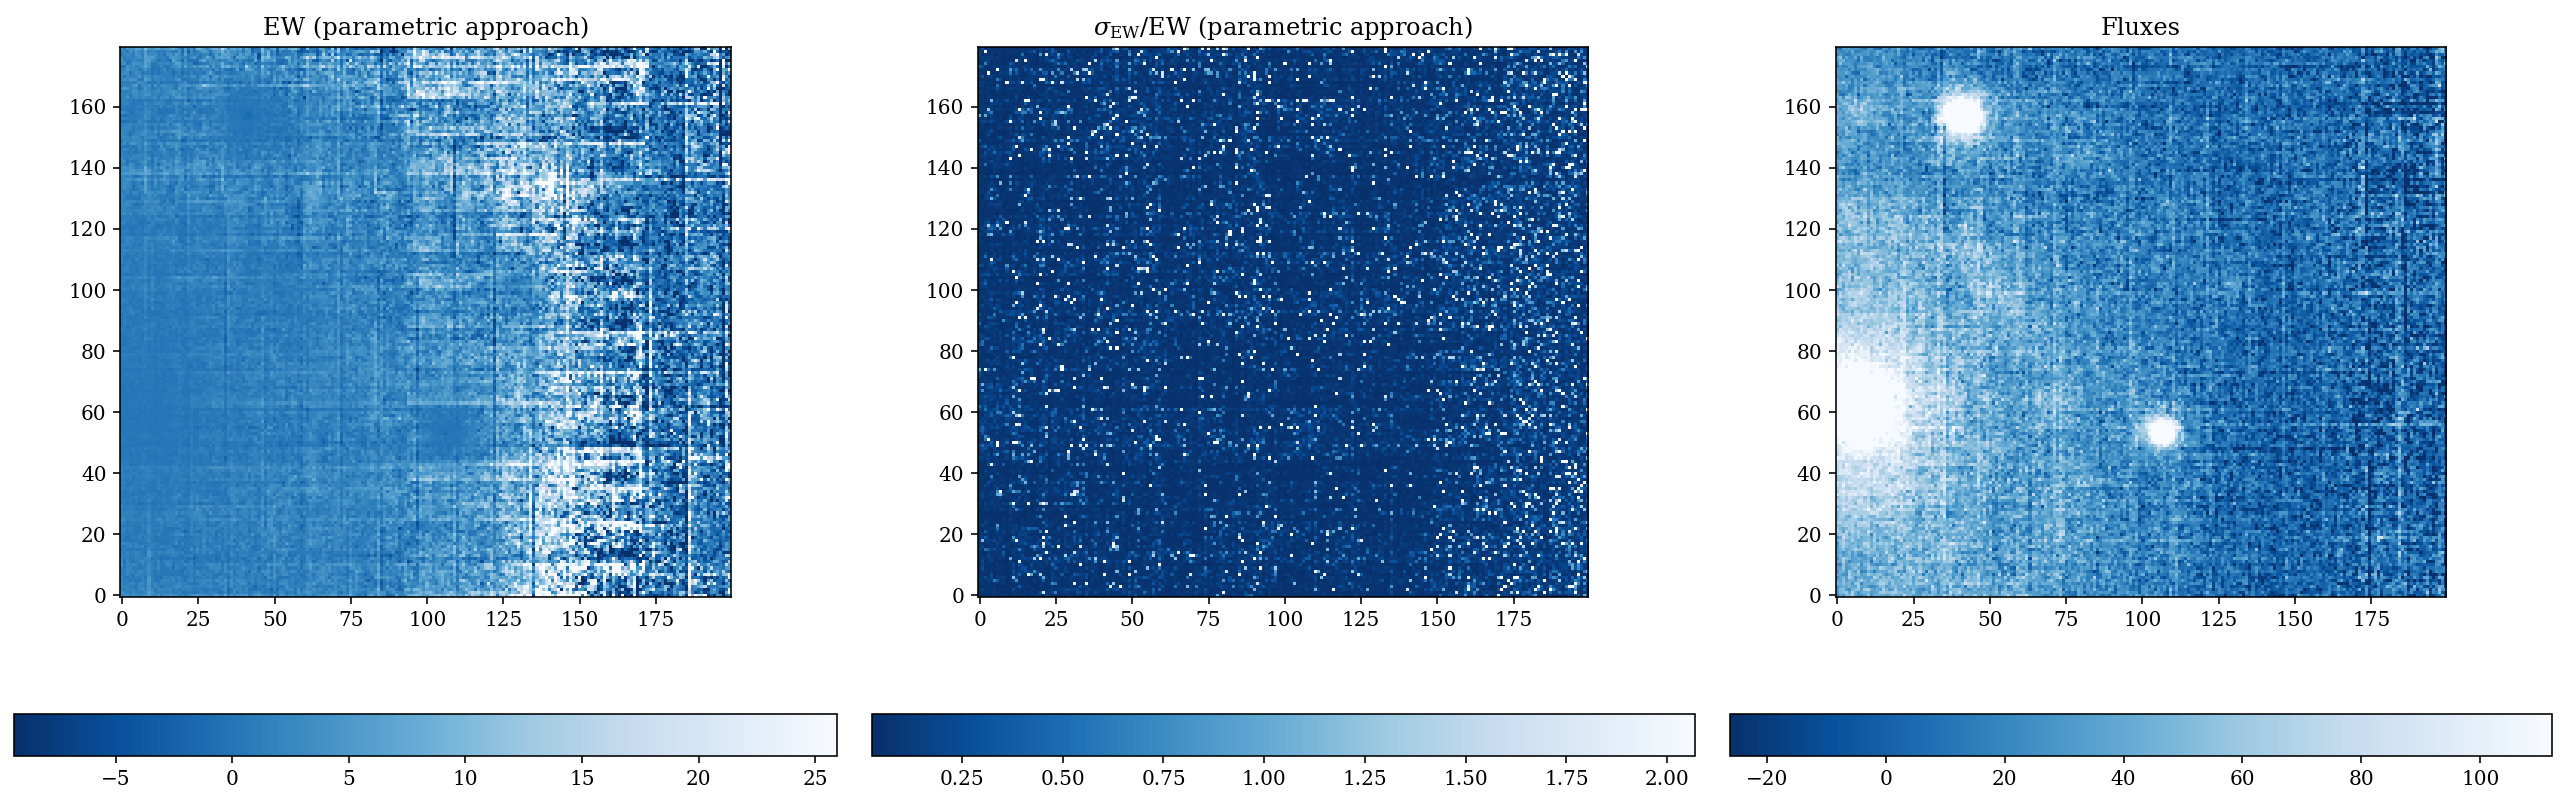

In [149]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

data = np.transpose(map_NP[0])
lo, up = np.nanpercentile(data, 2), np.nanpercentile(data, 98)
cmap = plt.cm.Blues_r.copy()
cmap.set_bad(color='yellow')
im1 = ax[0].imshow(data, cmap=cmap, origin='lower', clim=(lo, up))
fig.colorbar(im1, ax=ax[0], orientation="horizontal")
ax[0].set_title("EW (parametric approach)")

#####

data= np.transpose(abs(map_NP[1]/map_NP[0]))
lo, up = np.nanpercentile(data, 2), np.nanpercentile(data, 98)
im2 = ax[1].imshow(data, cmap=cmap, origin='lower', clim=(lo, up))
fig.colorbar(im2, ax=ax[1], orientation="horizontal")
ax[1].set_title(r"$\sigma_{\mathrm{EW}}/\mathrm{EW}$ (parametric approach)")

#####

data = region[i]
lo, up = np.nanpercentile(data, 2), np.nanpercentile(data, 98)
im3 = ax[2].imshow(data, cmap='Blues_r', origin='lower', clim=(lo, up))
fig.colorbar(im3, ax=ax[2], orientation="horizontal")
ax[2].set_title("Fluxes")

plt.tight_layout()
plt.show()

# Extinction from gas

(6608.27316853, 6638.27316853)

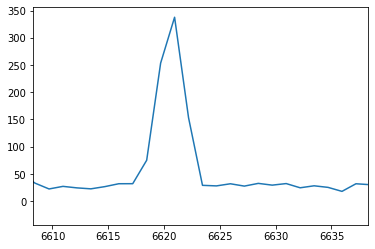

In [19]:
z=0.009213


halpha_obs=6562.81*(1+z)
hbeta_obs=4861*(1+z)

plt.plot(wave,cube[:,250,250])
plt.xlim(halpha_obs-15,halpha_obs+15)
#plt.xlim(hbeta_obs-15,hbeta_obs+15)



In [20]:
x,y=wave,cube[:,250,250]

#Halpha
x_min,x_max=halpha_obs-15,halpha_obs+15
flux=chop_data(x,y,x_min,x_max)[1]
Ha_flux=np.max(flux)

#Hbeta
x_min,x_max=hbeta_obs-15,hbeta_obs+15
flux=chop_data(x,y,x_min,x_max)[1]

Hb_flux=np.max(flux)

compute_ebv_gas(Ha_flux, Hb_flux, law='calzetti')

0.058713165965543525

map

In [34]:
np.shape(binned_region)

(3681, 18, 20)

In [68]:
data = region

result_map = np.zeros((data.shape[1], data.shape[2]))

for j in range(data.shape[1]):
    for i in range(data.shape[2]):
        x = wave
        y = data[:, j, i]
        
        #Halpha
        x_min,x_max=halpha_obs-15,halpha_obs+15
        flux=chop_data(x,y,x_min,x_max)[1]
        Ha_flux=np.nanmax(flux)

        #Hbeta
        x_min,x_max=hbeta_obs-15,hbeta_obs+15
        flux=chop_data(x,y,x_min,x_max)[1]

        Hb_flux=np.nanmax(flux)

        aux=compute_ebv_gas(Ha_flux, Hb_flux, law='calzetti')
        
        if np.isnan(aux):
            print('!!')
            
        result_map[j, i] = aux


In [69]:
result_map

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.13534042],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00084265,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.13749055, 0.36962011, 0.43781329, ..., 0.        , 0.        ,
        0.        ],
       [0.1743115 , 0.55392786, 0.19780954, ..., 0.        , 0.        ,
        0.        ],
       [0.14877161, 0.38712239, 0.14105525, ..., 0.        , 0.        ,
        0.        ]])

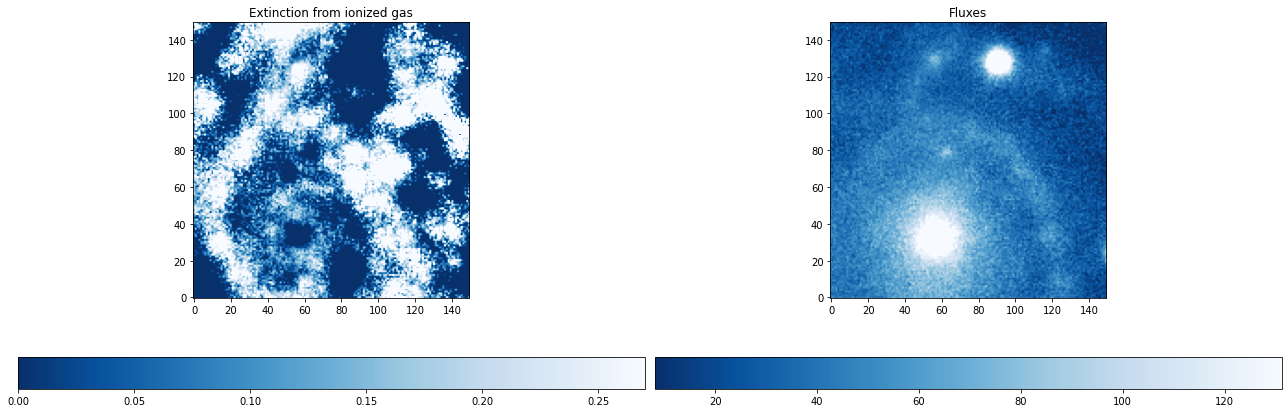

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

data = result_map
lo, up = np.nanpercentile(data, 15), np.nanpercentile(data, 85)
cmap = plt.cm.Blues_r.copy()
cmap.set_bad(color='yellow')
im1 = ax[0].imshow(data, cmap=cmap, origin='lower', clim=(lo, up))
fig.colorbar(im1, ax=ax[0], orientation="horizontal")
ax[0].set_title("Extinction from ionized gas")

#####

data = region[i]
lo, up = np.nanpercentile(data, 2), np.nanpercentile(data, 98)
im3 = ax[1].imshow(data, cmap='Blues_r', origin='lower', clim=(lo, up))
fig.colorbar(im3, ax=ax[1], orientation="horizontal")
ax[1].set_title("Fluxes")

plt.tight_layout()
plt.show()

In [74]:
np.shape(binned_region)


(3681, 18, 20)

In [58]:
np.shape(result_map)

(341, 604)

In [81]:
2.659*(-1.857+1.040/0.6562)+4.05

3.32643998689424

In [84]:
l=0.4861

2.659*(-2.156+1.509/l-0.198/l**2+0.011/l**3)+4.05

4.598085137101848